In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [203]:
#reading and combining both train and test data sets 

In [204]:
train=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/Train.csv")
test=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/Test.csv")
print(train.shape)
print(test.shape)

(23856, 18)
(15903, 17)


In [205]:
#adding new column "train/test" so that we can easily divide train and rest after cleaning.

In [206]:
train['train/test']=1
test['train/test']=0

In [207]:
train['INCIDENT_ID'].nunique()

23856

In [208]:
#removing "incident_id" feature as each value is unique in nature. Hence it cant contribute anything towards our model

In [209]:
df1=pd.concat([train,test],axis=0)
df=df1.drop(columns=['INCIDENT_ID'],axis=1)

In [210]:
print("shape of train dataset is:", train.shape)
print("shape of test dataset is:", test.shape)
print("shape of combined dataset is:", df.shape)

shape of train dataset is: (23856, 19)
shape of test dataset is: (15903, 18)
shape of combined dataset is: (39759, 18)


# checking whether target feature is balanced or not ?

In [211]:
df['MULTIPLE_OFFENSE'].value_counts(normalize=True)

1.0    0.955231
0.0    0.044769
Name: MULTIPLE_OFFENSE, dtype: float64

 Inference:
 we can see, the dataset is heavily imbalanced. we may have to balance the data set while improving the base model (smote or other upsampling technique) so that model can learn better.

# Checking missing value in the combined data set

In [212]:
df.isnull().sum()*100/df.shape[0]

DATE                 0.000000
MULTIPLE_OFFENSE    39.998491
X_1                  0.000000
X_10                 0.000000
X_11                 0.000000
X_12                 0.777183
X_13                 0.000000
X_14                 0.000000
X_15                 0.000000
X_2                  0.000000
X_3                  0.000000
X_4                  0.000000
X_5                  0.000000
X_6                  0.000000
X_7                  0.000000
X_8                  0.000000
X_9                  0.000000
train/test           0.000000
dtype: float64

#### inference:
    1) null value shown under "Multiple_offense" feature is because we combined train and test file. 
    2) we can see there is missing values in X_12 feature, which is only 0.77%.Either can impute it or drop those observations.
        we shall take a call on it after EDA.

# Checking Datatypes of different features.

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39759 entries, 0 to 15902
Data columns (total 18 columns):
DATE                39759 non-null object
MULTIPLE_OFFENSE    23856 non-null float64
X_1                 39759 non-null int64
X_10                39759 non-null int64
X_11                39759 non-null int64
X_12                39450 non-null float64
X_13                39759 non-null int64
X_14                39759 non-null int64
X_15                39759 non-null int64
X_2                 39759 non-null int64
X_3                 39759 non-null int64
X_4                 39759 non-null int64
X_5                 39759 non-null int64
X_6                 39759 non-null int64
X_7                 39759 non-null int64
X_8                 39759 non-null int64
X_9                 39759 non-null int64
train/test          39759 non-null int64
dtypes: float64(2), int64(15), object(1)
memory usage: 5.8+ MB


In [214]:
#we can see all the features are numerical in nature. we shall check the unique values in it now.

In [215]:
for i in df.columns:
    print(i)
    print("datatype of this feature is: ", df[i].dtypes)
    print("unique values are ",df[i].nunique() ,"\n")
    
    

DATE
datatype of this feature is:  object
unique values are  9942 

MULTIPLE_OFFENSE
datatype of this feature is:  float64
unique values are  2 

X_1
datatype of this feature is:  int64
unique values are  8 

X_10
datatype of this feature is:  int64
unique values are  26 

X_11
datatype of this feature is:  int64
unique values are  150 

X_12
datatype of this feature is:  float64
unique values are  24 

X_13
datatype of this feature is:  int64
unique values are  68 

X_14
datatype of this feature is:  int64
unique values are  69 

X_15
datatype of this feature is:  int64
unique values are  36 

X_2
datatype of this feature is:  int64
unique values are  52 

X_3
datatype of this feature is:  int64
unique values are  52 

X_4
datatype of this feature is:  int64
unique values are  10 

X_5
datatype of this feature is:  int64
unique values are  5 

X_6
datatype of this feature is:  int64
unique values are  19 

X_7
datatype of this feature is:  int64
unique values are  19 

X_8
datatype of

inference:
    we shall select those features in which number of classes are less and convert them to dummies.
    for time being we shall retian other features in which classes are more than 10 as it is. we can try different methods on these features while improving base model

# checking target feature percentage in each class of categorical feature

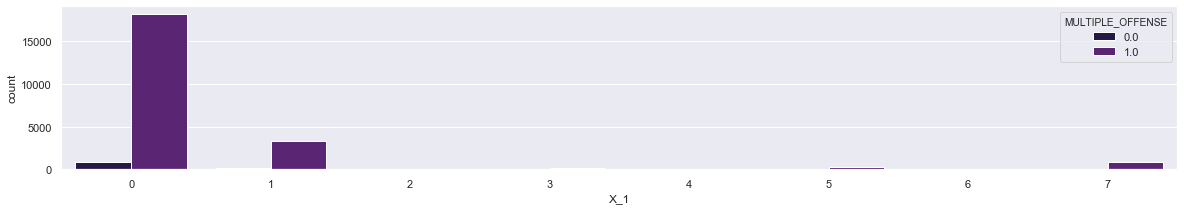

0    0.800171
1    0.144898
7    0.035866
5    0.011519
3    0.005735
4    0.001207
2    0.000428
6    0.000176
Name: X_1, dtype: float64
***************************************************************************************************************************** 



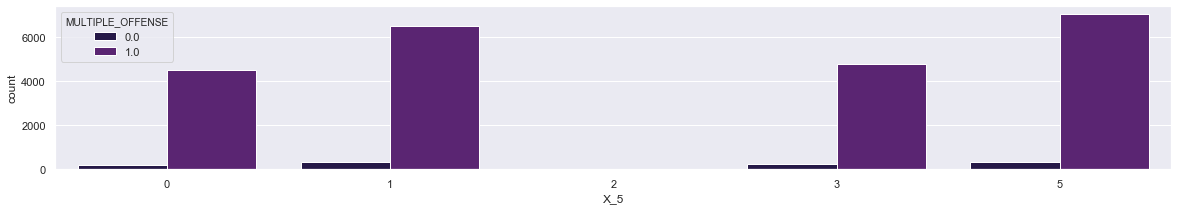

5    0.307805
1    0.283005
3    0.210141
0    0.198898
2    0.000151
Name: X_5, dtype: float64
***************************************************************************************************************************** 



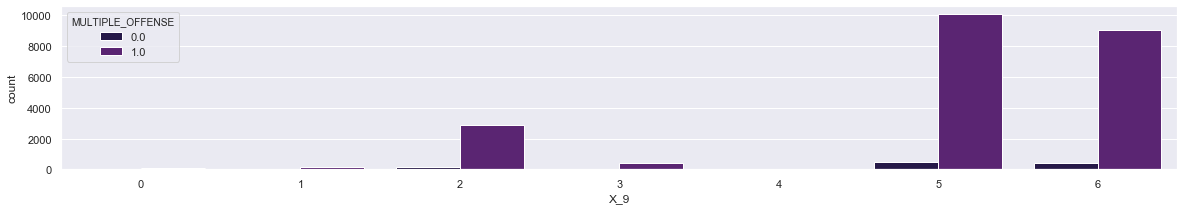

5    0.442919
6    0.396916
2    0.128046
3    0.019165
1    0.007797
0    0.005030
4    0.000126
Name: X_9, dtype: float64
***************************************************************************************************************************** 



In [216]:
list_to_dummies=["X_1","X_5","X_9"]    # number of classes <=10
for i in list_to_dummies:
    plt.figure(figsize=(20,3))
    ax=sns.set(style="darkgrid",palette="magma")
    sns.countplot(x=df[i],hue=df['MULTIPLE_OFFENSE'])
    plt.show()
    print(df[i].value_counts(normalize=True))
    print("*"*125,'\n')
    

#we can see, each class of categorical feature has different counts of 1 and 0(target feature). hence, we wont be making dummy columns here. rather we will keep it as is.
while improving base model, we can try frequency coding of the categorical features as we can see the frequency of each class is varying

# Imputing miss values of X_12 feature using mode

In [217]:
df['X_12']=df['X_12'].fillna(1)   #mode is 1 here.

In [218]:
df['X_12'].isnull().sum()

0

# Feature Engineering on "Date" feature
 a) extracting month,year,day,day_name,weekend/weekday,year_quarter,month_end etc

In [219]:
#converting "date" into datetime stamp.
df['DATE']=pd.to_datetime(df['DATE'])


In [220]:
datetimes = pd.to_datetime(df['DATE'])
df['month'] = datetimes.dt.month
df['year'] = datetimes.dt.year
df['Day_date'] = datetimes.dt.day
df['Day_Name'] = datetimes.dt.day_name()


In [221]:
#weekend/weekday feature creation

In [222]:
def weekend(x):
    if x in ['Sunday','Saturday']:
        return("weekend")
    else:
        return("weekday")
df['Weekend/weekday']=df['Day_Name'].apply(weekend)

In [223]:
df['Weekend/weekday'].value_counts()

weekday    28702
weekend    11057
Name: Weekend/weekday, dtype: int64

In [224]:
#"month-end/month_beginning/normal" feature creation

In [225]:
def month_part(x):
    if x in list(range(1,6)):
        return("month_beginning")
    elif x in list(range(6,26)):
        return "normal"
    else:
        return "month_end"
df['month_end_begg_norm']=df['Day_date'].apply(month_part)
    

In [226]:
df['month_end_begg_norm'].value_counts(normalize=True)*100

normal             65.974999
month_end          17.135743
month_beginning    16.889258
Name: month_end_begg_norm, dtype: float64

In [227]:
# "year_end/begg/normal" feature creation. feature says about whether it is year end/year beginning or normal days of the year.

In [228]:
lst=[]
for x,y in list(zip(df['month'],df['month_end_begg_norm'])):
    if x==12 and y=="month_end":
        lst.append("year_end")
    elif x==1 and y=="month_beginning":
        lst.append("year_beginning")
    else:
        lst.append("year_normal")
df['year_end/begg/normal']=lst

In [229]:
df['year_end/begg/normal'].value_counts(normalize=True)*100

year_normal       97.894816
year_beginning     1.104153
year_end           1.001031
Name: year_end/begg/normal, dtype: float64

In [230]:
#creating additonal features to retrieve information on How many years have been passed since date.

In [231]:
from datetime import date
df['passed_years'] = date.today().year - df['year']

In [232]:
#dividing "year" feature into three decades
def year(x):
    if x >1990 and x<2000:
        return "before_2000"
    elif x >=2000 and x<=2010:
        return "2000_2010"
    else:
        return "after2010"
df['year_decade']=df['year'].apply(year)

In [233]:
df=df.drop(columns=['DATE'],axis=1)

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39759 entries, 0 to 15902
Data columns (total 26 columns):
MULTIPLE_OFFENSE        23856 non-null float64
X_1                     39759 non-null int64
X_10                    39759 non-null int64
X_11                    39759 non-null int64
X_12                    39759 non-null float64
X_13                    39759 non-null int64
X_14                    39759 non-null int64
X_15                    39759 non-null int64
X_2                     39759 non-null int64
X_3                     39759 non-null int64
X_4                     39759 non-null int64
X_5                     39759 non-null int64
X_6                     39759 non-null int64
X_7                     39759 non-null int64
X_8                     39759 non-null int64
X_9                     39759 non-null int64
train/test              39759 non-null int64
month                   39759 non-null int64
year                    39759 non-null int64
Day_date                39759 no

# FInal dataframe before dummy
df

### converting categorical features by duumies/label encoding

In [235]:
df1=pd.get_dummies(data=df,columns=['Day_Name',"Weekend/weekday","month_end_begg_norm","year_end/begg/normal","year_decade"],drop_first=True)

In [236]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['month']=le.fit_transform(df1['month'])
le=LabelEncoder()
df1['year']=le.fit_transform(df1['year'])
le=LabelEncoder()
df1['Day_date']=le.fit_transform(df1['Day_date'])



# EDA

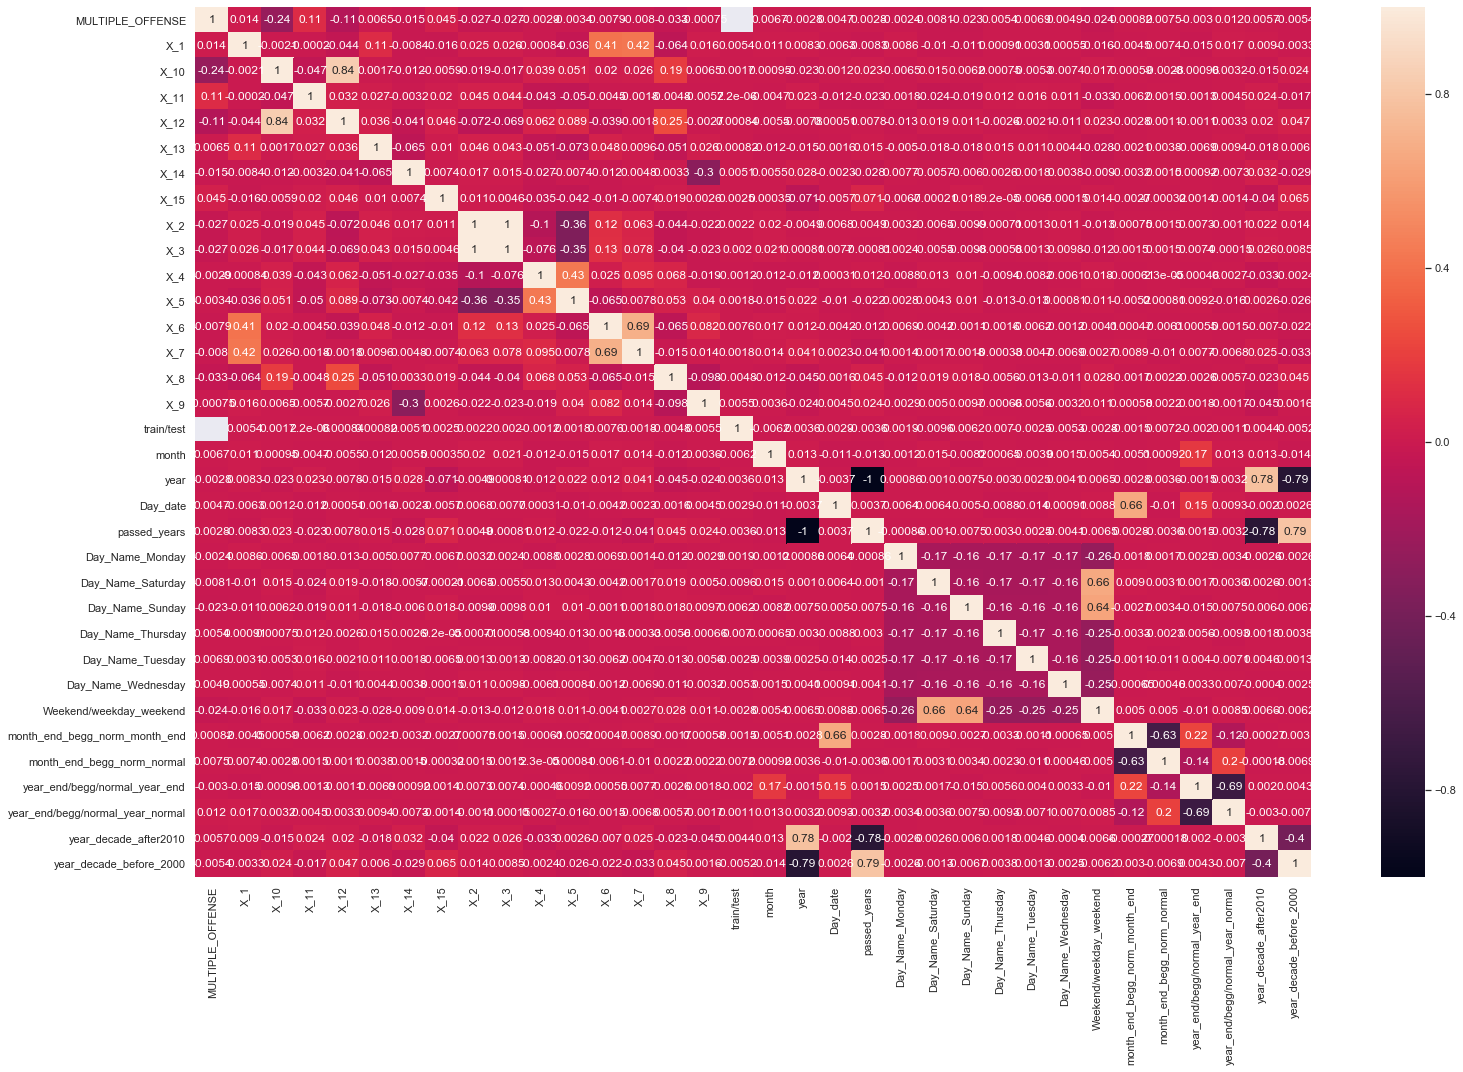

In [240]:
plt.figure(figsize=(25,16))
sns.heatmap(df1.corr(),annot=True)
plt.show()

inference:
    we can see there are correlation between variables . so, in order to include interaction between the variables, we can apply PCA here and build model using interaction between features. The disadvantage of PCA is , we will loose explainability.

# Checking Predictive Power score
    a) the score helps to compare categorical and numerical features together.
    b) PPS score can say about hidden patterns in the data

In [116]:
#!pip install ppscore

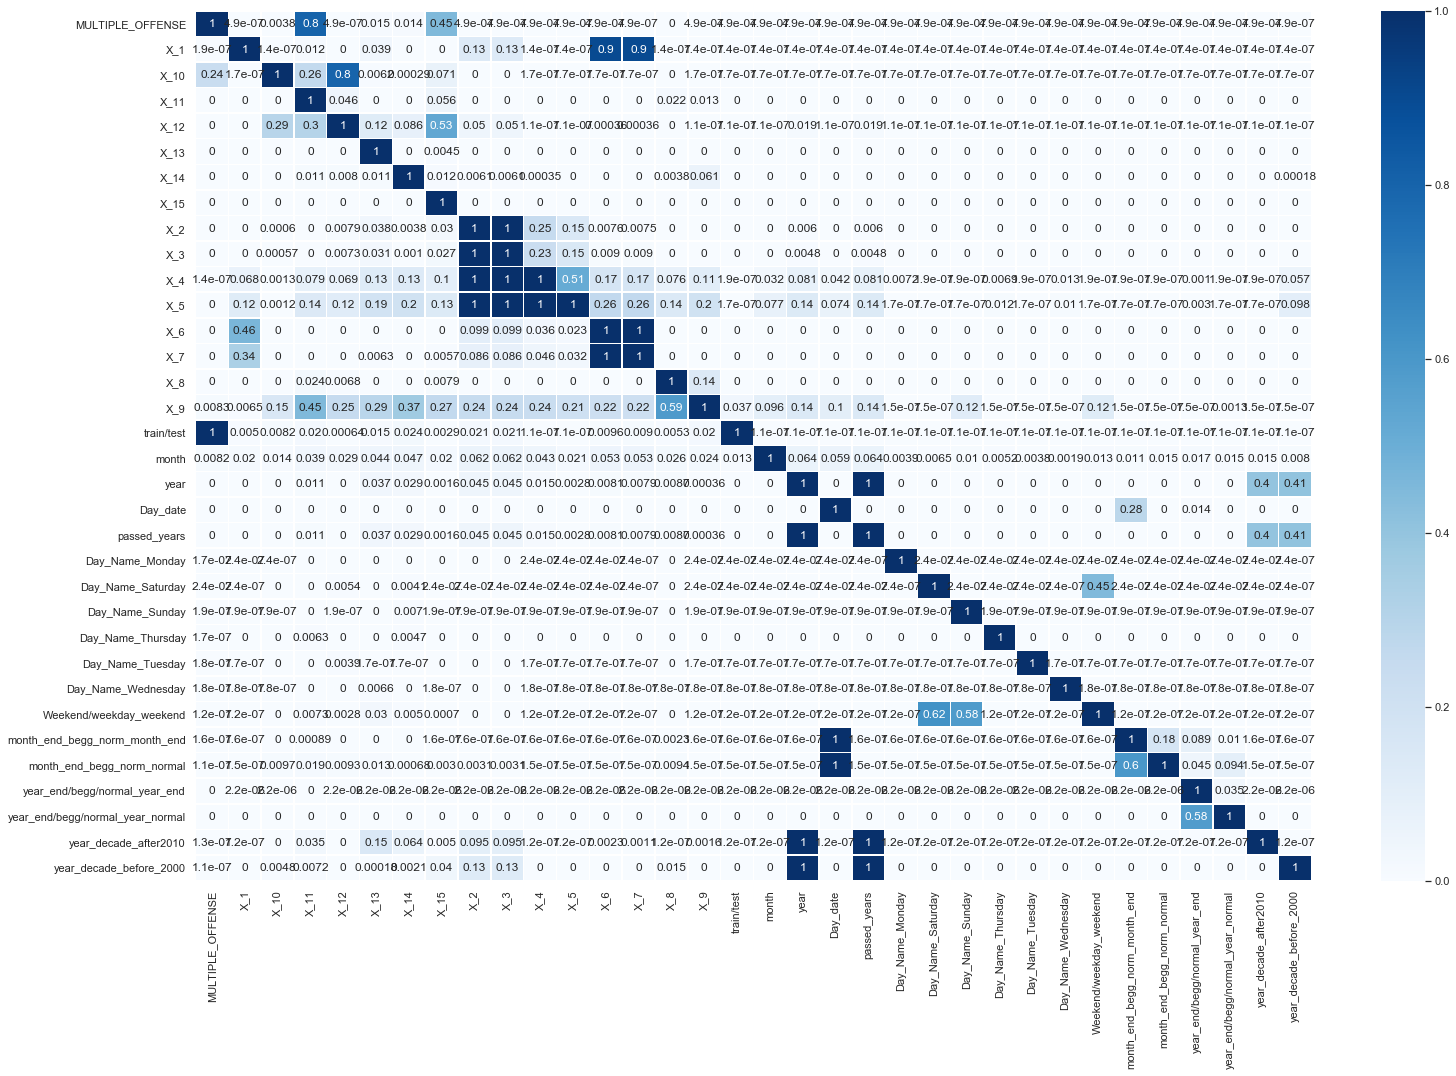

In [242]:
import ppscore as pps
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
df_matrix = pps.matrix(df1)
plt.figure(figsize=(25,16))
sns.heatmap(df_matrix, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
import warnings
warnings.filterwarnings('ignore')

# univariate analysis

MULTIPLE_OFFENSE


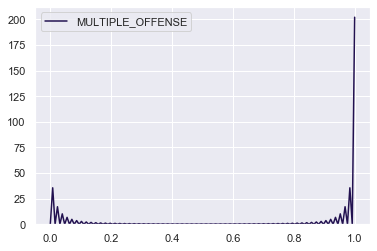

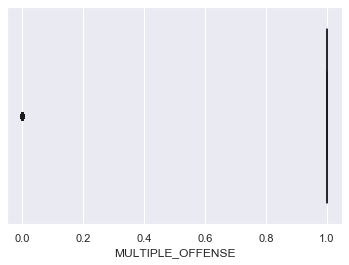


X_1


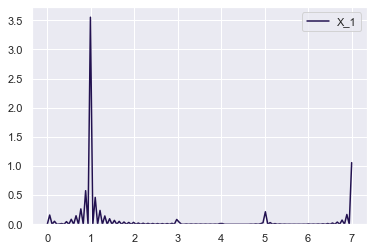

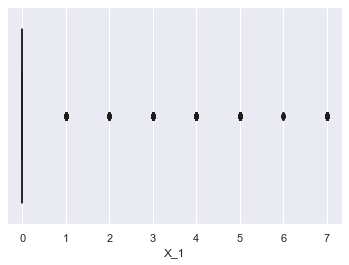


X_10


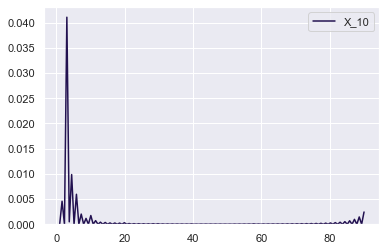

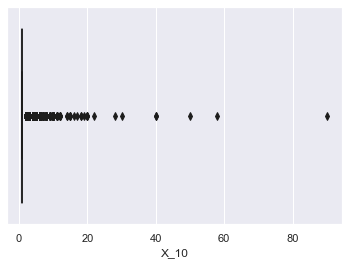


X_11


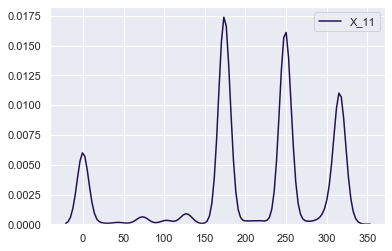

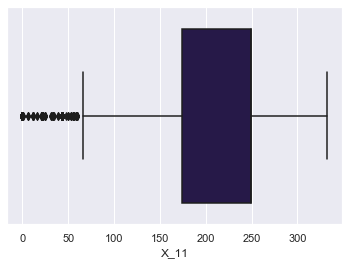


X_12


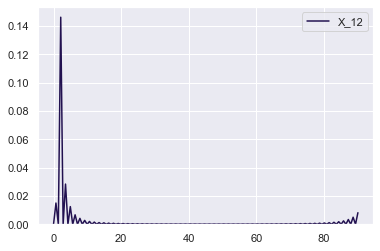

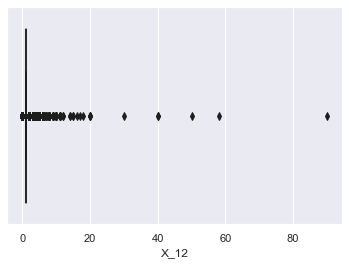


X_13


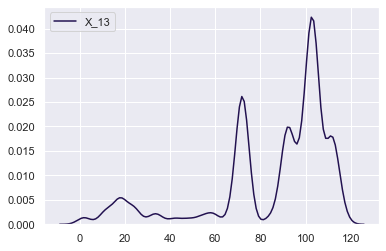

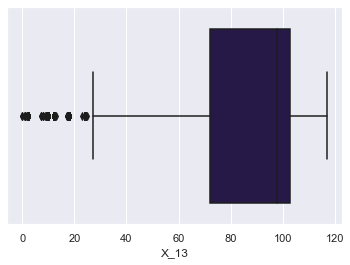


X_14


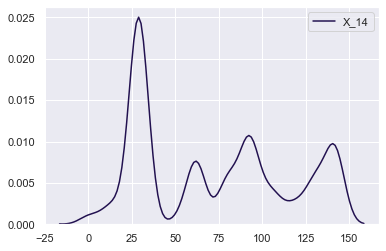

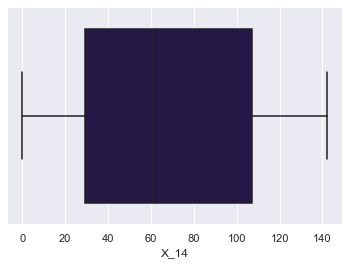


X_15


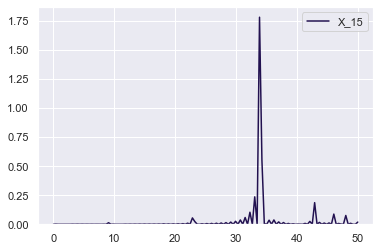

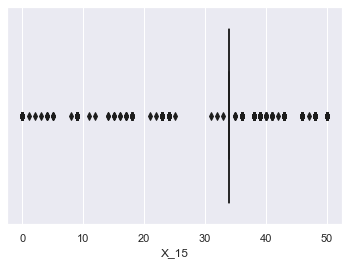


X_2


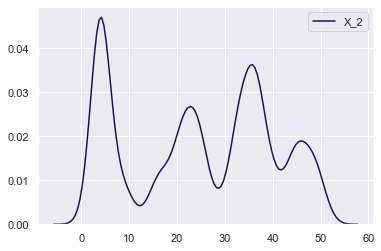

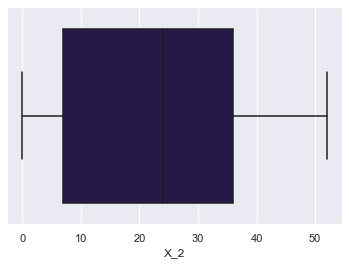


X_3


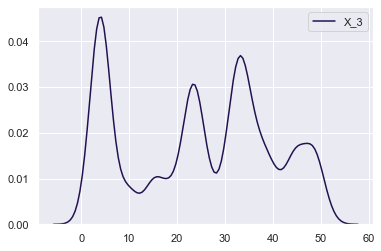

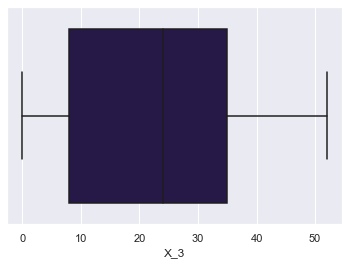


X_4


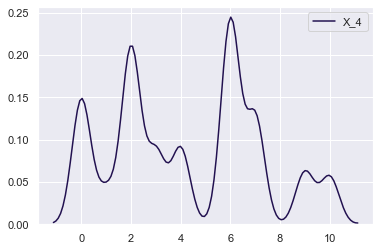

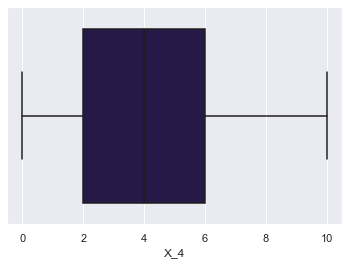


X_5


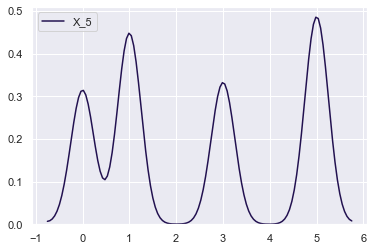

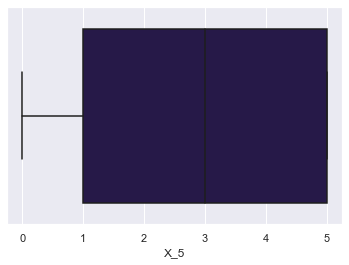


X_6


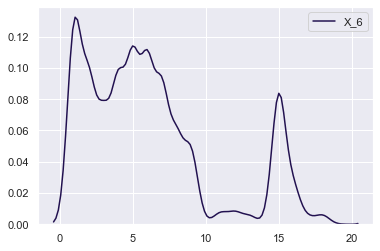

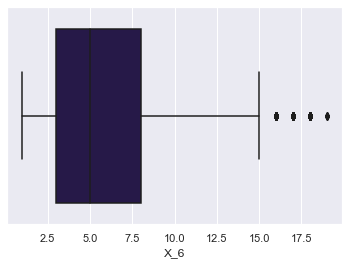


X_7


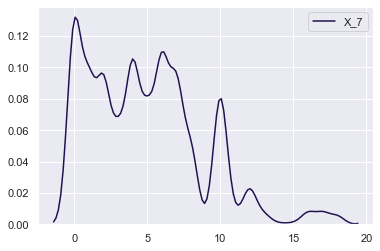

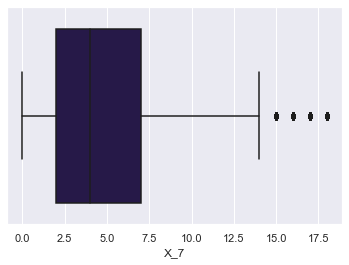


X_8


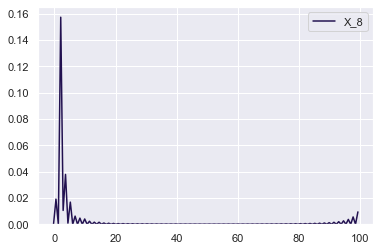

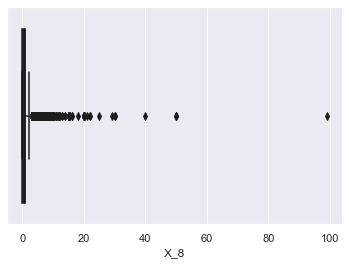


X_9


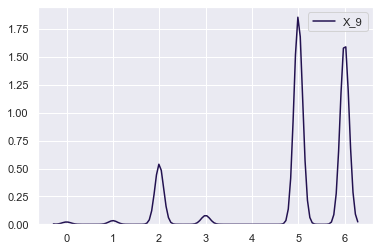

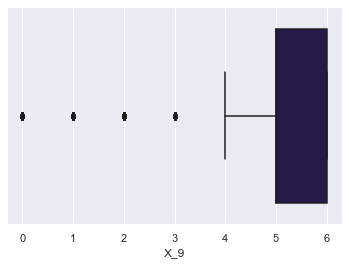


train/test


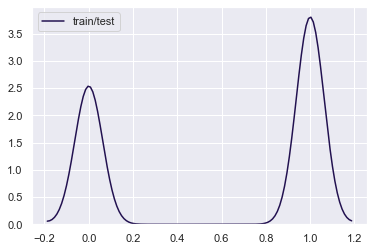

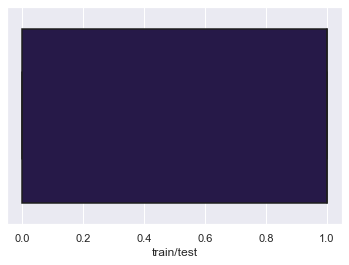


month


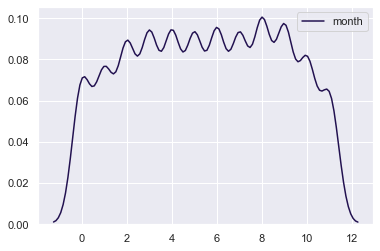

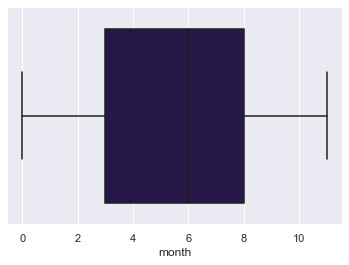


year


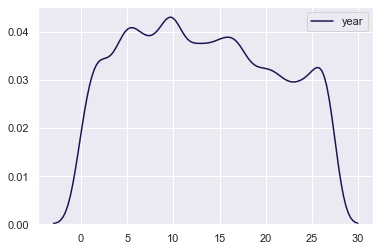

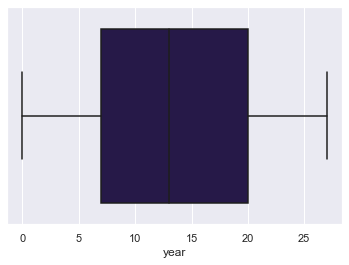


Day_date


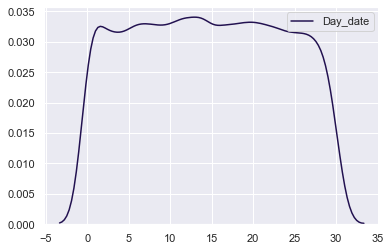

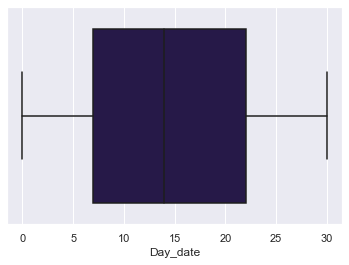


passed_years


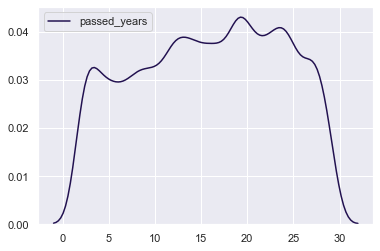

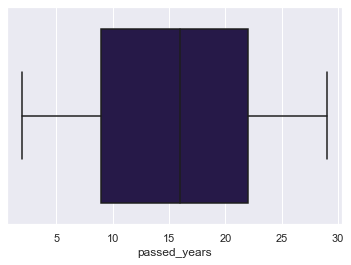

In [247]:
num_cols=df1.select_dtypes(include=['int64',"float64"])
for i in num_cols:
    print(i)
    sns.kdeplot(df1[i])
    plt.show()
    sns.boxplot(df1[i])
    plt.show()
    print()
    

inference:
    1) few unlabelled feature's distribution indicates that they need to considered as categorical features rather than numerical. 
    2) few numerical features are showing outliers in the boxplot. but this cant be confirmed without further analysis.
    3) numerical features are not normally distributed. we may have to go for transformation.
    4) x_6 and x_7 distribution looks similiar. interestingly we had got good correaltion value between these variables.
    are both these features giving same inforamtion??

# bivariate analysis

In [256]:
df1['X_6'].nunique()

19

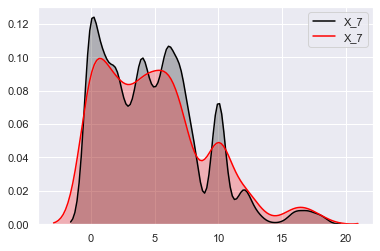

In [272]:
sns.kdeplot(df1[df1['MULTIPLE_OFFENSE']==1]['X_7'],shade=True,color="black")

sns.kdeplot(df1[df1['MULTIPLE_OFFENSE']==0]['X_7'],shade=True,color="r")
plt.show()

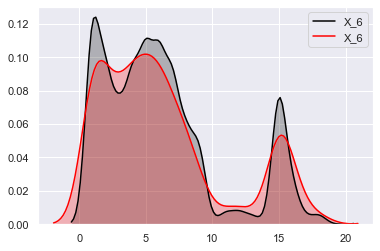

In [270]:
sns.kdeplot(df1[df1['MULTIPLE_OFFENSE']==1]['X_6'],shade=True,color="black")

sns.kdeplot(df1[df1['MULTIPLE_OFFENSE']==0]['X_6'],shade=True,color="r")
plt.show()

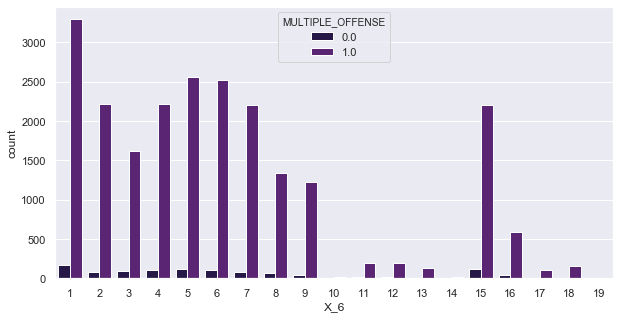

In [289]:

plt.figure(figsize=(10,5))
sns.countplot(x='X_6',data=df1,hue=df1['MULTIPLE_OFFENSE'])
plt.show()

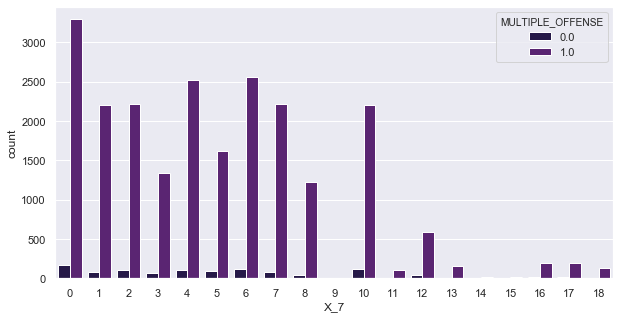

In [290]:

plt.figure(figsize=(10,5))
sns.countplot(x='X_7',data=df1,hue=df1['MULTIPLE_OFFENSE'])
plt.show()

In [291]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39759 entries, 0 to 15902
Data columns (total 34 columns):
MULTIPLE_OFFENSE                    23856 non-null float64
X_1                                 39759 non-null int64
X_10                                39759 non-null int64
X_11                                39759 non-null int64
X_12                                39759 non-null float64
X_13                                39759 non-null int64
X_14                                39759 non-null int64
X_15                                39759 non-null int64
X_2                                 39759 non-null int64
X_3                                 39759 non-null int64
X_4                                 39759 non-null int64
X_5                                 39759 non-null int64
X_6                                 39759 non-null int64
X_7                                 39759 non-null int64
X_8                                 39759 non-null int64
X_9                             

In [294]:
g=df1.groupby('X_6')
df1_1=g.get_group(1)['MULTIPLE_OFFENSE'].value_counts()
df1_1

1.0    3291
0.0     170
Name: MULTIPLE_OFFENSE, dtype: int64

# Modelling

In [296]:
train=df1[df1['train/test']==1]
test=df1[df1['train/test']==0]
y=train['MULTIPLE_OFFENSE']
x=train.drop(columns=['MULTIPLE_OFFENSE',"train/test"])
x_test=test.drop(columns=["train/test",'MULTIPLE_OFFENSE'])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (23856, 32)
y_train shape is  (23856,)
x_test shape is  (15903, 32)


In [298]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


Learning rate set to 0.038162
0:	learn: 0.5975289	total: 153ms	remaining: 2m 33s
1:	learn: 0.5211563	total: 193ms	remaining: 1m 36s
2:	learn: 0.4629766	total: 218ms	remaining: 1m 12s
3:	learn: 0.3979703	total: 237ms	remaining: 59.1s
4:	learn: 0.3511901	total: 257ms	remaining: 51.1s
5:	learn: 0.3306089	total: 276ms	remaining: 45.8s
6:	learn: 0.3076589	total: 295ms	remaining: 41.9s
7:	learn: 0.2865273	total: 317ms	remaining: 39.3s
8:	learn: 0.2530566	total: 338ms	remaining: 37.2s
9:	learn: 0.2158602	total: 360ms	remaining: 35.6s
10:	learn: 0.2064287	total: 380ms	remaining: 34.2s
11:	learn: 0.1985820	total: 412ms	remaining: 33.9s
12:	learn: 0.1798365	total: 433ms	remaining: 32.9s
13:	learn: 0.1656486	total: 454ms	remaining: 32s
14:	learn: 0.1523726	total: 480ms	remaining: 31.5s
15:	learn: 0.1479824	total: 502ms	remaining: 30.9s
16:	learn: 0.1374228	total: 520ms	remaining: 30.1s
17:	learn: 0.1282337	total: 541ms	remaining: 29.5s
18:	learn: 0.1159083	total: 562ms	remaining: 29s
19:	learn: 0

162:	learn: 0.0069195	total: 3.35s	remaining: 17.2s
163:	learn: 0.0068723	total: 3.37s	remaining: 17.2s
164:	learn: 0.0068458	total: 3.39s	remaining: 17.2s
165:	learn: 0.0068200	total: 3.41s	remaining: 17.1s
166:	learn: 0.0067848	total: 3.44s	remaining: 17.1s
167:	learn: 0.0067397	total: 3.46s	remaining: 17.1s
168:	learn: 0.0066698	total: 3.48s	remaining: 17.1s
169:	learn: 0.0066348	total: 3.51s	remaining: 17.1s
170:	learn: 0.0066108	total: 3.53s	remaining: 17.1s
171:	learn: 0.0065772	total: 3.55s	remaining: 17.1s
172:	learn: 0.0065028	total: 3.58s	remaining: 17.1s
173:	learn: 0.0064852	total: 3.59s	remaining: 17.1s
174:	learn: 0.0064515	total: 3.62s	remaining: 17s
175:	learn: 0.0064324	total: 3.64s	remaining: 17s
176:	learn: 0.0064007	total: 3.66s	remaining: 17s
177:	learn: 0.0063853	total: 3.68s	remaining: 17s
178:	learn: 0.0063042	total: 3.7s	remaining: 17s
179:	learn: 0.0062655	total: 3.72s	remaining: 16.9s
180:	learn: 0.0062655	total: 3.73s	remaining: 16.9s
181:	learn: 0.0061575	t

328:	learn: 0.0042642	total: 5.88s	remaining: 12s
329:	learn: 0.0042641	total: 5.89s	remaining: 12s
330:	learn: 0.0042641	total: 5.89s	remaining: 11.9s
331:	learn: 0.0042641	total: 5.9s	remaining: 11.9s
332:	learn: 0.0042641	total: 5.92s	remaining: 11.8s
333:	learn: 0.0042641	total: 5.93s	remaining: 11.8s
334:	learn: 0.0042641	total: 5.94s	remaining: 11.8s
335:	learn: 0.0042641	total: 5.96s	remaining: 11.8s
336:	learn: 0.0042641	total: 5.98s	remaining: 11.8s
337:	learn: 0.0042641	total: 6s	remaining: 11.8s
338:	learn: 0.0042641	total: 6.01s	remaining: 11.7s
339:	learn: 0.0042641	total: 6.02s	remaining: 11.7s
340:	learn: 0.0042641	total: 6.03s	remaining: 11.7s
341:	learn: 0.0042641	total: 6.04s	remaining: 11.6s
342:	learn: 0.0042640	total: 6.05s	remaining: 11.6s
343:	learn: 0.0042640	total: 6.08s	remaining: 11.6s
344:	learn: 0.0042640	total: 6.09s	remaining: 11.6s
345:	learn: 0.0042640	total: 6.09s	remaining: 11.5s
346:	learn: 0.0042640	total: 6.1s	remaining: 11.5s
347:	learn: 0.0042640

497:	learn: 0.0042631	total: 7.83s	remaining: 7.9s
498:	learn: 0.0042631	total: 7.84s	remaining: 7.87s
499:	learn: 0.0042631	total: 7.85s	remaining: 7.85s
500:	learn: 0.0042631	total: 7.86s	remaining: 7.83s
501:	learn: 0.0042630	total: 7.87s	remaining: 7.8s
502:	learn: 0.0042630	total: 7.87s	remaining: 7.78s
503:	learn: 0.0042630	total: 7.89s	remaining: 7.76s
504:	learn: 0.0042630	total: 7.9s	remaining: 7.74s
505:	learn: 0.0042630	total: 7.9s	remaining: 7.72s
506:	learn: 0.0042630	total: 7.91s	remaining: 7.7s
507:	learn: 0.0042630	total: 7.92s	remaining: 7.67s
508:	learn: 0.0042630	total: 7.93s	remaining: 7.65s
509:	learn: 0.0042630	total: 7.94s	remaining: 7.63s
510:	learn: 0.0042630	total: 7.95s	remaining: 7.6s
511:	learn: 0.0042630	total: 7.95s	remaining: 7.58s
512:	learn: 0.0042630	total: 7.96s	remaining: 7.56s
513:	learn: 0.0042630	total: 7.97s	remaining: 7.54s
514:	learn: 0.0042630	total: 7.98s	remaining: 7.51s
515:	learn: 0.0042630	total: 7.98s	remaining: 7.49s
516:	learn: 0.0042

658:	learn: 0.0042623	total: 9.61s	remaining: 4.97s
659:	learn: 0.0042623	total: 9.62s	remaining: 4.96s
660:	learn: 0.0042622	total: 9.63s	remaining: 4.94s
661:	learn: 0.0042622	total: 9.65s	remaining: 4.92s
662:	learn: 0.0042622	total: 9.66s	remaining: 4.91s
663:	learn: 0.0042622	total: 9.67s	remaining: 4.89s
664:	learn: 0.0042622	total: 9.68s	remaining: 4.88s
665:	learn: 0.0042622	total: 9.69s	remaining: 4.86s
666:	learn: 0.0042622	total: 9.7s	remaining: 4.84s
667:	learn: 0.0042622	total: 9.71s	remaining: 4.83s
668:	learn: 0.0042622	total: 9.72s	remaining: 4.81s
669:	learn: 0.0042622	total: 9.73s	remaining: 4.79s
670:	learn: 0.0042622	total: 9.74s	remaining: 4.78s
671:	learn: 0.0042622	total: 9.75s	remaining: 4.76s
672:	learn: 0.0042622	total: 9.76s	remaining: 4.74s
673:	learn: 0.0042622	total: 9.77s	remaining: 4.73s
674:	learn: 0.0042622	total: 9.79s	remaining: 4.71s
675:	learn: 0.0042622	total: 9.79s	remaining: 4.69s
676:	learn: 0.0042622	total: 9.8s	remaining: 4.68s
677:	learn: 0.

826:	learn: 0.0042613	total: 11.6s	remaining: 2.42s
827:	learn: 0.0042613	total: 11.6s	remaining: 2.41s
828:	learn: 0.0042613	total: 11.6s	remaining: 2.39s
829:	learn: 0.0042613	total: 11.6s	remaining: 2.38s
830:	learn: 0.0042613	total: 11.6s	remaining: 2.36s
831:	learn: 0.0042613	total: 11.6s	remaining: 2.35s
832:	learn: 0.0042613	total: 11.6s	remaining: 2.33s
833:	learn: 0.0042613	total: 11.7s	remaining: 2.32s
834:	learn: 0.0042613	total: 11.7s	remaining: 2.31s
835:	learn: 0.0042613	total: 11.7s	remaining: 2.29s
836:	learn: 0.0042613	total: 11.7s	remaining: 2.28s
837:	learn: 0.0042613	total: 11.7s	remaining: 2.26s
838:	learn: 0.0042613	total: 11.7s	remaining: 2.25s
839:	learn: 0.0042613	total: 11.7s	remaining: 2.23s
840:	learn: 0.0042613	total: 11.7s	remaining: 2.22s
841:	learn: 0.0042612	total: 11.8s	remaining: 2.21s
842:	learn: 0.0042612	total: 11.8s	remaining: 2.19s
843:	learn: 0.0042612	total: 11.8s	remaining: 2.18s
844:	learn: 0.0042612	total: 11.8s	remaining: 2.16s
845:	learn: 

988:	learn: 0.0042603	total: 13.5s	remaining: 150ms
989:	learn: 0.0042603	total: 13.5s	remaining: 137ms
990:	learn: 0.0042603	total: 13.5s	remaining: 123ms
991:	learn: 0.0042603	total: 13.6s	remaining: 109ms
992:	learn: 0.0042602	total: 13.6s	remaining: 95.6ms
993:	learn: 0.0042602	total: 13.6s	remaining: 81.9ms
994:	learn: 0.0042602	total: 13.6s	remaining: 68.3ms
995:	learn: 0.0042602	total: 13.6s	remaining: 54.6ms
996:	learn: 0.0042602	total: 13.6s	remaining: 41ms
997:	learn: 0.0042602	total: 13.6s	remaining: 27.3ms
998:	learn: 0.0042602	total: 13.6s	remaining: 13.6ms
999:	learn: 0.0042602	total: 13.6s	remaining: 0us
Learning rate set to 0.038162
0:	learn: 0.5978865	total: 37.2ms	remaining: 37.2s
1:	learn: 0.5212571	total: 60.6ms	remaining: 30.2s
2:	learn: 0.4443665	total: 82.2ms	remaining: 27.3s
3:	learn: 0.3875686	total: 104ms	remaining: 25.9s
4:	learn: 0.3259768	total: 119ms	remaining: 23.7s
5:	learn: 0.2869022	total: 131ms	remaining: 21.6s
6:	learn: 0.2707203	total: 140ms	remaini

152:	learn: 0.0074215	total: 2.38s	remaining: 13.2s
153:	learn: 0.0073826	total: 2.4s	remaining: 13.2s
154:	learn: 0.0073219	total: 2.41s	remaining: 13.1s
155:	learn: 0.0071994	total: 2.43s	remaining: 13.1s
156:	learn: 0.0071872	total: 2.45s	remaining: 13.1s
157:	learn: 0.0071436	total: 2.46s	remaining: 13.1s
158:	learn: 0.0071121	total: 2.48s	remaining: 13.1s
159:	learn: 0.0070845	total: 2.5s	remaining: 13.1s
160:	learn: 0.0069872	total: 2.52s	remaining: 13.1s
161:	learn: 0.0069619	total: 2.54s	remaining: 13.1s
162:	learn: 0.0069219	total: 2.56s	remaining: 13.1s
163:	learn: 0.0068418	total: 2.57s	remaining: 13.1s
164:	learn: 0.0068418	total: 2.59s	remaining: 13.1s
165:	learn: 0.0068314	total: 2.6s	remaining: 13.1s
166:	learn: 0.0067722	total: 2.62s	remaining: 13.1s
167:	learn: 0.0067482	total: 2.64s	remaining: 13.1s
168:	learn: 0.0066853	total: 2.65s	remaining: 13.1s
169:	learn: 0.0065318	total: 2.67s	remaining: 13.1s
170:	learn: 0.0065318	total: 2.69s	remaining: 13s
171:	learn: 0.006

313:	learn: 0.0034094	total: 4.94s	remaining: 10.8s
314:	learn: 0.0034094	total: 4.95s	remaining: 10.8s
315:	learn: 0.0034094	total: 4.95s	remaining: 10.7s
316:	learn: 0.0034094	total: 4.96s	remaining: 10.7s
317:	learn: 0.0034094	total: 4.97s	remaining: 10.7s
318:	learn: 0.0034093	total: 4.97s	remaining: 10.6s
319:	learn: 0.0034093	total: 4.99s	remaining: 10.6s
320:	learn: 0.0034093	total: 5s	remaining: 10.6s
321:	learn: 0.0034093	total: 5.01s	remaining: 10.6s
322:	learn: 0.0034093	total: 5.03s	remaining: 10.5s
323:	learn: 0.0034093	total: 5.03s	remaining: 10.5s
324:	learn: 0.0034093	total: 5.04s	remaining: 10.5s
325:	learn: 0.0034093	total: 5.05s	remaining: 10.4s
326:	learn: 0.0034093	total: 5.06s	remaining: 10.4s
327:	learn: 0.0034093	total: 5.06s	remaining: 10.4s
328:	learn: 0.0034093	total: 5.07s	remaining: 10.3s
329:	learn: 0.0034092	total: 5.08s	remaining: 10.3s
330:	learn: 0.0034092	total: 5.09s	remaining: 10.3s
331:	learn: 0.0034092	total: 5.11s	remaining: 10.3s
332:	learn: 0.0

488:	learn: 0.0034084	total: 6.89s	remaining: 7.2s
489:	learn: 0.0034084	total: 6.9s	remaining: 7.18s
490:	learn: 0.0034084	total: 6.91s	remaining: 7.16s
491:	learn: 0.0034084	total: 6.92s	remaining: 7.14s
492:	learn: 0.0034084	total: 6.93s	remaining: 7.13s
493:	learn: 0.0034084	total: 6.94s	remaining: 7.11s
494:	learn: 0.0034084	total: 6.96s	remaining: 7.09s
495:	learn: 0.0034084	total: 6.97s	remaining: 7.08s
496:	learn: 0.0034084	total: 6.98s	remaining: 7.06s
497:	learn: 0.0034084	total: 6.99s	remaining: 7.04s
498:	learn: 0.0034084	total: 7s	remaining: 7.03s
499:	learn: 0.0034084	total: 7.01s	remaining: 7.01s
500:	learn: 0.0034084	total: 7.02s	remaining: 7s
501:	learn: 0.0034084	total: 7.04s	remaining: 6.98s
502:	learn: 0.0034084	total: 7.05s	remaining: 6.96s
503:	learn: 0.0034084	total: 7.06s	remaining: 6.95s
504:	learn: 0.0034084	total: 7.08s	remaining: 6.93s
505:	learn: 0.0034084	total: 7.09s	remaining: 6.92s
506:	learn: 0.0034084	total: 7.1s	remaining: 6.9s
507:	learn: 0.0034084	

662:	learn: 0.0034084	total: 8.83s	remaining: 4.49s
663:	learn: 0.0034084	total: 8.84s	remaining: 4.47s
664:	learn: 0.0034084	total: 8.85s	remaining: 4.46s
665:	learn: 0.0034084	total: 8.85s	remaining: 4.44s
666:	learn: 0.0034084	total: 8.86s	remaining: 4.42s
667:	learn: 0.0034084	total: 8.87s	remaining: 4.41s
668:	learn: 0.0034084	total: 8.88s	remaining: 4.39s
669:	learn: 0.0034084	total: 8.89s	remaining: 4.38s
670:	learn: 0.0034084	total: 8.89s	remaining: 4.36s
671:	learn: 0.0034084	total: 8.9s	remaining: 4.34s
672:	learn: 0.0034084	total: 8.91s	remaining: 4.33s
673:	learn: 0.0034084	total: 8.92s	remaining: 4.31s
674:	learn: 0.0034084	total: 8.93s	remaining: 4.3s
675:	learn: 0.0034084	total: 8.94s	remaining: 4.28s
676:	learn: 0.0034084	total: 8.95s	remaining: 4.27s
677:	learn: 0.0034084	total: 8.96s	remaining: 4.25s
678:	learn: 0.0034084	total: 8.96s	remaining: 4.24s
679:	learn: 0.0034084	total: 8.97s	remaining: 4.22s
680:	learn: 0.0034084	total: 8.98s	remaining: 4.21s
681:	learn: 0.

826:	learn: 0.0034084	total: 10.4s	remaining: 2.18s
827:	learn: 0.0034084	total: 10.5s	remaining: 2.17s
828:	learn: 0.0034084	total: 10.5s	remaining: 2.16s
829:	learn: 0.0034084	total: 10.5s	remaining: 2.15s
830:	learn: 0.0034084	total: 10.5s	remaining: 2.13s
831:	learn: 0.0034084	total: 10.5s	remaining: 2.12s
832:	learn: 0.0034084	total: 10.5s	remaining: 2.11s
833:	learn: 0.0034084	total: 10.5s	remaining: 2.09s
834:	learn: 0.0034084	total: 10.5s	remaining: 2.08s
835:	learn: 0.0034084	total: 10.5s	remaining: 2.07s
836:	learn: 0.0034084	total: 10.6s	remaining: 2.06s
837:	learn: 0.0034084	total: 10.6s	remaining: 2.04s
838:	learn: 0.0034084	total: 10.6s	remaining: 2.03s
839:	learn: 0.0034084	total: 10.6s	remaining: 2.02s
840:	learn: 0.0034084	total: 10.6s	remaining: 2s
841:	learn: 0.0034084	total: 10.6s	remaining: 1.99s
842:	learn: 0.0034084	total: 10.6s	remaining: 1.98s
843:	learn: 0.0034084	total: 10.6s	remaining: 1.96s
844:	learn: 0.0034084	total: 10.6s	remaining: 1.95s
845:	learn: 0.0

990:	learn: 0.0034084	total: 12.2s	remaining: 111ms
991:	learn: 0.0034084	total: 12.2s	remaining: 98.6ms
992:	learn: 0.0034084	total: 12.2s	remaining: 86.2ms
993:	learn: 0.0034084	total: 12.2s	remaining: 73.9ms
994:	learn: 0.0034084	total: 12.2s	remaining: 61.5ms
995:	learn: 0.0034084	total: 12.3s	remaining: 49.2ms
996:	learn: 0.0034084	total: 12.3s	remaining: 36.9ms
997:	learn: 0.0034084	total: 12.3s	remaining: 24.6ms
998:	learn: 0.0034084	total: 12.3s	remaining: 12.3ms
999:	learn: 0.0034084	total: 12.3s	remaining: 0us
Learning rate set to 0.038162
0:	learn: 0.5969845	total: 26.2ms	remaining: 26.2s
1:	learn: 0.5158574	total: 53.1ms	remaining: 26.5s
2:	learn: 0.4418932	total: 76.5ms	remaining: 25.4s
3:	learn: 0.3866518	total: 98.5ms	remaining: 24.5s
4:	learn: 0.3260860	total: 120ms	remaining: 23.8s
5:	learn: 0.3038485	total: 143ms	remaining: 23.7s
6:	learn: 0.2865796	total: 164ms	remaining: 23.2s
7:	learn: 0.2688228	total: 191ms	remaining: 23.7s
8:	learn: 0.2560271	total: 210ms	remaini

154:	learn: 0.0070462	total: 3.11s	remaining: 17s
155:	learn: 0.0069998	total: 3.13s	remaining: 16.9s
156:	learn: 0.0069285	total: 3.15s	remaining: 16.9s
157:	learn: 0.0069135	total: 3.16s	remaining: 16.8s
158:	learn: 0.0068895	total: 3.17s	remaining: 16.8s
159:	learn: 0.0068138	total: 3.18s	remaining: 16.7s
160:	learn: 0.0067474	total: 3.19s	remaining: 16.6s
161:	learn: 0.0067253	total: 3.21s	remaining: 16.6s
162:	learn: 0.0066782	total: 3.22s	remaining: 16.5s
163:	learn: 0.0066471	total: 3.23s	remaining: 16.5s
164:	learn: 0.0066319	total: 3.25s	remaining: 16.4s
165:	learn: 0.0066031	total: 3.26s	remaining: 16.4s
166:	learn: 0.0066031	total: 3.26s	remaining: 16.3s
167:	learn: 0.0065103	total: 3.27s	remaining: 16.2s
168:	learn: 0.0064998	total: 3.29s	remaining: 16.2s
169:	learn: 0.0064998	total: 3.3s	remaining: 16.1s
170:	learn: 0.0064866	total: 3.33s	remaining: 16.1s
171:	learn: 0.0064866	total: 3.34s	remaining: 16.1s
172:	learn: 0.0064553	total: 3.37s	remaining: 16.1s
173:	learn: 0.0

315:	learn: 0.0038401	total: 5.29s	remaining: 11.5s
316:	learn: 0.0038400	total: 5.3s	remaining: 11.4s
317:	learn: 0.0038400	total: 5.31s	remaining: 11.4s
318:	learn: 0.0038400	total: 5.32s	remaining: 11.4s
319:	learn: 0.0038400	total: 5.33s	remaining: 11.3s
320:	learn: 0.0038400	total: 5.34s	remaining: 11.3s
321:	learn: 0.0038400	total: 5.35s	remaining: 11.3s
322:	learn: 0.0038400	total: 5.36s	remaining: 11.2s
323:	learn: 0.0038400	total: 5.37s	remaining: 11.2s
324:	learn: 0.0038400	total: 5.38s	remaining: 11.2s
325:	learn: 0.0038400	total: 5.39s	remaining: 11.1s
326:	learn: 0.0038400	total: 5.4s	remaining: 11.1s
327:	learn: 0.0038400	total: 5.42s	remaining: 11.1s
328:	learn: 0.0038400	total: 5.43s	remaining: 11.1s
329:	learn: 0.0038400	total: 5.44s	remaining: 11s
330:	learn: 0.0038400	total: 5.45s	remaining: 11s
331:	learn: 0.0038400	total: 5.46s	remaining: 11s
332:	learn: 0.0038400	total: 5.48s	remaining: 11s
333:	learn: 0.0038400	total: 5.49s	remaining: 10.9s
334:	learn: 0.0038399	

474:	learn: 0.0038390	total: 7.25s	remaining: 8.01s
475:	learn: 0.0038390	total: 7.26s	remaining: 7.99s
476:	learn: 0.0038390	total: 7.27s	remaining: 7.97s
477:	learn: 0.0038390	total: 7.28s	remaining: 7.95s
478:	learn: 0.0038390	total: 7.29s	remaining: 7.93s
479:	learn: 0.0038389	total: 7.3s	remaining: 7.9s
480:	learn: 0.0038389	total: 7.3s	remaining: 7.88s
481:	learn: 0.0038389	total: 7.31s	remaining: 7.86s
482:	learn: 0.0038389	total: 7.32s	remaining: 7.83s
483:	learn: 0.0038389	total: 7.34s	remaining: 7.82s
484:	learn: 0.0038389	total: 7.35s	remaining: 7.8s
485:	learn: 0.0038389	total: 7.36s	remaining: 7.78s
486:	learn: 0.0038389	total: 7.37s	remaining: 7.76s
487:	learn: 0.0038389	total: 7.38s	remaining: 7.75s
488:	learn: 0.0038389	total: 7.4s	remaining: 7.73s
489:	learn: 0.0038389	total: 7.41s	remaining: 7.71s
490:	learn: 0.0038389	total: 7.42s	remaining: 7.69s
491:	learn: 0.0038389	total: 7.43s	remaining: 7.67s
492:	learn: 0.0038389	total: 7.44s	remaining: 7.65s
493:	learn: 0.003

639:	learn: 0.0038389	total: 9.2s	remaining: 5.17s
640:	learn: 0.0038389	total: 9.21s	remaining: 5.16s
641:	learn: 0.0038389	total: 9.22s	remaining: 5.14s
642:	learn: 0.0038389	total: 9.23s	remaining: 5.13s
643:	learn: 0.0038389	total: 9.24s	remaining: 5.11s
644:	learn: 0.0038389	total: 9.26s	remaining: 5.09s
645:	learn: 0.0038389	total: 9.27s	remaining: 5.08s
646:	learn: 0.0038389	total: 9.28s	remaining: 5.06s
647:	learn: 0.0038389	total: 9.29s	remaining: 5.05s
648:	learn: 0.0038389	total: 9.3s	remaining: 5.03s
649:	learn: 0.0038389	total: 9.32s	remaining: 5.02s
650:	learn: 0.0038389	total: 9.33s	remaining: 5s
651:	learn: 0.0038389	total: 9.34s	remaining: 4.99s
652:	learn: 0.0038389	total: 9.35s	remaining: 4.97s
653:	learn: 0.0038389	total: 9.36s	remaining: 4.95s
654:	learn: 0.0038389	total: 9.38s	remaining: 4.94s
655:	learn: 0.0038389	total: 9.39s	remaining: 4.92s
656:	learn: 0.0038389	total: 9.4s	remaining: 4.91s
657:	learn: 0.0038389	total: 9.43s	remaining: 4.9s
658:	learn: 0.00383

808:	learn: 0.0038389	total: 11.3s	remaining: 2.68s
809:	learn: 0.0038389	total: 11.3s	remaining: 2.66s
810:	learn: 0.0038389	total: 11.4s	remaining: 2.65s
811:	learn: 0.0038389	total: 11.4s	remaining: 2.63s
812:	learn: 0.0038389	total: 11.4s	remaining: 2.62s
813:	learn: 0.0038389	total: 11.4s	remaining: 2.6s
814:	learn: 0.0038389	total: 11.4s	remaining: 2.59s
815:	learn: 0.0038389	total: 11.4s	remaining: 2.58s
816:	learn: 0.0038389	total: 11.4s	remaining: 2.56s
817:	learn: 0.0038389	total: 11.5s	remaining: 2.55s
818:	learn: 0.0038389	total: 11.5s	remaining: 2.54s
819:	learn: 0.0038389	total: 11.5s	remaining: 2.52s
820:	learn: 0.0038389	total: 11.5s	remaining: 2.51s
821:	learn: 0.0038389	total: 11.5s	remaining: 2.49s
822:	learn: 0.0038389	total: 11.5s	remaining: 2.48s
823:	learn: 0.0038389	total: 11.5s	remaining: 2.46s
824:	learn: 0.0038389	total: 11.5s	remaining: 2.45s
825:	learn: 0.0038389	total: 11.6s	remaining: 2.44s
826:	learn: 0.0038389	total: 11.6s	remaining: 2.42s
827:	learn: 0

973:	learn: 0.0038389	total: 13.5s	remaining: 359ms
974:	learn: 0.0038389	total: 13.5s	remaining: 346ms
975:	learn: 0.0038389	total: 13.5s	remaining: 332ms
976:	learn: 0.0038389	total: 13.5s	remaining: 318ms
977:	learn: 0.0038389	total: 13.5s	remaining: 304ms
978:	learn: 0.0038389	total: 13.5s	remaining: 290ms
979:	learn: 0.0038389	total: 13.5s	remaining: 276ms
980:	learn: 0.0038389	total: 13.5s	remaining: 262ms
981:	learn: 0.0038389	total: 13.6s	remaining: 249ms
982:	learn: 0.0038389	total: 13.6s	remaining: 235ms
983:	learn: 0.0038389	total: 13.6s	remaining: 221ms
984:	learn: 0.0038389	total: 13.6s	remaining: 207ms
985:	learn: 0.0038389	total: 13.6s	remaining: 193ms
986:	learn: 0.0038389	total: 13.6s	remaining: 180ms
987:	learn: 0.0038389	total: 13.7s	remaining: 166ms
988:	learn: 0.0038389	total: 13.7s	remaining: 152ms
989:	learn: 0.0038389	total: 13.7s	remaining: 138ms
990:	learn: 0.0038389	total: 13.7s	remaining: 124ms
991:	learn: 0.0038389	total: 13.7s	remaining: 110ms
992:	learn: 

138:	learn: 0.0081994	total: 3.01s	remaining: 18.7s
139:	learn: 0.0081084	total: 3.04s	remaining: 18.6s
140:	learn: 0.0080501	total: 3.06s	remaining: 18.6s
141:	learn: 0.0080361	total: 3.08s	remaining: 18.6s
142:	learn: 0.0079131	total: 3.1s	remaining: 18.6s
143:	learn: 0.0078208	total: 3.13s	remaining: 18.6s
144:	learn: 0.0077639	total: 3.15s	remaining: 18.6s
145:	learn: 0.0077134	total: 3.17s	remaining: 18.6s
146:	learn: 0.0075583	total: 3.19s	remaining: 18.5s
147:	learn: 0.0074975	total: 3.21s	remaining: 18.5s
148:	learn: 0.0074114	total: 3.23s	remaining: 18.5s
149:	learn: 0.0073883	total: 3.26s	remaining: 18.5s
150:	learn: 0.0073685	total: 3.29s	remaining: 18.5s
151:	learn: 0.0073587	total: 3.31s	remaining: 18.5s
152:	learn: 0.0073238	total: 3.33s	remaining: 18.4s
153:	learn: 0.0073092	total: 3.35s	remaining: 18.4s
154:	learn: 0.0072785	total: 3.37s	remaining: 18.4s
155:	learn: 0.0072119	total: 3.39s	remaining: 18.3s
156:	learn: 0.0072003	total: 3.4s	remaining: 18.3s
157:	learn: 0.

308:	learn: 0.0040099	total: 5.6s	remaining: 12.5s
309:	learn: 0.0040099	total: 5.61s	remaining: 12.5s
310:	learn: 0.0039798	total: 5.62s	remaining: 12.4s
311:	learn: 0.0039798	total: 5.63s	remaining: 12.4s
312:	learn: 0.0039798	total: 5.64s	remaining: 12.4s
313:	learn: 0.0039798	total: 5.65s	remaining: 12.3s
314:	learn: 0.0039798	total: 5.66s	remaining: 12.3s
315:	learn: 0.0039798	total: 5.67s	remaining: 12.3s
316:	learn: 0.0039798	total: 5.67s	remaining: 12.2s
317:	learn: 0.0039798	total: 5.69s	remaining: 12.2s
318:	learn: 0.0039798	total: 5.7s	remaining: 12.2s
319:	learn: 0.0039797	total: 5.71s	remaining: 12.1s
320:	learn: 0.0039797	total: 5.72s	remaining: 12.1s
321:	learn: 0.0039797	total: 5.73s	remaining: 12.1s
322:	learn: 0.0039797	total: 5.74s	remaining: 12s
323:	learn: 0.0039797	total: 5.74s	remaining: 12s
324:	learn: 0.0039797	total: 5.75s	remaining: 11.9s
325:	learn: 0.0039797	total: 5.76s	remaining: 11.9s
326:	learn: 0.0039797	total: 5.77s	remaining: 11.9s
327:	learn: 0.0039

477:	learn: 0.0039509	total: 7.58s	remaining: 8.28s
478:	learn: 0.0039509	total: 7.6s	remaining: 8.26s
479:	learn: 0.0039509	total: 7.61s	remaining: 8.24s
480:	learn: 0.0039509	total: 7.62s	remaining: 8.22s
481:	learn: 0.0039509	total: 7.63s	remaining: 8.21s
482:	learn: 0.0039509	total: 7.65s	remaining: 8.19s
483:	learn: 0.0039509	total: 7.66s	remaining: 8.17s
484:	learn: 0.0039509	total: 7.68s	remaining: 8.16s
485:	learn: 0.0039509	total: 7.7s	remaining: 8.14s
486:	learn: 0.0039509	total: 7.72s	remaining: 8.13s
487:	learn: 0.0039509	total: 7.73s	remaining: 8.11s
488:	learn: 0.0039509	total: 7.74s	remaining: 8.09s
489:	learn: 0.0039508	total: 7.75s	remaining: 8.07s
490:	learn: 0.0039508	total: 7.77s	remaining: 8.05s
491:	learn: 0.0039508	total: 7.78s	remaining: 8.03s
492:	learn: 0.0039508	total: 7.79s	remaining: 8.01s
493:	learn: 0.0039508	total: 7.8s	remaining: 7.99s
494:	learn: 0.0039508	total: 7.81s	remaining: 7.97s
495:	learn: 0.0039507	total: 7.82s	remaining: 7.95s
496:	learn: 0.0

638:	learn: 0.0039499	total: 9.57s	remaining: 5.4s
639:	learn: 0.0039499	total: 9.58s	remaining: 5.39s
640:	learn: 0.0039499	total: 9.59s	remaining: 5.37s
641:	learn: 0.0039499	total: 9.6s	remaining: 5.36s
642:	learn: 0.0039499	total: 9.62s	remaining: 5.34s
643:	learn: 0.0039499	total: 9.63s	remaining: 5.32s
644:	learn: 0.0039499	total: 9.64s	remaining: 5.31s
645:	learn: 0.0039499	total: 9.65s	remaining: 5.29s
646:	learn: 0.0039499	total: 9.67s	remaining: 5.27s
647:	learn: 0.0039499	total: 9.68s	remaining: 5.26s
648:	learn: 0.0039499	total: 9.69s	remaining: 5.24s
649:	learn: 0.0039499	total: 9.71s	remaining: 5.22s
650:	learn: 0.0039499	total: 9.72s	remaining: 5.21s
651:	learn: 0.0039499	total: 9.73s	remaining: 5.19s
652:	learn: 0.0039499	total: 9.74s	remaining: 5.18s
653:	learn: 0.0039499	total: 9.76s	remaining: 5.16s
654:	learn: 0.0039499	total: 9.77s	remaining: 5.14s
655:	learn: 0.0039499	total: 9.78s	remaining: 5.13s
656:	learn: 0.0039499	total: 9.79s	remaining: 5.11s
657:	learn: 0.

804:	learn: 0.0039499	total: 11.5s	remaining: 2.79s
805:	learn: 0.0039499	total: 11.5s	remaining: 2.78s
806:	learn: 0.0039499	total: 11.6s	remaining: 2.76s
807:	learn: 0.0039499	total: 11.6s	remaining: 2.75s
808:	learn: 0.0039499	total: 11.6s	remaining: 2.73s
809:	learn: 0.0039499	total: 11.6s	remaining: 2.72s
810:	learn: 0.0039499	total: 11.6s	remaining: 2.7s
811:	learn: 0.0039499	total: 11.6s	remaining: 2.69s
812:	learn: 0.0039499	total: 11.6s	remaining: 2.67s
813:	learn: 0.0039499	total: 11.6s	remaining: 2.66s
814:	learn: 0.0039499	total: 11.7s	remaining: 2.64s
815:	learn: 0.0039499	total: 11.7s	remaining: 2.63s
816:	learn: 0.0039499	total: 11.7s	remaining: 2.62s
817:	learn: 0.0039499	total: 11.7s	remaining: 2.6s
818:	learn: 0.0039499	total: 11.7s	remaining: 2.59s
819:	learn: 0.0039499	total: 11.7s	remaining: 2.57s
820:	learn: 0.0039499	total: 11.7s	remaining: 2.56s
821:	learn: 0.0039499	total: 11.7s	remaining: 2.54s
822:	learn: 0.0039499	total: 11.7s	remaining: 2.53s
823:	learn: 0.

968:	learn: 0.0039499	total: 13.5s	remaining: 431ms
969:	learn: 0.0039499	total: 13.5s	remaining: 417ms
970:	learn: 0.0039499	total: 13.5s	remaining: 403ms
971:	learn: 0.0039499	total: 13.5s	remaining: 389ms
972:	learn: 0.0039499	total: 13.5s	remaining: 375ms
973:	learn: 0.0039499	total: 13.5s	remaining: 361ms
974:	learn: 0.0039499	total: 13.5s	remaining: 347ms
975:	learn: 0.0039499	total: 13.6s	remaining: 333ms
976:	learn: 0.0039499	total: 13.6s	remaining: 319ms
977:	learn: 0.0039499	total: 13.6s	remaining: 305ms
978:	learn: 0.0039499	total: 13.6s	remaining: 291ms
979:	learn: 0.0039499	total: 13.6s	remaining: 278ms
980:	learn: 0.0039499	total: 13.6s	remaining: 264ms
981:	learn: 0.0039499	total: 13.6s	remaining: 250ms
982:	learn: 0.0039499	total: 13.6s	remaining: 236ms
983:	learn: 0.0039499	total: 13.6s	remaining: 222ms
984:	learn: 0.0039499	total: 13.7s	remaining: 208ms
985:	learn: 0.0039499	total: 13.7s	remaining: 194ms
986:	learn: 0.0039499	total: 13.7s	remaining: 180ms
987:	learn: 

135:	learn: 0.0086789	total: 2.86s	remaining: 18.2s
136:	learn: 0.0086111	total: 2.88s	remaining: 18.1s
137:	learn: 0.0085586	total: 2.9s	remaining: 18.1s
138:	learn: 0.0084913	total: 2.92s	remaining: 18.1s
139:	learn: 0.0084280	total: 2.94s	remaining: 18s
140:	learn: 0.0083194	total: 2.96s	remaining: 18s
141:	learn: 0.0082133	total: 2.98s	remaining: 18s
142:	learn: 0.0081503	total: 3s	remaining: 18s
143:	learn: 0.0080553	total: 3.02s	remaining: 17.9s
144:	learn: 0.0079563	total: 3.04s	remaining: 17.9s
145:	learn: 0.0079461	total: 3.06s	remaining: 17.9s
146:	learn: 0.0079316	total: 3.08s	remaining: 17.9s
147:	learn: 0.0078680	total: 3.1s	remaining: 17.9s
148:	learn: 0.0077756	total: 3.12s	remaining: 17.8s
149:	learn: 0.0075763	total: 3.15s	remaining: 17.8s
150:	learn: 0.0074961	total: 3.17s	remaining: 17.8s
151:	learn: 0.0074961	total: 3.18s	remaining: 17.7s
152:	learn: 0.0074409	total: 3.2s	remaining: 17.7s
153:	learn: 0.0074025	total: 3.22s	remaining: 17.7s
154:	learn: 0.0073425	tota

306:	learn: 0.0041479	total: 5.98s	remaining: 13.5s
307:	learn: 0.0041479	total: 5.99s	remaining: 13.5s
308:	learn: 0.0041479	total: 6s	remaining: 13.4s
309:	learn: 0.0041479	total: 6.01s	remaining: 13.4s
310:	learn: 0.0041479	total: 6.03s	remaining: 13.3s
311:	learn: 0.0041479	total: 6.04s	remaining: 13.3s
312:	learn: 0.0041479	total: 6.05s	remaining: 13.3s
313:	learn: 0.0041479	total: 6.07s	remaining: 13.3s
314:	learn: 0.0041479	total: 6.08s	remaining: 13.2s
315:	learn: 0.0041479	total: 6.1s	remaining: 13.2s
316:	learn: 0.0041479	total: 6.11s	remaining: 13.2s
317:	learn: 0.0041479	total: 6.13s	remaining: 13.1s
318:	learn: 0.0041479	total: 6.14s	remaining: 13.1s
319:	learn: 0.0041479	total: 6.15s	remaining: 13.1s
320:	learn: 0.0041479	total: 6.16s	remaining: 13s
321:	learn: 0.0041479	total: 6.17s	remaining: 13s
322:	learn: 0.0041479	total: 6.19s	remaining: 13s
323:	learn: 0.0041478	total: 6.19s	remaining: 12.9s
324:	learn: 0.0041478	total: 6.2s	remaining: 12.9s
325:	learn: 0.0041478	t

468:	learn: 0.0041469	total: 7.56s	remaining: 8.56s
469:	learn: 0.0041469	total: 7.57s	remaining: 8.54s
470:	learn: 0.0041469	total: 7.58s	remaining: 8.51s
471:	learn: 0.0041469	total: 7.58s	remaining: 8.48s
472:	learn: 0.0041469	total: 7.59s	remaining: 8.46s
473:	learn: 0.0041469	total: 7.6s	remaining: 8.44s
474:	learn: 0.0041469	total: 7.62s	remaining: 8.42s
475:	learn: 0.0041469	total: 7.63s	remaining: 8.4s
476:	learn: 0.0041469	total: 7.64s	remaining: 8.37s
477:	learn: 0.0041469	total: 7.65s	remaining: 8.35s
478:	learn: 0.0041469	total: 7.66s	remaining: 8.33s
479:	learn: 0.0041469	total: 7.67s	remaining: 8.31s
480:	learn: 0.0041469	total: 7.67s	remaining: 8.28s
481:	learn: 0.0041469	total: 7.68s	remaining: 8.25s
482:	learn: 0.0041469	total: 7.69s	remaining: 8.23s
483:	learn: 0.0041469	total: 7.69s	remaining: 8.2s
484:	learn: 0.0041469	total: 7.7s	remaining: 8.18s
485:	learn: 0.0041469	total: 7.71s	remaining: 8.15s
486:	learn: 0.0041469	total: 7.71s	remaining: 8.12s
487:	learn: 0.00

630:	learn: 0.0041467	total: 9.32s	remaining: 5.45s
631:	learn: 0.0041467	total: 9.33s	remaining: 5.43s
632:	learn: 0.0041467	total: 9.34s	remaining: 5.42s
633:	learn: 0.0041467	total: 9.36s	remaining: 5.4s
634:	learn: 0.0041467	total: 9.37s	remaining: 5.38s
635:	learn: 0.0041467	total: 9.38s	remaining: 5.37s
636:	learn: 0.0041467	total: 9.39s	remaining: 5.35s
637:	learn: 0.0041467	total: 9.41s	remaining: 5.34s
638:	learn: 0.0041467	total: 9.42s	remaining: 5.32s
639:	learn: 0.0041467	total: 9.44s	remaining: 5.31s
640:	learn: 0.0041467	total: 9.45s	remaining: 5.29s
641:	learn: 0.0041467	total: 9.46s	remaining: 5.28s
642:	learn: 0.0041467	total: 9.48s	remaining: 5.26s
643:	learn: 0.0041467	total: 9.49s	remaining: 5.25s
644:	learn: 0.0041467	total: 9.5s	remaining: 5.23s
645:	learn: 0.0041467	total: 9.51s	remaining: 5.21s
646:	learn: 0.0041467	total: 9.52s	remaining: 5.19s
647:	learn: 0.0041467	total: 9.53s	remaining: 5.17s
648:	learn: 0.0041467	total: 9.53s	remaining: 5.16s
649:	learn: 0.

796:	learn: 0.0041467	total: 11.3s	remaining: 2.87s
797:	learn: 0.0041467	total: 11.3s	remaining: 2.85s
798:	learn: 0.0041467	total: 11.3s	remaining: 2.84s
799:	learn: 0.0041467	total: 11.3s	remaining: 2.83s
800:	learn: 0.0041467	total: 11.3s	remaining: 2.81s
801:	learn: 0.0041467	total: 11.3s	remaining: 2.8s
802:	learn: 0.0041467	total: 11.3s	remaining: 2.78s
803:	learn: 0.0041467	total: 11.3s	remaining: 2.77s
804:	learn: 0.0041467	total: 11.4s	remaining: 2.75s
805:	learn: 0.0041467	total: 11.4s	remaining: 2.74s
806:	learn: 0.0041467	total: 11.4s	remaining: 2.72s
807:	learn: 0.0041467	total: 11.4s	remaining: 2.71s
808:	learn: 0.0041467	total: 11.4s	remaining: 2.69s
809:	learn: 0.0041467	total: 11.4s	remaining: 2.68s
810:	learn: 0.0041467	total: 11.4s	remaining: 2.67s
811:	learn: 0.0041467	total: 11.4s	remaining: 2.65s
812:	learn: 0.0041467	total: 11.5s	remaining: 2.63s
813:	learn: 0.0041467	total: 11.5s	remaining: 2.62s
814:	learn: 0.0041467	total: 11.5s	remaining: 2.6s
815:	learn: 0.

958:	learn: 0.0041467	total: 13.2s	remaining: 566ms
959:	learn: 0.0041467	total: 13.3s	remaining: 552ms
960:	learn: 0.0041467	total: 13.3s	remaining: 538ms
961:	learn: 0.0041467	total: 13.3s	remaining: 525ms
962:	learn: 0.0041467	total: 13.3s	remaining: 511ms
963:	learn: 0.0041467	total: 13.3s	remaining: 497ms
964:	learn: 0.0041467	total: 13.3s	remaining: 483ms
965:	learn: 0.0041467	total: 13.3s	remaining: 469ms
966:	learn: 0.0041467	total: 13.3s	remaining: 455ms
967:	learn: 0.0041467	total: 13.4s	remaining: 441ms
968:	learn: 0.0041467	total: 13.4s	remaining: 428ms
969:	learn: 0.0041467	total: 13.4s	remaining: 414ms
970:	learn: 0.0041467	total: 13.4s	remaining: 400ms
971:	learn: 0.0041467	total: 13.4s	remaining: 386ms
972:	learn: 0.0041467	total: 13.4s	remaining: 372ms
973:	learn: 0.0041467	total: 13.4s	remaining: 358ms
974:	learn: 0.0041467	total: 13.4s	remaining: 345ms
975:	learn: 0.0041467	total: 13.4s	remaining: 331ms
976:	learn: 0.0041467	total: 13.5s	remaining: 317ms
977:	learn: 

118:	learn: 0.0098202	total: 2.64s	remaining: 19.6s
119:	learn: 0.0096928	total: 2.66s	remaining: 19.5s
120:	learn: 0.0096267	total: 2.69s	remaining: 19.5s
121:	learn: 0.0096061	total: 2.71s	remaining: 19.5s
122:	learn: 0.0095355	total: 2.73s	remaining: 19.5s
123:	learn: 0.0095207	total: 2.75s	remaining: 19.4s
124:	learn: 0.0094800	total: 2.77s	remaining: 19.4s
125:	learn: 0.0094453	total: 2.8s	remaining: 19.4s
126:	learn: 0.0093704	total: 2.82s	remaining: 19.4s
127:	learn: 0.0093345	total: 2.84s	remaining: 19.4s
128:	learn: 0.0093100	total: 2.86s	remaining: 19.3s
129:	learn: 0.0092467	total: 2.88s	remaining: 19.3s
130:	learn: 0.0090355	total: 2.9s	remaining: 19.3s
131:	learn: 0.0089190	total: 2.92s	remaining: 19.2s
132:	learn: 0.0088737	total: 2.94s	remaining: 19.2s
133:	learn: 0.0088634	total: 2.96s	remaining: 19.2s
134:	learn: 0.0087581	total: 2.98s	remaining: 19.1s
135:	learn: 0.0086430	total: 3s	remaining: 19.1s
136:	learn: 0.0085209	total: 3.03s	remaining: 19.1s
137:	learn: 0.008

282:	learn: 0.0038783	total: 6.05s	remaining: 15.3s
283:	learn: 0.0038569	total: 6.07s	remaining: 15.3s
284:	learn: 0.0038569	total: 6.08s	remaining: 15.3s
285:	learn: 0.0038517	total: 6.11s	remaining: 15.3s
286:	learn: 0.0038517	total: 6.13s	remaining: 15.2s
287:	learn: 0.0038517	total: 6.14s	remaining: 15.2s
288:	learn: 0.0038231	total: 6.16s	remaining: 15.2s
289:	learn: 0.0038231	total: 6.17s	remaining: 15.1s
290:	learn: 0.0038231	total: 6.19s	remaining: 15.1s
291:	learn: 0.0038231	total: 6.2s	remaining: 15s
292:	learn: 0.0038231	total: 6.21s	remaining: 15s
293:	learn: 0.0038231	total: 6.22s	remaining: 14.9s
294:	learn: 0.0038231	total: 6.24s	remaining: 14.9s
295:	learn: 0.0038231	total: 6.25s	remaining: 14.9s
296:	learn: 0.0038231	total: 6.26s	remaining: 14.8s
297:	learn: 0.0038231	total: 6.28s	remaining: 14.8s
298:	learn: 0.0038230	total: 6.29s	remaining: 14.8s
299:	learn: 0.0038071	total: 6.31s	remaining: 14.7s
300:	learn: 0.0037844	total: 6.33s	remaining: 14.7s
301:	learn: 0.003

454:	learn: 0.0036955	total: 7.81s	remaining: 9.36s
455:	learn: 0.0036955	total: 7.82s	remaining: 9.33s
456:	learn: 0.0036955	total: 7.83s	remaining: 9.3s
457:	learn: 0.0036955	total: 7.83s	remaining: 9.27s
458:	learn: 0.0036955	total: 7.84s	remaining: 9.24s
459:	learn: 0.0036955	total: 7.85s	remaining: 9.21s
460:	learn: 0.0036955	total: 7.85s	remaining: 9.18s
461:	learn: 0.0036955	total: 7.86s	remaining: 9.15s
462:	learn: 0.0036955	total: 7.87s	remaining: 9.13s
463:	learn: 0.0036955	total: 7.88s	remaining: 9.1s
464:	learn: 0.0036955	total: 7.88s	remaining: 9.07s
465:	learn: 0.0036955	total: 7.89s	remaining: 9.04s
466:	learn: 0.0036955	total: 7.89s	remaining: 9.01s
467:	learn: 0.0036955	total: 7.9s	remaining: 8.98s
468:	learn: 0.0036955	total: 7.91s	remaining: 8.95s
469:	learn: 0.0036954	total: 7.91s	remaining: 8.92s
470:	learn: 0.0036954	total: 7.92s	remaining: 8.9s
471:	learn: 0.0036954	total: 7.93s	remaining: 8.87s
472:	learn: 0.0036954	total: 7.94s	remaining: 8.85s
473:	learn: 0.00

623:	learn: 0.0036949	total: 9.77s	remaining: 5.88s
624:	learn: 0.0036949	total: 9.78s	remaining: 5.87s
625:	learn: 0.0036949	total: 9.79s	remaining: 5.85s
626:	learn: 0.0036949	total: 9.8s	remaining: 5.83s
627:	learn: 0.0036949	total: 9.82s	remaining: 5.82s
628:	learn: 0.0036949	total: 9.83s	remaining: 5.8s
629:	learn: 0.0036949	total: 9.85s	remaining: 5.78s
630:	learn: 0.0036949	total: 9.86s	remaining: 5.77s
631:	learn: 0.0036949	total: 9.87s	remaining: 5.75s
632:	learn: 0.0036948	total: 9.88s	remaining: 5.73s
633:	learn: 0.0036948	total: 9.89s	remaining: 5.71s
634:	learn: 0.0036948	total: 9.9s	remaining: 5.69s
635:	learn: 0.0036948	total: 9.91s	remaining: 5.67s
636:	learn: 0.0036948	total: 9.92s	remaining: 5.65s
637:	learn: 0.0036948	total: 9.93s	remaining: 5.63s
638:	learn: 0.0036948	total: 9.94s	remaining: 5.62s
639:	learn: 0.0036948	total: 9.96s	remaining: 5.6s
640:	learn: 0.0036948	total: 9.97s	remaining: 5.58s
641:	learn: 0.0036948	total: 9.98s	remaining: 5.56s
642:	learn: 0.00

784:	learn: 0.0036946	total: 11.7s	remaining: 3.21s
785:	learn: 0.0036946	total: 11.7s	remaining: 3.19s
786:	learn: 0.0036946	total: 11.7s	remaining: 3.17s
787:	learn: 0.0036946	total: 11.7s	remaining: 3.16s
788:	learn: 0.0036946	total: 11.8s	remaining: 3.14s
789:	learn: 0.0036946	total: 11.8s	remaining: 3.13s
790:	learn: 0.0036946	total: 11.8s	remaining: 3.11s
791:	learn: 0.0036946	total: 11.8s	remaining: 3.1s
792:	learn: 0.0036946	total: 11.8s	remaining: 3.08s
793:	learn: 0.0036946	total: 11.8s	remaining: 3.06s
794:	learn: 0.0036946	total: 11.8s	remaining: 3.05s
795:	learn: 0.0036946	total: 11.8s	remaining: 3.03s
796:	learn: 0.0036946	total: 11.8s	remaining: 3.02s
797:	learn: 0.0036946	total: 11.9s	remaining: 3s
798:	learn: 0.0036946	total: 11.9s	remaining: 2.98s
799:	learn: 0.0036946	total: 11.9s	remaining: 2.97s
800:	learn: 0.0036946	total: 11.9s	remaining: 2.95s
801:	learn: 0.0036946	total: 11.9s	remaining: 2.94s
802:	learn: 0.0036946	total: 11.9s	remaining: 2.92s
803:	learn: 0.00

944:	learn: 0.0036946	total: 13.6s	remaining: 794ms
945:	learn: 0.0036946	total: 13.6s	remaining: 779ms
946:	learn: 0.0036946	total: 13.7s	remaining: 765ms
947:	learn: 0.0036946	total: 13.7s	remaining: 750ms
948:	learn: 0.0036946	total: 13.7s	remaining: 735ms
949:	learn: 0.0036946	total: 13.7s	remaining: 721ms
950:	learn: 0.0036946	total: 13.7s	remaining: 706ms
951:	learn: 0.0036946	total: 13.7s	remaining: 692ms
952:	learn: 0.0036946	total: 13.7s	remaining: 677ms
953:	learn: 0.0036946	total: 13.7s	remaining: 663ms
954:	learn: 0.0036946	total: 13.8s	remaining: 648ms
955:	learn: 0.0036946	total: 13.8s	remaining: 634ms
956:	learn: 0.0036946	total: 13.8s	remaining: 619ms
957:	learn: 0.0036946	total: 13.8s	remaining: 605ms
958:	learn: 0.0036946	total: 13.8s	remaining: 590ms
959:	learn: 0.0036946	total: 13.8s	remaining: 576ms
960:	learn: 0.0036946	total: 13.8s	remaining: 561ms
961:	learn: 0.0036946	total: 13.8s	remaining: 547ms
962:	learn: 0.0036946	total: 13.9s	remaining: 532ms
963:	learn: 

104:	learn: 0.0116134	total: 2.25s	remaining: 19.2s
105:	learn: 0.0114235	total: 2.28s	remaining: 19.2s
106:	learn: 0.0112744	total: 2.3s	remaining: 19.2s
107:	learn: 0.0111907	total: 2.32s	remaining: 19.2s
108:	learn: 0.0110711	total: 2.35s	remaining: 19.2s
109:	learn: 0.0110108	total: 2.37s	remaining: 19.2s
110:	learn: 0.0109677	total: 2.39s	remaining: 19.2s
111:	learn: 0.0109513	total: 2.41s	remaining: 19.1s
112:	learn: 0.0109377	total: 2.43s	remaining: 19.1s
113:	learn: 0.0106711	total: 2.46s	remaining: 19.1s
114:	learn: 0.0105659	total: 2.48s	remaining: 19.1s
115:	learn: 0.0103667	total: 2.5s	remaining: 19s
116:	learn: 0.0103199	total: 2.52s	remaining: 19s
117:	learn: 0.0102467	total: 2.54s	remaining: 19s
118:	learn: 0.0101048	total: 2.56s	remaining: 19s
119:	learn: 0.0097905	total: 2.58s	remaining: 19s
120:	learn: 0.0097579	total: 2.61s	remaining: 18.9s
121:	learn: 0.0096596	total: 2.63s	remaining: 18.9s
122:	learn: 0.0095773	total: 2.65s	remaining: 18.9s
123:	learn: 0.0095055	to

268:	learn: 0.0042261	total: 5.61s	remaining: 15.2s
269:	learn: 0.0042261	total: 5.62s	remaining: 15.2s
270:	learn: 0.0042261	total: 5.63s	remaining: 15.2s
271:	learn: 0.0042261	total: 5.65s	remaining: 15.1s
272:	learn: 0.0042190	total: 5.67s	remaining: 15.1s
273:	learn: 0.0042190	total: 5.69s	remaining: 15.1s
274:	learn: 0.0042190	total: 5.7s	remaining: 15s
275:	learn: 0.0042190	total: 5.72s	remaining: 15s
276:	learn: 0.0042190	total: 5.73s	remaining: 15s
277:	learn: 0.0042190	total: 5.75s	remaining: 14.9s
278:	learn: 0.0042189	total: 5.76s	remaining: 14.9s
279:	learn: 0.0042189	total: 5.79s	remaining: 14.9s
280:	learn: 0.0042189	total: 5.8s	remaining: 14.8s
281:	learn: 0.0041968	total: 5.82s	remaining: 14.8s
282:	learn: 0.0041968	total: 5.84s	remaining: 14.8s
283:	learn: 0.0041968	total: 5.85s	remaining: 14.7s
284:	learn: 0.0041780	total: 5.87s	remaining: 14.7s
285:	learn: 0.0041687	total: 5.89s	remaining: 14.7s
286:	learn: 0.0041687	total: 5.91s	remaining: 14.7s
287:	learn: 0.004155

444:	learn: 0.0039863	total: 7.77s	remaining: 9.69s
445:	learn: 0.0039863	total: 7.77s	remaining: 9.65s
446:	learn: 0.0039863	total: 7.78s	remaining: 9.62s
447:	learn: 0.0039863	total: 7.79s	remaining: 9.59s
448:	learn: 0.0039863	total: 7.8s	remaining: 9.57s
449:	learn: 0.0039863	total: 7.81s	remaining: 9.55s
450:	learn: 0.0039862	total: 7.83s	remaining: 9.53s
451:	learn: 0.0039862	total: 7.84s	remaining: 9.5s
452:	learn: 0.0039862	total: 7.85s	remaining: 9.48s
453:	learn: 0.0039862	total: 7.86s	remaining: 9.46s
454:	learn: 0.0039862	total: 7.87s	remaining: 9.43s
455:	learn: 0.0039862	total: 7.88s	remaining: 9.41s
456:	learn: 0.0039862	total: 7.9s	remaining: 9.38s
457:	learn: 0.0039862	total: 7.91s	remaining: 9.36s
458:	learn: 0.0039862	total: 7.92s	remaining: 9.33s
459:	learn: 0.0039862	total: 7.92s	remaining: 9.3s
460:	learn: 0.0039862	total: 7.93s	remaining: 9.27s
461:	learn: 0.0039862	total: 7.94s	remaining: 9.24s
462:	learn: 0.0039862	total: 7.95s	remaining: 9.22s
463:	learn: 0.00

607:	learn: 0.0039862	total: 9.55s	remaining: 6.16s
608:	learn: 0.0039862	total: 9.56s	remaining: 6.14s
609:	learn: 0.0039862	total: 9.58s	remaining: 6.12s
610:	learn: 0.0039862	total: 9.59s	remaining: 6.1s
611:	learn: 0.0039862	total: 9.6s	remaining: 6.09s
612:	learn: 0.0039862	total: 9.61s	remaining: 6.07s
613:	learn: 0.0039862	total: 9.62s	remaining: 6.05s
614:	learn: 0.0039862	total: 9.64s	remaining: 6.03s
615:	learn: 0.0039862	total: 9.65s	remaining: 6.02s
616:	learn: 0.0039862	total: 9.66s	remaining: 6s
617:	learn: 0.0039862	total: 9.67s	remaining: 5.98s
618:	learn: 0.0039862	total: 9.69s	remaining: 5.96s
619:	learn: 0.0039862	total: 9.7s	remaining: 5.94s
620:	learn: 0.0039862	total: 9.71s	remaining: 5.93s
621:	learn: 0.0039862	total: 9.72s	remaining: 5.91s
622:	learn: 0.0039862	total: 9.73s	remaining: 5.88s
623:	learn: 0.0039862	total: 9.74s	remaining: 5.87s
624:	learn: 0.0039862	total: 9.75s	remaining: 5.85s
625:	learn: 0.0039862	total: 9.76s	remaining: 5.83s
626:	learn: 0.0039

769:	learn: 0.0039862	total: 11.5s	remaining: 3.44s
770:	learn: 0.0039862	total: 11.5s	remaining: 3.42s
771:	learn: 0.0039862	total: 11.5s	remaining: 3.4s
772:	learn: 0.0039862	total: 11.5s	remaining: 3.39s
773:	learn: 0.0039862	total: 11.6s	remaining: 3.37s
774:	learn: 0.0039862	total: 11.6s	remaining: 3.36s
775:	learn: 0.0039862	total: 11.6s	remaining: 3.34s
776:	learn: 0.0039862	total: 11.6s	remaining: 3.33s
777:	learn: 0.0039862	total: 11.6s	remaining: 3.31s
778:	learn: 0.0039862	total: 11.6s	remaining: 3.29s
779:	learn: 0.0039862	total: 11.6s	remaining: 3.28s
780:	learn: 0.0039862	total: 11.6s	remaining: 3.26s
781:	learn: 0.0039862	total: 11.6s	remaining: 3.25s
782:	learn: 0.0039862	total: 11.7s	remaining: 3.23s
783:	learn: 0.0039862	total: 11.7s	remaining: 3.21s
784:	learn: 0.0039862	total: 11.7s	remaining: 3.2s
785:	learn: 0.0039862	total: 11.7s	remaining: 3.18s
786:	learn: 0.0039862	total: 11.7s	remaining: 3.17s
787:	learn: 0.0039862	total: 11.7s	remaining: 3.15s
788:	learn: 0.

929:	learn: 0.0039860	total: 13.5s	remaining: 1.01s
930:	learn: 0.0039860	total: 13.5s	remaining: 999ms
931:	learn: 0.0039860	total: 13.5s	remaining: 984ms
932:	learn: 0.0039860	total: 13.5s	remaining: 970ms
933:	learn: 0.0039860	total: 13.5s	remaining: 955ms
934:	learn: 0.0039860	total: 13.5s	remaining: 940ms
935:	learn: 0.0039860	total: 13.5s	remaining: 926ms
936:	learn: 0.0039860	total: 13.6s	remaining: 911ms
937:	learn: 0.0039860	total: 13.6s	remaining: 897ms
938:	learn: 0.0039860	total: 13.6s	remaining: 882ms
939:	learn: 0.0039860	total: 13.6s	remaining: 867ms
940:	learn: 0.0039860	total: 13.6s	remaining: 853ms
941:	learn: 0.0039860	total: 13.6s	remaining: 838ms
942:	learn: 0.0039860	total: 13.6s	remaining: 824ms
943:	learn: 0.0039860	total: 13.6s	remaining: 809ms
944:	learn: 0.0039860	total: 13.7s	remaining: 795ms
945:	learn: 0.0039860	total: 13.7s	remaining: 780ms
946:	learn: 0.0039860	total: 13.7s	remaining: 765ms
947:	learn: 0.0039860	total: 13.7s	remaining: 751ms
948:	learn: 

98:	learn: 0.0117166	total: 2.1s	remaining: 19.1s
99:	learn: 0.0115843	total: 2.12s	remaining: 19.1s
100:	learn: 0.0114726	total: 2.14s	remaining: 19s
101:	learn: 0.0113625	total: 2.15s	remaining: 19s
102:	learn: 0.0112509	total: 2.17s	remaining: 18.9s
103:	learn: 0.0109637	total: 2.18s	remaining: 18.8s
104:	learn: 0.0107817	total: 2.2s	remaining: 18.8s
105:	learn: 0.0105151	total: 2.22s	remaining: 18.7s
106:	learn: 0.0103410	total: 2.23s	remaining: 18.6s
107:	learn: 0.0101813	total: 2.25s	remaining: 18.6s
108:	learn: 0.0101568	total: 2.27s	remaining: 18.6s
109:	learn: 0.0100858	total: 2.28s	remaining: 18.5s
110:	learn: 0.0099796	total: 2.29s	remaining: 18.4s
111:	learn: 0.0098445	total: 2.32s	remaining: 18.4s
112:	learn: 0.0098221	total: 2.33s	remaining: 18.3s
113:	learn: 0.0097499	total: 2.35s	remaining: 18.3s
114:	learn: 0.0096626	total: 2.37s	remaining: 18.2s
115:	learn: 0.0095832	total: 2.38s	remaining: 18.1s
116:	learn: 0.0095297	total: 2.4s	remaining: 18.1s
117:	learn: 0.0093778

266:	learn: 0.0037013	total: 4.88s	remaining: 13.4s
267:	learn: 0.0036744	total: 4.9s	remaining: 13.4s
268:	learn: 0.0036744	total: 4.91s	remaining: 13.3s
269:	learn: 0.0036595	total: 4.92s	remaining: 13.3s
270:	learn: 0.0036595	total: 4.94s	remaining: 13.3s
271:	learn: 0.0036595	total: 4.95s	remaining: 13.2s
272:	learn: 0.0036453	total: 4.97s	remaining: 13.2s
273:	learn: 0.0036262	total: 4.99s	remaining: 13.2s
274:	learn: 0.0036145	total: 5.01s	remaining: 13.2s
275:	learn: 0.0035996	total: 5.04s	remaining: 13.2s
276:	learn: 0.0035995	total: 5.05s	remaining: 13.2s
277:	learn: 0.0035995	total: 5.07s	remaining: 13.2s
278:	learn: 0.0035739	total: 5.09s	remaining: 13.1s
279:	learn: 0.0035560	total: 5.11s	remaining: 13.1s
280:	learn: 0.0035266	total: 5.12s	remaining: 13.1s
281:	learn: 0.0035266	total: 5.13s	remaining: 13.1s
282:	learn: 0.0035266	total: 5.13s	remaining: 13s
283:	learn: 0.0035154	total: 5.15s	remaining: 13s
284:	learn: 0.0035154	total: 5.16s	remaining: 12.9s
285:	learn: 0.003

430:	learn: 0.0034464	total: 6.83s	remaining: 9.01s
431:	learn: 0.0034464	total: 6.84s	remaining: 8.99s
432:	learn: 0.0034464	total: 6.85s	remaining: 8.96s
433:	learn: 0.0034464	total: 6.85s	remaining: 8.94s
434:	learn: 0.0034464	total: 6.86s	remaining: 8.91s
435:	learn: 0.0034464	total: 6.87s	remaining: 8.89s
436:	learn: 0.0034464	total: 6.88s	remaining: 8.86s
437:	learn: 0.0034464	total: 6.89s	remaining: 8.84s
438:	learn: 0.0034464	total: 6.9s	remaining: 8.82s
439:	learn: 0.0034464	total: 6.91s	remaining: 8.79s
440:	learn: 0.0034464	total: 6.92s	remaining: 8.77s
441:	learn: 0.0034464	total: 6.92s	remaining: 8.74s
442:	learn: 0.0034464	total: 6.93s	remaining: 8.71s
443:	learn: 0.0034464	total: 6.94s	remaining: 8.69s
444:	learn: 0.0034464	total: 6.95s	remaining: 8.66s
445:	learn: 0.0034464	total: 6.95s	remaining: 8.64s
446:	learn: 0.0034464	total: 6.96s	remaining: 8.62s
447:	learn: 0.0034464	total: 6.97s	remaining: 8.59s
448:	learn: 0.0034464	total: 6.98s	remaining: 8.57s
449:	learn: 0

605:	learn: 0.0034464	total: 8.62s	remaining: 5.61s
606:	learn: 0.0034464	total: 8.63s	remaining: 5.59s
607:	learn: 0.0034464	total: 8.64s	remaining: 5.57s
608:	learn: 0.0034464	total: 8.64s	remaining: 5.55s
609:	learn: 0.0034464	total: 8.65s	remaining: 5.53s
610:	learn: 0.0034464	total: 8.66s	remaining: 5.51s
611:	learn: 0.0034464	total: 8.66s	remaining: 5.49s
612:	learn: 0.0034464	total: 8.67s	remaining: 5.47s
613:	learn: 0.0034464	total: 8.68s	remaining: 5.46s
614:	learn: 0.0034464	total: 8.69s	remaining: 5.44s
615:	learn: 0.0034464	total: 8.7s	remaining: 5.42s
616:	learn: 0.0034464	total: 8.71s	remaining: 5.41s
617:	learn: 0.0034464	total: 8.72s	remaining: 5.39s
618:	learn: 0.0034464	total: 8.73s	remaining: 5.37s
619:	learn: 0.0034464	total: 8.74s	remaining: 5.36s
620:	learn: 0.0034464	total: 8.76s	remaining: 5.34s
621:	learn: 0.0034464	total: 8.77s	remaining: 5.33s
622:	learn: 0.0034464	total: 8.78s	remaining: 5.31s
623:	learn: 0.0034464	total: 8.79s	remaining: 5.3s
624:	learn: 0.

772:	learn: 0.0034464	total: 10.2s	remaining: 3s
773:	learn: 0.0034464	total: 10.2s	remaining: 2.98s
774:	learn: 0.0034464	total: 10.2s	remaining: 2.97s
775:	learn: 0.0034464	total: 10.2s	remaining: 2.95s
776:	learn: 0.0034464	total: 10.2s	remaining: 2.94s
777:	learn: 0.0034464	total: 10.2s	remaining: 2.92s
778:	learn: 0.0034464	total: 10.3s	remaining: 2.91s
779:	learn: 0.0034464	total: 10.3s	remaining: 2.9s
780:	learn: 0.0034464	total: 10.3s	remaining: 2.88s
781:	learn: 0.0034464	total: 10.3s	remaining: 2.87s
782:	learn: 0.0034464	total: 10.3s	remaining: 2.86s
783:	learn: 0.0034464	total: 10.3s	remaining: 2.84s
784:	learn: 0.0034464	total: 10.3s	remaining: 2.83s
785:	learn: 0.0034464	total: 10.3s	remaining: 2.82s
786:	learn: 0.0034464	total: 10.4s	remaining: 2.8s
787:	learn: 0.0034464	total: 10.4s	remaining: 2.79s
788:	learn: 0.0034464	total: 10.4s	remaining: 2.77s
789:	learn: 0.0034464	total: 10.4s	remaining: 2.76s
790:	learn: 0.0034464	total: 10.4s	remaining: 2.75s
791:	learn: 0.003

939:	learn: 0.0034464	total: 12s	remaining: 764ms
940:	learn: 0.0034464	total: 12s	remaining: 751ms
941:	learn: 0.0034464	total: 12s	remaining: 738ms
942:	learn: 0.0034464	total: 12s	remaining: 725ms
943:	learn: 0.0034464	total: 12s	remaining: 712ms
944:	learn: 0.0034464	total: 12s	remaining: 699ms
945:	learn: 0.0034464	total: 12s	remaining: 686ms
946:	learn: 0.0034464	total: 12s	remaining: 673ms
947:	learn: 0.0034464	total: 12s	remaining: 660ms
948:	learn: 0.0034464	total: 12.1s	remaining: 648ms
949:	learn: 0.0034464	total: 12.1s	remaining: 635ms
950:	learn: 0.0034464	total: 12.1s	remaining: 622ms
951:	learn: 0.0034464	total: 12.1s	remaining: 610ms
952:	learn: 0.0034464	total: 12.1s	remaining: 597ms
953:	learn: 0.0034464	total: 12.1s	remaining: 584ms
954:	learn: 0.0034464	total: 12.1s	remaining: 571ms
955:	learn: 0.0034464	total: 12.1s	remaining: 559ms
956:	learn: 0.0034464	total: 12.1s	remaining: 546ms
957:	learn: 0.0034464	total: 12.2s	remaining: 533ms
958:	learn: 0.0034464	total: 1

102:	learn: 0.0123320	total: 2.25s	remaining: 19.6s
103:	learn: 0.0122047	total: 2.26s	remaining: 19.5s
104:	learn: 0.0120199	total: 2.28s	remaining: 19.4s
105:	learn: 0.0119038	total: 2.3s	remaining: 19.4s
106:	learn: 0.0118876	total: 2.32s	remaining: 19.4s
107:	learn: 0.0117920	total: 2.33s	remaining: 19.2s
108:	learn: 0.0116658	total: 2.35s	remaining: 19.2s
109:	learn: 0.0115535	total: 2.38s	remaining: 19.3s
110:	learn: 0.0114322	total: 2.41s	remaining: 19.3s
111:	learn: 0.0114189	total: 2.43s	remaining: 19.2s
112:	learn: 0.0112463	total: 2.45s	remaining: 19.2s
113:	learn: 0.0110736	total: 2.47s	remaining: 19.2s
114:	learn: 0.0109591	total: 2.49s	remaining: 19.2s
115:	learn: 0.0109450	total: 2.5s	remaining: 19.1s
116:	learn: 0.0108550	total: 2.53s	remaining: 19.1s
117:	learn: 0.0108093	total: 2.54s	remaining: 19s
118:	learn: 0.0107220	total: 2.57s	remaining: 19s
119:	learn: 0.0106513	total: 2.59s	remaining: 19s
120:	learn: 0.0105867	total: 2.6s	remaining: 18.9s
121:	learn: 0.0105398

261:	learn: 0.0045325	total: 5.17s	remaining: 14.6s
262:	learn: 0.0045325	total: 5.18s	remaining: 14.5s
263:	learn: 0.0044914	total: 5.2s	remaining: 14.5s
264:	learn: 0.0044913	total: 5.21s	remaining: 14.5s
265:	learn: 0.0044815	total: 5.23s	remaining: 14.4s
266:	learn: 0.0044815	total: 5.25s	remaining: 14.4s
267:	learn: 0.0044629	total: 5.27s	remaining: 14.4s
268:	learn: 0.0044050	total: 5.29s	remaining: 14.4s
269:	learn: 0.0044050	total: 5.3s	remaining: 14.3s
270:	learn: 0.0044050	total: 5.32s	remaining: 14.3s
271:	learn: 0.0043886	total: 5.34s	remaining: 14.3s
272:	learn: 0.0043771	total: 5.36s	remaining: 14.3s
273:	learn: 0.0043110	total: 5.38s	remaining: 14.3s
274:	learn: 0.0043110	total: 5.4s	remaining: 14.2s
275:	learn: 0.0043110	total: 5.41s	remaining: 14.2s
276:	learn: 0.0042920	total: 5.44s	remaining: 14.2s
277:	learn: 0.0042920	total: 5.45s	remaining: 14.2s
278:	learn: 0.0042920	total: 5.46s	remaining: 14.1s
279:	learn: 0.0042920	total: 5.47s	remaining: 14.1s
280:	learn: 0.0

430:	learn: 0.0041902	total: 7.49s	remaining: 9.89s
431:	learn: 0.0041902	total: 7.51s	remaining: 9.87s
432:	learn: 0.0041902	total: 7.51s	remaining: 9.84s
433:	learn: 0.0041902	total: 7.52s	remaining: 9.81s
434:	learn: 0.0041902	total: 7.53s	remaining: 9.78s
435:	learn: 0.0041902	total: 7.55s	remaining: 9.76s
436:	learn: 0.0041902	total: 7.56s	remaining: 9.74s
437:	learn: 0.0041902	total: 7.58s	remaining: 9.73s
438:	learn: 0.0041902	total: 7.59s	remaining: 9.71s
439:	learn: 0.0041902	total: 7.61s	remaining: 9.68s
440:	learn: 0.0041902	total: 7.62s	remaining: 9.66s
441:	learn: 0.0041902	total: 7.63s	remaining: 9.63s
442:	learn: 0.0041902	total: 7.64s	remaining: 9.61s
443:	learn: 0.0041902	total: 7.65s	remaining: 9.58s
444:	learn: 0.0041902	total: 7.67s	remaining: 9.56s
445:	learn: 0.0041902	total: 7.68s	remaining: 9.54s
446:	learn: 0.0041902	total: 7.69s	remaining: 9.51s
447:	learn: 0.0041902	total: 7.7s	remaining: 9.48s
448:	learn: 0.0041902	total: 7.71s	remaining: 9.46s
449:	learn: 0

594:	learn: 0.0041900	total: 9.44s	remaining: 6.43s
595:	learn: 0.0041900	total: 9.46s	remaining: 6.41s
596:	learn: 0.0041900	total: 9.47s	remaining: 6.39s
597:	learn: 0.0041900	total: 9.48s	remaining: 6.38s
598:	learn: 0.0041900	total: 9.5s	remaining: 6.36s
599:	learn: 0.0041900	total: 9.51s	remaining: 6.34s
600:	learn: 0.0041900	total: 9.52s	remaining: 6.32s
601:	learn: 0.0041900	total: 9.54s	remaining: 6.31s
602:	learn: 0.0041900	total: 9.56s	remaining: 6.29s
603:	learn: 0.0041900	total: 9.57s	remaining: 6.27s
604:	learn: 0.0041900	total: 9.6s	remaining: 6.26s
605:	learn: 0.0041900	total: 9.61s	remaining: 6.25s
606:	learn: 0.0041900	total: 9.62s	remaining: 6.23s
607:	learn: 0.0041900	total: 9.63s	remaining: 6.21s
608:	learn: 0.0041900	total: 9.64s	remaining: 6.19s
609:	learn: 0.0041900	total: 9.66s	remaining: 6.17s
610:	learn: 0.0041900	total: 9.67s	remaining: 6.15s
611:	learn: 0.0041900	total: 9.67s	remaining: 6.13s
612:	learn: 0.0041900	total: 9.68s	remaining: 6.11s
613:	learn: 0.

755:	learn: 0.0041900	total: 11.6s	remaining: 3.74s
756:	learn: 0.0041900	total: 11.6s	remaining: 3.73s
757:	learn: 0.0041900	total: 11.6s	remaining: 3.71s
758:	learn: 0.0041900	total: 11.6s	remaining: 3.7s
759:	learn: 0.0041900	total: 11.7s	remaining: 3.68s
760:	learn: 0.0041900	total: 11.7s	remaining: 3.67s
761:	learn: 0.0041900	total: 11.7s	remaining: 3.65s
762:	learn: 0.0041900	total: 11.7s	remaining: 3.64s
763:	learn: 0.0041900	total: 11.7s	remaining: 3.62s
764:	learn: 0.0041900	total: 11.7s	remaining: 3.6s
765:	learn: 0.0041900	total: 11.7s	remaining: 3.59s
766:	learn: 0.0041900	total: 11.8s	remaining: 3.57s
767:	learn: 0.0041900	total: 11.8s	remaining: 3.55s
768:	learn: 0.0041900	total: 11.8s	remaining: 3.54s
769:	learn: 0.0041900	total: 11.8s	remaining: 3.52s
770:	learn: 0.0041900	total: 11.8s	remaining: 3.5s
771:	learn: 0.0041900	total: 11.8s	remaining: 3.49s
772:	learn: 0.0041900	total: 11.8s	remaining: 3.47s
773:	learn: 0.0041900	total: 11.8s	remaining: 3.45s
774:	learn: 0.0

923:	learn: 0.0041899	total: 13.4s	remaining: 1.1s
924:	learn: 0.0041899	total: 13.4s	remaining: 1.08s
925:	learn: 0.0041899	total: 13.4s	remaining: 1.07s
926:	learn: 0.0041899	total: 13.4s	remaining: 1.05s
927:	learn: 0.0041899	total: 13.4s	remaining: 1.04s
928:	learn: 0.0041899	total: 13.4s	remaining: 1.02s
929:	learn: 0.0041899	total: 13.4s	remaining: 1.01s
930:	learn: 0.0041899	total: 13.4s	remaining: 997ms
931:	learn: 0.0041899	total: 13.5s	remaining: 982ms
932:	learn: 0.0041899	total: 13.5s	remaining: 967ms
933:	learn: 0.0041899	total: 13.5s	remaining: 952ms
934:	learn: 0.0041899	total: 13.5s	remaining: 937ms
935:	learn: 0.0041899	total: 13.5s	remaining: 922ms
936:	learn: 0.0041899	total: 13.5s	remaining: 907ms
937:	learn: 0.0041899	total: 13.5s	remaining: 892ms
938:	learn: 0.0041899	total: 13.5s	remaining: 877ms
939:	learn: 0.0041899	total: 13.5s	remaining: 863ms
940:	learn: 0.0041899	total: 13.5s	remaining: 848ms
941:	learn: 0.0041899	total: 13.5s	remaining: 833ms
942:	learn: 0

86:	learn: 0.0150728	total: 1.57s	remaining: 16.5s
87:	learn: 0.0148624	total: 1.58s	remaining: 16.4s
88:	learn: 0.0146968	total: 1.6s	remaining: 16.4s
89:	learn: 0.0146586	total: 1.62s	remaining: 16.4s
90:	learn: 0.0143717	total: 1.64s	remaining: 16.3s
91:	learn: 0.0142419	total: 1.65s	remaining: 16.3s
92:	learn: 0.0141172	total: 1.66s	remaining: 16.2s
93:	learn: 0.0140291	total: 1.67s	remaining: 16.1s
94:	learn: 0.0138054	total: 1.68s	remaining: 16s
95:	learn: 0.0136035	total: 1.69s	remaining: 15.9s
96:	learn: 0.0135041	total: 1.7s	remaining: 15.9s
97:	learn: 0.0132666	total: 1.72s	remaining: 15.8s
98:	learn: 0.0130126	total: 1.73s	remaining: 15.8s
99:	learn: 0.0129834	total: 1.75s	remaining: 15.8s
100:	learn: 0.0128027	total: 1.77s	remaining: 15.8s
101:	learn: 0.0126786	total: 1.79s	remaining: 15.7s
102:	learn: 0.0124344	total: 1.8s	remaining: 15.7s
103:	learn: 0.0122863	total: 1.82s	remaining: 15.7s
104:	learn: 0.0120605	total: 1.84s	remaining: 15.7s
105:	learn: 0.0118716	total: 1.

253:	learn: 0.0045253	total: 4.71s	remaining: 13.8s
254:	learn: 0.0045253	total: 4.72s	remaining: 13.8s
255:	learn: 0.0045253	total: 4.72s	remaining: 13.7s
256:	learn: 0.0045020	total: 4.74s	remaining: 13.7s
257:	learn: 0.0045020	total: 4.75s	remaining: 13.6s
258:	learn: 0.0044647	total: 4.76s	remaining: 13.6s
259:	learn: 0.0044507	total: 4.78s	remaining: 13.6s
260:	learn: 0.0044507	total: 4.79s	remaining: 13.6s
261:	learn: 0.0044093	total: 4.81s	remaining: 13.6s
262:	learn: 0.0043990	total: 4.83s	remaining: 13.5s
263:	learn: 0.0043654	total: 4.86s	remaining: 13.5s
264:	learn: 0.0043484	total: 4.88s	remaining: 13.5s
265:	learn: 0.0043336	total: 4.9s	remaining: 13.5s
266:	learn: 0.0043336	total: 4.92s	remaining: 13.5s
267:	learn: 0.0043336	total: 4.93s	remaining: 13.5s
268:	learn: 0.0043336	total: 4.95s	remaining: 13.5s
269:	learn: 0.0043336	total: 4.96s	remaining: 13.4s
270:	learn: 0.0043336	total: 4.98s	remaining: 13.4s
271:	learn: 0.0043336	total: 4.99s	remaining: 13.4s
272:	learn: 0

423:	learn: 0.0040302	total: 6.83s	remaining: 9.28s
424:	learn: 0.0040302	total: 6.84s	remaining: 9.26s
425:	learn: 0.0040302	total: 6.86s	remaining: 9.24s
426:	learn: 0.0040302	total: 6.87s	remaining: 9.22s
427:	learn: 0.0040302	total: 6.88s	remaining: 9.2s
428:	learn: 0.0040301	total: 6.89s	remaining: 9.18s
429:	learn: 0.0040301	total: 6.91s	remaining: 9.16s
430:	learn: 0.0040301	total: 6.92s	remaining: 9.14s
431:	learn: 0.0040301	total: 6.93s	remaining: 9.12s
432:	learn: 0.0040301	total: 6.95s	remaining: 9.1s
433:	learn: 0.0040301	total: 6.96s	remaining: 9.08s
434:	learn: 0.0040301	total: 6.97s	remaining: 9.06s
435:	learn: 0.0040300	total: 6.99s	remaining: 9.04s
436:	learn: 0.0040300	total: 7s	remaining: 9.02s
437:	learn: 0.0040300	total: 7.01s	remaining: 9s
438:	learn: 0.0040300	total: 7.03s	remaining: 8.98s
439:	learn: 0.0040300	total: 7.04s	remaining: 8.96s
440:	learn: 0.0040300	total: 7.05s	remaining: 8.94s
441:	learn: 0.0040300	total: 7.06s	remaining: 8.92s
442:	learn: 0.004030

592:	learn: 0.0040285	total: 8.94s	remaining: 6.14s
593:	learn: 0.0040285	total: 8.95s	remaining: 6.12s
594:	learn: 0.0040285	total: 8.96s	remaining: 6.1s
595:	learn: 0.0040284	total: 8.97s	remaining: 6.08s
596:	learn: 0.0040284	total: 8.98s	remaining: 6.07s
597:	learn: 0.0040284	total: 9s	remaining: 6.05s
598:	learn: 0.0040284	total: 9.01s	remaining: 6.03s
599:	learn: 0.0040284	total: 9.03s	remaining: 6.02s
600:	learn: 0.0040284	total: 9.04s	remaining: 6s
601:	learn: 0.0040284	total: 9.06s	remaining: 5.99s
602:	learn: 0.0040284	total: 9.07s	remaining: 5.97s
603:	learn: 0.0040284	total: 9.08s	remaining: 5.96s
604:	learn: 0.0040284	total: 9.09s	remaining: 5.94s
605:	learn: 0.0040284	total: 9.1s	remaining: 5.92s
606:	learn: 0.0040284	total: 9.11s	remaining: 5.9s
607:	learn: 0.0040284	total: 9.12s	remaining: 5.88s
608:	learn: 0.0040284	total: 9.13s	remaining: 5.86s
609:	learn: 0.0040284	total: 9.13s	remaining: 5.84s
610:	learn: 0.0040284	total: 9.15s	remaining: 5.82s
611:	learn: 0.0040283

755:	learn: 0.0040280	total: 10.9s	remaining: 3.51s
756:	learn: 0.0040280	total: 10.9s	remaining: 3.5s
757:	learn: 0.0040280	total: 10.9s	remaining: 3.48s
758:	learn: 0.0040280	total: 10.9s	remaining: 3.46s
759:	learn: 0.0040280	total: 10.9s	remaining: 3.45s
760:	learn: 0.0040280	total: 10.9s	remaining: 3.44s
761:	learn: 0.0040280	total: 11s	remaining: 3.42s
762:	learn: 0.0040280	total: 11s	remaining: 3.41s
763:	learn: 0.0040280	total: 11s	remaining: 3.39s
764:	learn: 0.0040280	total: 11s	remaining: 3.37s
765:	learn: 0.0040280	total: 11s	remaining: 3.36s
766:	learn: 0.0040280	total: 11s	remaining: 3.35s
767:	learn: 0.0040280	total: 11s	remaining: 3.33s
768:	learn: 0.0040280	total: 11s	remaining: 3.31s
769:	learn: 0.0040280	total: 11s	remaining: 3.3s
770:	learn: 0.0040280	total: 11.1s	remaining: 3.28s
771:	learn: 0.0040280	total: 11.1s	remaining: 3.27s
772:	learn: 0.0040280	total: 11.1s	remaining: 3.25s
773:	learn: 0.0040280	total: 11.1s	remaining: 3.24s
774:	learn: 0.0040280	total: 11.

934:	learn: 0.0040280	total: 12.5s	remaining: 868ms
935:	learn: 0.0040280	total: 12.5s	remaining: 854ms
936:	learn: 0.0040280	total: 12.5s	remaining: 840ms
937:	learn: 0.0040280	total: 12.5s	remaining: 827ms
938:	learn: 0.0040280	total: 12.5s	remaining: 813ms
939:	learn: 0.0040280	total: 12.5s	remaining: 799ms
940:	learn: 0.0040280	total: 12.5s	remaining: 786ms
941:	learn: 0.0040280	total: 12.5s	remaining: 772ms
942:	learn: 0.0040280	total: 12.6s	remaining: 759ms
943:	learn: 0.0040280	total: 12.6s	remaining: 745ms
944:	learn: 0.0040280	total: 12.6s	remaining: 732ms
945:	learn: 0.0040280	total: 12.6s	remaining: 718ms
946:	learn: 0.0040280	total: 12.6s	remaining: 704ms
947:	learn: 0.0040280	total: 12.6s	remaining: 691ms
948:	learn: 0.0040280	total: 12.6s	remaining: 677ms
949:	learn: 0.0040280	total: 12.6s	remaining: 664ms
950:	learn: 0.0040280	total: 12.6s	remaining: 651ms
951:	learn: 0.0040280	total: 12.6s	remaining: 637ms
952:	learn: 0.0040280	total: 12.7s	remaining: 624ms
953:	learn: 

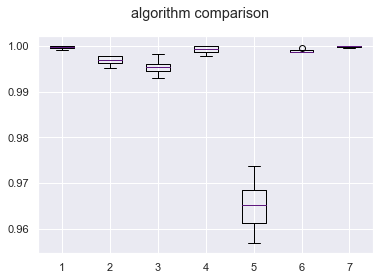

In [301]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier


results=[]
names=[]
models=[]
lr=LogisticRegression()
knn=KNeighborsClassifier()
#svm=SVC(probability=True)
rf=RandomForestClassifier()
nb=GaussianNB()
rf_boost=AdaBoostClassifier()
gboost=GradientBoostingClassifier()
cbc=CatBoostClassifier()

models.append(('cbc',cbc))
models.append(('lr',lr))
models.append(('knn',knn))
#models.append(('svm',svm))
models.append(('rf',rf))
models.append(('nb',nb))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))

for name,model in models:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x,y,cv=kfold,scoring='recall') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 recall scores. we are taking its average.
    
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()

In [302]:
for name,algo in models:
    print(algo)
    model=algo.fit(x,y)

Learning rate set to 0.039918
0:	learn: 0.5927388	total: 21.6ms	remaining: 21.5s
1:	learn: 0.5135415	total: 43.4ms	remaining: 21.7s
2:	learn: 0.4359300	total: 54.5ms	remaining: 18.1s
3:	learn: 0.3980151	total: 69.3ms	remaining: 17.3s
4:	learn: 0.3316010	total: 91.3ms	remaining: 18.2s
5:	learn: 0.3083113	total: 107ms	remaining: 17.8s
6:	learn: 0.2899536	total: 129ms	remaining: 18.4s
7:	learn: 0.2711398	total: 151ms	remaining: 18.7s
8:	learn: 0.2303320	total: 172ms	remaining: 19s
9:	learn: 0.2051346	total: 202ms	remaining: 20s
10:	learn: 0.1962460	total: 217ms	remaining: 19.6s
11:	learn: 0.1888805	total: 234ms	remaining: 19.3s
12:	learn: 0.1816230	total: 254ms	remaining: 19.3s
13:	learn: 0.1665714	total: 266ms	remaining: 18.7s
14:	learn: 0.1524496	total: 287ms	remaining: 18.9s
15:	learn: 0.1482490	total: 309ms	remaining: 19s
16:	learn: 0.1374071	total: 331ms	remaining: 19.1s
17:	learn: 0.1278093	total: 350ms	remaining: 19.1s
18:	learn: 0.1230590	total: 370ms	remaining: 19.1s
19:	learn: 0

164:	learn: 0.0062215	total: 3.13s	remaining: 15.8s
165:	learn: 0.0062053	total: 3.15s	remaining: 15.8s
166:	learn: 0.0061610	total: 3.17s	remaining: 15.8s
167:	learn: 0.0061140	total: 3.19s	remaining: 15.8s
168:	learn: 0.0060523	total: 3.21s	remaining: 15.8s
169:	learn: 0.0059954	total: 3.23s	remaining: 15.8s
170:	learn: 0.0059632	total: 3.25s	remaining: 15.8s
171:	learn: 0.0058641	total: 3.27s	remaining: 15.8s
172:	learn: 0.0058641	total: 3.28s	remaining: 15.7s
173:	learn: 0.0058035	total: 3.31s	remaining: 15.7s
174:	learn: 0.0057732	total: 3.32s	remaining: 15.7s
175:	learn: 0.0057312	total: 3.33s	remaining: 15.6s
176:	learn: 0.0056619	total: 3.35s	remaining: 15.6s
177:	learn: 0.0056257	total: 3.36s	remaining: 15.5s
178:	learn: 0.0056257	total: 3.37s	remaining: 15.5s
179:	learn: 0.0055820	total: 3.4s	remaining: 15.5s
180:	learn: 0.0055347	total: 3.41s	remaining: 15.4s
181:	learn: 0.0054411	total: 3.44s	remaining: 15.4s
182:	learn: 0.0053739	total: 3.45s	remaining: 15.4s
183:	learn: 0

328:	learn: 0.0039317	total: 5.49s	remaining: 11.2s
329:	learn: 0.0039317	total: 5.5s	remaining: 11.2s
330:	learn: 0.0039316	total: 5.51s	remaining: 11.1s
331:	learn: 0.0039316	total: 5.52s	remaining: 11.1s
332:	learn: 0.0039316	total: 5.53s	remaining: 11.1s
333:	learn: 0.0039316	total: 5.53s	remaining: 11s
334:	learn: 0.0039316	total: 5.54s	remaining: 11s
335:	learn: 0.0039316	total: 5.55s	remaining: 11s
336:	learn: 0.0039316	total: 5.56s	remaining: 10.9s
337:	learn: 0.0039316	total: 5.57s	remaining: 10.9s
338:	learn: 0.0039316	total: 5.58s	remaining: 10.9s
339:	learn: 0.0039316	total: 5.59s	remaining: 10.8s
340:	learn: 0.0039316	total: 5.6s	remaining: 10.8s
341:	learn: 0.0039316	total: 5.61s	remaining: 10.8s
342:	learn: 0.0039316	total: 5.62s	remaining: 10.8s
343:	learn: 0.0039315	total: 5.63s	remaining: 10.7s
344:	learn: 0.0039315	total: 5.63s	remaining: 10.7s
345:	learn: 0.0039315	total: 5.65s	remaining: 10.7s
346:	learn: 0.0039315	total: 5.67s	remaining: 10.7s
347:	learn: 0.003931

494:	learn: 0.0039306	total: 7.69s	remaining: 7.85s
495:	learn: 0.0039306	total: 7.71s	remaining: 7.83s
496:	learn: 0.0039306	total: 7.71s	remaining: 7.81s
497:	learn: 0.0039306	total: 7.72s	remaining: 7.78s
498:	learn: 0.0039306	total: 7.73s	remaining: 7.76s
499:	learn: 0.0039306	total: 7.75s	remaining: 7.75s
500:	learn: 0.0039306	total: 7.75s	remaining: 7.72s
501:	learn: 0.0039306	total: 7.76s	remaining: 7.7s
502:	learn: 0.0039306	total: 7.78s	remaining: 7.68s
503:	learn: 0.0039306	total: 7.79s	remaining: 7.67s
504:	learn: 0.0039306	total: 7.8s	remaining: 7.65s
505:	learn: 0.0039306	total: 7.82s	remaining: 7.63s
506:	learn: 0.0039306	total: 7.83s	remaining: 7.62s
507:	learn: 0.0039306	total: 7.84s	remaining: 7.59s
508:	learn: 0.0039306	total: 7.85s	remaining: 7.58s
509:	learn: 0.0039306	total: 7.87s	remaining: 7.56s
510:	learn: 0.0039306	total: 7.88s	remaining: 7.54s
511:	learn: 0.0039306	total: 7.89s	remaining: 7.52s
512:	learn: 0.0039306	total: 7.9s	remaining: 7.5s
513:	learn: 0.00

658:	learn: 0.0039306	total: 9.47s	remaining: 4.9s
659:	learn: 0.0039306	total: 9.48s	remaining: 4.88s
660:	learn: 0.0039306	total: 9.48s	remaining: 4.86s
661:	learn: 0.0039306	total: 9.49s	remaining: 4.85s
662:	learn: 0.0039306	total: 9.5s	remaining: 4.83s
663:	learn: 0.0039306	total: 9.51s	remaining: 4.81s
664:	learn: 0.0039306	total: 9.52s	remaining: 4.79s
665:	learn: 0.0039306	total: 9.52s	remaining: 4.78s
666:	learn: 0.0039306	total: 9.53s	remaining: 4.76s
667:	learn: 0.0039306	total: 9.54s	remaining: 4.74s
668:	learn: 0.0039306	total: 9.55s	remaining: 4.73s
669:	learn: 0.0039306	total: 9.56s	remaining: 4.71s
670:	learn: 0.0039306	total: 9.58s	remaining: 4.7s
671:	learn: 0.0039306	total: 9.59s	remaining: 4.68s
672:	learn: 0.0039306	total: 9.59s	remaining: 4.66s
673:	learn: 0.0039306	total: 9.61s	remaining: 4.65s
674:	learn: 0.0039306	total: 9.61s	remaining: 4.63s
675:	learn: 0.0039306	total: 9.62s	remaining: 4.61s
676:	learn: 0.0039306	total: 9.63s	remaining: 4.59s
677:	learn: 0.0

825:	learn: 0.0039306	total: 11.1s	remaining: 2.33s
826:	learn: 0.0039306	total: 11.1s	remaining: 2.32s
827:	learn: 0.0039306	total: 11.1s	remaining: 2.31s
828:	learn: 0.0039306	total: 11.1s	remaining: 2.29s
829:	learn: 0.0039306	total: 11.1s	remaining: 2.28s
830:	learn: 0.0039306	total: 11.1s	remaining: 2.26s
831:	learn: 0.0039306	total: 11.1s	remaining: 2.25s
832:	learn: 0.0039306	total: 11.2s	remaining: 2.23s
833:	learn: 0.0039306	total: 11.2s	remaining: 2.22s
834:	learn: 0.0039306	total: 11.2s	remaining: 2.21s
835:	learn: 0.0039306	total: 11.2s	remaining: 2.19s
836:	learn: 0.0039306	total: 11.2s	remaining: 2.18s
837:	learn: 0.0039306	total: 11.2s	remaining: 2.17s
838:	learn: 0.0039306	total: 11.2s	remaining: 2.15s
839:	learn: 0.0039306	total: 11.2s	remaining: 2.14s
840:	learn: 0.0039306	total: 11.3s	remaining: 2.13s
841:	learn: 0.0039306	total: 11.3s	remaining: 2.11s
842:	learn: 0.0039306	total: 11.3s	remaining: 2.1s
843:	learn: 0.0039306	total: 11.3s	remaining: 2.09s
844:	learn: 0

987:	learn: 0.0039306	total: 13s	remaining: 158ms
988:	learn: 0.0039306	total: 13s	remaining: 145ms
989:	learn: 0.0039306	total: 13s	remaining: 132ms
990:	learn: 0.0039306	total: 13.1s	remaining: 119ms
991:	learn: 0.0039306	total: 13.1s	remaining: 105ms
992:	learn: 0.0039306	total: 13.1s	remaining: 92.2ms
993:	learn: 0.0039306	total: 13.1s	remaining: 79ms
994:	learn: 0.0039306	total: 13.1s	remaining: 65.9ms
995:	learn: 0.0039306	total: 13.1s	remaining: 52.7ms
996:	learn: 0.0039306	total: 13.1s	remaining: 39.5ms
997:	learn: 0.0039306	total: 13.1s	remaining: 26.3ms
998:	learn: 0.0039306	total: 13.2s	remaining: 13.2ms
999:	learn: 0.0039306	total: 13.2s	remaining: 0us
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
K

In [304]:

id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/Test.csv")
y_pred=lr.predict(x_test)
r1=id['INCIDENT_ID']
r2=pd.DataFrame(y_pred,columns=['MULTIPLE_OFFENSE'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/results/lr_base.csv',index=False)


id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/Test.csv")
y_pred=knn.predict(x_test)
r1=id['INCIDENT_ID']
r2=pd.DataFrame(y_pred,columns=['MULTIPLE_OFFENSE'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/results/knn_base.csv',index=False)


id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/Test.csv")
y_pred=rf.predict(x_test)
r1=id['INCIDENT_ID']
r2=pd.DataFrame(y_pred,columns=['MULTIPLE_OFFENSE'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/results/rf_base.csv',index=False)


id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/Test.csv")
y_pred=nb.predict(x_test)
r1=id['INCIDENT_ID']
r2=pd.DataFrame(y_pred,columns=['MULTIPLE_OFFENSE'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/results/nb_base.csv',index=False)


id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/Test.csv")
y_pred=rf_boost.predict(x_test)
r1=id['INCIDENT_ID']
r2=pd.DataFrame(y_pred,columns=['MULTIPLE_OFFENSE'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/results/rfboost_base.csv',index=False)


id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/Test.csv")
y_pred=gboost.predict(x_test)
r1=id['INCIDENT_ID']
r2=pd.DataFrame(y_pred,columns=['MULTIPLE_OFFENSE'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/results/gboost_base.csv',index=False)


id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/Test.csv")
y_pred=cbc.predict(x_test)
r1=id['INCIDENT_ID']
r2=pd.DataFrame(y_pred,columns=['MULTIPLE_OFFENSE'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/results/cbc_base.csv',index=False)

# Inference:
    we can see ensemble algorithms and boosting algorithms are giving good results compared to logistic,KNN,Naive Bayes etc.
    we shall do upsampling of the observations now and build a base model on it.

In [307]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(ratio='minority')   #only upsampling the minority class

In [309]:
train=df1[df1['train/test']==1]
test=df1[df1['train/test']==0]
y=train['MULTIPLE_OFFENSE']
x=train.drop(columns=['MULTIPLE_OFFENSE',"train/test"])
x_test=test.drop(columns=["train/test",'MULTIPLE_OFFENSE'])

x_smote,y_smote=smote.fit_sample(x,y)


print("x_train shape is ",x_smote.shape)
print("y_train shape is ",y_smote.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (45576, 32)
y_train shape is  (45576,)
x_test shape is  (15903, 32)


In [313]:
(pd.DataFrame(y_smote,columns=['y']))['y'].value_counts()

1.0    22788
0.0    22788
Name: y, dtype: int64

Learning rate set to 0.050312
0:	learn: 0.5765257	total: 42.2ms	remaining: 42.2s
1:	learn: 0.4763439	total: 76.1ms	remaining: 38s
2:	learn: 0.3984719	total: 110ms	remaining: 36.5s
3:	learn: 0.3419738	total: 142ms	remaining: 35.4s
4:	learn: 0.2907672	total: 175ms	remaining: 34.8s
5:	learn: 0.2594830	total: 206ms	remaining: 34.2s
6:	learn: 0.2291470	total: 233ms	remaining: 33s
7:	learn: 0.2098041	total: 255ms	remaining: 31.7s
8:	learn: 0.1874472	total: 293ms	remaining: 32.2s
9:	learn: 0.1719632	total: 325ms	remaining: 32.1s
10:	learn: 0.1539609	total: 355ms	remaining: 31.9s
11:	learn: 0.1394186	total: 384ms	remaining: 31.6s
12:	learn: 0.1249133	total: 404ms	remaining: 30.7s
13:	learn: 0.1143574	total: 430ms	remaining: 30.3s
14:	learn: 0.1068177	total: 463ms	remaining: 30.4s
15:	learn: 0.0995606	total: 493ms	remaining: 30.3s
16:	learn: 0.0914760	total: 513ms	remaining: 29.7s
17:	learn: 0.0841936	total: 535ms	remaining: 29.2s
18:	learn: 0.0802949	total: 564ms	remaining: 29.1s
19:	learn: 0.

165:	learn: 0.0051130	total: 5.21s	remaining: 26.2s
166:	learn: 0.0050861	total: 5.24s	remaining: 26.1s
167:	learn: 0.0050677	total: 5.27s	remaining: 26.1s
168:	learn: 0.0050381	total: 5.31s	remaining: 26.1s
169:	learn: 0.0050284	total: 5.35s	remaining: 26.1s
170:	learn: 0.0050178	total: 5.37s	remaining: 26s
171:	learn: 0.0050056	total: 5.4s	remaining: 26s
172:	learn: 0.0049467	total: 5.43s	remaining: 26s
173:	learn: 0.0048480	total: 5.45s	remaining: 25.9s
174:	learn: 0.0047928	total: 5.48s	remaining: 25.8s
175:	learn: 0.0047722	total: 5.5s	remaining: 25.8s
176:	learn: 0.0047416	total: 5.54s	remaining: 25.7s
177:	learn: 0.0047180	total: 5.56s	remaining: 25.7s
178:	learn: 0.0046972	total: 5.58s	remaining: 25.6s
179:	learn: 0.0046910	total: 5.61s	remaining: 25.5s
180:	learn: 0.0046910	total: 5.62s	remaining: 25.4s
181:	learn: 0.0046679	total: 5.64s	remaining: 25.4s
182:	learn: 0.0046530	total: 5.66s	remaining: 25.3s
183:	learn: 0.0046468	total: 5.7s	remaining: 25.3s
184:	learn: 0.0045874

331:	learn: 0.0032275	total: 8.96s	remaining: 18s
332:	learn: 0.0032275	total: 8.98s	remaining: 18s
333:	learn: 0.0032275	total: 9s	remaining: 17.9s
334:	learn: 0.0032275	total: 9.02s	remaining: 17.9s
335:	learn: 0.0032274	total: 9.04s	remaining: 17.9s
336:	learn: 0.0032274	total: 9.05s	remaining: 17.8s
337:	learn: 0.0032274	total: 9.07s	remaining: 17.8s
338:	learn: 0.0032274	total: 9.09s	remaining: 17.7s
339:	learn: 0.0032274	total: 9.11s	remaining: 17.7s
340:	learn: 0.0032274	total: 9.12s	remaining: 17.6s
341:	learn: 0.0032274	total: 9.14s	remaining: 17.6s
342:	learn: 0.0032274	total: 9.16s	remaining: 17.5s
343:	learn: 0.0032274	total: 9.19s	remaining: 17.5s
344:	learn: 0.0032274	total: 9.2s	remaining: 17.5s
345:	learn: 0.0032273	total: 9.22s	remaining: 17.4s
346:	learn: 0.0032273	total: 9.24s	remaining: 17.4s
347:	learn: 0.0032273	total: 9.26s	remaining: 17.3s
348:	learn: 0.0032273	total: 9.28s	remaining: 17.3s
349:	learn: 0.0032273	total: 9.3s	remaining: 17.3s
350:	learn: 0.0032273

491:	learn: 0.0032260	total: 12.3s	remaining: 12.7s
492:	learn: 0.0032260	total: 12.3s	remaining: 12.7s
493:	learn: 0.0032260	total: 12.3s	remaining: 12.6s
494:	learn: 0.0032259	total: 12.4s	remaining: 12.6s
495:	learn: 0.0032259	total: 12.4s	remaining: 12.6s
496:	learn: 0.0032259	total: 12.4s	remaining: 12.6s
497:	learn: 0.0032259	total: 12.4s	remaining: 12.5s
498:	learn: 0.0032259	total: 12.4s	remaining: 12.5s
499:	learn: 0.0032259	total: 12.5s	remaining: 12.5s
500:	learn: 0.0032259	total: 12.5s	remaining: 12.4s
501:	learn: 0.0032259	total: 12.5s	remaining: 12.4s
502:	learn: 0.0032259	total: 12.5s	remaining: 12.4s
503:	learn: 0.0032258	total: 12.6s	remaining: 12.4s
504:	learn: 0.0032258	total: 12.6s	remaining: 12.3s
505:	learn: 0.0032258	total: 12.6s	remaining: 12.3s
506:	learn: 0.0032258	total: 12.6s	remaining: 12.3s
507:	learn: 0.0032258	total: 12.7s	remaining: 12.3s
508:	learn: 0.0032258	total: 12.7s	remaining: 12.2s
509:	learn: 0.0032258	total: 12.7s	remaining: 12.2s
510:	learn: 

658:	learn: 0.0031789	total: 15.9s	remaining: 8.2s
659:	learn: 0.0031789	total: 15.9s	remaining: 8.17s
660:	learn: 0.0031789	total: 15.9s	remaining: 8.15s
661:	learn: 0.0031789	total: 15.9s	remaining: 8.12s
662:	learn: 0.0031789	total: 15.9s	remaining: 8.09s
663:	learn: 0.0031789	total: 15.9s	remaining: 8.06s
664:	learn: 0.0031789	total: 16s	remaining: 8.04s
665:	learn: 0.0031789	total: 16s	remaining: 8.02s
666:	learn: 0.0031789	total: 16s	remaining: 7.99s
667:	learn: 0.0031789	total: 16s	remaining: 7.96s
668:	learn: 0.0031789	total: 16s	remaining: 7.94s
669:	learn: 0.0031789	total: 16.1s	remaining: 7.91s
670:	learn: 0.0031789	total: 16.1s	remaining: 7.89s
671:	learn: 0.0031789	total: 16.1s	remaining: 7.86s
672:	learn: 0.0031789	total: 16.1s	remaining: 7.84s
673:	learn: 0.0031789	total: 16.2s	remaining: 7.81s
674:	learn: 0.0031788	total: 16.2s	remaining: 7.79s
675:	learn: 0.0031788	total: 16.2s	remaining: 7.76s
676:	learn: 0.0031788	total: 16.2s	remaining: 7.73s
677:	learn: 0.0031788	t

823:	learn: 0.0031777	total: 19.6s	remaining: 4.18s
824:	learn: 0.0031777	total: 19.6s	remaining: 4.15s
825:	learn: 0.0031777	total: 19.6s	remaining: 4.13s
826:	learn: 0.0031777	total: 19.6s	remaining: 4.11s
827:	learn: 0.0031777	total: 19.7s	remaining: 4.09s
828:	learn: 0.0031777	total: 19.7s	remaining: 4.06s
829:	learn: 0.0031777	total: 19.7s	remaining: 4.04s
830:	learn: 0.0031777	total: 19.7s	remaining: 4.01s
831:	learn: 0.0031777	total: 19.8s	remaining: 3.99s
832:	learn: 0.0031777	total: 19.8s	remaining: 3.97s
833:	learn: 0.0031777	total: 19.8s	remaining: 3.94s
834:	learn: 0.0031777	total: 19.8s	remaining: 3.92s
835:	learn: 0.0031777	total: 19.9s	remaining: 3.9s
836:	learn: 0.0031777	total: 19.9s	remaining: 3.87s
837:	learn: 0.0031777	total: 19.9s	remaining: 3.85s
838:	learn: 0.0031777	total: 19.9s	remaining: 3.82s
839:	learn: 0.0031777	total: 19.9s	remaining: 3.8s
840:	learn: 0.0031777	total: 20s	remaining: 3.77s
841:	learn: 0.0031777	total: 20s	remaining: 3.75s
842:	learn: 0.0031

987:	learn: 0.0031764	total: 22.8s	remaining: 277ms
988:	learn: 0.0031764	total: 22.8s	remaining: 254ms
989:	learn: 0.0031764	total: 22.9s	remaining: 231ms
990:	learn: 0.0031764	total: 22.9s	remaining: 208ms
991:	learn: 0.0031764	total: 22.9s	remaining: 185ms
992:	learn: 0.0031764	total: 23s	remaining: 162ms
993:	learn: 0.0031764	total: 23s	remaining: 139ms
994:	learn: 0.0031764	total: 23s	remaining: 116ms
995:	learn: 0.0031764	total: 23s	remaining: 92.4ms
996:	learn: 0.0031764	total: 23s	remaining: 69.3ms
997:	learn: 0.0031764	total: 23.1s	remaining: 46.2ms
998:	learn: 0.0031764	total: 23.1s	remaining: 23.1ms
999:	learn: 0.0031764	total: 23.1s	remaining: 0us
Learning rate set to 0.050312
0:	learn: 0.5767325	total: 31.8ms	remaining: 31.8s
1:	learn: 0.4769077	total: 58.4ms	remaining: 29.1s
2:	learn: 0.3988741	total: 86.4ms	remaining: 28.7s
3:	learn: 0.3462077	total: 120ms	remaining: 29.8s
4:	learn: 0.2936833	total: 155ms	remaining: 30.8s
5:	learn: 0.2622260	total: 199ms	remaining: 32.9s

152:	learn: 0.0061492	total: 4.93s	remaining: 27.3s
153:	learn: 0.0061085	total: 4.96s	remaining: 27.3s
154:	learn: 0.0060941	total: 4.99s	remaining: 27.2s
155:	learn: 0.0060246	total: 5.03s	remaining: 27.2s
156:	learn: 0.0059856	total: 5.06s	remaining: 27.1s
157:	learn: 0.0059632	total: 5.09s	remaining: 27.1s
158:	learn: 0.0059563	total: 5.11s	remaining: 27.1s
159:	learn: 0.0059114	total: 5.15s	remaining: 27s
160:	learn: 0.0058768	total: 5.18s	remaining: 27s
161:	learn: 0.0058530	total: 5.21s	remaining: 27s
162:	learn: 0.0057520	total: 5.25s	remaining: 26.9s
163:	learn: 0.0057151	total: 5.28s	remaining: 26.9s
164:	learn: 0.0056984	total: 5.31s	remaining: 26.9s
165:	learn: 0.0056628	total: 5.34s	remaining: 26.8s
166:	learn: 0.0056282	total: 5.37s	remaining: 26.8s
167:	learn: 0.0055940	total: 5.4s	remaining: 26.7s
168:	learn: 0.0055623	total: 5.43s	remaining: 26.7s
169:	learn: 0.0055527	total: 5.46s	remaining: 26.7s
170:	learn: 0.0054950	total: 5.49s	remaining: 26.6s
171:	learn: 0.00548

313:	learn: 0.0029098	total: 9.32s	remaining: 20.4s
314:	learn: 0.0029098	total: 9.34s	remaining: 20.3s
315:	learn: 0.0029098	total: 9.37s	remaining: 20.3s
316:	learn: 0.0029098	total: 9.4s	remaining: 20.3s
317:	learn: 0.0029098	total: 9.43s	remaining: 20.2s
318:	learn: 0.0029098	total: 9.46s	remaining: 20.2s
319:	learn: 0.0029097	total: 9.48s	remaining: 20.2s
320:	learn: 0.0029097	total: 9.51s	remaining: 20.1s
321:	learn: 0.0029097	total: 9.54s	remaining: 20.1s
322:	learn: 0.0029097	total: 9.56s	remaining: 20s
323:	learn: 0.0029097	total: 9.58s	remaining: 20s
324:	learn: 0.0029097	total: 9.61s	remaining: 20s
325:	learn: 0.0029096	total: 9.64s	remaining: 19.9s
326:	learn: 0.0029096	total: 9.66s	remaining: 19.9s
327:	learn: 0.0029096	total: 9.69s	remaining: 19.9s
328:	learn: 0.0029096	total: 9.72s	remaining: 19.8s
329:	learn: 0.0029096	total: 9.74s	remaining: 19.8s
330:	learn: 0.0029096	total: 9.76s	remaining: 19.7s
331:	learn: 0.0029096	total: 9.79s	remaining: 19.7s
332:	learn: 0.00290

474:	learn: 0.0029084	total: 13.3s	remaining: 14.7s
475:	learn: 0.0029084	total: 13.3s	remaining: 14.7s
476:	learn: 0.0029084	total: 13.3s	remaining: 14.6s
477:	learn: 0.0029084	total: 13.4s	remaining: 14.6s
478:	learn: 0.0029084	total: 13.4s	remaining: 14.5s
479:	learn: 0.0029084	total: 13.4s	remaining: 14.5s
480:	learn: 0.0029084	total: 13.4s	remaining: 14.5s
481:	learn: 0.0029083	total: 13.4s	remaining: 14.4s
482:	learn: 0.0029083	total: 13.4s	remaining: 14.4s
483:	learn: 0.0029083	total: 13.4s	remaining: 14.3s
484:	learn: 0.0029083	total: 13.5s	remaining: 14.3s
485:	learn: 0.0029083	total: 13.5s	remaining: 14.3s
486:	learn: 0.0029083	total: 13.5s	remaining: 14.2s
487:	learn: 0.0029083	total: 13.5s	remaining: 14.2s
488:	learn: 0.0029083	total: 13.6s	remaining: 14.2s
489:	learn: 0.0029083	total: 13.6s	remaining: 14.2s
490:	learn: 0.0029083	total: 13.6s	remaining: 14.1s
491:	learn: 0.0029083	total: 13.6s	remaining: 14.1s
492:	learn: 0.0029082	total: 13.7s	remaining: 14.1s
493:	learn: 

637:	learn: 0.0029070	total: 16.6s	remaining: 9.44s
638:	learn: 0.0029070	total: 16.7s	remaining: 9.41s
639:	learn: 0.0029070	total: 16.7s	remaining: 9.38s
640:	learn: 0.0029070	total: 16.7s	remaining: 9.36s
641:	learn: 0.0029070	total: 16.7s	remaining: 9.33s
642:	learn: 0.0029070	total: 16.8s	remaining: 9.3s
643:	learn: 0.0029070	total: 16.8s	remaining: 9.28s
644:	learn: 0.0029070	total: 16.8s	remaining: 9.26s
645:	learn: 0.0029070	total: 16.8s	remaining: 9.23s
646:	learn: 0.0029070	total: 16.9s	remaining: 9.2s
647:	learn: 0.0029070	total: 16.9s	remaining: 9.17s
648:	learn: 0.0029070	total: 16.9s	remaining: 9.14s
649:	learn: 0.0029070	total: 16.9s	remaining: 9.11s
650:	learn: 0.0029070	total: 16.9s	remaining: 9.08s
651:	learn: 0.0029070	total: 17s	remaining: 9.05s
652:	learn: 0.0029070	total: 17s	remaining: 9.03s
653:	learn: 0.0029070	total: 17s	remaining: 9s
654:	learn: 0.0029070	total: 17s	remaining: 8.97s
655:	learn: 0.0029070	total: 17.1s	remaining: 8.94s
656:	learn: 0.0029070	tot

804:	learn: 0.0029056	total: 20.6s	remaining: 4.98s
805:	learn: 0.0029056	total: 20.6s	remaining: 4.96s
806:	learn: 0.0029056	total: 20.6s	remaining: 4.93s
807:	learn: 0.0029056	total: 20.6s	remaining: 4.9s
808:	learn: 0.0029056	total: 20.6s	remaining: 4.87s
809:	learn: 0.0029055	total: 20.7s	remaining: 4.85s
810:	learn: 0.0029055	total: 20.7s	remaining: 4.82s
811:	learn: 0.0029055	total: 20.7s	remaining: 4.79s
812:	learn: 0.0029055	total: 20.7s	remaining: 4.77s
813:	learn: 0.0029055	total: 20.7s	remaining: 4.74s
814:	learn: 0.0029055	total: 20.8s	remaining: 4.71s
815:	learn: 0.0029055	total: 20.8s	remaining: 4.69s
816:	learn: 0.0029055	total: 20.8s	remaining: 4.66s
817:	learn: 0.0029055	total: 20.8s	remaining: 4.63s
818:	learn: 0.0029055	total: 20.8s	remaining: 4.61s
819:	learn: 0.0029055	total: 20.9s	remaining: 4.58s
820:	learn: 0.0029055	total: 20.9s	remaining: 4.55s
821:	learn: 0.0029055	total: 20.9s	remaining: 4.53s
822:	learn: 0.0029055	total: 20.9s	remaining: 4.5s
823:	learn: 0.

969:	learn: 0.0029043	total: 24.5s	remaining: 756ms
970:	learn: 0.0029043	total: 24.5s	remaining: 731ms
971:	learn: 0.0029043	total: 24.5s	remaining: 706ms
972:	learn: 0.0029043	total: 24.5s	remaining: 681ms
973:	learn: 0.0029043	total: 24.6s	remaining: 656ms
974:	learn: 0.0029043	total: 24.6s	remaining: 630ms
975:	learn: 0.0029043	total: 24.6s	remaining: 605ms
976:	learn: 0.0029043	total: 24.6s	remaining: 580ms
977:	learn: 0.0029043	total: 24.6s	remaining: 554ms
978:	learn: 0.0029043	total: 24.7s	remaining: 529ms
979:	learn: 0.0029043	total: 24.7s	remaining: 504ms
980:	learn: 0.0029043	total: 24.7s	remaining: 479ms
981:	learn: 0.0029043	total: 24.7s	remaining: 453ms
982:	learn: 0.0029042	total: 24.8s	remaining: 428ms
983:	learn: 0.0029042	total: 24.8s	remaining: 403ms
984:	learn: 0.0029042	total: 24.8s	remaining: 378ms
985:	learn: 0.0029042	total: 24.8s	remaining: 353ms
986:	learn: 0.0029042	total: 24.8s	remaining: 327ms
987:	learn: 0.0029042	total: 24.9s	remaining: 302ms
988:	learn: 

132:	learn: 0.0085208	total: 3.7s	remaining: 24.1s
133:	learn: 0.0085146	total: 3.73s	remaining: 24.1s
134:	learn: 0.0084267	total: 3.75s	remaining: 24.1s
135:	learn: 0.0083893	total: 3.79s	remaining: 24.1s
136:	learn: 0.0083011	total: 3.82s	remaining: 24.1s
137:	learn: 0.0081749	total: 3.86s	remaining: 24.1s
138:	learn: 0.0080968	total: 3.9s	remaining: 24.2s
139:	learn: 0.0079863	total: 3.94s	remaining: 24.2s
140:	learn: 0.0079625	total: 3.97s	remaining: 24.2s
141:	learn: 0.0079118	total: 4s	remaining: 24.2s
142:	learn: 0.0078900	total: 4.03s	remaining: 24.2s
143:	learn: 0.0077001	total: 4.06s	remaining: 24.2s
144:	learn: 0.0075941	total: 4.09s	remaining: 24.1s
145:	learn: 0.0075327	total: 4.13s	remaining: 24.1s
146:	learn: 0.0074982	total: 4.16s	remaining: 24.1s
147:	learn: 0.0074592	total: 4.19s	remaining: 24.1s
148:	learn: 0.0074102	total: 4.22s	remaining: 24.1s
149:	learn: 0.0073374	total: 4.26s	remaining: 24.1s
150:	learn: 0.0072849	total: 4.28s	remaining: 24.1s
151:	learn: 0.007

293:	learn: 0.0033933	total: 8.06s	remaining: 19.4s
294:	learn: 0.0033933	total: 8.08s	remaining: 19.3s
295:	learn: 0.0033933	total: 8.11s	remaining: 19.3s
296:	learn: 0.0033933	total: 8.13s	remaining: 19.2s
297:	learn: 0.0033933	total: 8.15s	remaining: 19.2s
298:	learn: 0.0033933	total: 8.17s	remaining: 19.2s
299:	learn: 0.0033932	total: 8.2s	remaining: 19.1s
300:	learn: 0.0033932	total: 8.22s	remaining: 19.1s
301:	learn: 0.0033932	total: 8.24s	remaining: 19.1s
302:	learn: 0.0033932	total: 8.26s	remaining: 19s
303:	learn: 0.0033932	total: 8.28s	remaining: 19s
304:	learn: 0.0033932	total: 8.3s	remaining: 18.9s
305:	learn: 0.0033932	total: 8.33s	remaining: 18.9s
306:	learn: 0.0033932	total: 8.38s	remaining: 18.9s
307:	learn: 0.0033931	total: 8.39s	remaining: 18.9s
308:	learn: 0.0033931	total: 8.41s	remaining: 18.8s
309:	learn: 0.0033931	total: 8.43s	remaining: 18.8s
310:	learn: 0.0033931	total: 8.45s	remaining: 18.7s
311:	learn: 0.0033931	total: 8.47s	remaining: 18.7s
312:	learn: 0.0033

457:	learn: 0.0033919	total: 11.6s	remaining: 13.7s
458:	learn: 0.0033919	total: 11.6s	remaining: 13.7s
459:	learn: 0.0033919	total: 11.6s	remaining: 13.6s
460:	learn: 0.0033919	total: 11.6s	remaining: 13.6s
461:	learn: 0.0033919	total: 11.7s	remaining: 13.6s
462:	learn: 0.0033919	total: 11.7s	remaining: 13.6s
463:	learn: 0.0033919	total: 11.7s	remaining: 13.5s
464:	learn: 0.0033919	total: 11.7s	remaining: 13.5s
465:	learn: 0.0033919	total: 11.7s	remaining: 13.5s
466:	learn: 0.0033919	total: 11.8s	remaining: 13.4s
467:	learn: 0.0033919	total: 11.8s	remaining: 13.4s
468:	learn: 0.0033919	total: 11.8s	remaining: 13.4s
469:	learn: 0.0033918	total: 11.8s	remaining: 13.3s
470:	learn: 0.0033918	total: 11.8s	remaining: 13.3s
471:	learn: 0.0033918	total: 11.9s	remaining: 13.3s
472:	learn: 0.0033918	total: 11.9s	remaining: 13.2s
473:	learn: 0.0033918	total: 11.9s	remaining: 13.2s
474:	learn: 0.0033918	total: 11.9s	remaining: 13.2s
475:	learn: 0.0033918	total: 11.9s	remaining: 13.2s
476:	learn: 

620:	learn: 0.0033905	total: 15.2s	remaining: 9.27s
621:	learn: 0.0033905	total: 15.2s	remaining: 9.23s
622:	learn: 0.0033905	total: 15.2s	remaining: 9.21s
623:	learn: 0.0033905	total: 15.2s	remaining: 9.18s
624:	learn: 0.0033904	total: 15.3s	remaining: 9.16s
625:	learn: 0.0033904	total: 15.3s	remaining: 9.14s
626:	learn: 0.0033904	total: 15.3s	remaining: 9.12s
627:	learn: 0.0033904	total: 15.3s	remaining: 9.09s
628:	learn: 0.0033904	total: 15.4s	remaining: 9.07s
629:	learn: 0.0033904	total: 15.4s	remaining: 9.04s
630:	learn: 0.0033904	total: 15.4s	remaining: 9.02s
631:	learn: 0.0033904	total: 15.5s	remaining: 9s
632:	learn: 0.0033904	total: 15.5s	remaining: 8.97s
633:	learn: 0.0033904	total: 15.5s	remaining: 8.95s
634:	learn: 0.0033904	total: 15.5s	remaining: 8.93s
635:	learn: 0.0033904	total: 15.6s	remaining: 8.9s
636:	learn: 0.0033904	total: 15.6s	remaining: 8.88s
637:	learn: 0.0033904	total: 15.6s	remaining: 8.86s
638:	learn: 0.0033904	total: 15.6s	remaining: 8.84s
639:	learn: 0.00

779:	learn: 0.0033893	total: 18.8s	remaining: 5.29s
780:	learn: 0.0033892	total: 18.8s	remaining: 5.26s
781:	learn: 0.0033892	total: 18.8s	remaining: 5.24s
782:	learn: 0.0033892	total: 18.8s	remaining: 5.22s
783:	learn: 0.0033892	total: 18.9s	remaining: 5.19s
784:	learn: 0.0033892	total: 18.9s	remaining: 5.17s
785:	learn: 0.0033892	total: 18.9s	remaining: 5.14s
786:	learn: 0.0033892	total: 18.9s	remaining: 5.12s
787:	learn: 0.0033892	total: 18.9s	remaining: 5.09s
788:	learn: 0.0033891	total: 19s	remaining: 5.07s
789:	learn: 0.0033891	total: 19s	remaining: 5.04s
790:	learn: 0.0033891	total: 19s	remaining: 5.02s
791:	learn: 0.0033891	total: 19s	remaining: 4.99s
792:	learn: 0.0033891	total: 19.1s	remaining: 4.97s
793:	learn: 0.0033891	total: 19.1s	remaining: 4.95s
794:	learn: 0.0033891	total: 19.1s	remaining: 4.92s
795:	learn: 0.0033891	total: 19.1s	remaining: 4.9s
796:	learn: 0.0033891	total: 19.1s	remaining: 4.88s
797:	learn: 0.0033891	total: 19.2s	remaining: 4.85s
798:	learn: 0.0033890

941:	learn: 0.0033876	total: 22.3s	remaining: 1.37s
942:	learn: 0.0033876	total: 22.3s	remaining: 1.35s
943:	learn: 0.0033876	total: 22.3s	remaining: 1.32s
944:	learn: 0.0033876	total: 22.4s	remaining: 1.3s
945:	learn: 0.0033876	total: 22.4s	remaining: 1.28s
946:	learn: 0.0033876	total: 22.4s	remaining: 1.25s
947:	learn: 0.0033876	total: 22.4s	remaining: 1.23s
948:	learn: 0.0033876	total: 22.5s	remaining: 1.21s
949:	learn: 0.0033875	total: 22.5s	remaining: 1.18s
950:	learn: 0.0033875	total: 22.5s	remaining: 1.16s
951:	learn: 0.0033875	total: 22.5s	remaining: 1.14s
952:	learn: 0.0033875	total: 22.5s	remaining: 1.11s
953:	learn: 0.0033875	total: 22.6s	remaining: 1.09s
954:	learn: 0.0033875	total: 22.6s	remaining: 1.06s
955:	learn: 0.0033875	total: 22.6s	remaining: 1.04s
956:	learn: 0.0033875	total: 22.7s	remaining: 1.02s
957:	learn: 0.0033875	total: 22.7s	remaining: 994ms
958:	learn: 0.0033875	total: 22.7s	remaining: 970ms
959:	learn: 0.0033875	total: 22.7s	remaining: 947ms
960:	learn: 0

103:	learn: 0.0092857	total: 3.36s	remaining: 28.9s
104:	learn: 0.0092517	total: 3.38s	remaining: 28.8s
105:	learn: 0.0092089	total: 3.41s	remaining: 28.8s
106:	learn: 0.0091526	total: 3.44s	remaining: 28.8s
107:	learn: 0.0091314	total: 3.48s	remaining: 28.7s
108:	learn: 0.0089928	total: 3.51s	remaining: 28.7s
109:	learn: 0.0089650	total: 3.54s	remaining: 28.6s
110:	learn: 0.0088593	total: 3.57s	remaining: 28.6s
111:	learn: 0.0087351	total: 3.6s	remaining: 28.6s
112:	learn: 0.0086678	total: 3.64s	remaining: 28.6s
113:	learn: 0.0085986	total: 3.67s	remaining: 28.5s
114:	learn: 0.0083757	total: 3.7s	remaining: 28.5s
115:	learn: 0.0082906	total: 3.74s	remaining: 28.5s
116:	learn: 0.0081588	total: 3.77s	remaining: 28.4s
117:	learn: 0.0080290	total: 3.82s	remaining: 28.5s
118:	learn: 0.0079945	total: 3.87s	remaining: 28.6s
119:	learn: 0.0079596	total: 3.9s	remaining: 28.6s
120:	learn: 0.0079283	total: 3.93s	remaining: 28.5s
121:	learn: 0.0078871	total: 3.96s	remaining: 28.5s
122:	learn: 0.0

268:	learn: 0.0027829	total: 8.74s	remaining: 23.7s
269:	learn: 0.0027829	total: 8.75s	remaining: 23.7s
270:	learn: 0.0027829	total: 8.77s	remaining: 23.6s
271:	learn: 0.0027829	total: 8.8s	remaining: 23.5s
272:	learn: 0.0027829	total: 8.82s	remaining: 23.5s
273:	learn: 0.0027829	total: 8.85s	remaining: 23.4s
274:	learn: 0.0027828	total: 8.87s	remaining: 23.4s
275:	learn: 0.0027828	total: 8.9s	remaining: 23.3s
276:	learn: 0.0027828	total: 8.92s	remaining: 23.3s
277:	learn: 0.0027828	total: 8.94s	remaining: 23.2s
278:	learn: 0.0027828	total: 8.96s	remaining: 23.2s
279:	learn: 0.0027828	total: 8.99s	remaining: 23.1s
280:	learn: 0.0027828	total: 9.01s	remaining: 23.1s
281:	learn: 0.0027828	total: 9.03s	remaining: 23s
282:	learn: 0.0027828	total: 9.06s	remaining: 22.9s
283:	learn: 0.0027828	total: 9.08s	remaining: 22.9s
284:	learn: 0.0027828	total: 9.1s	remaining: 22.8s
285:	learn: 0.0027827	total: 9.12s	remaining: 22.8s
286:	learn: 0.0027827	total: 9.14s	remaining: 22.7s
287:	learn: 0.002

436:	learn: 0.0027818	total: 11.7s	remaining: 15s
437:	learn: 0.0027818	total: 11.7s	remaining: 15s
438:	learn: 0.0027818	total: 11.7s	remaining: 14.9s
439:	learn: 0.0027818	total: 11.7s	remaining: 14.9s
440:	learn: 0.0027817	total: 11.7s	remaining: 14.9s
441:	learn: 0.0027817	total: 11.8s	remaining: 14.8s
442:	learn: 0.0027817	total: 11.8s	remaining: 14.8s
443:	learn: 0.0027817	total: 11.8s	remaining: 14.8s
444:	learn: 0.0027817	total: 11.8s	remaining: 14.7s
445:	learn: 0.0027817	total: 11.8s	remaining: 14.7s
446:	learn: 0.0027817	total: 11.9s	remaining: 14.7s
447:	learn: 0.0027817	total: 11.9s	remaining: 14.6s
448:	learn: 0.0027817	total: 11.9s	remaining: 14.6s
449:	learn: 0.0027817	total: 11.9s	remaining: 14.5s
450:	learn: 0.0027817	total: 11.9s	remaining: 14.5s
451:	learn: 0.0027817	total: 11.9s	remaining: 14.5s
452:	learn: 0.0027817	total: 12s	remaining: 14.4s
453:	learn: 0.0027817	total: 12s	remaining: 14.4s
454:	learn: 0.0027817	total: 12s	remaining: 14.4s
455:	learn: 0.0027817	

600:	learn: 0.0027815	total: 14.8s	remaining: 9.84s
601:	learn: 0.0027815	total: 14.8s	remaining: 9.81s
602:	learn: 0.0027815	total: 14.9s	remaining: 9.78s
603:	learn: 0.0027815	total: 14.9s	remaining: 9.76s
604:	learn: 0.0027815	total: 14.9s	remaining: 9.73s
605:	learn: 0.0027815	total: 14.9s	remaining: 9.7s
606:	learn: 0.0027815	total: 15s	remaining: 9.68s
607:	learn: 0.0027815	total: 15s	remaining: 9.67s
608:	learn: 0.0027815	total: 15s	remaining: 9.65s
609:	learn: 0.0027815	total: 15.1s	remaining: 9.63s
610:	learn: 0.0027815	total: 15.1s	remaining: 9.61s
611:	learn: 0.0027815	total: 15.1s	remaining: 9.58s
612:	learn: 0.0027815	total: 15.1s	remaining: 9.56s
613:	learn: 0.0027815	total: 15.1s	remaining: 9.52s
614:	learn: 0.0027815	total: 15.2s	remaining: 9.49s
615:	learn: 0.0027815	total: 15.2s	remaining: 9.47s
616:	learn: 0.0027815	total: 15.2s	remaining: 9.44s
617:	learn: 0.0027815	total: 15.2s	remaining: 9.41s
618:	learn: 0.0027815	total: 15.2s	remaining: 9.38s
619:	learn: 0.00278

767:	learn: 0.0027812	total: 18s	remaining: 5.44s
768:	learn: 0.0027812	total: 18s	remaining: 5.41s
769:	learn: 0.0027812	total: 18s	remaining: 5.39s
770:	learn: 0.0027812	total: 18.1s	remaining: 5.36s
771:	learn: 0.0027812	total: 18.1s	remaining: 5.34s
772:	learn: 0.0027812	total: 18.1s	remaining: 5.31s
773:	learn: 0.0027812	total: 18.1s	remaining: 5.29s
774:	learn: 0.0027812	total: 18.1s	remaining: 5.26s
775:	learn: 0.0027812	total: 18.1s	remaining: 5.24s
776:	learn: 0.0027812	total: 18.2s	remaining: 5.21s
777:	learn: 0.0027812	total: 18.2s	remaining: 5.19s
778:	learn: 0.0027812	total: 18.2s	remaining: 5.16s
779:	learn: 0.0027812	total: 18.2s	remaining: 5.14s
780:	learn: 0.0027812	total: 18.2s	remaining: 5.12s
781:	learn: 0.0027812	total: 18.3s	remaining: 5.09s
782:	learn: 0.0027812	total: 18.3s	remaining: 5.07s
783:	learn: 0.0027812	total: 18.3s	remaining: 5.04s
784:	learn: 0.0027812	total: 18.3s	remaining: 5.02s
785:	learn: 0.0027812	total: 18.4s	remaining: 5s
786:	learn: 0.0027812

932:	learn: 0.0027812	total: 21s	remaining: 1.51s
933:	learn: 0.0027812	total: 21s	remaining: 1.48s
934:	learn: 0.0027812	total: 21s	remaining: 1.46s
935:	learn: 0.0027812	total: 21s	remaining: 1.44s
936:	learn: 0.0027812	total: 21s	remaining: 1.41s
937:	learn: 0.0027812	total: 21s	remaining: 1.39s
938:	learn: 0.0027812	total: 21.1s	remaining: 1.37s
939:	learn: 0.0027812	total: 21.1s	remaining: 1.34s
940:	learn: 0.0027812	total: 21.1s	remaining: 1.32s
941:	learn: 0.0027812	total: 21.1s	remaining: 1.3s
942:	learn: 0.0027812	total: 21.1s	remaining: 1.28s
943:	learn: 0.0027812	total: 21.2s	remaining: 1.25s
944:	learn: 0.0027812	total: 21.2s	remaining: 1.23s
945:	learn: 0.0027812	total: 21.2s	remaining: 1.21s
946:	learn: 0.0027812	total: 21.2s	remaining: 1.19s
947:	learn: 0.0027812	total: 21.2s	remaining: 1.16s
948:	learn: 0.0027812	total: 21.2s	remaining: 1.14s
949:	learn: 0.0027812	total: 21.3s	remaining: 1.12s
950:	learn: 0.0027812	total: 21.3s	remaining: 1.1s
951:	learn: 0.0027812	tota

93:	learn: 0.0122695	total: 2.71s	remaining: 26.2s
94:	learn: 0.0122055	total: 2.74s	remaining: 26.1s
95:	learn: 0.0119260	total: 2.78s	remaining: 26.2s
96:	learn: 0.0117076	total: 2.83s	remaining: 26.3s
97:	learn: 0.0114497	total: 2.85s	remaining: 26.2s
98:	learn: 0.0112744	total: 2.88s	remaining: 26.2s
99:	learn: 0.0111102	total: 2.91s	remaining: 26.2s
100:	learn: 0.0109941	total: 2.93s	remaining: 26.1s
101:	learn: 0.0108488	total: 2.96s	remaining: 26.1s
102:	learn: 0.0107501	total: 3s	remaining: 26.1s
103:	learn: 0.0106874	total: 3.04s	remaining: 26.2s
104:	learn: 0.0106067	total: 3.07s	remaining: 26.2s
105:	learn: 0.0103687	total: 3.1s	remaining: 26.2s
106:	learn: 0.0100555	total: 3.13s	remaining: 26.1s
107:	learn: 0.0099989	total: 3.17s	remaining: 26.2s
108:	learn: 0.0099591	total: 3.21s	remaining: 26.2s
109:	learn: 0.0098687	total: 3.24s	remaining: 26.2s
110:	learn: 0.0098343	total: 3.26s	remaining: 26.1s
111:	learn: 0.0097596	total: 3.3s	remaining: 26.1s
112:	learn: 0.0096989	to

252:	learn: 0.0032271	total: 7.89s	remaining: 23.3s
253:	learn: 0.0032271	total: 7.91s	remaining: 23.2s
254:	learn: 0.0032271	total: 7.93s	remaining: 23.2s
255:	learn: 0.0032271	total: 7.94s	remaining: 23.1s
256:	learn: 0.0032271	total: 7.96s	remaining: 23s
257:	learn: 0.0032271	total: 7.98s	remaining: 23s
258:	learn: 0.0032242	total: 8.01s	remaining: 22.9s
259:	learn: 0.0032242	total: 8.03s	remaining: 22.8s
260:	learn: 0.0032242	total: 8.04s	remaining: 22.8s
261:	learn: 0.0032214	total: 8.07s	remaining: 22.7s
262:	learn: 0.0032132	total: 8.11s	remaining: 22.7s
263:	learn: 0.0032132	total: 8.12s	remaining: 22.6s
264:	learn: 0.0032132	total: 8.14s	remaining: 22.6s
265:	learn: 0.0032132	total: 8.16s	remaining: 22.5s
266:	learn: 0.0032132	total: 8.18s	remaining: 22.4s
267:	learn: 0.0032131	total: 8.2s	remaining: 22.4s
268:	learn: 0.0032131	total: 8.22s	remaining: 22.3s
269:	learn: 0.0032131	total: 8.25s	remaining: 22.3s
270:	learn: 0.0032131	total: 8.26s	remaining: 22.2s
271:	learn: 0.003

415:	learn: 0.0028666	total: 12s	remaining: 16.8s
416:	learn: 0.0028666	total: 12s	remaining: 16.7s
417:	learn: 0.0028666	total: 12s	remaining: 16.7s
418:	learn: 0.0028666	total: 12s	remaining: 16.7s
419:	learn: 0.0028665	total: 12s	remaining: 16.6s
420:	learn: 0.0028665	total: 12.1s	remaining: 16.6s
421:	learn: 0.0028665	total: 12.1s	remaining: 16.6s
422:	learn: 0.0028665	total: 12.1s	remaining: 16.5s
423:	learn: 0.0028665	total: 12.1s	remaining: 16.5s
424:	learn: 0.0028665	total: 12.2s	remaining: 16.4s
425:	learn: 0.0028665	total: 12.2s	remaining: 16.4s
426:	learn: 0.0028665	total: 12.2s	remaining: 16.4s
427:	learn: 0.0028665	total: 12.2s	remaining: 16.3s
428:	learn: 0.0028665	total: 12.2s	remaining: 16.3s
429:	learn: 0.0028665	total: 12.3s	remaining: 16.3s
430:	learn: 0.0028665	total: 12.3s	remaining: 16.2s
431:	learn: 0.0028664	total: 12.3s	remaining: 16.2s
432:	learn: 0.0028664	total: 12.4s	remaining: 16.2s
433:	learn: 0.0028664	total: 12.4s	remaining: 16.1s
434:	learn: 0.0028664	

576:	learn: 0.0028550	total: 15.9s	remaining: 11.7s
577:	learn: 0.0028550	total: 15.9s	remaining: 11.6s
578:	learn: 0.0028550	total: 15.9s	remaining: 11.6s
579:	learn: 0.0028550	total: 16s	remaining: 11.6s
580:	learn: 0.0028550	total: 16s	remaining: 11.5s
581:	learn: 0.0028550	total: 16s	remaining: 11.5s
582:	learn: 0.0028550	total: 16s	remaining: 11.5s
583:	learn: 0.0028550	total: 16.1s	remaining: 11.5s
584:	learn: 0.0028550	total: 16.1s	remaining: 11.4s
585:	learn: 0.0028550	total: 16.2s	remaining: 11.4s
586:	learn: 0.0028550	total: 16.2s	remaining: 11.4s
587:	learn: 0.0028550	total: 16.2s	remaining: 11.3s
588:	learn: 0.0028549	total: 16.2s	remaining: 11.3s
589:	learn: 0.0028549	total: 16.3s	remaining: 11.3s
590:	learn: 0.0028549	total: 16.3s	remaining: 11.3s
591:	learn: 0.0028549	total: 16.3s	remaining: 11.2s
592:	learn: 0.0028549	total: 16.3s	remaining: 11.2s
593:	learn: 0.0028549	total: 16.4s	remaining: 11.2s
594:	learn: 0.0028549	total: 16.4s	remaining: 11.2s
595:	learn: 0.002854

742:	learn: 0.0028541	total: 19.3s	remaining: 6.67s
743:	learn: 0.0028541	total: 19.3s	remaining: 6.65s
744:	learn: 0.0028541	total: 19.3s	remaining: 6.62s
745:	learn: 0.0028541	total: 19.4s	remaining: 6.59s
746:	learn: 0.0028541	total: 19.4s	remaining: 6.57s
747:	learn: 0.0028541	total: 19.4s	remaining: 6.55s
748:	learn: 0.0028541	total: 19.5s	remaining: 6.52s
749:	learn: 0.0028541	total: 19.5s	remaining: 6.5s
750:	learn: 0.0028541	total: 19.5s	remaining: 6.47s
751:	learn: 0.0028541	total: 19.5s	remaining: 6.44s
752:	learn: 0.0028541	total: 19.6s	remaining: 6.42s
753:	learn: 0.0028540	total: 19.6s	remaining: 6.39s
754:	learn: 0.0028540	total: 19.6s	remaining: 6.36s
755:	learn: 0.0028540	total: 19.6s	remaining: 6.33s
756:	learn: 0.0028540	total: 19.6s	remaining: 6.31s
757:	learn: 0.0028540	total: 19.7s	remaining: 6.28s
758:	learn: 0.0028540	total: 19.7s	remaining: 6.25s
759:	learn: 0.0028540	total: 19.7s	remaining: 6.22s
760:	learn: 0.0028540	total: 19.7s	remaining: 6.2s
761:	learn: 0.

906:	learn: 0.0028363	total: 23s	remaining: 2.36s
907:	learn: 0.0028362	total: 23s	remaining: 2.33s
908:	learn: 0.0028362	total: 23s	remaining: 2.3s
909:	learn: 0.0028362	total: 23s	remaining: 2.28s
910:	learn: 0.0028362	total: 23.1s	remaining: 2.25s
911:	learn: 0.0028362	total: 23.1s	remaining: 2.23s
912:	learn: 0.0028362	total: 23.1s	remaining: 2.2s
913:	learn: 0.0028362	total: 23.1s	remaining: 2.17s
914:	learn: 0.0028362	total: 23.1s	remaining: 2.15s
915:	learn: 0.0028362	total: 23.2s	remaining: 2.12s
916:	learn: 0.0028362	total: 23.2s	remaining: 2.1s
917:	learn: 0.0028362	total: 23.2s	remaining: 2.07s
918:	learn: 0.0028361	total: 23.2s	remaining: 2.05s
919:	learn: 0.0028361	total: 23.3s	remaining: 2.02s
920:	learn: 0.0028361	total: 23.3s	remaining: 2s
921:	learn: 0.0028361	total: 23.3s	remaining: 1.97s
922:	learn: 0.0028361	total: 23.3s	remaining: 1.95s
923:	learn: 0.0028361	total: 23.4s	remaining: 1.92s
924:	learn: 0.0028361	total: 23.4s	remaining: 1.9s
925:	learn: 0.0028361	total

71:	learn: 0.0139995	total: 2.28s	remaining: 29.4s
72:	learn: 0.0137360	total: 2.31s	remaining: 29.3s
73:	learn: 0.0134918	total: 2.34s	remaining: 29.3s
74:	learn: 0.0133283	total: 2.37s	remaining: 29.2s
75:	learn: 0.0132338	total: 2.4s	remaining: 29.2s
76:	learn: 0.0131238	total: 2.45s	remaining: 29.4s
77:	learn: 0.0129752	total: 2.49s	remaining: 29.5s
78:	learn: 0.0128322	total: 2.52s	remaining: 29.4s
79:	learn: 0.0127436	total: 2.56s	remaining: 29.4s
80:	learn: 0.0125509	total: 2.59s	remaining: 29.4s
81:	learn: 0.0124492	total: 2.62s	remaining: 29.4s
82:	learn: 0.0123489	total: 2.66s	remaining: 29.4s
83:	learn: 0.0122519	total: 2.69s	remaining: 29.3s
84:	learn: 0.0120051	total: 2.71s	remaining: 29.2s
85:	learn: 0.0118689	total: 2.75s	remaining: 29.2s
86:	learn: 0.0117326	total: 2.78s	remaining: 29.2s
87:	learn: 0.0116885	total: 2.81s	remaining: 29.2s
88:	learn: 0.0114855	total: 2.84s	remaining: 29.1s
89:	learn: 0.0114285	total: 2.87s	remaining: 29s
90:	learn: 0.0111899	total: 2.9s	r

231:	learn: 0.0036416	total: 7.34s	remaining: 24.3s
232:	learn: 0.0036416	total: 7.35s	remaining: 24.2s
233:	learn: 0.0036416	total: 7.36s	remaining: 24.1s
234:	learn: 0.0036416	total: 7.39s	remaining: 24s
235:	learn: 0.0036416	total: 7.41s	remaining: 24s
236:	learn: 0.0036350	total: 7.44s	remaining: 24s
237:	learn: 0.0036350	total: 7.47s	remaining: 23.9s
238:	learn: 0.0036350	total: 7.49s	remaining: 23.8s
239:	learn: 0.0036350	total: 7.51s	remaining: 23.8s
240:	learn: 0.0036350	total: 7.53s	remaining: 23.7s
241:	learn: 0.0036350	total: 7.56s	remaining: 23.7s
242:	learn: 0.0036350	total: 7.59s	remaining: 23.6s
243:	learn: 0.0036350	total: 7.61s	remaining: 23.6s
244:	learn: 0.0036349	total: 7.63s	remaining: 23.5s
245:	learn: 0.0036349	total: 7.64s	remaining: 23.4s
246:	learn: 0.0036349	total: 7.66s	remaining: 23.3s
247:	learn: 0.0036349	total: 7.68s	remaining: 23.3s
248:	learn: 0.0036349	total: 7.71s	remaining: 23.2s
249:	learn: 0.0036349	total: 7.73s	remaining: 23.2s
250:	learn: 0.0036

390:	learn: 0.0035729	total: 10.7s	remaining: 16.7s
391:	learn: 0.0035729	total: 10.7s	remaining: 16.6s
392:	learn: 0.0035729	total: 10.7s	remaining: 16.6s
393:	learn: 0.0035729	total: 10.8s	remaining: 16.6s
394:	learn: 0.0035729	total: 10.8s	remaining: 16.5s
395:	learn: 0.0035729	total: 10.8s	remaining: 16.5s
396:	learn: 0.0035728	total: 10.8s	remaining: 16.4s
397:	learn: 0.0035728	total: 10.8s	remaining: 16.4s
398:	learn: 0.0035728	total: 10.9s	remaining: 16.3s
399:	learn: 0.0035728	total: 10.9s	remaining: 16.3s
400:	learn: 0.0035728	total: 10.9s	remaining: 16.3s
401:	learn: 0.0035728	total: 10.9s	remaining: 16.2s
402:	learn: 0.0035728	total: 10.9s	remaining: 16.2s
403:	learn: 0.0035728	total: 11s	remaining: 16.2s
404:	learn: 0.0035727	total: 11s	remaining: 16.1s
405:	learn: 0.0035727	total: 11s	remaining: 16.1s
406:	learn: 0.0035727	total: 11s	remaining: 16.1s
407:	learn: 0.0035727	total: 11s	remaining: 16s
408:	learn: 0.0035727	total: 11.1s	remaining: 16s
409:	learn: 0.0035727	tota

552:	learn: 0.0035719	total: 14.3s	remaining: 11.5s
553:	learn: 0.0035719	total: 14.3s	remaining: 11.5s
554:	learn: 0.0035719	total: 14.3s	remaining: 11.5s
555:	learn: 0.0035719	total: 14.3s	remaining: 11.4s
556:	learn: 0.0035719	total: 14.3s	remaining: 11.4s
557:	learn: 0.0035719	total: 14.4s	remaining: 11.4s
558:	learn: 0.0035719	total: 14.4s	remaining: 11.4s
559:	learn: 0.0035719	total: 14.4s	remaining: 11.3s
560:	learn: 0.0035719	total: 14.4s	remaining: 11.3s
561:	learn: 0.0035719	total: 14.4s	remaining: 11.3s
562:	learn: 0.0035719	total: 14.5s	remaining: 11.2s
563:	learn: 0.0035719	total: 14.5s	remaining: 11.2s
564:	learn: 0.0035719	total: 14.5s	remaining: 11.2s
565:	learn: 0.0035718	total: 14.6s	remaining: 11.2s
566:	learn: 0.0035718	total: 14.6s	remaining: 11.1s
567:	learn: 0.0035718	total: 14.6s	remaining: 11.1s
568:	learn: 0.0035718	total: 14.6s	remaining: 11.1s
569:	learn: 0.0035718	total: 14.7s	remaining: 11.1s
570:	learn: 0.0035718	total: 14.7s	remaining: 11s
571:	learn: 0.

714:	learn: 0.0035460	total: 17.8s	remaining: 7.09s
715:	learn: 0.0035459	total: 17.8s	remaining: 7.07s
716:	learn: 0.0035459	total: 17.8s	remaining: 7.04s
717:	learn: 0.0035459	total: 17.9s	remaining: 7.01s
718:	learn: 0.0035459	total: 17.9s	remaining: 6.99s
719:	learn: 0.0035459	total: 17.9s	remaining: 6.96s
720:	learn: 0.0035459	total: 17.9s	remaining: 6.94s
721:	learn: 0.0035459	total: 18s	remaining: 6.92s
722:	learn: 0.0035459	total: 18s	remaining: 6.89s
723:	learn: 0.0035459	total: 18s	remaining: 6.86s
724:	learn: 0.0035459	total: 18s	remaining: 6.84s
725:	learn: 0.0035459	total: 18s	remaining: 6.81s
726:	learn: 0.0035459	total: 18.1s	remaining: 6.78s
727:	learn: 0.0035459	total: 18.1s	remaining: 6.76s
728:	learn: 0.0035459	total: 18.1s	remaining: 6.73s
729:	learn: 0.0035459	total: 18.1s	remaining: 6.71s
730:	learn: 0.0035459	total: 18.2s	remaining: 6.68s
731:	learn: 0.0035458	total: 18.2s	remaining: 6.66s
732:	learn: 0.0035458	total: 18.2s	remaining: 6.63s
733:	learn: 0.0035458	

876:	learn: 0.0035451	total: 21.6s	remaining: 3.02s
877:	learn: 0.0035451	total: 21.6s	remaining: 3s
878:	learn: 0.0035451	total: 21.6s	remaining: 2.97s
879:	learn: 0.0035451	total: 21.6s	remaining: 2.95s
880:	learn: 0.0035451	total: 21.7s	remaining: 2.92s
881:	learn: 0.0035451	total: 21.7s	remaining: 2.9s
882:	learn: 0.0035451	total: 21.7s	remaining: 2.87s
883:	learn: 0.0035451	total: 21.7s	remaining: 2.85s
884:	learn: 0.0035451	total: 21.7s	remaining: 2.83s
885:	learn: 0.0035451	total: 21.8s	remaining: 2.8s
886:	learn: 0.0035451	total: 21.8s	remaining: 2.77s
887:	learn: 0.0035451	total: 21.8s	remaining: 2.75s
888:	learn: 0.0035451	total: 21.8s	remaining: 2.73s
889:	learn: 0.0035451	total: 21.8s	remaining: 2.7s
890:	learn: 0.0035451	total: 21.9s	remaining: 2.67s
891:	learn: 0.0035451	total: 21.9s	remaining: 2.65s
892:	learn: 0.0035451	total: 21.9s	remaining: 2.62s
893:	learn: 0.0035451	total: 21.9s	remaining: 2.6s
894:	learn: 0.0035451	total: 21.9s	remaining: 2.57s
895:	learn: 0.00354

40:	learn: 0.0290257	total: 1.34s	remaining: 31.4s
41:	learn: 0.0286541	total: 1.36s	remaining: 31.1s
42:	learn: 0.0282993	total: 1.4s	remaining: 31.1s
43:	learn: 0.0278816	total: 1.43s	remaining: 31.1s
44:	learn: 0.0275711	total: 1.46s	remaining: 31s
45:	learn: 0.0264464	total: 1.49s	remaining: 31s
46:	learn: 0.0261765	total: 1.52s	remaining: 30.8s
47:	learn: 0.0254322	total: 1.55s	remaining: 30.7s
48:	learn: 0.0251945	total: 1.58s	remaining: 30.7s
49:	learn: 0.0248850	total: 1.61s	remaining: 30.7s
50:	learn: 0.0240945	total: 1.65s	remaining: 30.7s
51:	learn: 0.0235887	total: 1.68s	remaining: 30.7s
52:	learn: 0.0232479	total: 1.71s	remaining: 30.5s
53:	learn: 0.0227848	total: 1.74s	remaining: 30.5s
54:	learn: 0.0218036	total: 1.77s	remaining: 30.5s
55:	learn: 0.0212839	total: 1.81s	remaining: 30.4s
56:	learn: 0.0209605	total: 1.84s	remaining: 30.4s
57:	learn: 0.0203147	total: 1.88s	remaining: 30.5s
58:	learn: 0.0200397	total: 1.9s	remaining: 30.4s
59:	learn: 0.0198771	total: 1.94s	rem

202:	learn: 0.0044673	total: 6.53s	remaining: 25.6s
203:	learn: 0.0044631	total: 6.55s	remaining: 25.6s
204:	learn: 0.0044382	total: 6.57s	remaining: 25.5s
205:	learn: 0.0044204	total: 6.61s	remaining: 25.5s
206:	learn: 0.0044032	total: 6.64s	remaining: 25.4s
207:	learn: 0.0043371	total: 6.67s	remaining: 25.4s
208:	learn: 0.0043302	total: 6.71s	remaining: 25.4s
209:	learn: 0.0042763	total: 6.73s	remaining: 25.3s
210:	learn: 0.0041952	total: 6.76s	remaining: 25.3s
211:	learn: 0.0041273	total: 6.8s	remaining: 25.3s
212:	learn: 0.0040410	total: 6.83s	remaining: 25.2s
213:	learn: 0.0040410	total: 6.85s	remaining: 25.2s
214:	learn: 0.0039919	total: 6.88s	remaining: 25.1s
215:	learn: 0.0039827	total: 6.91s	remaining: 25.1s
216:	learn: 0.0039743	total: 6.95s	remaining: 25.1s
217:	learn: 0.0039409	total: 6.98s	remaining: 25s
218:	learn: 0.0038949	total: 7.01s	remaining: 25s
219:	learn: 0.0038837	total: 7.04s	remaining: 25s
220:	learn: 0.0038357	total: 7.08s	remaining: 24.9s
221:	learn: 0.00382

364:	learn: 0.0029764	total: 11s	remaining: 19.1s
365:	learn: 0.0029764	total: 11s	remaining: 19s
366:	learn: 0.0029764	total: 11s	remaining: 19s
367:	learn: 0.0029764	total: 11s	remaining: 18.9s
368:	learn: 0.0029764	total: 11.1s	remaining: 18.9s
369:	learn: 0.0029763	total: 11.1s	remaining: 18.9s
370:	learn: 0.0029763	total: 11.1s	remaining: 18.8s
371:	learn: 0.0029763	total: 11.1s	remaining: 18.8s
372:	learn: 0.0029763	total: 11.2s	remaining: 18.8s
373:	learn: 0.0029763	total: 11.2s	remaining: 18.7s
374:	learn: 0.0029763	total: 11.2s	remaining: 18.7s
375:	learn: 0.0029763	total: 11.2s	remaining: 18.6s
376:	learn: 0.0029763	total: 11.2s	remaining: 18.6s
377:	learn: 0.0029763	total: 11.3s	remaining: 18.5s
378:	learn: 0.0029763	total: 11.3s	remaining: 18.5s
379:	learn: 0.0029763	total: 11.3s	remaining: 18.5s
380:	learn: 0.0029763	total: 11.3s	remaining: 18.4s
381:	learn: 0.0029763	total: 11.4s	remaining: 18.4s
382:	learn: 0.0029763	total: 11.4s	remaining: 18.4s
383:	learn: 0.0029763	to

531:	learn: 0.0029756	total: 14.7s	remaining: 12.9s
532:	learn: 0.0029756	total: 14.7s	remaining: 12.9s
533:	learn: 0.0029756	total: 14.7s	remaining: 12.9s
534:	learn: 0.0029756	total: 14.8s	remaining: 12.8s
535:	learn: 0.0029756	total: 14.8s	remaining: 12.8s
536:	learn: 0.0029756	total: 14.8s	remaining: 12.8s
537:	learn: 0.0029756	total: 14.8s	remaining: 12.7s
538:	learn: 0.0029756	total: 14.8s	remaining: 12.7s
539:	learn: 0.0029755	total: 14.9s	remaining: 12.7s
540:	learn: 0.0029755	total: 14.9s	remaining: 12.6s
541:	learn: 0.0029755	total: 14.9s	remaining: 12.6s
542:	learn: 0.0029755	total: 14.9s	remaining: 12.6s
543:	learn: 0.0029755	total: 14.9s	remaining: 12.5s
544:	learn: 0.0029755	total: 15s	remaining: 12.5s
545:	learn: 0.0029755	total: 15s	remaining: 12.5s
546:	learn: 0.0029755	total: 15s	remaining: 12.4s
547:	learn: 0.0029755	total: 15s	remaining: 12.4s
548:	learn: 0.0029755	total: 15.1s	remaining: 12.4s
549:	learn: 0.0029755	total: 15.1s	remaining: 12.3s
550:	learn: 0.002975

690:	learn: 0.0028160	total: 18.3s	remaining: 8.19s
691:	learn: 0.0028160	total: 18.3s	remaining: 8.16s
692:	learn: 0.0028160	total: 18.4s	remaining: 8.13s
693:	learn: 0.0028159	total: 18.4s	remaining: 8.1s
694:	learn: 0.0028159	total: 18.4s	remaining: 8.07s
695:	learn: 0.0028159	total: 18.4s	remaining: 8.05s
696:	learn: 0.0028159	total: 18.4s	remaining: 8.02s
697:	learn: 0.0028159	total: 18.5s	remaining: 7.99s
698:	learn: 0.0028159	total: 18.5s	remaining: 7.96s
699:	learn: 0.0028159	total: 18.5s	remaining: 7.93s
700:	learn: 0.0028159	total: 18.5s	remaining: 7.9s
701:	learn: 0.0028159	total: 18.5s	remaining: 7.87s
702:	learn: 0.0028159	total: 18.6s	remaining: 7.85s
703:	learn: 0.0028159	total: 18.6s	remaining: 7.83s
704:	learn: 0.0028159	total: 18.7s	remaining: 7.8s
705:	learn: 0.0028159	total: 18.7s	remaining: 7.77s
706:	learn: 0.0028159	total: 18.7s	remaining: 7.74s
707:	learn: 0.0028159	total: 18.7s	remaining: 7.71s
708:	learn: 0.0028159	total: 18.7s	remaining: 7.68s
709:	learn: 0.0

852:	learn: 0.0027146	total: 22s	remaining: 3.79s
853:	learn: 0.0027146	total: 22s	remaining: 3.77s
854:	learn: 0.0027146	total: 22.1s	remaining: 3.74s
855:	learn: 0.0027146	total: 22.1s	remaining: 3.71s
856:	learn: 0.0027146	total: 22.1s	remaining: 3.69s
857:	learn: 0.0027146	total: 22.1s	remaining: 3.66s
858:	learn: 0.0027146	total: 22.2s	remaining: 3.64s
859:	learn: 0.0027145	total: 22.2s	remaining: 3.61s
860:	learn: 0.0027145	total: 22.2s	remaining: 3.59s
861:	learn: 0.0027145	total: 22.2s	remaining: 3.56s
862:	learn: 0.0027144	total: 22.3s	remaining: 3.53s
863:	learn: 0.0027144	total: 22.3s	remaining: 3.51s
864:	learn: 0.0027144	total: 22.3s	remaining: 3.48s
865:	learn: 0.0027144	total: 22.3s	remaining: 3.46s
866:	learn: 0.0027144	total: 22.4s	remaining: 3.43s
867:	learn: 0.0027144	total: 22.4s	remaining: 3.4s
868:	learn: 0.0027144	total: 22.4s	remaining: 3.38s
869:	learn: 0.0027144	total: 22.4s	remaining: 3.35s
870:	learn: 0.0027144	total: 22.5s	remaining: 3.33s
871:	learn: 0.002

16:	learn: 0.0919680	total: 568ms	remaining: 32.8s
17:	learn: 0.0848525	total: 598ms	remaining: 32.6s
18:	learn: 0.0812851	total: 620ms	remaining: 32s
19:	learn: 0.0771177	total: 651ms	remaining: 31.9s
20:	learn: 0.0724218	total: 688ms	remaining: 32.1s
21:	learn: 0.0700447	total: 724ms	remaining: 32.2s
22:	learn: 0.0661861	total: 764ms	remaining: 32.4s
23:	learn: 0.0619463	total: 786ms	remaining: 32s
24:	learn: 0.0593775	total: 818ms	remaining: 31.9s
25:	learn: 0.0573992	total: 854ms	remaining: 32s
26:	learn: 0.0553654	total: 892ms	remaining: 32.1s
27:	learn: 0.0525074	total: 933ms	remaining: 32.4s
28:	learn: 0.0504181	total: 992ms	remaining: 33.2s
29:	learn: 0.0485375	total: 1.01s	remaining: 32.8s
30:	learn: 0.0460525	total: 1.04s	remaining: 32.7s
31:	learn: 0.0449060	total: 1.08s	remaining: 32.6s
32:	learn: 0.0438435	total: 1.11s	remaining: 32.5s
33:	learn: 0.0409632	total: 1.14s	remaining: 32.5s
34:	learn: 0.0388844	total: 1.18s	remaining: 32.5s
35:	learn: 0.0372729	total: 1.21s	rem

178:	learn: 0.0051539	total: 5.18s	remaining: 23.8s
179:	learn: 0.0051271	total: 5.21s	remaining: 23.7s
180:	learn: 0.0051030	total: 5.24s	remaining: 23.7s
181:	learn: 0.0050903	total: 5.27s	remaining: 23.7s
182:	learn: 0.0050582	total: 5.3s	remaining: 23.7s
183:	learn: 0.0050437	total: 5.34s	remaining: 23.7s
184:	learn: 0.0050330	total: 5.37s	remaining: 23.7s
185:	learn: 0.0049154	total: 5.41s	remaining: 23.7s
186:	learn: 0.0049053	total: 5.45s	remaining: 23.7s
187:	learn: 0.0048851	total: 5.49s	remaining: 23.7s
188:	learn: 0.0048476	total: 5.52s	remaining: 23.7s
189:	learn: 0.0048373	total: 5.55s	remaining: 23.7s
190:	learn: 0.0048373	total: 5.58s	remaining: 23.6s
191:	learn: 0.0047950	total: 5.6s	remaining: 23.6s
192:	learn: 0.0047849	total: 5.63s	remaining: 23.5s
193:	learn: 0.0047590	total: 5.65s	remaining: 23.5s
194:	learn: 0.0047348	total: 5.68s	remaining: 23.5s
195:	learn: 0.0046965	total: 5.71s	remaining: 23.4s
196:	learn: 0.0046890	total: 5.74s	remaining: 23.4s
197:	learn: 0.

344:	learn: 0.0031014	total: 9.35s	remaining: 17.8s
345:	learn: 0.0031014	total: 9.36s	remaining: 17.7s
346:	learn: 0.0031014	total: 9.38s	remaining: 17.7s
347:	learn: 0.0031013	total: 9.41s	remaining: 17.6s
348:	learn: 0.0031013	total: 9.43s	remaining: 17.6s
349:	learn: 0.0031013	total: 9.46s	remaining: 17.6s
350:	learn: 0.0031013	total: 9.48s	remaining: 17.5s
351:	learn: 0.0031013	total: 9.51s	remaining: 17.5s
352:	learn: 0.0031013	total: 9.52s	remaining: 17.5s
353:	learn: 0.0031012	total: 9.54s	remaining: 17.4s
354:	learn: 0.0031012	total: 9.56s	remaining: 17.4s
355:	learn: 0.0031012	total: 9.59s	remaining: 17.3s
356:	learn: 0.0031012	total: 9.61s	remaining: 17.3s
357:	learn: 0.0031012	total: 9.63s	remaining: 17.3s
358:	learn: 0.0031012	total: 9.65s	remaining: 17.2s
359:	learn: 0.0031012	total: 9.68s	remaining: 17.2s
360:	learn: 0.0031012	total: 9.7s	remaining: 17.2s
361:	learn: 0.0031012	total: 9.72s	remaining: 17.1s
362:	learn: 0.0031012	total: 9.73s	remaining: 17.1s
363:	learn: 0

505:	learn: 0.0031005	total: 12.9s	remaining: 12.6s
506:	learn: 0.0031005	total: 12.9s	remaining: 12.6s
507:	learn: 0.0031005	total: 12.9s	remaining: 12.5s
508:	learn: 0.0031005	total: 13s	remaining: 12.5s
509:	learn: 0.0031005	total: 13s	remaining: 12.5s
510:	learn: 0.0031005	total: 13s	remaining: 12.4s
511:	learn: 0.0031004	total: 13s	remaining: 12.4s
512:	learn: 0.0031004	total: 13s	remaining: 12.4s
513:	learn: 0.0031004	total: 13.1s	remaining: 12.4s
514:	learn: 0.0031004	total: 13.1s	remaining: 12.3s
515:	learn: 0.0031004	total: 13.1s	remaining: 12.3s
516:	learn: 0.0031004	total: 13.1s	remaining: 12.3s
517:	learn: 0.0031004	total: 13.2s	remaining: 12.3s
518:	learn: 0.0031004	total: 13.2s	remaining: 12.2s
519:	learn: 0.0031004	total: 13.2s	remaining: 12.2s
520:	learn: 0.0031004	total: 13.3s	remaining: 12.2s
521:	learn: 0.0031004	total: 13.3s	remaining: 12.2s
522:	learn: 0.0031004	total: 13.3s	remaining: 12.1s
523:	learn: 0.0031004	total: 13.3s	remaining: 12.1s
524:	learn: 0.0031004	

669:	learn: 0.0030707	total: 16.9s	remaining: 8.31s
670:	learn: 0.0030707	total: 16.9s	remaining: 8.28s
671:	learn: 0.0030707	total: 16.9s	remaining: 8.25s
672:	learn: 0.0030707	total: 16.9s	remaining: 8.23s
673:	learn: 0.0030707	total: 17s	remaining: 8.2s
674:	learn: 0.0030707	total: 17s	remaining: 8.18s
675:	learn: 0.0030706	total: 17s	remaining: 8.15s
676:	learn: 0.0030706	total: 17s	remaining: 8.13s
677:	learn: 0.0030706	total: 17.1s	remaining: 8.11s
678:	learn: 0.0030706	total: 17.1s	remaining: 8.08s
679:	learn: 0.0030706	total: 17.1s	remaining: 8.06s
680:	learn: 0.0030706	total: 17.2s	remaining: 8.04s
681:	learn: 0.0030706	total: 17.2s	remaining: 8.02s
682:	learn: 0.0030705	total: 17.2s	remaining: 7.99s
683:	learn: 0.0030705	total: 17.2s	remaining: 7.96s
684:	learn: 0.0030705	total: 17.3s	remaining: 7.94s
685:	learn: 0.0030705	total: 17.3s	remaining: 7.91s
686:	learn: 0.0030705	total: 17.3s	remaining: 7.88s
687:	learn: 0.0030705	total: 17.3s	remaining: 7.86s
688:	learn: 0.0030705

832:	learn: 0.0030696	total: 20.1s	remaining: 4.02s
833:	learn: 0.0030696	total: 20.1s	remaining: 3.99s
834:	learn: 0.0030696	total: 20.1s	remaining: 3.97s
835:	learn: 0.0030696	total: 20.1s	remaining: 3.94s
836:	learn: 0.0030696	total: 20.1s	remaining: 3.92s
837:	learn: 0.0030696	total: 20.1s	remaining: 3.89s
838:	learn: 0.0030696	total: 20.2s	remaining: 3.87s
839:	learn: 0.0030696	total: 20.2s	remaining: 3.85s
840:	learn: 0.0030696	total: 20.2s	remaining: 3.82s
841:	learn: 0.0030696	total: 20.2s	remaining: 3.8s
842:	learn: 0.0030696	total: 20.3s	remaining: 3.77s
843:	learn: 0.0030696	total: 20.3s	remaining: 3.75s
844:	learn: 0.0030696	total: 20.3s	remaining: 3.72s
845:	learn: 0.0030696	total: 20.3s	remaining: 3.7s
846:	learn: 0.0030696	total: 20.3s	remaining: 3.67s
847:	learn: 0.0030696	total: 20.4s	remaining: 3.65s
848:	learn: 0.0030696	total: 20.4s	remaining: 3.63s
849:	learn: 0.0030695	total: 20.4s	remaining: 3.6s
850:	learn: 0.0030695	total: 20.4s	remaining: 3.58s
851:	learn: 0.0

994:	learn: 0.0030686	total: 23.6s	remaining: 118ms
995:	learn: 0.0030686	total: 23.6s	remaining: 94.7ms
996:	learn: 0.0030686	total: 23.6s	remaining: 71ms
997:	learn: 0.0030686	total: 23.6s	remaining: 47.3ms
998:	learn: 0.0030685	total: 23.6s	remaining: 23.7ms
999:	learn: 0.0030685	total: 23.7s	remaining: 0us
Learning rate set to 0.050313
0:	learn: 0.5894599	total: 41.5ms	remaining: 41.5s
1:	learn: 0.4921346	total: 74.6ms	remaining: 37.2s
2:	learn: 0.4109771	total: 106ms	remaining: 35.4s
3:	learn: 0.3538420	total: 138ms	remaining: 34.5s
4:	learn: 0.3187544	total: 171ms	remaining: 33.9s
5:	learn: 0.2712249	total: 201ms	remaining: 33.3s
6:	learn: 0.2391860	total: 231ms	remaining: 32.8s
7:	learn: 0.2193689	total: 264ms	remaining: 32.8s
8:	learn: 0.1973932	total: 296ms	remaining: 32.6s
9:	learn: 0.1783475	total: 334ms	remaining: 33.1s
10:	learn: 0.1602656	total: 377ms	remaining: 33.9s
11:	learn: 0.1506018	total: 408ms	remaining: 33.6s
12:	learn: 0.1343884	total: 443ms	remaining: 33.7s
13:

155:	learn: 0.0066586	total: 4.99s	remaining: 27s
156:	learn: 0.0065840	total: 5.02s	remaining: 26.9s
157:	learn: 0.0065355	total: 5.04s	remaining: 26.9s
158:	learn: 0.0064928	total: 5.07s	remaining: 26.8s
159:	learn: 0.0064460	total: 5.11s	remaining: 26.8s
160:	learn: 0.0062760	total: 5.15s	remaining: 26.9s
161:	learn: 0.0062587	total: 5.19s	remaining: 26.9s
162:	learn: 0.0062156	total: 5.22s	remaining: 26.8s
163:	learn: 0.0061795	total: 5.25s	remaining: 26.7s
164:	learn: 0.0061187	total: 5.27s	remaining: 26.7s
165:	learn: 0.0060868	total: 5.31s	remaining: 26.7s
166:	learn: 0.0060682	total: 5.34s	remaining: 26.7s
167:	learn: 0.0059175	total: 5.36s	remaining: 26.6s
168:	learn: 0.0058757	total: 5.38s	remaining: 26.5s
169:	learn: 0.0058356	total: 5.41s	remaining: 26.4s
170:	learn: 0.0057699	total: 5.45s	remaining: 26.4s
171:	learn: 0.0057216	total: 5.48s	remaining: 26.4s
172:	learn: 0.0056161	total: 5.53s	remaining: 26.4s
173:	learn: 0.0055881	total: 5.57s	remaining: 26.4s
174:	learn: 0.

316:	learn: 0.0022473	total: 9.92s	remaining: 21.4s
317:	learn: 0.0022473	total: 9.93s	remaining: 21.3s
318:	learn: 0.0022473	total: 9.95s	remaining: 21.2s
319:	learn: 0.0022472	total: 9.97s	remaining: 21.2s
320:	learn: 0.0022472	total: 9.98s	remaining: 21.1s
321:	learn: 0.0022472	total: 10s	remaining: 21.1s
322:	learn: 0.0022472	total: 10s	remaining: 21s
323:	learn: 0.0022472	total: 10.1s	remaining: 21s
324:	learn: 0.0022472	total: 10.1s	remaining: 20.9s
325:	learn: 0.0022472	total: 10.1s	remaining: 20.9s
326:	learn: 0.0022472	total: 10.1s	remaining: 20.8s
327:	learn: 0.0022472	total: 10.1s	remaining: 20.8s
328:	learn: 0.0022472	total: 10.2s	remaining: 20.7s
329:	learn: 0.0022472	total: 10.2s	remaining: 20.7s
330:	learn: 0.0022472	total: 10.2s	remaining: 20.6s
331:	learn: 0.0022472	total: 10.2s	remaining: 20.5s
332:	learn: 0.0022472	total: 10.2s	remaining: 20.5s
333:	learn: 0.0022472	total: 10.2s	remaining: 20.4s
334:	learn: 0.0022472	total: 10.3s	remaining: 20.3s
335:	learn: 0.002247

477:	learn: 0.0022472	total: 13.1s	remaining: 14.3s
478:	learn: 0.0022472	total: 13.1s	remaining: 14.3s
479:	learn: 0.0022472	total: 13.1s	remaining: 14.2s
480:	learn: 0.0022472	total: 13.1s	remaining: 14.2s
481:	learn: 0.0022472	total: 13.2s	remaining: 14.1s
482:	learn: 0.0022472	total: 13.2s	remaining: 14.1s
483:	learn: 0.0022472	total: 13.2s	remaining: 14.1s
484:	learn: 0.0022472	total: 13.2s	remaining: 14s
485:	learn: 0.0022472	total: 13.2s	remaining: 14s
486:	learn: 0.0022472	total: 13.2s	remaining: 14s
487:	learn: 0.0022472	total: 13.3s	remaining: 13.9s
488:	learn: 0.0022472	total: 13.3s	remaining: 13.9s
489:	learn: 0.0022472	total: 13.3s	remaining: 13.8s
490:	learn: 0.0022472	total: 13.3s	remaining: 13.8s
491:	learn: 0.0022472	total: 13.3s	remaining: 13.8s
492:	learn: 0.0022472	total: 13.4s	remaining: 13.7s
493:	learn: 0.0022472	total: 13.4s	remaining: 13.7s
494:	learn: 0.0022472	total: 13.4s	remaining: 13.7s
495:	learn: 0.0022472	total: 13.4s	remaining: 13.6s
496:	learn: 0.0022

641:	learn: 0.0022472	total: 16.4s	remaining: 9.17s
642:	learn: 0.0022472	total: 16.5s	remaining: 9.14s
643:	learn: 0.0022472	total: 16.5s	remaining: 9.11s
644:	learn: 0.0022472	total: 16.5s	remaining: 9.08s
645:	learn: 0.0022472	total: 16.5s	remaining: 9.05s
646:	learn: 0.0022472	total: 16.5s	remaining: 9.02s
647:	learn: 0.0022472	total: 16.6s	remaining: 8.99s
648:	learn: 0.0022472	total: 16.6s	remaining: 8.96s
649:	learn: 0.0022472	total: 16.6s	remaining: 8.94s
650:	learn: 0.0022472	total: 16.6s	remaining: 8.91s
651:	learn: 0.0022472	total: 16.6s	remaining: 8.88s
652:	learn: 0.0022472	total: 16.7s	remaining: 8.85s
653:	learn: 0.0022472	total: 16.7s	remaining: 8.82s
654:	learn: 0.0022472	total: 16.7s	remaining: 8.79s
655:	learn: 0.0022472	total: 16.7s	remaining: 8.76s
656:	learn: 0.0022472	total: 16.7s	remaining: 8.73s
657:	learn: 0.0022472	total: 16.7s	remaining: 8.7s
658:	learn: 0.0022472	total: 16.8s	remaining: 8.68s
659:	learn: 0.0022472	total: 16.8s	remaining: 8.65s
660:	learn: 0

805:	learn: 0.0022472	total: 19.8s	remaining: 4.76s
806:	learn: 0.0022472	total: 19.8s	remaining: 4.74s
807:	learn: 0.0022472	total: 19.8s	remaining: 4.71s
808:	learn: 0.0022472	total: 19.8s	remaining: 4.68s
809:	learn: 0.0022472	total: 19.9s	remaining: 4.66s
810:	learn: 0.0022472	total: 19.9s	remaining: 4.63s
811:	learn: 0.0022472	total: 19.9s	remaining: 4.61s
812:	learn: 0.0022472	total: 19.9s	remaining: 4.58s
813:	learn: 0.0022472	total: 19.9s	remaining: 4.56s
814:	learn: 0.0022472	total: 20s	remaining: 4.53s
815:	learn: 0.0022472	total: 20s	remaining: 4.5s
816:	learn: 0.0022472	total: 20s	remaining: 4.48s
817:	learn: 0.0022472	total: 20s	remaining: 4.45s
818:	learn: 0.0022472	total: 20s	remaining: 4.43s
819:	learn: 0.0022472	total: 20.1s	remaining: 4.4s
820:	learn: 0.0022472	total: 20.1s	remaining: 4.38s
821:	learn: 0.0022472	total: 20.1s	remaining: 4.35s
822:	learn: 0.0022472	total: 20.1s	remaining: 4.33s
823:	learn: 0.0022472	total: 20.1s	remaining: 4.3s
824:	learn: 0.0022472	tot

965:	learn: 0.0022472	total: 23.5s	remaining: 827ms
966:	learn: 0.0022472	total: 23.5s	remaining: 802ms
967:	learn: 0.0022472	total: 23.5s	remaining: 778ms
968:	learn: 0.0022472	total: 23.6s	remaining: 754ms
969:	learn: 0.0022472	total: 23.6s	remaining: 729ms
970:	learn: 0.0022472	total: 23.6s	remaining: 705ms
971:	learn: 0.0022472	total: 23.6s	remaining: 681ms
972:	learn: 0.0022472	total: 23.6s	remaining: 656ms
973:	learn: 0.0022472	total: 23.7s	remaining: 632ms
974:	learn: 0.0022472	total: 23.7s	remaining: 607ms
975:	learn: 0.0022472	total: 23.7s	remaining: 583ms
976:	learn: 0.0022472	total: 23.7s	remaining: 558ms
977:	learn: 0.0022472	total: 23.7s	remaining: 534ms
978:	learn: 0.0022472	total: 23.8s	remaining: 510ms
979:	learn: 0.0022472	total: 23.8s	remaining: 485ms
980:	learn: 0.0022472	total: 23.8s	remaining: 461ms
981:	learn: 0.0022472	total: 23.8s	remaining: 437ms
982:	learn: 0.0022472	total: 23.8s	remaining: 412ms
983:	learn: 0.0022472	total: 23.9s	remaining: 388ms
984:	learn: 

131:	learn: 0.0078451	total: 4s	remaining: 26.3s
132:	learn: 0.0078144	total: 4.02s	remaining: 26.2s
133:	learn: 0.0077530	total: 4.05s	remaining: 26.2s
134:	learn: 0.0077252	total: 4.08s	remaining: 26.2s
135:	learn: 0.0076062	total: 4.11s	remaining: 26.1s
136:	learn: 0.0075665	total: 4.15s	remaining: 26.1s
137:	learn: 0.0073613	total: 4.17s	remaining: 26s
138:	learn: 0.0072671	total: 4.2s	remaining: 26s
139:	learn: 0.0072277	total: 4.23s	remaining: 26s
140:	learn: 0.0072124	total: 4.27s	remaining: 26s
141:	learn: 0.0070835	total: 4.3s	remaining: 26s
142:	learn: 0.0070378	total: 4.32s	remaining: 25.9s
143:	learn: 0.0068697	total: 4.35s	remaining: 25.9s
144:	learn: 0.0068524	total: 4.38s	remaining: 25.8s
145:	learn: 0.0068185	total: 4.41s	remaining: 25.8s
146:	learn: 0.0067758	total: 4.43s	remaining: 25.7s
147:	learn: 0.0067359	total: 4.46s	remaining: 25.7s
148:	learn: 0.0065845	total: 4.49s	remaining: 25.7s
149:	learn: 0.0065200	total: 4.51s	remaining: 25.6s
150:	learn: 0.0065072	total

290:	learn: 0.0028594	total: 8.38s	remaining: 20.4s
291:	learn: 0.0028594	total: 8.39s	remaining: 20.4s
292:	learn: 0.0028593	total: 8.41s	remaining: 20.3s
293:	learn: 0.0028593	total: 8.43s	remaining: 20.2s
294:	learn: 0.0028593	total: 8.45s	remaining: 20.2s
295:	learn: 0.0028593	total: 8.47s	remaining: 20.2s
296:	learn: 0.0028593	total: 8.5s	remaining: 20.1s
297:	learn: 0.0028593	total: 8.52s	remaining: 20.1s
298:	learn: 0.0028593	total: 8.55s	remaining: 20s
299:	learn: 0.0028593	total: 8.57s	remaining: 20s
300:	learn: 0.0028593	total: 8.59s	remaining: 20s
301:	learn: 0.0028593	total: 8.61s	remaining: 19.9s
302:	learn: 0.0028593	total: 8.63s	remaining: 19.9s
303:	learn: 0.0028593	total: 8.66s	remaining: 19.8s
304:	learn: 0.0028593	total: 8.68s	remaining: 19.8s
305:	learn: 0.0028593	total: 8.7s	remaining: 19.7s
306:	learn: 0.0028592	total: 8.73s	remaining: 19.7s
307:	learn: 0.0028592	total: 8.75s	remaining: 19.7s
308:	learn: 0.0028592	total: 8.77s	remaining: 19.6s
309:	learn: 0.002859

451:	learn: 0.0028092	total: 12.2s	remaining: 14.7s
452:	learn: 0.0028092	total: 12.2s	remaining: 14.7s
453:	learn: 0.0028092	total: 12.2s	remaining: 14.7s
454:	learn: 0.0028092	total: 12.2s	remaining: 14.6s
455:	learn: 0.0028092	total: 12.2s	remaining: 14.6s
456:	learn: 0.0028092	total: 12.3s	remaining: 14.6s
457:	learn: 0.0028092	total: 12.3s	remaining: 14.6s
458:	learn: 0.0028092	total: 12.3s	remaining: 14.5s
459:	learn: 0.0028092	total: 12.3s	remaining: 14.5s
460:	learn: 0.0028092	total: 12.4s	remaining: 14.5s
461:	learn: 0.0028092	total: 12.4s	remaining: 14.4s
462:	learn: 0.0028092	total: 12.4s	remaining: 14.4s
463:	learn: 0.0028091	total: 12.4s	remaining: 14.4s
464:	learn: 0.0028091	total: 12.5s	remaining: 14.4s
465:	learn: 0.0028091	total: 12.5s	remaining: 14.3s
466:	learn: 0.0028091	total: 12.5s	remaining: 14.3s
467:	learn: 0.0028091	total: 12.6s	remaining: 14.3s
468:	learn: 0.0028091	total: 12.6s	remaining: 14.2s
469:	learn: 0.0028091	total: 12.6s	remaining: 14.2s
470:	learn: 

610:	learn: 0.0028080	total: 15.7s	remaining: 10s
611:	learn: 0.0028080	total: 15.8s	remaining: 9.99s
612:	learn: 0.0028080	total: 15.8s	remaining: 9.95s
613:	learn: 0.0028080	total: 15.8s	remaining: 9.93s
614:	learn: 0.0028080	total: 15.8s	remaining: 9.9s
615:	learn: 0.0028080	total: 15.8s	remaining: 9.87s
616:	learn: 0.0028080	total: 15.9s	remaining: 9.85s
617:	learn: 0.0028080	total: 15.9s	remaining: 9.82s
618:	learn: 0.0028080	total: 15.9s	remaining: 9.79s
619:	learn: 0.0028080	total: 15.9s	remaining: 9.76s
620:	learn: 0.0028080	total: 15.9s	remaining: 9.72s
621:	learn: 0.0028080	total: 16s	remaining: 9.7s
622:	learn: 0.0028080	total: 16s	remaining: 9.67s
623:	learn: 0.0028080	total: 16s	remaining: 9.64s
624:	learn: 0.0028079	total: 16s	remaining: 9.62s
625:	learn: 0.0028079	total: 16s	remaining: 9.59s
626:	learn: 0.0028079	total: 16.1s	remaining: 9.56s
627:	learn: 0.0028079	total: 16.1s	remaining: 9.53s
628:	learn: 0.0028079	total: 16.1s	remaining: 9.5s
629:	learn: 0.0028079	total

771:	learn: 0.0028060	total: 19.3s	remaining: 5.68s
772:	learn: 0.0028060	total: 19.3s	remaining: 5.66s
773:	learn: 0.0028060	total: 19.3s	remaining: 5.63s
774:	learn: 0.0028060	total: 19.3s	remaining: 5.6s
775:	learn: 0.0028060	total: 19.3s	remaining: 5.58s
776:	learn: 0.0028060	total: 19.4s	remaining: 5.55s
777:	learn: 0.0028060	total: 19.4s	remaining: 5.53s
778:	learn: 0.0028060	total: 19.4s	remaining: 5.5s
779:	learn: 0.0028060	total: 19.4s	remaining: 5.48s
780:	learn: 0.0028060	total: 19.4s	remaining: 5.45s
781:	learn: 0.0028059	total: 19.5s	remaining: 5.42s
782:	learn: 0.0028059	total: 19.5s	remaining: 5.4s
783:	learn: 0.0028059	total: 19.5s	remaining: 5.37s
784:	learn: 0.0028059	total: 19.5s	remaining: 5.35s
785:	learn: 0.0028059	total: 19.6s	remaining: 5.33s
786:	learn: 0.0028059	total: 19.6s	remaining: 5.3s
787:	learn: 0.0028059	total: 19.6s	remaining: 5.27s
788:	learn: 0.0028059	total: 19.6s	remaining: 5.25s
789:	learn: 0.0028059	total: 19.6s	remaining: 5.22s
790:	learn: 0.00

935:	learn: 0.0028047	total: 22.6s	remaining: 1.54s
936:	learn: 0.0028047	total: 22.6s	remaining: 1.52s
937:	learn: 0.0028047	total: 22.6s	remaining: 1.5s
938:	learn: 0.0028047	total: 22.6s	remaining: 1.47s
939:	learn: 0.0028047	total: 22.7s	remaining: 1.45s
940:	learn: 0.0028047	total: 22.7s	remaining: 1.42s
941:	learn: 0.0028047	total: 22.7s	remaining: 1.4s
942:	learn: 0.0028047	total: 22.7s	remaining: 1.37s
943:	learn: 0.0028047	total: 22.7s	remaining: 1.35s
944:	learn: 0.0028047	total: 22.8s	remaining: 1.32s
945:	learn: 0.0028047	total: 22.8s	remaining: 1.3s
946:	learn: 0.0028046	total: 22.8s	remaining: 1.27s
947:	learn: 0.0028046	total: 22.8s	remaining: 1.25s
948:	learn: 0.0028046	total: 22.8s	remaining: 1.23s
949:	learn: 0.0028046	total: 22.9s	remaining: 1.2s
950:	learn: 0.0028046	total: 22.9s	remaining: 1.18s
951:	learn: 0.0028046	total: 22.9s	remaining: 1.15s
952:	learn: 0.0028046	total: 22.9s	remaining: 1.13s
953:	learn: 0.0028045	total: 22.9s	remaining: 1.1s
954:	learn: 0.002

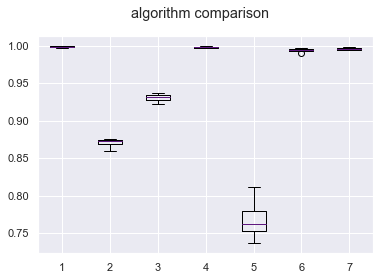

In [314]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier


results=[]
names=[]
models=[]
lr=LogisticRegression()
knn=KNeighborsClassifier()

rf=RandomForestClassifier()
nb=GaussianNB()
rf_boost=AdaBoostClassifier()
gboost=GradientBoostingClassifier()
cbc=CatBoostClassifier()

models.append(('cbc',cbc))
models.append(('lr',lr))
models.append(('knn',knn))

models.append(('rf',rf))
models.append(('nb',nb))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))

for name,model in models:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x_smote,y_smote,cv=kfold,scoring='recall') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 recall scores. we are taking its average.
    model=algo.fit(x_smote,y_smote)
    
    
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()

In [ ]:
models

In [ ]:
for name,algo in models:
    print(algo)
    model=algo.fit(x_smote,y_smote)

In [315]:
lr.fit(x_smote,y_smote)
id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/Test.csv")
y_pred=lr.predict(x_test)
r1=id['INCIDENT_ID']
r2=pd.DataFrame(y_pred,columns=['MULTIPLE_OFFENSE'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/results/lr_base_smote.csv',index=False)

knn.fit(x_smote,y_smote)
id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/Test.csv")
y_pred=knn.predict(x_test)
r1=id['INCIDENT_ID']
r2=pd.DataFrame(y_pred,columns=['MULTIPLE_OFFENSE'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/results/knn_base_smote.csv',index=False)


rf.fit(x_smote,y_smote)
id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/Test.csv")
y_pred=rf.predict(x_test)
r1=id['INCIDENT_ID']
r2=pd.DataFrame(y_pred,columns=['MULTIPLE_OFFENSE'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/results/rf_base_smote.csv',index=False)


nb.fit(x_smote,y_smote)
id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/Test.csv")
y_pred=nb.predict(x_test)
r1=id['INCIDENT_ID']
r2=pd.DataFrame(y_pred,columns=['MULTIPLE_OFFENSE'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/results/nb_base_smote.csv',index=False)

rf_boost.fit(x_smote,y_smote)
id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/Test.csv")
y_pred=rf_boost.predict(x_test)
r1=id['INCIDENT_ID']
r2=pd.DataFrame(y_pred,columns=['MULTIPLE_OFFENSE'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/results/rfboost_base_smote.csv',index=False)

gboost.fit(x_smote,y_smote)
id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/Test.csv")
y_pred=gboost.predict(x_test)
r1=id['INCIDENT_ID']
r2=pd.DataFrame(y_pred,columns=['MULTIPLE_OFFENSE'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/results/gboost_base_smote.csv',index=False)

cbc.fit(x_smote,y_smote)
id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/Test.csv")
y_pred=cbc.predict(x_test)
r1=id['INCIDENT_ID']
r2=pd.DataFrame(y_pred,columns=['MULTIPLE_OFFENSE'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/results/cbc_base_smote.csv',index=False)

Learning rate set to 0.052628
0:	learn: 0.5709661	total: 49ms	remaining: 48.9s
1:	learn: 0.4678008	total: 84.5ms	remaining: 42.2s
2:	learn: 0.3890677	total: 120ms	remaining: 39.7s
3:	learn: 0.3336544	total: 148ms	remaining: 36.8s
4:	learn: 0.2972279	total: 194ms	remaining: 38.6s
5:	learn: 0.2511947	total: 247ms	remaining: 40.9s
6:	learn: 0.2210430	total: 302ms	remaining: 42.9s
7:	learn: 0.2022862	total: 330ms	remaining: 40.9s
8:	learn: 0.1856203	total: 364ms	remaining: 40.1s
9:	learn: 0.1686925	total: 396ms	remaining: 39.2s
10:	learn: 0.1527081	total: 418ms	remaining: 37.6s
11:	learn: 0.1378848	total: 454ms	remaining: 37.4s
12:	learn: 0.1242678	total: 496ms	remaining: 37.7s
13:	learn: 0.1132472	total: 539ms	remaining: 38s
14:	learn: 0.1029632	total: 576ms	remaining: 37.9s
15:	learn: 0.0944721	total: 607ms	remaining: 37.3s
16:	learn: 0.0884758	total: 638ms	remaining: 36.9s
17:	learn: 0.0818072	total: 676ms	remaining: 36.9s
18:	learn: 0.0781686	total: 718ms	remaining: 37.1s
19:	learn: 0.

162:	learn: 0.0054360	total: 5.39s	remaining: 27.7s
163:	learn: 0.0054155	total: 5.41s	remaining: 27.6s
164:	learn: 0.0053458	total: 5.43s	remaining: 27.5s
165:	learn: 0.0052710	total: 5.47s	remaining: 27.5s
166:	learn: 0.0052110	total: 5.5s	remaining: 27.4s
167:	learn: 0.0051591	total: 5.52s	remaining: 27.3s
168:	learn: 0.0051105	total: 5.55s	remaining: 27.3s
169:	learn: 0.0051012	total: 5.57s	remaining: 27.2s
170:	learn: 0.0050843	total: 5.6s	remaining: 27.2s
171:	learn: 0.0050702	total: 5.64s	remaining: 27.1s
172:	learn: 0.0050608	total: 5.67s	remaining: 27.1s
173:	learn: 0.0050345	total: 5.7s	remaining: 27s
174:	learn: 0.0049068	total: 5.71s	remaining: 26.9s
175:	learn: 0.0048092	total: 5.75s	remaining: 26.9s
176:	learn: 0.0047984	total: 5.78s	remaining: 26.9s
177:	learn: 0.0047855	total: 5.82s	remaining: 26.9s
178:	learn: 0.0047418	total: 5.86s	remaining: 26.9s
179:	learn: 0.0047024	total: 5.9s	remaining: 26.9s
180:	learn: 0.0046741	total: 5.93s	remaining: 26.8s
181:	learn: 0.0046

327:	learn: 0.0030112	total: 9.98s	remaining: 20.4s
328:	learn: 0.0030112	total: 10s	remaining: 20.4s
329:	learn: 0.0030112	total: 10s	remaining: 20.3s
330:	learn: 0.0030112	total: 10s	remaining: 20.3s
331:	learn: 0.0030112	total: 10.1s	remaining: 20.3s
332:	learn: 0.0030111	total: 10.1s	remaining: 20.2s
333:	learn: 0.0030111	total: 10.1s	remaining: 20.2s
334:	learn: 0.0030111	total: 10.1s	remaining: 20.1s
335:	learn: 0.0030111	total: 10.2s	remaining: 20.1s
336:	learn: 0.0030111	total: 10.2s	remaining: 20.1s
337:	learn: 0.0030111	total: 10.2s	remaining: 20.1s
338:	learn: 0.0030110	total: 10.3s	remaining: 20s
339:	learn: 0.0030110	total: 10.3s	remaining: 20s
340:	learn: 0.0030110	total: 10.3s	remaining: 20s
341:	learn: 0.0030110	total: 10.4s	remaining: 19.9s
342:	learn: 0.0030110	total: 10.4s	remaining: 19.9s
343:	learn: 0.0030110	total: 10.4s	remaining: 19.9s
344:	learn: 0.0030110	total: 10.4s	remaining: 19.8s
345:	learn: 0.0030110	total: 10.5s	remaining: 19.8s
346:	learn: 0.0030110	to

491:	learn: 0.0030093	total: 14s	remaining: 14.4s
492:	learn: 0.0030093	total: 14s	remaining: 14.4s
493:	learn: 0.0030093	total: 14s	remaining: 14.3s
494:	learn: 0.0030093	total: 14s	remaining: 14.3s
495:	learn: 0.0030093	total: 14s	remaining: 14.3s
496:	learn: 0.0030093	total: 14.1s	remaining: 14.2s
497:	learn: 0.0030093	total: 14.1s	remaining: 14.2s
498:	learn: 0.0030093	total: 14.1s	remaining: 14.2s
499:	learn: 0.0030092	total: 14.1s	remaining: 14.1s
500:	learn: 0.0030092	total: 14.2s	remaining: 14.1s
501:	learn: 0.0030092	total: 14.2s	remaining: 14.1s
502:	learn: 0.0030092	total: 14.2s	remaining: 14s
503:	learn: 0.0030092	total: 14.2s	remaining: 14s
504:	learn: 0.0030092	total: 14.2s	remaining: 14s
505:	learn: 0.0030092	total: 14.3s	remaining: 13.9s
506:	learn: 0.0030092	total: 14.3s	remaining: 13.9s
507:	learn: 0.0030091	total: 14.3s	remaining: 13.9s
508:	learn: 0.0030091	total: 14.3s	remaining: 13.8s
509:	learn: 0.0030091	total: 14.4s	remaining: 13.8s
510:	learn: 0.0030091	total:

656:	learn: 0.0030079	total: 18.1s	remaining: 9.44s
657:	learn: 0.0030079	total: 18.1s	remaining: 9.41s
658:	learn: 0.0030079	total: 18.1s	remaining: 9.38s
659:	learn: 0.0030079	total: 18.2s	remaining: 9.36s
660:	learn: 0.0030078	total: 18.2s	remaining: 9.33s
661:	learn: 0.0030078	total: 18.2s	remaining: 9.3s
662:	learn: 0.0030078	total: 18.2s	remaining: 9.28s
663:	learn: 0.0030078	total: 18.3s	remaining: 9.25s
664:	learn: 0.0030078	total: 18.3s	remaining: 9.22s
665:	learn: 0.0030078	total: 18.3s	remaining: 9.19s
666:	learn: 0.0030078	total: 18.4s	remaining: 9.16s
667:	learn: 0.0030078	total: 18.4s	remaining: 9.13s
668:	learn: 0.0030078	total: 18.4s	remaining: 9.1s
669:	learn: 0.0030078	total: 18.4s	remaining: 9.07s
670:	learn: 0.0030078	total: 18.5s	remaining: 9.05s
671:	learn: 0.0030078	total: 18.5s	remaining: 9.02s
672:	learn: 0.0030077	total: 18.5s	remaining: 8.99s
673:	learn: 0.0030077	total: 18.5s	remaining: 8.96s
674:	learn: 0.0030077	total: 18.6s	remaining: 8.94s
675:	learn: 0.

821:	learn: 0.0030065	total: 21.6s	remaining: 4.68s
822:	learn: 0.0030065	total: 21.6s	remaining: 4.65s
823:	learn: 0.0030065	total: 21.7s	remaining: 4.63s
824:	learn: 0.0030064	total: 21.7s	remaining: 4.6s
825:	learn: 0.0030064	total: 21.7s	remaining: 4.57s
826:	learn: 0.0030064	total: 21.7s	remaining: 4.54s
827:	learn: 0.0030063	total: 21.8s	remaining: 4.52s
828:	learn: 0.0030063	total: 21.8s	remaining: 4.49s
829:	learn: 0.0030063	total: 21.8s	remaining: 4.46s
830:	learn: 0.0030063	total: 21.8s	remaining: 4.44s
831:	learn: 0.0030063	total: 21.8s	remaining: 4.41s
832:	learn: 0.0030063	total: 21.9s	remaining: 4.38s
833:	learn: 0.0030063	total: 21.9s	remaining: 4.36s
834:	learn: 0.0030063	total: 21.9s	remaining: 4.33s
835:	learn: 0.0030062	total: 21.9s	remaining: 4.3s
836:	learn: 0.0030062	total: 22s	remaining: 4.28s
837:	learn: 0.0030062	total: 22s	remaining: 4.25s
838:	learn: 0.0030062	total: 22s	remaining: 4.22s
839:	learn: 0.0030062	total: 22s	remaining: 4.2s
840:	learn: 0.0030062	t

986:	learn: 0.0029873	total: 25.5s	remaining: 336ms
987:	learn: 0.0029872	total: 25.5s	remaining: 310ms
988:	learn: 0.0029872	total: 25.5s	remaining: 284ms
989:	learn: 0.0029872	total: 25.6s	remaining: 258ms
990:	learn: 0.0029872	total: 25.6s	remaining: 232ms
991:	learn: 0.0029872	total: 25.6s	remaining: 207ms
992:	learn: 0.0029872	total: 25.6s	remaining: 181ms
993:	learn: 0.0029872	total: 25.7s	remaining: 155ms
994:	learn: 0.0029872	total: 25.7s	remaining: 129ms
995:	learn: 0.0029871	total: 25.7s	remaining: 103ms
996:	learn: 0.0029871	total: 25.7s	remaining: 77.4ms
997:	learn: 0.0029871	total: 25.8s	remaining: 51.6ms
998:	learn: 0.0029871	total: 25.8s	remaining: 25.8ms
999:	learn: 0.0029871	total: 25.8s	remaining: 0us


# Inference:
    we saw that recall has been improved after upsampling. let us fine tune the upsampling now
    smote + enn (to remove noise wherever the values gets closer)

In [316]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
resample=SMOTEENN(sampling_strategy=1,enn=EditedNearestNeighbours(sampling_strategy='all')) 
train=df1[df1['train/test']==1]
test=df1[df1['train/test']==0]
y=train['MULTIPLE_OFFENSE']
x=train.drop(columns=['MULTIPLE_OFFENSE',"train/test"])
x_test=test.drop(columns=["train/test",'MULTIPLE_OFFENSE'])

x_sen,y_sen=resample.fit_resample(x,y)

print("x_train shape is ",x_sen.shape)
print("y_train shape is ",y_sen.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (43705, 32)
y_train shape is  (43705,)
x_test shape is  (15903, 32)


Learning rate set to 0.04942
0:	learn: 0.5899048	total: 46.9ms	remaining: 46.8s
1:	learn: 0.4967070	total: 81.4ms	remaining: 40.6s
2:	learn: 0.4192722	total: 111ms	remaining: 36.7s
3:	learn: 0.3537979	total: 137ms	remaining: 34.1s
4:	learn: 0.3017901	total: 168ms	remaining: 33.4s
5:	learn: 0.2694991	total: 193ms	remaining: 31.9s
6:	learn: 0.2376645	total: 220ms	remaining: 31.3s
7:	learn: 0.2189920	total: 251ms	remaining: 31.1s
8:	learn: 0.1949572	total: 284ms	remaining: 31.3s
9:	learn: 0.1779923	total: 316ms	remaining: 31.3s
10:	learn: 0.1585847	total: 353ms	remaining: 31.7s
11:	learn: 0.1443713	total: 390ms	remaining: 32.1s
12:	learn: 0.1294625	total: 412ms	remaining: 31.3s
13:	learn: 0.1166244	total: 441ms	remaining: 31s
14:	learn: 0.1077150	total: 470ms	remaining: 30.9s
15:	learn: 0.0995768	total: 499ms	remaining: 30.7s
16:	learn: 0.0946888	total: 527ms	remaining: 30.5s
17:	learn: 0.0876983	total: 559ms	remaining: 30.5s
18:	learn: 0.0831039	total: 585ms	remaining: 30.2s
19:	learn: 0

160:	learn: 0.0053264	total: 4.98s	remaining: 26s
161:	learn: 0.0053167	total: 5.01s	remaining: 25.9s
162:	learn: 0.0052525	total: 5.03s	remaining: 25.9s
163:	learn: 0.0052434	total: 5.06s	remaining: 25.8s
164:	learn: 0.0052096	total: 5.09s	remaining: 25.7s
165:	learn: 0.0051624	total: 5.12s	remaining: 25.7s
166:	learn: 0.0051462	total: 5.15s	remaining: 25.7s
167:	learn: 0.0050753	total: 5.18s	remaining: 25.7s
168:	learn: 0.0050645	total: 5.21s	remaining: 25.6s
169:	learn: 0.0050384	total: 5.24s	remaining: 25.6s
170:	learn: 0.0050270	total: 5.26s	remaining: 25.5s
171:	learn: 0.0050054	total: 5.29s	remaining: 25.4s
172:	learn: 0.0049051	total: 5.31s	remaining: 25.4s
173:	learn: 0.0048882	total: 5.35s	remaining: 25.4s
174:	learn: 0.0048447	total: 5.39s	remaining: 25.4s
175:	learn: 0.0048309	total: 5.42s	remaining: 25.4s
176:	learn: 0.0048011	total: 5.45s	remaining: 25.4s
177:	learn: 0.0047727	total: 5.48s	remaining: 25.3s
178:	learn: 0.0047017	total: 5.52s	remaining: 25.3s
179:	learn: 0.

327:	learn: 0.0038693	total: 8.61s	remaining: 17.6s
328:	learn: 0.0038693	total: 8.63s	remaining: 17.6s
329:	learn: 0.0038693	total: 8.64s	remaining: 17.5s
330:	learn: 0.0038693	total: 8.66s	remaining: 17.5s
331:	learn: 0.0038692	total: 8.67s	remaining: 17.5s
332:	learn: 0.0038692	total: 8.7s	remaining: 17.4s
333:	learn: 0.0038692	total: 8.72s	remaining: 17.4s
334:	learn: 0.0038692	total: 8.74s	remaining: 17.4s
335:	learn: 0.0038692	total: 8.76s	remaining: 17.3s
336:	learn: 0.0038692	total: 8.78s	remaining: 17.3s
337:	learn: 0.0038692	total: 8.8s	remaining: 17.2s
338:	learn: 0.0038692	total: 8.82s	remaining: 17.2s
339:	learn: 0.0038692	total: 8.84s	remaining: 17.2s
340:	learn: 0.0038692	total: 8.86s	remaining: 17.1s
341:	learn: 0.0038692	total: 8.88s	remaining: 17.1s
342:	learn: 0.0038692	total: 8.9s	remaining: 17.1s
343:	learn: 0.0038692	total: 8.93s	remaining: 17s
344:	learn: 0.0038692	total: 8.95s	remaining: 17s
345:	learn: 0.0038691	total: 8.97s	remaining: 17s
346:	learn: 0.0038691

491:	learn: 0.0038686	total: 12s	remaining: 12.4s
492:	learn: 0.0038686	total: 12s	remaining: 12.3s
493:	learn: 0.0038686	total: 12s	remaining: 12.3s
494:	learn: 0.0038686	total: 12s	remaining: 12.3s
495:	learn: 0.0038686	total: 12.1s	remaining: 12.3s
496:	learn: 0.0038686	total: 12.1s	remaining: 12.2s
497:	learn: 0.0038686	total: 12.1s	remaining: 12.2s
498:	learn: 0.0038685	total: 12.1s	remaining: 12.2s
499:	learn: 0.0038685	total: 12.1s	remaining: 12.1s
500:	learn: 0.0038685	total: 12.2s	remaining: 12.1s
501:	learn: 0.0038685	total: 12.2s	remaining: 12.1s
502:	learn: 0.0038685	total: 12.2s	remaining: 12.1s
503:	learn: 0.0038685	total: 12.2s	remaining: 12s
504:	learn: 0.0038685	total: 12.2s	remaining: 12s
505:	learn: 0.0038685	total: 12.3s	remaining: 12s
506:	learn: 0.0038685	total: 12.3s	remaining: 11.9s
507:	learn: 0.0038685	total: 12.3s	remaining: 11.9s
508:	learn: 0.0038685	total: 12.3s	remaining: 11.9s
509:	learn: 0.0038685	total: 12.3s	remaining: 11.9s
510:	learn: 0.0038685	tota

655:	learn: 0.0038682	total: 15.3s	remaining: 8.04s
656:	learn: 0.0038682	total: 15.3s	remaining: 8.01s
657:	learn: 0.0038682	total: 15.4s	remaining: 7.99s
658:	learn: 0.0038682	total: 15.4s	remaining: 7.96s
659:	learn: 0.0038681	total: 15.4s	remaining: 7.94s
660:	learn: 0.0038681	total: 15.4s	remaining: 7.91s
661:	learn: 0.0038681	total: 15.5s	remaining: 7.89s
662:	learn: 0.0038681	total: 15.5s	remaining: 7.87s
663:	learn: 0.0038681	total: 15.5s	remaining: 7.84s
664:	learn: 0.0038681	total: 15.5s	remaining: 7.82s
665:	learn: 0.0038681	total: 15.5s	remaining: 7.79s
666:	learn: 0.0038681	total: 15.6s	remaining: 7.77s
667:	learn: 0.0038681	total: 15.6s	remaining: 7.75s
668:	learn: 0.0038681	total: 15.6s	remaining: 7.72s
669:	learn: 0.0038681	total: 15.6s	remaining: 7.69s
670:	learn: 0.0038681	total: 15.6s	remaining: 7.67s
671:	learn: 0.0038681	total: 15.7s	remaining: 7.65s
672:	learn: 0.0038681	total: 15.7s	remaining: 7.63s
673:	learn: 0.0038681	total: 15.7s	remaining: 7.6s
674:	learn: 0

816:	learn: 0.0038677	total: 18.7s	remaining: 4.19s
817:	learn: 0.0038677	total: 18.7s	remaining: 4.17s
818:	learn: 0.0038677	total: 18.7s	remaining: 4.14s
819:	learn: 0.0038677	total: 18.8s	remaining: 4.12s
820:	learn: 0.0038677	total: 18.8s	remaining: 4.1s
821:	learn: 0.0038677	total: 18.8s	remaining: 4.08s
822:	learn: 0.0038677	total: 18.8s	remaining: 4.05s
823:	learn: 0.0038677	total: 18.9s	remaining: 4.03s
824:	learn: 0.0038677	total: 18.9s	remaining: 4.01s
825:	learn: 0.0038677	total: 18.9s	remaining: 3.99s
826:	learn: 0.0038677	total: 19s	remaining: 3.97s
827:	learn: 0.0038677	total: 19s	remaining: 3.95s
828:	learn: 0.0038677	total: 19s	remaining: 3.92s
829:	learn: 0.0038677	total: 19.1s	remaining: 3.9s
830:	learn: 0.0038677	total: 19.1s	remaining: 3.88s
831:	learn: 0.0038677	total: 19.1s	remaining: 3.85s
832:	learn: 0.0038677	total: 19.1s	remaining: 3.83s
833:	learn: 0.0038677	total: 19.1s	remaining: 3.81s
834:	learn: 0.0038677	total: 19.2s	remaining: 3.79s
835:	learn: 0.003867

984:	learn: 0.0038673	total: 22.5s	remaining: 343ms
985:	learn: 0.0038673	total: 22.5s	remaining: 320ms
986:	learn: 0.0038673	total: 22.5s	remaining: 297ms
987:	learn: 0.0038673	total: 22.5s	remaining: 274ms
988:	learn: 0.0038673	total: 22.6s	remaining: 251ms
989:	learn: 0.0038673	total: 22.6s	remaining: 228ms
990:	learn: 0.0038673	total: 22.6s	remaining: 205ms
991:	learn: 0.0038673	total: 22.6s	remaining: 182ms
992:	learn: 0.0038673	total: 22.6s	remaining: 160ms
993:	learn: 0.0038672	total: 22.6s	remaining: 137ms
994:	learn: 0.0038672	total: 22.7s	remaining: 114ms
995:	learn: 0.0038672	total: 22.7s	remaining: 91ms
996:	learn: 0.0038672	total: 22.7s	remaining: 68.2ms
997:	learn: 0.0038672	total: 22.7s	remaining: 45.5ms
998:	learn: 0.0038672	total: 22.7s	remaining: 22.8ms
999:	learn: 0.0038672	total: 22.8s	remaining: 0us
Learning rate set to 0.04942
0:	learn: 0.5902204	total: 54.7ms	remaining: 54.7s
1:	learn: 0.4965709	total: 98.3ms	remaining: 49s
2:	learn: 0.4156928	total: 121ms	remain

145:	learn: 0.0062112	total: 4.41s	remaining: 25.8s
146:	learn: 0.0061891	total: 4.44s	remaining: 25.8s
147:	learn: 0.0061672	total: 4.47s	remaining: 25.8s
148:	learn: 0.0061460	total: 4.51s	remaining: 25.8s
149:	learn: 0.0060945	total: 4.55s	remaining: 25.8s
150:	learn: 0.0060855	total: 4.58s	remaining: 25.7s
151:	learn: 0.0059412	total: 4.61s	remaining: 25.7s
152:	learn: 0.0058934	total: 4.64s	remaining: 25.7s
153:	learn: 0.0058793	total: 4.67s	remaining: 25.6s
154:	learn: 0.0058530	total: 4.71s	remaining: 25.7s
155:	learn: 0.0057397	total: 4.75s	remaining: 25.7s
156:	learn: 0.0057248	total: 4.79s	remaining: 25.7s
157:	learn: 0.0056531	total: 4.83s	remaining: 25.7s
158:	learn: 0.0055850	total: 4.86s	remaining: 25.7s
159:	learn: 0.0054704	total: 4.89s	remaining: 25.7s
160:	learn: 0.0053795	total: 4.92s	remaining: 25.7s
161:	learn: 0.0053542	total: 4.96s	remaining: 25.6s
162:	learn: 0.0053182	total: 4.99s	remaining: 25.6s
163:	learn: 0.0053068	total: 5.02s	remaining: 25.6s
164:	learn: 

311:	learn: 0.0031272	total: 9.29s	remaining: 20.5s
312:	learn: 0.0031272	total: 9.31s	remaining: 20.4s
313:	learn: 0.0031272	total: 9.33s	remaining: 20.4s
314:	learn: 0.0031272	total: 9.35s	remaining: 20.3s
315:	learn: 0.0031272	total: 9.37s	remaining: 20.3s
316:	learn: 0.0031272	total: 9.39s	remaining: 20.2s
317:	learn: 0.0031272	total: 9.41s	remaining: 20.2s
318:	learn: 0.0031272	total: 9.44s	remaining: 20.1s
319:	learn: 0.0031272	total: 9.46s	remaining: 20.1s
320:	learn: 0.0031271	total: 9.48s	remaining: 20.1s
321:	learn: 0.0031271	total: 9.5s	remaining: 20s
322:	learn: 0.0030591	total: 9.53s	remaining: 20s
323:	learn: 0.0030591	total: 9.55s	remaining: 19.9s
324:	learn: 0.0030591	total: 9.58s	remaining: 19.9s
325:	learn: 0.0030591	total: 9.61s	remaining: 19.9s
326:	learn: 0.0030591	total: 9.64s	remaining: 19.8s
327:	learn: 0.0030591	total: 9.66s	remaining: 19.8s
328:	learn: 0.0030591	total: 9.68s	remaining: 19.8s
329:	learn: 0.0030591	total: 9.71s	remaining: 19.7s
330:	learn: 0.003

473:	learn: 0.0030413	total: 12.9s	remaining: 14.3s
474:	learn: 0.0030413	total: 12.9s	remaining: 14.3s
475:	learn: 0.0030413	total: 13s	remaining: 14.3s
476:	learn: 0.0030413	total: 13s	remaining: 14.2s
477:	learn: 0.0030413	total: 13s	remaining: 14.2s
478:	learn: 0.0030413	total: 13s	remaining: 14.2s
479:	learn: 0.0030413	total: 13.1s	remaining: 14.2s
480:	learn: 0.0030413	total: 13.1s	remaining: 14.1s
481:	learn: 0.0030413	total: 13.1s	remaining: 14.1s
482:	learn: 0.0030413	total: 13.1s	remaining: 14s
483:	learn: 0.0030413	total: 13.2s	remaining: 14s
484:	learn: 0.0030413	total: 13.2s	remaining: 14s
485:	learn: 0.0030413	total: 13.2s	remaining: 14s
486:	learn: 0.0030413	total: 13.2s	remaining: 13.9s
487:	learn: 0.0030412	total: 13.3s	remaining: 13.9s
488:	learn: 0.0030412	total: 13.3s	remaining: 13.9s
489:	learn: 0.0029897	total: 13.3s	remaining: 13.8s
490:	learn: 0.0029897	total: 13.3s	remaining: 13.8s
491:	learn: 0.0029897	total: 13.3s	remaining: 13.8s
492:	learn: 0.0029897	total:

632:	learn: 0.0029827	total: 16.2s	remaining: 9.36s
633:	learn: 0.0029826	total: 16.2s	remaining: 9.33s
634:	learn: 0.0029826	total: 16.2s	remaining: 9.3s
635:	learn: 0.0029826	total: 16.2s	remaining: 9.28s
636:	learn: 0.0029826	total: 16.2s	remaining: 9.25s
637:	learn: 0.0029826	total: 16.3s	remaining: 9.22s
638:	learn: 0.0029826	total: 16.3s	remaining: 9.19s
639:	learn: 0.0029826	total: 16.3s	remaining: 9.17s
640:	learn: 0.0029826	total: 16.3s	remaining: 9.14s
641:	learn: 0.0029826	total: 16.3s	remaining: 9.11s
642:	learn: 0.0029826	total: 16.3s	remaining: 9.07s
643:	learn: 0.0029826	total: 16.4s	remaining: 9.04s
644:	learn: 0.0029826	total: 16.4s	remaining: 9.02s
645:	learn: 0.0029826	total: 16.4s	remaining: 8.99s
646:	learn: 0.0029826	total: 16.4s	remaining: 8.96s
647:	learn: 0.0029826	total: 16.4s	remaining: 8.93s
648:	learn: 0.0029826	total: 16.5s	remaining: 8.91s
649:	learn: 0.0029826	total: 16.5s	remaining: 8.88s
650:	learn: 0.0029826	total: 16.5s	remaining: 8.85s
651:	learn: 0

798:	learn: 0.0029821	total: 19.7s	remaining: 4.95s
799:	learn: 0.0029821	total: 19.7s	remaining: 4.92s
800:	learn: 0.0029821	total: 19.7s	remaining: 4.89s
801:	learn: 0.0029821	total: 19.7s	remaining: 4.87s
802:	learn: 0.0029821	total: 19.7s	remaining: 4.84s
803:	learn: 0.0029821	total: 19.8s	remaining: 4.82s
804:	learn: 0.0029821	total: 19.8s	remaining: 4.79s
805:	learn: 0.0029821	total: 19.8s	remaining: 4.76s
806:	learn: 0.0029821	total: 19.8s	remaining: 4.74s
807:	learn: 0.0029821	total: 19.8s	remaining: 4.71s
808:	learn: 0.0029821	total: 19.9s	remaining: 4.69s
809:	learn: 0.0029821	total: 19.9s	remaining: 4.66s
810:	learn: 0.0029821	total: 19.9s	remaining: 4.64s
811:	learn: 0.0029821	total: 19.9s	remaining: 4.61s
812:	learn: 0.0029821	total: 19.9s	remaining: 4.59s
813:	learn: 0.0029821	total: 20s	remaining: 4.56s
814:	learn: 0.0029821	total: 20s	remaining: 4.54s
815:	learn: 0.0029821	total: 20s	remaining: 4.51s
816:	learn: 0.0029821	total: 20s	remaining: 4.49s
817:	learn: 0.002982

960:	learn: 0.0029815	total: 23.2s	remaining: 942ms
961:	learn: 0.0029815	total: 23.2s	remaining: 918ms
962:	learn: 0.0029815	total: 23.2s	remaining: 893ms
963:	learn: 0.0029815	total: 23.3s	remaining: 869ms
964:	learn: 0.0029815	total: 23.3s	remaining: 845ms
965:	learn: 0.0029815	total: 23.3s	remaining: 821ms
966:	learn: 0.0029814	total: 23.4s	remaining: 797ms
967:	learn: 0.0029814	total: 23.4s	remaining: 773ms
968:	learn: 0.0029814	total: 23.4s	remaining: 749ms
969:	learn: 0.0029814	total: 23.4s	remaining: 724ms
970:	learn: 0.0029814	total: 23.4s	remaining: 700ms
971:	learn: 0.0029814	total: 23.5s	remaining: 676ms
972:	learn: 0.0029814	total: 23.5s	remaining: 652ms
973:	learn: 0.0029814	total: 23.5s	remaining: 627ms
974:	learn: 0.0029814	total: 23.5s	remaining: 603ms
975:	learn: 0.0029814	total: 23.6s	remaining: 579ms
976:	learn: 0.0029814	total: 23.6s	remaining: 555ms
977:	learn: 0.0029814	total: 23.6s	remaining: 531ms
978:	learn: 0.0029814	total: 23.6s	remaining: 507ms
979:	learn: 

124:	learn: 0.0068587	total: 3.91s	remaining: 27.4s
125:	learn: 0.0067918	total: 3.95s	remaining: 27.4s
126:	learn: 0.0067368	total: 3.97s	remaining: 27.3s
127:	learn: 0.0066622	total: 4s	remaining: 27.2s
128:	learn: 0.0065444	total: 4.04s	remaining: 27.3s
129:	learn: 0.0065228	total: 4.09s	remaining: 27.4s
130:	learn: 0.0064853	total: 4.11s	remaining: 27.3s
131:	learn: 0.0064121	total: 4.15s	remaining: 27.3s
132:	learn: 0.0063977	total: 4.18s	remaining: 27.2s
133:	learn: 0.0063138	total: 4.2s	remaining: 27.2s
134:	learn: 0.0062246	total: 4.23s	remaining: 27.1s
135:	learn: 0.0062025	total: 4.27s	remaining: 27.1s
136:	learn: 0.0059922	total: 4.29s	remaining: 27s
137:	learn: 0.0059804	total: 4.33s	remaining: 27.1s
138:	learn: 0.0059610	total: 4.36s	remaining: 27s
139:	learn: 0.0058897	total: 4.4s	remaining: 27s
140:	learn: 0.0058643	total: 4.42s	remaining: 26.9s
141:	learn: 0.0058481	total: 4.45s	remaining: 26.9s
142:	learn: 0.0057979	total: 4.47s	remaining: 26.8s
143:	learn: 0.0057776	t

284:	learn: 0.0031846	total: 7.9s	remaining: 19.8s
285:	learn: 0.0031846	total: 7.92s	remaining: 19.8s
286:	learn: 0.0031846	total: 7.94s	remaining: 19.7s
287:	learn: 0.0031846	total: 7.96s	remaining: 19.7s
288:	learn: 0.0031845	total: 7.97s	remaining: 19.6s
289:	learn: 0.0031845	total: 7.99s	remaining: 19.6s
290:	learn: 0.0031845	total: 8.01s	remaining: 19.5s
291:	learn: 0.0031845	total: 8.02s	remaining: 19.4s
292:	learn: 0.0031844	total: 8.04s	remaining: 19.4s
293:	learn: 0.0031844	total: 8.05s	remaining: 19.3s
294:	learn: 0.0031844	total: 8.07s	remaining: 19.3s
295:	learn: 0.0031844	total: 8.1s	remaining: 19.3s
296:	learn: 0.0031844	total: 8.12s	remaining: 19.2s
297:	learn: 0.0031844	total: 8.13s	remaining: 19.2s
298:	learn: 0.0031844	total: 8.14s	remaining: 19.1s
299:	learn: 0.0031843	total: 8.16s	remaining: 19.1s
300:	learn: 0.0031843	total: 8.19s	remaining: 19s
301:	learn: 0.0031843	total: 8.21s	remaining: 19s
302:	learn: 0.0031843	total: 8.23s	remaining: 18.9s
303:	learn: 0.0031

448:	learn: 0.0031828	total: 11.5s	remaining: 14.1s
449:	learn: 0.0031828	total: 11.5s	remaining: 14.1s
450:	learn: 0.0031828	total: 11.5s	remaining: 14.1s
451:	learn: 0.0031828	total: 11.6s	remaining: 14s
452:	learn: 0.0031828	total: 11.6s	remaining: 14s
453:	learn: 0.0031828	total: 11.6s	remaining: 14s
454:	learn: 0.0031828	total: 11.6s	remaining: 13.9s
455:	learn: 0.0031827	total: 11.7s	remaining: 13.9s
456:	learn: 0.0031827	total: 11.7s	remaining: 13.9s
457:	learn: 0.0031827	total: 11.7s	remaining: 13.9s
458:	learn: 0.0031827	total: 11.7s	remaining: 13.8s
459:	learn: 0.0031827	total: 11.8s	remaining: 13.8s
460:	learn: 0.0031827	total: 11.8s	remaining: 13.8s
461:	learn: 0.0031827	total: 11.8s	remaining: 13.8s
462:	learn: 0.0031827	total: 11.8s	remaining: 13.7s
463:	learn: 0.0031827	total: 11.9s	remaining: 13.7s
464:	learn: 0.0031827	total: 11.9s	remaining: 13.7s
465:	learn: 0.0031827	total: 11.9s	remaining: 13.6s
466:	learn: 0.0031827	total: 11.9s	remaining: 13.6s
467:	learn: 0.0031

614:	learn: 0.0031822	total: 15.2s	remaining: 9.51s
615:	learn: 0.0031822	total: 15.2s	remaining: 9.49s
616:	learn: 0.0031822	total: 15.2s	remaining: 9.46s
617:	learn: 0.0031822	total: 15.3s	remaining: 9.44s
618:	learn: 0.0031822	total: 15.3s	remaining: 9.4s
619:	learn: 0.0031822	total: 15.3s	remaining: 9.38s
620:	learn: 0.0031822	total: 15.3s	remaining: 9.35s
621:	learn: 0.0031822	total: 15.3s	remaining: 9.32s
622:	learn: 0.0031822	total: 15.4s	remaining: 9.29s
623:	learn: 0.0031822	total: 15.4s	remaining: 9.27s
624:	learn: 0.0031822	total: 15.4s	remaining: 9.24s
625:	learn: 0.0031822	total: 15.4s	remaining: 9.21s
626:	learn: 0.0031822	total: 15.4s	remaining: 9.19s
627:	learn: 0.0031822	total: 15.5s	remaining: 9.16s
628:	learn: 0.0031822	total: 15.5s	remaining: 9.13s
629:	learn: 0.0031822	total: 15.5s	remaining: 9.11s
630:	learn: 0.0031822	total: 15.5s	remaining: 9.09s
631:	learn: 0.0031822	total: 15.6s	remaining: 9.07s
632:	learn: 0.0031822	total: 15.6s	remaining: 9.04s
633:	learn: 0

776:	learn: 0.0031811	total: 18.8s	remaining: 5.4s
777:	learn: 0.0031811	total: 18.8s	remaining: 5.37s
778:	learn: 0.0031811	total: 18.9s	remaining: 5.35s
779:	learn: 0.0031811	total: 18.9s	remaining: 5.33s
780:	learn: 0.0031811	total: 18.9s	remaining: 5.3s
781:	learn: 0.0031811	total: 18.9s	remaining: 5.28s
782:	learn: 0.0031811	total: 18.9s	remaining: 5.25s
783:	learn: 0.0031810	total: 19s	remaining: 5.23s
784:	learn: 0.0031810	total: 19s	remaining: 5.2s
785:	learn: 0.0031810	total: 19s	remaining: 5.18s
786:	learn: 0.0031810	total: 19.1s	remaining: 5.16s
787:	learn: 0.0031810	total: 19.1s	remaining: 5.13s
788:	learn: 0.0031810	total: 19.1s	remaining: 5.11s
789:	learn: 0.0031810	total: 19.1s	remaining: 5.08s
790:	learn: 0.0031810	total: 19.2s	remaining: 5.06s
791:	learn: 0.0031810	total: 19.2s	remaining: 5.04s
792:	learn: 0.0031810	total: 19.2s	remaining: 5.01s
793:	learn: 0.0031810	total: 19.2s	remaining: 4.99s
794:	learn: 0.0031810	total: 19.3s	remaining: 4.96s
795:	learn: 0.0031809

938:	learn: 0.0031419	total: 22.2s	remaining: 1.44s
939:	learn: 0.0031419	total: 22.2s	remaining: 1.42s
940:	learn: 0.0031419	total: 22.2s	remaining: 1.39s
941:	learn: 0.0031419	total: 22.2s	remaining: 1.37s
942:	learn: 0.0031419	total: 22.3s	remaining: 1.34s
943:	learn: 0.0031419	total: 22.3s	remaining: 1.32s
944:	learn: 0.0031419	total: 22.3s	remaining: 1.3s
945:	learn: 0.0031419	total: 22.3s	remaining: 1.27s
946:	learn: 0.0031419	total: 22.4s	remaining: 1.25s
947:	learn: 0.0031419	total: 22.4s	remaining: 1.23s
948:	learn: 0.0031419	total: 22.4s	remaining: 1.2s
949:	learn: 0.0031419	total: 22.4s	remaining: 1.18s
950:	learn: 0.0031419	total: 22.4s	remaining: 1.16s
951:	learn: 0.0031419	total: 22.5s	remaining: 1.13s
952:	learn: 0.0031419	total: 22.5s	remaining: 1.11s
953:	learn: 0.0031419	total: 22.5s	remaining: 1.08s
954:	learn: 0.0031419	total: 22.5s	remaining: 1.06s
955:	learn: 0.0031419	total: 22.5s	remaining: 1.04s
956:	learn: 0.0031419	total: 22.6s	remaining: 1.01s
957:	learn: 0.

103:	learn: 0.0086322	total: 3.13s	remaining: 27s
104:	learn: 0.0086069	total: 3.15s	remaining: 26.9s
105:	learn: 0.0085448	total: 3.17s	remaining: 26.7s
106:	learn: 0.0084438	total: 3.2s	remaining: 26.7s
107:	learn: 0.0084193	total: 3.23s	remaining: 26.7s
108:	learn: 0.0082182	total: 3.26s	remaining: 26.7s
109:	learn: 0.0081735	total: 3.3s	remaining: 26.7s
110:	learn: 0.0081305	total: 3.33s	remaining: 26.7s
111:	learn: 0.0080726	total: 3.36s	remaining: 26.6s
112:	learn: 0.0079674	total: 3.39s	remaining: 26.6s
113:	learn: 0.0078772	total: 3.42s	remaining: 26.6s
114:	learn: 0.0076612	total: 3.45s	remaining: 26.6s
115:	learn: 0.0075537	total: 3.48s	remaining: 26.6s
116:	learn: 0.0074590	total: 3.51s	remaining: 26.5s
117:	learn: 0.0073710	total: 3.54s	remaining: 26.5s
118:	learn: 0.0073299	total: 3.57s	remaining: 26.5s
119:	learn: 0.0072574	total: 3.61s	remaining: 26.5s
120:	learn: 0.0072373	total: 3.63s	remaining: 26.4s
121:	learn: 0.0072055	total: 3.66s	remaining: 26.3s
122:	learn: 0.00

262:	learn: 0.0030579	total: 7.48s	remaining: 21s
263:	learn: 0.0030552	total: 7.5s	remaining: 20.9s
264:	learn: 0.0030551	total: 7.53s	remaining: 20.9s
265:	learn: 0.0030551	total: 7.56s	remaining: 20.9s
266:	learn: 0.0030551	total: 7.58s	remaining: 20.8s
267:	learn: 0.0030551	total: 7.6s	remaining: 20.8s
268:	learn: 0.0030524	total: 7.64s	remaining: 20.8s
269:	learn: 0.0030524	total: 7.67s	remaining: 20.7s
270:	learn: 0.0030524	total: 7.7s	remaining: 20.7s
271:	learn: 0.0030524	total: 7.73s	remaining: 20.7s
272:	learn: 0.0030524	total: 7.75s	remaining: 20.6s
273:	learn: 0.0030524	total: 7.78s	remaining: 20.6s
274:	learn: 0.0030523	total: 7.8s	remaining: 20.6s
275:	learn: 0.0030523	total: 7.82s	remaining: 20.5s
276:	learn: 0.0030447	total: 7.85s	remaining: 20.5s
277:	learn: 0.0030447	total: 7.88s	remaining: 20.5s
278:	learn: 0.0030447	total: 7.9s	remaining: 20.4s
279:	learn: 0.0030447	total: 7.93s	remaining: 20.4s
280:	learn: 0.0030447	total: 7.96s	remaining: 20.4s
281:	learn: 0.00304

421:	learn: 0.0029506	total: 11.1s	remaining: 15.2s
422:	learn: 0.0029506	total: 11.1s	remaining: 15.2s
423:	learn: 0.0029506	total: 11.1s	remaining: 15.1s
424:	learn: 0.0029506	total: 11.2s	remaining: 15.1s
425:	learn: 0.0029506	total: 11.2s	remaining: 15.1s
426:	learn: 0.0029506	total: 11.2s	remaining: 15s
427:	learn: 0.0029506	total: 11.2s	remaining: 15s
428:	learn: 0.0029506	total: 11.3s	remaining: 15s
429:	learn: 0.0029506	total: 11.3s	remaining: 14.9s
430:	learn: 0.0029506	total: 11.3s	remaining: 14.9s
431:	learn: 0.0029506	total: 11.3s	remaining: 14.9s
432:	learn: 0.0029506	total: 11.4s	remaining: 14.9s
433:	learn: 0.0029506	total: 11.4s	remaining: 14.9s
434:	learn: 0.0029506	total: 11.4s	remaining: 14.8s
435:	learn: 0.0029506	total: 11.4s	remaining: 14.8s
436:	learn: 0.0029506	total: 11.4s	remaining: 14.7s
437:	learn: 0.0029506	total: 11.5s	remaining: 14.7s
438:	learn: 0.0029506	total: 11.5s	remaining: 14.7s
439:	learn: 0.0029506	total: 11.5s	remaining: 14.7s
440:	learn: 0.0029

587:	learn: 0.0029502	total: 14.3s	remaining: 10s
588:	learn: 0.0029502	total: 14.3s	remaining: 9.97s
589:	learn: 0.0029502	total: 14.3s	remaining: 9.94s
590:	learn: 0.0029502	total: 14.3s	remaining: 9.92s
591:	learn: 0.0029502	total: 14.3s	remaining: 9.89s
592:	learn: 0.0029502	total: 14.4s	remaining: 9.86s
593:	learn: 0.0029502	total: 14.4s	remaining: 9.83s
594:	learn: 0.0029502	total: 14.4s	remaining: 9.8s
595:	learn: 0.0029502	total: 14.4s	remaining: 9.78s
596:	learn: 0.0029502	total: 14.4s	remaining: 9.75s
597:	learn: 0.0029502	total: 14.5s	remaining: 9.73s
598:	learn: 0.0029502	total: 14.5s	remaining: 9.7s
599:	learn: 0.0029502	total: 14.5s	remaining: 9.67s
600:	learn: 0.0029502	total: 14.5s	remaining: 9.64s
601:	learn: 0.0029502	total: 14.5s	remaining: 9.61s
602:	learn: 0.0029502	total: 14.6s	remaining: 9.59s
603:	learn: 0.0029502	total: 14.6s	remaining: 9.57s
604:	learn: 0.0029502	total: 14.6s	remaining: 9.55s
605:	learn: 0.0029502	total: 14.6s	remaining: 9.52s
606:	learn: 0.00

750:	learn: 0.0029494	total: 17.7s	remaining: 5.86s
751:	learn: 0.0029494	total: 17.7s	remaining: 5.83s
752:	learn: 0.0029494	total: 17.7s	remaining: 5.8s
753:	learn: 0.0029494	total: 17.7s	remaining: 5.78s
754:	learn: 0.0029494	total: 17.7s	remaining: 5.76s
755:	learn: 0.0029494	total: 17.8s	remaining: 5.73s
756:	learn: 0.0029494	total: 17.8s	remaining: 5.71s
757:	learn: 0.0029494	total: 17.8s	remaining: 5.68s
758:	learn: 0.0029493	total: 17.8s	remaining: 5.66s
759:	learn: 0.0029493	total: 17.8s	remaining: 5.63s
760:	learn: 0.0029493	total: 17.9s	remaining: 5.61s
761:	learn: 0.0029493	total: 17.9s	remaining: 5.58s
762:	learn: 0.0029493	total: 17.9s	remaining: 5.56s
763:	learn: 0.0029493	total: 17.9s	remaining: 5.54s
764:	learn: 0.0029493	total: 17.9s	remaining: 5.51s
765:	learn: 0.0029493	total: 18s	remaining: 5.49s
766:	learn: 0.0029493	total: 18s	remaining: 5.46s
767:	learn: 0.0029493	total: 18s	remaining: 5.44s
768:	learn: 0.0029492	total: 18s	remaining: 5.41s
769:	learn: 0.0029492

909:	learn: 0.0029380	total: 20.9s	remaining: 2.06s
910:	learn: 0.0029380	total: 20.9s	remaining: 2.04s
911:	learn: 0.0029380	total: 20.9s	remaining: 2.02s
912:	learn: 0.0029380	total: 20.9s	remaining: 2s
913:	learn: 0.0029380	total: 21s	remaining: 1.97s
914:	learn: 0.0029380	total: 21s	remaining: 1.95s
915:	learn: 0.0029380	total: 21s	remaining: 1.93s
916:	learn: 0.0029380	total: 21s	remaining: 1.9s
917:	learn: 0.0029380	total: 21.1s	remaining: 1.88s
918:	learn: 0.0029380	total: 21.1s	remaining: 1.86s
919:	learn: 0.0029380	total: 21.1s	remaining: 1.83s
920:	learn: 0.0029380	total: 21.1s	remaining: 1.81s
921:	learn: 0.0029380	total: 21.1s	remaining: 1.79s
922:	learn: 0.0029380	total: 21.2s	remaining: 1.77s
923:	learn: 0.0029380	total: 21.2s	remaining: 1.74s
924:	learn: 0.0029380	total: 21.2s	remaining: 1.72s
925:	learn: 0.0029380	total: 21.2s	remaining: 1.7s
926:	learn: 0.0029380	total: 21.3s	remaining: 1.67s
927:	learn: 0.0029380	total: 21.3s	remaining: 1.65s
928:	learn: 0.0029380	tot

72:	learn: 0.0128566	total: 2.39s	remaining: 30.3s
73:	learn: 0.0127176	total: 2.42s	remaining: 30.4s
74:	learn: 0.0125665	total: 2.46s	remaining: 30.3s
75:	learn: 0.0124166	total: 2.49s	remaining: 30.3s
76:	learn: 0.0120197	total: 2.52s	remaining: 30.2s
77:	learn: 0.0118883	total: 2.55s	remaining: 30.2s
78:	learn: 0.0117038	total: 2.59s	remaining: 30.2s
79:	learn: 0.0115957	total: 2.62s	remaining: 30.1s
80:	learn: 0.0114492	total: 2.65s	remaining: 30s
81:	learn: 0.0113693	total: 2.68s	remaining: 30s
82:	learn: 0.0111618	total: 2.71s	remaining: 30s
83:	learn: 0.0108619	total: 2.75s	remaining: 29.9s
84:	learn: 0.0107914	total: 2.77s	remaining: 29.9s
85:	learn: 0.0105736	total: 2.8s	remaining: 29.8s
86:	learn: 0.0103326	total: 2.84s	remaining: 29.8s
87:	learn: 0.0101644	total: 2.87s	remaining: 29.7s
88:	learn: 0.0099618	total: 2.9s	remaining: 29.7s
89:	learn: 0.0095752	total: 2.93s	remaining: 29.7s
90:	learn: 0.0094831	total: 2.97s	remaining: 29.6s
91:	learn: 0.0093990	total: 2.99s	remai

231:	learn: 0.0030576	total: 6.82s	remaining: 22.6s
232:	learn: 0.0030384	total: 6.85s	remaining: 22.5s
233:	learn: 0.0029506	total: 6.88s	remaining: 22.5s
234:	learn: 0.0029246	total: 6.92s	remaining: 22.5s
235:	learn: 0.0028797	total: 6.95s	remaining: 22.5s
236:	learn: 0.0028797	total: 6.97s	remaining: 22.4s
237:	learn: 0.0028464	total: 7s	remaining: 22.4s
238:	learn: 0.0028171	total: 7.03s	remaining: 22.4s
239:	learn: 0.0028171	total: 7.05s	remaining: 22.3s
240:	learn: 0.0028171	total: 7.07s	remaining: 22.3s
241:	learn: 0.0028171	total: 7.09s	remaining: 22.2s
242:	learn: 0.0027862	total: 7.13s	remaining: 22.2s
243:	learn: 0.0027831	total: 7.16s	remaining: 22.2s
244:	learn: 0.0027831	total: 7.18s	remaining: 22.1s
245:	learn: 0.0027831	total: 7.2s	remaining: 22.1s
246:	learn: 0.0027831	total: 7.23s	remaining: 22s
247:	learn: 0.0027831	total: 7.25s	remaining: 22s
248:	learn: 0.0027831	total: 7.27s	remaining: 21.9s
249:	learn: 0.0027831	total: 7.29s	remaining: 21.9s
250:	learn: 0.002783

397:	learn: 0.0023996	total: 10.8s	remaining: 16.4s
398:	learn: 0.0023996	total: 10.9s	remaining: 16.4s
399:	learn: 0.0023996	total: 10.9s	remaining: 16.3s
400:	learn: 0.0023996	total: 10.9s	remaining: 16.3s
401:	learn: 0.0023996	total: 10.9s	remaining: 16.2s
402:	learn: 0.0023996	total: 10.9s	remaining: 16.2s
403:	learn: 0.0023996	total: 11s	remaining: 16.2s
404:	learn: 0.0023996	total: 11s	remaining: 16.1s
405:	learn: 0.0023996	total: 11s	remaining: 16.1s
406:	learn: 0.0023996	total: 11s	remaining: 16.1s
407:	learn: 0.0023996	total: 11.1s	remaining: 16s
408:	learn: 0.0023996	total: 11.1s	remaining: 16s
409:	learn: 0.0023996	total: 11.1s	remaining: 16s
410:	learn: 0.0023995	total: 11.1s	remaining: 16s
411:	learn: 0.0023995	total: 11.2s	remaining: 15.9s
412:	learn: 0.0023995	total: 11.2s	remaining: 15.9s
413:	learn: 0.0023995	total: 11.2s	remaining: 15.9s
414:	learn: 0.0023995	total: 11.2s	remaining: 15.8s
415:	learn: 0.0023995	total: 11.2s	remaining: 15.8s
416:	learn: 0.0023995	total:

561:	learn: 0.0023903	total: 14.4s	remaining: 11.2s
562:	learn: 0.0023903	total: 14.4s	remaining: 11.2s
563:	learn: 0.0023903	total: 14.4s	remaining: 11.2s
564:	learn: 0.0023903	total: 14.5s	remaining: 11.1s
565:	learn: 0.0023903	total: 14.5s	remaining: 11.1s
566:	learn: 0.0023903	total: 14.5s	remaining: 11.1s
567:	learn: 0.0023903	total: 14.5s	remaining: 11s
568:	learn: 0.0023903	total: 14.6s	remaining: 11s
569:	learn: 0.0023903	total: 14.6s	remaining: 11s
570:	learn: 0.0023903	total: 14.6s	remaining: 11s
571:	learn: 0.0023903	total: 14.6s	remaining: 10.9s
572:	learn: 0.0023903	total: 14.7s	remaining: 10.9s
573:	learn: 0.0023903	total: 14.7s	remaining: 10.9s
574:	learn: 0.0023903	total: 14.7s	remaining: 10.9s
575:	learn: 0.0023903	total: 14.7s	remaining: 10.8s
576:	learn: 0.0023903	total: 14.7s	remaining: 10.8s
577:	learn: 0.0023903	total: 14.8s	remaining: 10.8s
578:	learn: 0.0023903	total: 14.8s	remaining: 10.7s
579:	learn: 0.0023903	total: 14.8s	remaining: 10.7s
580:	learn: 0.002390

723:	learn: 0.0023895	total: 18.2s	remaining: 6.94s
724:	learn: 0.0023895	total: 18.2s	remaining: 6.91s
725:	learn: 0.0023895	total: 18.2s	remaining: 6.88s
726:	learn: 0.0023895	total: 18.3s	remaining: 6.86s
727:	learn: 0.0023895	total: 18.3s	remaining: 6.84s
728:	learn: 0.0023894	total: 18.3s	remaining: 6.82s
729:	learn: 0.0023894	total: 18.4s	remaining: 6.79s
730:	learn: 0.0023894	total: 18.4s	remaining: 6.76s
731:	learn: 0.0023894	total: 18.4s	remaining: 6.74s
732:	learn: 0.0023894	total: 18.4s	remaining: 6.71s
733:	learn: 0.0023894	total: 18.4s	remaining: 6.68s
734:	learn: 0.0023894	total: 18.5s	remaining: 6.66s
735:	learn: 0.0023894	total: 18.5s	remaining: 6.63s
736:	learn: 0.0023894	total: 18.5s	remaining: 6.61s
737:	learn: 0.0023894	total: 18.5s	remaining: 6.58s
738:	learn: 0.0023894	total: 18.6s	remaining: 6.56s
739:	learn: 0.0023894	total: 18.6s	remaining: 6.53s
740:	learn: 0.0023894	total: 18.6s	remaining: 6.5s
741:	learn: 0.0023894	total: 18.6s	remaining: 6.48s
742:	learn: 0

882:	learn: 0.0023551	total: 21.4s	remaining: 2.83s
883:	learn: 0.0023551	total: 21.4s	remaining: 2.81s
884:	learn: 0.0023551	total: 21.4s	remaining: 2.78s
885:	learn: 0.0023551	total: 21.4s	remaining: 2.75s
886:	learn: 0.0023551	total: 21.4s	remaining: 2.73s
887:	learn: 0.0023551	total: 21.4s	remaining: 2.71s
888:	learn: 0.0023551	total: 21.5s	remaining: 2.68s
889:	learn: 0.0023551	total: 21.5s	remaining: 2.66s
890:	learn: 0.0023551	total: 21.5s	remaining: 2.63s
891:	learn: 0.0023550	total: 21.5s	remaining: 2.61s
892:	learn: 0.0023550	total: 21.6s	remaining: 2.58s
893:	learn: 0.0023550	total: 21.6s	remaining: 2.56s
894:	learn: 0.0023550	total: 21.6s	remaining: 2.53s
895:	learn: 0.0023550	total: 21.6s	remaining: 2.51s
896:	learn: 0.0023550	total: 21.6s	remaining: 2.48s
897:	learn: 0.0023550	total: 21.7s	remaining: 2.46s
898:	learn: 0.0023550	total: 21.7s	remaining: 2.44s
899:	learn: 0.0023550	total: 21.7s	remaining: 2.41s
900:	learn: 0.0023550	total: 21.7s	remaining: 2.39s
901:	learn: 

43:	learn: 0.0261799	total: 1.41s	remaining: 30.6s
44:	learn: 0.0250870	total: 1.44s	remaining: 30.5s
45:	learn: 0.0242620	total: 1.47s	remaining: 30.4s
46:	learn: 0.0235983	total: 1.5s	remaining: 30.4s
47:	learn: 0.0229549	total: 1.53s	remaining: 30.4s
48:	learn: 0.0225976	total: 1.56s	remaining: 30.4s
49:	learn: 0.0218350	total: 1.59s	remaining: 30.3s
50:	learn: 0.0216102	total: 1.62s	remaining: 30.2s
51:	learn: 0.0211803	total: 1.65s	remaining: 30.1s
52:	learn: 0.0208080	total: 1.69s	remaining: 30.1s
53:	learn: 0.0200511	total: 1.72s	remaining: 30.1s
54:	learn: 0.0196057	total: 1.75s	remaining: 30.1s
55:	learn: 0.0192610	total: 1.77s	remaining: 29.9s
56:	learn: 0.0188778	total: 1.81s	remaining: 29.9s
57:	learn: 0.0183725	total: 1.84s	remaining: 29.9s
58:	learn: 0.0179546	total: 1.87s	remaining: 29.9s
59:	learn: 0.0177399	total: 1.91s	remaining: 29.9s
60:	learn: 0.0174904	total: 1.96s	remaining: 30.2s
61:	learn: 0.0170135	total: 1.99s	remaining: 30.1s
62:	learn: 0.0166011	total: 2.02

205:	learn: 0.0037595	total: 6.52s	remaining: 25.1s
206:	learn: 0.0037535	total: 6.54s	remaining: 25.1s
207:	learn: 0.0037502	total: 6.57s	remaining: 25s
208:	learn: 0.0037434	total: 6.62s	remaining: 25.1s
209:	learn: 0.0037371	total: 6.66s	remaining: 25.1s
210:	learn: 0.0036267	total: 6.7s	remaining: 25.1s
211:	learn: 0.0035186	total: 6.73s	remaining: 25s
212:	learn: 0.0034729	total: 6.76s	remaining: 25s
213:	learn: 0.0034524	total: 6.8s	remaining: 25s
214:	learn: 0.0034417	total: 6.83s	remaining: 25s
215:	learn: 0.0033427	total: 6.87s	remaining: 24.9s
216:	learn: 0.0033228	total: 6.91s	remaining: 24.9s
217:	learn: 0.0032980	total: 6.93s	remaining: 24.9s
218:	learn: 0.0032980	total: 6.95s	remaining: 24.8s
219:	learn: 0.0032473	total: 6.99s	remaining: 24.8s
220:	learn: 0.0032178	total: 7.03s	remaining: 24.8s
221:	learn: 0.0031738	total: 7.07s	remaining: 24.8s
222:	learn: 0.0031609	total: 7.12s	remaining: 24.8s
223:	learn: 0.0031448	total: 7.15s	remaining: 24.8s
224:	learn: 0.0031447	to

373:	learn: 0.0027939	total: 10.8s	remaining: 18s
374:	learn: 0.0027939	total: 10.8s	remaining: 18s
375:	learn: 0.0027939	total: 10.8s	remaining: 17.9s
376:	learn: 0.0027939	total: 10.8s	remaining: 17.9s
377:	learn: 0.0027939	total: 10.9s	remaining: 17.9s
378:	learn: 0.0027939	total: 10.9s	remaining: 17.9s
379:	learn: 0.0027939	total: 10.9s	remaining: 17.8s
380:	learn: 0.0027939	total: 10.9s	remaining: 17.8s
381:	learn: 0.0027939	total: 11s	remaining: 17.7s
382:	learn: 0.0027939	total: 11s	remaining: 17.7s
383:	learn: 0.0027939	total: 11s	remaining: 17.7s
384:	learn: 0.0027939	total: 11s	remaining: 17.6s
385:	learn: 0.0027939	total: 11s	remaining: 17.6s
386:	learn: 0.0027939	total: 11.1s	remaining: 17.5s
387:	learn: 0.0027939	total: 11.1s	remaining: 17.5s
388:	learn: 0.0027938	total: 11.1s	remaining: 17.4s
389:	learn: 0.0027938	total: 11.1s	remaining: 17.4s
390:	learn: 0.0027938	total: 11.1s	remaining: 17.3s
391:	learn: 0.0027938	total: 11.1s	remaining: 17.3s
392:	learn: 0.0027938	tota

535:	learn: 0.0027928	total: 14s	remaining: 12.1s
536:	learn: 0.0027928	total: 14s	remaining: 12.1s
537:	learn: 0.0027928	total: 14s	remaining: 12s
538:	learn: 0.0027928	total: 14s	remaining: 12s
539:	learn: 0.0027928	total: 14.1s	remaining: 12s
540:	learn: 0.0027928	total: 14.1s	remaining: 12s
541:	learn: 0.0027928	total: 14.1s	remaining: 11.9s
542:	learn: 0.0027928	total: 14.1s	remaining: 11.9s
543:	learn: 0.0027928	total: 14.2s	remaining: 11.9s
544:	learn: 0.0027928	total: 14.2s	remaining: 11.8s
545:	learn: 0.0027928	total: 14.2s	remaining: 11.8s
546:	learn: 0.0027928	total: 14.2s	remaining: 11.8s
547:	learn: 0.0027928	total: 14.3s	remaining: 11.8s
548:	learn: 0.0027928	total: 14.3s	remaining: 11.7s
549:	learn: 0.0027928	total: 14.3s	remaining: 11.7s
550:	learn: 0.0027928	total: 14.3s	remaining: 11.7s
551:	learn: 0.0027928	total: 14.4s	remaining: 11.6s
552:	learn: 0.0027927	total: 14.4s	remaining: 11.6s
553:	learn: 0.0027927	total: 14.4s	remaining: 11.6s
554:	learn: 0.0027927	total:

696:	learn: 0.0027921	total: 17.5s	remaining: 7.62s
697:	learn: 0.0027921	total: 17.6s	remaining: 7.59s
698:	learn: 0.0027921	total: 17.6s	remaining: 7.57s
699:	learn: 0.0027921	total: 17.6s	remaining: 7.54s
700:	learn: 0.0027921	total: 17.6s	remaining: 7.51s
701:	learn: 0.0027921	total: 17.6s	remaining: 7.49s
702:	learn: 0.0027921	total: 17.7s	remaining: 7.46s
703:	learn: 0.0027921	total: 17.7s	remaining: 7.43s
704:	learn: 0.0027920	total: 17.7s	remaining: 7.41s
705:	learn: 0.0027920	total: 17.7s	remaining: 7.38s
706:	learn: 0.0027920	total: 17.7s	remaining: 7.35s
707:	learn: 0.0027920	total: 17.8s	remaining: 7.33s
708:	learn: 0.0027920	total: 17.8s	remaining: 7.3s
709:	learn: 0.0027920	total: 17.8s	remaining: 7.27s
710:	learn: 0.0027920	total: 17.8s	remaining: 7.25s
711:	learn: 0.0027920	total: 17.9s	remaining: 7.22s
712:	learn: 0.0027920	total: 17.9s	remaining: 7.19s
713:	learn: 0.0027920	total: 17.9s	remaining: 7.17s
714:	learn: 0.0027920	total: 17.9s	remaining: 7.14s
715:	learn: 0

855:	learn: 0.0027918	total: 21s	remaining: 3.53s
856:	learn: 0.0027918	total: 21s	remaining: 3.51s
857:	learn: 0.0027918	total: 21s	remaining: 3.48s
858:	learn: 0.0027918	total: 21.1s	remaining: 3.46s
859:	learn: 0.0027918	total: 21.1s	remaining: 3.43s
860:	learn: 0.0027918	total: 21.1s	remaining: 3.41s
861:	learn: 0.0027918	total: 21.1s	remaining: 3.38s
862:	learn: 0.0027918	total: 21.2s	remaining: 3.36s
863:	learn: 0.0027918	total: 21.2s	remaining: 3.33s
864:	learn: 0.0027918	total: 21.2s	remaining: 3.31s
865:	learn: 0.0027918	total: 21.2s	remaining: 3.28s
866:	learn: 0.0027918	total: 21.2s	remaining: 3.26s
867:	learn: 0.0027918	total: 21.3s	remaining: 3.23s
868:	learn: 0.0027918	total: 21.3s	remaining: 3.21s
869:	learn: 0.0027918	total: 21.3s	remaining: 3.18s
870:	learn: 0.0027918	total: 21.3s	remaining: 3.16s
871:	learn: 0.0027918	total: 21.3s	remaining: 3.13s
872:	learn: 0.0027918	total: 21.4s	remaining: 3.11s
873:	learn: 0.0027918	total: 21.4s	remaining: 3.08s
874:	learn: 0.0027

15:	learn: 0.0982890	total: 391ms	remaining: 24s
16:	learn: 0.0915545	total: 411ms	remaining: 23.7s
17:	learn: 0.0848691	total: 433ms	remaining: 23.6s
18:	learn: 0.0809213	total: 456ms	remaining: 23.5s
19:	learn: 0.0776383	total: 485ms	remaining: 23.7s
20:	learn: 0.0744645	total: 504ms	remaining: 23.5s
21:	learn: 0.0690878	total: 535ms	remaining: 23.8s
22:	learn: 0.0654781	total: 570ms	remaining: 24.2s
23:	learn: 0.0641259	total: 592ms	remaining: 24.1s
24:	learn: 0.0616615	total: 617ms	remaining: 24.1s
25:	learn: 0.0571645	total: 637ms	remaining: 23.9s
26:	learn: 0.0546039	total: 657ms	remaining: 23.7s
27:	learn: 0.0527637	total: 678ms	remaining: 23.5s
28:	learn: 0.0508303	total: 706ms	remaining: 23.6s
29:	learn: 0.0483041	total: 737ms	remaining: 23.8s
30:	learn: 0.0459196	total: 766ms	remaining: 24s
31:	learn: 0.0436233	total: 801ms	remaining: 24.2s
32:	learn: 0.0409773	total: 832ms	remaining: 24.4s
33:	learn: 0.0388549	total: 865ms	remaining: 24.6s
34:	learn: 0.0372944	total: 885ms	r

179:	learn: 0.0048304	total: 5.03s	remaining: 22.9s
180:	learn: 0.0048252	total: 5.05s	remaining: 22.9s
181:	learn: 0.0047536	total: 5.08s	remaining: 22.8s
182:	learn: 0.0046501	total: 5.11s	remaining: 22.8s
183:	learn: 0.0046383	total: 5.14s	remaining: 22.8s
184:	learn: 0.0045438	total: 5.17s	remaining: 22.8s
185:	learn: 0.0045176	total: 5.2s	remaining: 22.8s
186:	learn: 0.0044763	total: 5.24s	remaining: 22.8s
187:	learn: 0.0044670	total: 5.27s	remaining: 22.7s
188:	learn: 0.0044033	total: 5.29s	remaining: 22.7s
189:	learn: 0.0042834	total: 5.33s	remaining: 22.7s
190:	learn: 0.0042322	total: 5.36s	remaining: 22.7s
191:	learn: 0.0041901	total: 5.39s	remaining: 22.7s
192:	learn: 0.0040999	total: 5.43s	remaining: 22.7s
193:	learn: 0.0040851	total: 5.46s	remaining: 22.7s
194:	learn: 0.0040788	total: 5.5s	remaining: 22.7s
195:	learn: 0.0040715	total: 5.53s	remaining: 22.7s
196:	learn: 0.0040715	total: 5.55s	remaining: 22.6s
197:	learn: 0.0040115	total: 5.59s	remaining: 22.6s
198:	learn: 0.

338:	learn: 0.0033980	total: 9.02s	remaining: 17.6s
339:	learn: 0.0033980	total: 9.03s	remaining: 17.5s
340:	learn: 0.0033980	total: 9.05s	remaining: 17.5s
341:	learn: 0.0033980	total: 9.07s	remaining: 17.5s
342:	learn: 0.0033980	total: 9.1s	remaining: 17.4s
343:	learn: 0.0033980	total: 9.12s	remaining: 17.4s
344:	learn: 0.0033979	total: 9.14s	remaining: 17.4s
345:	learn: 0.0033979	total: 9.17s	remaining: 17.3s
346:	learn: 0.0033979	total: 9.19s	remaining: 17.3s
347:	learn: 0.0033979	total: 9.21s	remaining: 17.3s
348:	learn: 0.0033979	total: 9.23s	remaining: 17.2s
349:	learn: 0.0033979	total: 9.25s	remaining: 17.2s
350:	learn: 0.0033979	total: 9.27s	remaining: 17.1s
351:	learn: 0.0033979	total: 9.29s	remaining: 17.1s
352:	learn: 0.0033979	total: 9.32s	remaining: 17.1s
353:	learn: 0.0033979	total: 9.34s	remaining: 17s
354:	learn: 0.0033979	total: 9.36s	remaining: 17s
355:	learn: 0.0033979	total: 9.39s	remaining: 17s
356:	learn: 0.0033979	total: 9.41s	remaining: 17s
357:	learn: 0.0033978

498:	learn: 0.0033966	total: 12.8s	remaining: 12.8s
499:	learn: 0.0033966	total: 12.8s	remaining: 12.8s
500:	learn: 0.0033966	total: 12.8s	remaining: 12.8s
501:	learn: 0.0033965	total: 12.8s	remaining: 12.7s
502:	learn: 0.0033965	total: 12.9s	remaining: 12.7s
503:	learn: 0.0033965	total: 12.9s	remaining: 12.7s
504:	learn: 0.0033965	total: 12.9s	remaining: 12.7s
505:	learn: 0.0033965	total: 12.9s	remaining: 12.6s
506:	learn: 0.0033965	total: 13s	remaining: 12.6s
507:	learn: 0.0033965	total: 13s	remaining: 12.6s
508:	learn: 0.0033965	total: 13s	remaining: 12.6s
509:	learn: 0.0033965	total: 13s	remaining: 12.5s
510:	learn: 0.0033965	total: 13.1s	remaining: 12.5s
511:	learn: 0.0033965	total: 13.1s	remaining: 12.5s
512:	learn: 0.0033965	total: 13.1s	remaining: 12.5s
513:	learn: 0.0033965	total: 13.1s	remaining: 12.4s
514:	learn: 0.0033965	total: 13.2s	remaining: 12.4s
515:	learn: 0.0033965	total: 13.2s	remaining: 12.4s
516:	learn: 0.0033965	total: 13.2s	remaining: 12.4s
517:	learn: 0.003396

665:	learn: 0.0033957	total: 16.8s	remaining: 8.44s
666:	learn: 0.0033957	total: 16.8s	remaining: 8.41s
667:	learn: 0.0033957	total: 16.9s	remaining: 8.38s
668:	learn: 0.0033957	total: 16.9s	remaining: 8.36s
669:	learn: 0.0033957	total: 16.9s	remaining: 8.33s
670:	learn: 0.0033957	total: 16.9s	remaining: 8.3s
671:	learn: 0.0033957	total: 16.9s	remaining: 8.27s
672:	learn: 0.0033957	total: 17s	remaining: 8.24s
673:	learn: 0.0033957	total: 17s	remaining: 8.22s
674:	learn: 0.0033956	total: 17s	remaining: 8.19s
675:	learn: 0.0033956	total: 17s	remaining: 8.16s
676:	learn: 0.0033956	total: 17s	remaining: 8.13s
677:	learn: 0.0033956	total: 17.1s	remaining: 8.1s
678:	learn: 0.0033956	total: 17.1s	remaining: 8.07s
679:	learn: 0.0033956	total: 17.1s	remaining: 8.04s
680:	learn: 0.0033956	total: 17.1s	remaining: 8.01s
681:	learn: 0.0033956	total: 17.1s	remaining: 7.99s
682:	learn: 0.0033956	total: 17.2s	remaining: 7.96s
683:	learn: 0.0033956	total: 17.2s	remaining: 7.93s
684:	learn: 0.0033956	to

824:	learn: 0.0033846	total: 20.1s	remaining: 4.27s
825:	learn: 0.0033846	total: 20.2s	remaining: 4.25s
826:	learn: 0.0033846	total: 20.2s	remaining: 4.22s
827:	learn: 0.0033846	total: 20.2s	remaining: 4.2s
828:	learn: 0.0033846	total: 20.2s	remaining: 4.17s
829:	learn: 0.0033846	total: 20.3s	remaining: 4.15s
830:	learn: 0.0033846	total: 20.3s	remaining: 4.12s
831:	learn: 0.0033846	total: 20.3s	remaining: 4.1s
832:	learn: 0.0033846	total: 20.3s	remaining: 4.07s
833:	learn: 0.0033845	total: 20.3s	remaining: 4.05s
834:	learn: 0.0033845	total: 20.4s	remaining: 4.02s
835:	learn: 0.0033845	total: 20.4s	remaining: 4s
836:	learn: 0.0033845	total: 20.4s	remaining: 3.98s
837:	learn: 0.0033845	total: 20.4s	remaining: 3.95s
838:	learn: 0.0033845	total: 20.5s	remaining: 3.92s
839:	learn: 0.0033845	total: 20.5s	remaining: 3.9s
840:	learn: 0.0033845	total: 20.5s	remaining: 3.88s
841:	learn: 0.0033845	total: 20.5s	remaining: 3.85s
842:	learn: 0.0033845	total: 20.6s	remaining: 3.83s
843:	learn: 0.0033

986:	learn: 0.0033839	total: 23.9s	remaining: 315ms
987:	learn: 0.0033839	total: 23.9s	remaining: 290ms
988:	learn: 0.0033839	total: 23.9s	remaining: 266ms
989:	learn: 0.0033839	total: 23.9s	remaining: 242ms
990:	learn: 0.0033839	total: 24s	remaining: 218ms
991:	learn: 0.0033838	total: 24s	remaining: 193ms
992:	learn: 0.0033838	total: 24s	remaining: 169ms
993:	learn: 0.0033838	total: 24s	remaining: 145ms
994:	learn: 0.0033838	total: 24.1s	remaining: 121ms
995:	learn: 0.0033838	total: 24.1s	remaining: 96.8ms
996:	learn: 0.0033838	total: 24.1s	remaining: 72.6ms
997:	learn: 0.0033838	total: 24.1s	remaining: 48.4ms
998:	learn: 0.0033838	total: 24.2s	remaining: 24.2ms
999:	learn: 0.0033838	total: 24.2s	remaining: 0us
Learning rate set to 0.04942
0:	learn: 0.5736404	total: 36.8ms	remaining: 36.8s
1:	learn: 0.4862316	total: 68.8ms	remaining: 34.3s
2:	learn: 0.4078561	total: 99.7ms	remaining: 33.1s
3:	learn: 0.3516514	total: 132ms	remaining: 32.8s
4:	learn: 0.3016950	total: 164ms	remaining: 32

149:	learn: 0.0058209	total: 4.92s	remaining: 27.9s
150:	learn: 0.0058113	total: 4.94s	remaining: 27.8s
151:	learn: 0.0057796	total: 4.97s	remaining: 27.7s
152:	learn: 0.0057484	total: 5.01s	remaining: 27.7s
153:	learn: 0.0056898	total: 5.04s	remaining: 27.7s
154:	learn: 0.0056275	total: 5.08s	remaining: 27.7s
155:	learn: 0.0055223	total: 5.11s	remaining: 27.6s
156:	learn: 0.0055126	total: 5.14s	remaining: 27.6s
157:	learn: 0.0054515	total: 5.18s	remaining: 27.6s
158:	learn: 0.0054404	total: 5.22s	remaining: 27.6s
159:	learn: 0.0054286	total: 5.26s	remaining: 27.6s
160:	learn: 0.0054119	total: 5.29s	remaining: 27.5s
161:	learn: 0.0053517	total: 5.32s	remaining: 27.5s
162:	learn: 0.0053370	total: 5.35s	remaining: 27.5s
163:	learn: 0.0052865	total: 5.38s	remaining: 27.4s
164:	learn: 0.0052071	total: 5.42s	remaining: 27.4s
165:	learn: 0.0051681	total: 5.45s	remaining: 27.4s
166:	learn: 0.0051540	total: 5.47s	remaining: 27.3s
167:	learn: 0.0051202	total: 5.5s	remaining: 27.3s
168:	learn: 0

314:	learn: 0.0031028	total: 9.11s	remaining: 19.8s
315:	learn: 0.0031028	total: 9.13s	remaining: 19.8s
316:	learn: 0.0031028	total: 9.15s	remaining: 19.7s
317:	learn: 0.0031028	total: 9.18s	remaining: 19.7s
318:	learn: 0.0031028	total: 9.21s	remaining: 19.7s
319:	learn: 0.0031028	total: 9.24s	remaining: 19.6s
320:	learn: 0.0031028	total: 9.27s	remaining: 19.6s
321:	learn: 0.0031028	total: 9.29s	remaining: 19.6s
322:	learn: 0.0031027	total: 9.31s	remaining: 19.5s
323:	learn: 0.0031027	total: 9.33s	remaining: 19.5s
324:	learn: 0.0031027	total: 9.35s	remaining: 19.4s
325:	learn: 0.0031027	total: 9.38s	remaining: 19.4s
326:	learn: 0.0031027	total: 9.4s	remaining: 19.3s
327:	learn: 0.0031027	total: 9.42s	remaining: 19.3s
328:	learn: 0.0031027	total: 9.45s	remaining: 19.3s
329:	learn: 0.0031026	total: 9.47s	remaining: 19.2s
330:	learn: 0.0031026	total: 9.49s	remaining: 19.2s
331:	learn: 0.0031026	total: 9.51s	remaining: 19.1s
332:	learn: 0.0031026	total: 9.53s	remaining: 19.1s
333:	learn: 0

478:	learn: 0.0031013	total: 12.8s	remaining: 13.9s
479:	learn: 0.0031013	total: 12.8s	remaining: 13.9s
480:	learn: 0.0031013	total: 12.8s	remaining: 13.9s
481:	learn: 0.0031013	total: 12.9s	remaining: 13.8s
482:	learn: 0.0031013	total: 12.9s	remaining: 13.8s
483:	learn: 0.0031013	total: 12.9s	remaining: 13.8s
484:	learn: 0.0031013	total: 12.9s	remaining: 13.7s
485:	learn: 0.0031013	total: 13s	remaining: 13.7s
486:	learn: 0.0031013	total: 13s	remaining: 13.7s
487:	learn: 0.0031013	total: 13s	remaining: 13.6s
488:	learn: 0.0031013	total: 13s	remaining: 13.6s
489:	learn: 0.0031013	total: 13s	remaining: 13.6s
490:	learn: 0.0031013	total: 13.1s	remaining: 13.5s
491:	learn: 0.0031013	total: 13.1s	remaining: 13.5s
492:	learn: 0.0031013	total: 13.1s	remaining: 13.5s
493:	learn: 0.0031013	total: 13.1s	remaining: 13.5s
494:	learn: 0.0031013	total: 13.2s	remaining: 13.4s
495:	learn: 0.0031013	total: 13.2s	remaining: 13.4s
496:	learn: 0.0031013	total: 13.2s	remaining: 13.4s
497:	learn: 0.0031013	

638:	learn: 0.0029903	total: 16.4s	remaining: 9.26s
639:	learn: 0.0029903	total: 16.4s	remaining: 9.23s
640:	learn: 0.0029903	total: 16.4s	remaining: 9.2s
641:	learn: 0.0029903	total: 16.5s	remaining: 9.18s
642:	learn: 0.0029903	total: 16.5s	remaining: 9.15s
643:	learn: 0.0029903	total: 16.5s	remaining: 9.12s
644:	learn: 0.0029903	total: 16.5s	remaining: 9.1s
645:	learn: 0.0029902	total: 16.5s	remaining: 9.07s
646:	learn: 0.0029902	total: 16.6s	remaining: 9.04s
647:	learn: 0.0029902	total: 16.6s	remaining: 9.02s
648:	learn: 0.0029902	total: 16.6s	remaining: 8.99s
649:	learn: 0.0029902	total: 16.6s	remaining: 8.96s
650:	learn: 0.0029902	total: 16.7s	remaining: 8.93s
651:	learn: 0.0029902	total: 16.7s	remaining: 8.9s
652:	learn: 0.0029902	total: 16.7s	remaining: 8.88s
653:	learn: 0.0029902	total: 16.7s	remaining: 8.85s
654:	learn: 0.0029902	total: 16.8s	remaining: 8.82s
655:	learn: 0.0029902	total: 16.8s	remaining: 8.8s
656:	learn: 0.0029902	total: 16.8s	remaining: 8.77s
657:	learn: 0.00

797:	learn: 0.0029896	total: 20s	remaining: 5.06s
798:	learn: 0.0029896	total: 20s	remaining: 5.03s
799:	learn: 0.0029896	total: 20s	remaining: 5.01s
800:	learn: 0.0029896	total: 20.1s	remaining: 4.98s
801:	learn: 0.0029896	total: 20.1s	remaining: 4.96s
802:	learn: 0.0029896	total: 20.1s	remaining: 4.93s
803:	learn: 0.0029896	total: 20.1s	remaining: 4.91s
804:	learn: 0.0029896	total: 20.1s	remaining: 4.88s
805:	learn: 0.0029896	total: 20.2s	remaining: 4.85s
806:	learn: 0.0029896	total: 20.2s	remaining: 4.83s
807:	learn: 0.0029896	total: 20.2s	remaining: 4.8s
808:	learn: 0.0029895	total: 20.2s	remaining: 4.78s
809:	learn: 0.0029895	total: 20.3s	remaining: 4.75s
810:	learn: 0.0029895	total: 20.3s	remaining: 4.73s
811:	learn: 0.0029895	total: 20.3s	remaining: 4.7s
812:	learn: 0.0029895	total: 20.3s	remaining: 4.68s
813:	learn: 0.0029895	total: 20.4s	remaining: 4.65s
814:	learn: 0.0029895	total: 20.4s	remaining: 4.63s
815:	learn: 0.0029895	total: 20.4s	remaining: 4.6s
816:	learn: 0.0029895

959:	learn: 0.0029889	total: 23.3s	remaining: 972ms
960:	learn: 0.0029888	total: 23.4s	remaining: 948ms
961:	learn: 0.0029888	total: 23.4s	remaining: 923ms
962:	learn: 0.0029888	total: 23.4s	remaining: 898ms
963:	learn: 0.0029888	total: 23.4s	remaining: 874ms
964:	learn: 0.0029888	total: 23.4s	remaining: 850ms
965:	learn: 0.0029888	total: 23.4s	remaining: 825ms
966:	learn: 0.0029888	total: 23.5s	remaining: 801ms
967:	learn: 0.0029888	total: 23.5s	remaining: 777ms
968:	learn: 0.0029888	total: 23.5s	remaining: 753ms
969:	learn: 0.0029888	total: 23.5s	remaining: 728ms
970:	learn: 0.0029888	total: 23.6s	remaining: 704ms
971:	learn: 0.0029888	total: 23.6s	remaining: 680ms
972:	learn: 0.0029888	total: 23.6s	remaining: 655ms
973:	learn: 0.0029888	total: 23.6s	remaining: 631ms
974:	learn: 0.0029888	total: 23.7s	remaining: 607ms
975:	learn: 0.0029888	total: 23.7s	remaining: 582ms
976:	learn: 0.0029888	total: 23.7s	remaining: 558ms
977:	learn: 0.0029888	total: 23.7s	remaining: 534ms
978:	learn: 

121:	learn: 0.0071528	total: 3.76s	remaining: 27.1s
122:	learn: 0.0071342	total: 3.78s	remaining: 27s
123:	learn: 0.0070823	total: 3.8s	remaining: 26.9s
124:	learn: 0.0070642	total: 3.84s	remaining: 26.9s
125:	learn: 0.0069909	total: 3.87s	remaining: 26.8s
126:	learn: 0.0069593	total: 3.9s	remaining: 26.8s
127:	learn: 0.0068864	total: 3.92s	remaining: 26.7s
128:	learn: 0.0067193	total: 3.95s	remaining: 26.7s
129:	learn: 0.0067051	total: 3.98s	remaining: 26.6s
130:	learn: 0.0066709	total: 4.02s	remaining: 26.7s
131:	learn: 0.0065711	total: 4.04s	remaining: 26.6s
132:	learn: 0.0065582	total: 4.07s	remaining: 26.5s
133:	learn: 0.0064637	total: 4.11s	remaining: 26.5s
134:	learn: 0.0064312	total: 4.15s	remaining: 26.6s
135:	learn: 0.0064070	total: 4.17s	remaining: 26.5s
136:	learn: 0.0061946	total: 4.19s	remaining: 26.4s
137:	learn: 0.0061834	total: 4.22s	remaining: 26.4s
138:	learn: 0.0061653	total: 4.25s	remaining: 26.3s
139:	learn: 0.0061463	total: 4.28s	remaining: 26.3s
140:	learn: 0.00

285:	learn: 0.0029795	total: 8.21s	remaining: 20.5s
286:	learn: 0.0029795	total: 8.23s	remaining: 20.4s
287:	learn: 0.0029795	total: 8.25s	remaining: 20.4s
288:	learn: 0.0029795	total: 8.27s	remaining: 20.4s
289:	learn: 0.0029795	total: 8.3s	remaining: 20.3s
290:	learn: 0.0029795	total: 8.32s	remaining: 20.3s
291:	learn: 0.0029795	total: 8.34s	remaining: 20.2s
292:	learn: 0.0029795	total: 8.36s	remaining: 20.2s
293:	learn: 0.0029795	total: 8.38s	remaining: 20.1s
294:	learn: 0.0029795	total: 8.4s	remaining: 20.1s
295:	learn: 0.0029778	total: 8.42s	remaining: 20s
296:	learn: 0.0029778	total: 8.44s	remaining: 20s
297:	learn: 0.0029778	total: 8.45s	remaining: 19.9s
298:	learn: 0.0029778	total: 8.47s	remaining: 19.9s
299:	learn: 0.0029758	total: 8.51s	remaining: 19.9s
300:	learn: 0.0029758	total: 8.54s	remaining: 19.8s
301:	learn: 0.0029758	total: 8.56s	remaining: 19.8s
302:	learn: 0.0029757	total: 8.58s	remaining: 19.7s
303:	learn: 0.0029757	total: 8.6s	remaining: 19.7s
304:	learn: 0.00295

446:	learn: 0.0029522	total: 11.8s	remaining: 14.6s
447:	learn: 0.0029522	total: 11.8s	remaining: 14.6s
448:	learn: 0.0029522	total: 11.8s	remaining: 14.5s
449:	learn: 0.0029522	total: 11.9s	remaining: 14.5s
450:	learn: 0.0029522	total: 11.9s	remaining: 14.5s
451:	learn: 0.0029522	total: 11.9s	remaining: 14.4s
452:	learn: 0.0029522	total: 11.9s	remaining: 14.4s
453:	learn: 0.0029522	total: 12s	remaining: 14.4s
454:	learn: 0.0029522	total: 12s	remaining: 14.3s
455:	learn: 0.0029522	total: 12s	remaining: 14.3s
456:	learn: 0.0029522	total: 12s	remaining: 14.3s
457:	learn: 0.0029521	total: 12s	remaining: 14.2s
458:	learn: 0.0029521	total: 12s	remaining: 14.2s
459:	learn: 0.0029521	total: 12.1s	remaining: 14.2s
460:	learn: 0.0029521	total: 12.1s	remaining: 14.1s
461:	learn: 0.0029521	total: 12.1s	remaining: 14.1s
462:	learn: 0.0029521	total: 12.1s	remaining: 14.1s
463:	learn: 0.0029521	total: 12.2s	remaining: 14.1s
464:	learn: 0.0029521	total: 12.2s	remaining: 14s
465:	learn: 0.0029521	tota

612:	learn: 0.0026811	total: 15.2s	remaining: 9.57s
613:	learn: 0.0026811	total: 15.2s	remaining: 9.55s
614:	learn: 0.0026811	total: 15.2s	remaining: 9.52s
615:	learn: 0.0026811	total: 15.2s	remaining: 9.49s
616:	learn: 0.0026811	total: 15.2s	remaining: 9.46s
617:	learn: 0.0026811	total: 15.3s	remaining: 9.43s
618:	learn: 0.0026811	total: 15.3s	remaining: 9.39s
619:	learn: 0.0026811	total: 15.3s	remaining: 9.36s
620:	learn: 0.0026811	total: 15.3s	remaining: 9.33s
621:	learn: 0.0026811	total: 15.3s	remaining: 9.3s
622:	learn: 0.0026811	total: 15.3s	remaining: 9.27s
623:	learn: 0.0026811	total: 15.3s	remaining: 9.24s
624:	learn: 0.0026811	total: 15.4s	remaining: 9.21s
625:	learn: 0.0026811	total: 15.4s	remaining: 9.18s
626:	learn: 0.0026810	total: 15.4s	remaining: 9.15s
627:	learn: 0.0026810	total: 15.4s	remaining: 9.12s
628:	learn: 0.0026810	total: 15.4s	remaining: 9.1s
629:	learn: 0.0026810	total: 15.4s	remaining: 9.07s
630:	learn: 0.0026810	total: 15.5s	remaining: 9.05s
631:	learn: 0.

775:	learn: 0.0025819	total: 18.7s	remaining: 5.4s
776:	learn: 0.0025819	total: 18.7s	remaining: 5.38s
777:	learn: 0.0025819	total: 18.8s	remaining: 5.35s
778:	learn: 0.0025819	total: 18.8s	remaining: 5.33s
779:	learn: 0.0025819	total: 18.8s	remaining: 5.3s
780:	learn: 0.0025819	total: 18.8s	remaining: 5.28s
781:	learn: 0.0025801	total: 18.9s	remaining: 5.26s
782:	learn: 0.0025801	total: 18.9s	remaining: 5.23s
783:	learn: 0.0025800	total: 18.9s	remaining: 5.21s
784:	learn: 0.0025800	total: 18.9s	remaining: 5.18s
785:	learn: 0.0025800	total: 18.9s	remaining: 5.16s
786:	learn: 0.0025800	total: 19s	remaining: 5.13s
787:	learn: 0.0025800	total: 19s	remaining: 5.11s
788:	learn: 0.0025800	total: 19s	remaining: 5.08s
789:	learn: 0.0025800	total: 19s	remaining: 5.06s
790:	learn: 0.0025800	total: 19.1s	remaining: 5.04s
791:	learn: 0.0025800	total: 19.1s	remaining: 5.01s
792:	learn: 0.0025800	total: 19.1s	remaining: 4.99s
793:	learn: 0.0025800	total: 19.1s	remaining: 4.96s
794:	learn: 0.0025800	

942:	learn: 0.0023717	total: 22.7s	remaining: 1.37s
943:	learn: 0.0023716	total: 22.7s	remaining: 1.34s
944:	learn: 0.0023716	total: 22.7s	remaining: 1.32s
945:	learn: 0.0023716	total: 22.7s	remaining: 1.3s
946:	learn: 0.0023716	total: 22.8s	remaining: 1.27s
947:	learn: 0.0023716	total: 22.8s	remaining: 1.25s
948:	learn: 0.0023716	total: 22.8s	remaining: 1.23s
949:	learn: 0.0023716	total: 22.8s	remaining: 1.2s
950:	learn: 0.0023716	total: 22.8s	remaining: 1.18s
951:	learn: 0.0023716	total: 22.9s	remaining: 1.15s
952:	learn: 0.0023716	total: 22.9s	remaining: 1.13s
953:	learn: 0.0023716	total: 22.9s	remaining: 1.1s
954:	learn: 0.0023716	total: 22.9s	remaining: 1.08s
955:	learn: 0.0023716	total: 23s	remaining: 1.06s
956:	learn: 0.0023716	total: 23s	remaining: 1.03s
957:	learn: 0.0023716	total: 23s	remaining: 1.01s
958:	learn: 0.0023716	total: 23.1s	remaining: 986ms
959:	learn: 0.0023716	total: 23.1s	remaining: 961ms
960:	learn: 0.0023716	total: 23.1s	remaining: 937ms
961:	learn: 0.0023716

104:	learn: 0.0085862	total: 3.75s	remaining: 32s
105:	learn: 0.0085604	total: 3.79s	remaining: 31.9s
106:	learn: 0.0084834	total: 3.83s	remaining: 31.9s
107:	learn: 0.0083688	total: 3.87s	remaining: 31.9s
108:	learn: 0.0083323	total: 3.9s	remaining: 31.9s
109:	learn: 0.0083035	total: 3.95s	remaining: 31.9s
110:	learn: 0.0082684	total: 3.98s	remaining: 31.9s
111:	learn: 0.0082357	total: 4.01s	remaining: 31.8s
112:	learn: 0.0081078	total: 4.03s	remaining: 31.7s
113:	learn: 0.0080787	total: 4.07s	remaining: 31.6s
114:	learn: 0.0078210	total: 4.1s	remaining: 31.5s
115:	learn: 0.0077656	total: 4.13s	remaining: 31.5s
116:	learn: 0.0076217	total: 4.15s	remaining: 31.4s
117:	learn: 0.0075650	total: 4.19s	remaining: 31.3s
118:	learn: 0.0075343	total: 4.23s	remaining: 31.3s
119:	learn: 0.0074040	total: 4.26s	remaining: 31.2s
120:	learn: 0.0073684	total: 4.28s	remaining: 31.1s
121:	learn: 0.0073422	total: 4.3s	remaining: 30.9s
122:	learn: 0.0072698	total: 4.32s	remaining: 30.8s
123:	learn: 0.007

263:	learn: 0.0030900	total: 7.78s	remaining: 21.7s
264:	learn: 0.0030900	total: 7.79s	remaining: 21.6s
265:	learn: 0.0030900	total: 7.81s	remaining: 21.5s
266:	learn: 0.0030900	total: 7.83s	remaining: 21.5s
267:	learn: 0.0030900	total: 7.85s	remaining: 21.4s
268:	learn: 0.0030900	total: 7.87s	remaining: 21.4s
269:	learn: 0.0030900	total: 7.9s	remaining: 21.3s
270:	learn: 0.0030900	total: 7.92s	remaining: 21.3s
271:	learn: 0.0030900	total: 7.95s	remaining: 21.3s
272:	learn: 0.0030900	total: 7.97s	remaining: 21.2s
273:	learn: 0.0030899	total: 7.99s	remaining: 21.2s
274:	learn: 0.0030899	total: 8s	remaining: 21.1s
275:	learn: 0.0030899	total: 8.02s	remaining: 21s
276:	learn: 0.0030899	total: 8.04s	remaining: 21s
277:	learn: 0.0030899	total: 8.06s	remaining: 20.9s
278:	learn: 0.0030898	total: 8.09s	remaining: 20.9s
279:	learn: 0.0030898	total: 8.11s	remaining: 20.9s
280:	learn: 0.0030898	total: 8.13s	remaining: 20.8s
281:	learn: 0.0030898	total: 8.15s	remaining: 20.8s
282:	learn: 0.003089

422:	learn: 0.0030612	total: 11.3s	remaining: 15.4s
423:	learn: 0.0030612	total: 11.3s	remaining: 15.4s
424:	learn: 0.0030612	total: 11.3s	remaining: 15.3s
425:	learn: 0.0030612	total: 11.4s	remaining: 15.3s
426:	learn: 0.0030612	total: 11.4s	remaining: 15.3s
427:	learn: 0.0030611	total: 11.4s	remaining: 15.2s
428:	learn: 0.0030611	total: 11.4s	remaining: 15.2s
429:	learn: 0.0030611	total: 11.4s	remaining: 15.2s
430:	learn: 0.0030611	total: 11.5s	remaining: 15.1s
431:	learn: 0.0030611	total: 11.5s	remaining: 15.1s
432:	learn: 0.0030611	total: 11.5s	remaining: 15.1s
433:	learn: 0.0030611	total: 11.5s	remaining: 15s
434:	learn: 0.0030611	total: 11.6s	remaining: 15s
435:	learn: 0.0030611	total: 11.6s	remaining: 15s
436:	learn: 0.0030610	total: 11.6s	remaining: 15s
437:	learn: 0.0030610	total: 11.7s	remaining: 15s
438:	learn: 0.0030610	total: 11.7s	remaining: 14.9s
439:	learn: 0.0030610	total: 11.7s	remaining: 14.9s
440:	learn: 0.0030610	total: 11.7s	remaining: 14.9s
441:	learn: 0.0030610	

582:	learn: 0.0030600	total: 14.9s	remaining: 10.7s
583:	learn: 0.0030600	total: 14.9s	remaining: 10.6s
584:	learn: 0.0030600	total: 14.9s	remaining: 10.6s
585:	learn: 0.0030600	total: 15s	remaining: 10.6s
586:	learn: 0.0030600	total: 15s	remaining: 10.5s
587:	learn: 0.0030600	total: 15s	remaining: 10.5s
588:	learn: 0.0030600	total: 15s	remaining: 10.5s
589:	learn: 0.0030600	total: 15.1s	remaining: 10.5s
590:	learn: 0.0030600	total: 15.1s	remaining: 10.4s
591:	learn: 0.0030600	total: 15.1s	remaining: 10.4s
592:	learn: 0.0030600	total: 15.1s	remaining: 10.4s
593:	learn: 0.0030599	total: 15.1s	remaining: 10.4s
594:	learn: 0.0030599	total: 15.2s	remaining: 10.3s
595:	learn: 0.0030599	total: 15.2s	remaining: 10.3s
596:	learn: 0.0030599	total: 15.2s	remaining: 10.3s
597:	learn: 0.0030599	total: 15.3s	remaining: 10.3s
598:	learn: 0.0030599	total: 15.3s	remaining: 10.2s
599:	learn: 0.0030599	total: 15.3s	remaining: 10.2s
600:	learn: 0.0030599	total: 15.3s	remaining: 10.2s
601:	learn: 0.003059

742:	learn: 0.0030588	total: 18.7s	remaining: 6.47s
743:	learn: 0.0030588	total: 18.7s	remaining: 6.44s
744:	learn: 0.0030588	total: 18.8s	remaining: 6.42s
745:	learn: 0.0030588	total: 18.8s	remaining: 6.39s
746:	learn: 0.0030588	total: 18.8s	remaining: 6.37s
747:	learn: 0.0030588	total: 18.8s	remaining: 6.34s
748:	learn: 0.0030588	total: 18.9s	remaining: 6.32s
749:	learn: 0.0030588	total: 18.9s	remaining: 6.29s
750:	learn: 0.0030588	total: 18.9s	remaining: 6.27s
751:	learn: 0.0030588	total: 18.9s	remaining: 6.24s
752:	learn: 0.0030588	total: 18.9s	remaining: 6.21s
753:	learn: 0.0030588	total: 19s	remaining: 6.19s
754:	learn: 0.0030587	total: 19s	remaining: 6.16s
755:	learn: 0.0030587	total: 19s	remaining: 6.14s
756:	learn: 0.0030587	total: 19s	remaining: 6.11s
757:	learn: 0.0030587	total: 19.1s	remaining: 6.08s
758:	learn: 0.0030587	total: 19.1s	remaining: 6.05s
759:	learn: 0.0030587	total: 19.1s	remaining: 6.03s
760:	learn: 0.0030587	total: 19.1s	remaining: 6s
761:	learn: 0.0030587	t

902:	learn: 0.0029542	total: 21.8s	remaining: 2.34s
903:	learn: 0.0029542	total: 21.8s	remaining: 2.32s
904:	learn: 0.0029542	total: 21.9s	remaining: 2.3s
905:	learn: 0.0029542	total: 21.9s	remaining: 2.27s
906:	learn: 0.0029542	total: 21.9s	remaining: 2.25s
907:	learn: 0.0029542	total: 21.9s	remaining: 2.22s
908:	learn: 0.0029542	total: 22s	remaining: 2.2s
909:	learn: 0.0029542	total: 22s	remaining: 2.17s
910:	learn: 0.0029542	total: 22s	remaining: 2.15s
911:	learn: 0.0029541	total: 22s	remaining: 2.13s
912:	learn: 0.0029541	total: 22s	remaining: 2.1s
913:	learn: 0.0029541	total: 22.1s	remaining: 2.08s
914:	learn: 0.0029541	total: 22.1s	remaining: 2.05s
915:	learn: 0.0029541	total: 22.1s	remaining: 2.03s
916:	learn: 0.0029541	total: 22.1s	remaining: 2s
917:	learn: 0.0029541	total: 22.2s	remaining: 1.98s
918:	learn: 0.0029541	total: 22.2s	remaining: 1.95s
919:	learn: 0.0029541	total: 22.2s	remaining: 1.93s
920:	learn: 0.0029541	total: 22.2s	remaining: 1.91s
921:	learn: 0.0029541	total:

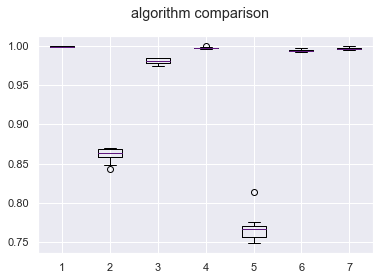

In [317]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier


results=[]
names=[]
models=[]
lr=LogisticRegression()
knn=KNeighborsClassifier()

rf=RandomForestClassifier()
nb=GaussianNB()
rf_boost=AdaBoostClassifier()
gboost=GradientBoostingClassifier()
cbc=CatBoostClassifier()

models.append(('cbc',cbc))
models.append(('lr',lr))
models.append(('knn',knn))

models.append(('rf',rf))
models.append(('nb',nb))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))

for name,model in models:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x_sen,y_sen,cv=kfold,scoring='recall') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 recall scores. we are taking its average.
    
    
    
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()

In [318]:
lr.fit(x_sen,y_sen)
id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/Test.csv")
y_pred=lr.predict(x_test)
r1=id['INCIDENT_ID']
r2=pd.DataFrame(y_pred,columns=['MULTIPLE_OFFENSE'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/results/lr_base_sen.csv',index=False)

knn.fit(x_sen,y_sen)
id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/Test.csv")
y_pred=knn.predict(x_test)
r1=id['INCIDENT_ID']
r2=pd.DataFrame(y_pred,columns=['MULTIPLE_OFFENSE'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/results/knn_base_sen.csv',index=False)


rf.fit(x_sen,y_sen)
id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/Test.csv")
y_pred=rf.predict(x_test)
r1=id['INCIDENT_ID']
r2=pd.DataFrame(y_pred,columns=['MULTIPLE_OFFENSE'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/results/rf_base_sen.csv',index=False)


nb.fit(x_sen,y_sen)
id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/Test.csv")
y_pred=nb.predict(x_test)
r1=id['INCIDENT_ID']
r2=pd.DataFrame(y_pred,columns=['MULTIPLE_OFFENSE'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/results/nb_base_sen.csv',index=False)

rf_boost.fit(x_sen,y_sen)
id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/Test.csv")
y_pred=rf_boost.predict(x_test)
r1=id['INCIDENT_ID']
r2=pd.DataFrame(y_pred,columns=['MULTIPLE_OFFENSE'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/results/rfboost_base_sen.csv',index=False)

gboost.fit(x_smote,y_smote)
id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/Test.csv")
y_pred=gboost.predict(x_test)
r1=id['INCIDENT_ID']
r2=pd.DataFrame(y_pred,columns=['MULTIPLE_OFFENSE'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/results/gboost_base_sen.csv',index=False)

cbc.fit(x_sen,y_sen)
id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/Test.csv")
y_pred=cbc.predict(x_test)
r1=id['INCIDENT_ID']
r2=pd.DataFrame(y_pred,columns=['MULTIPLE_OFFENSE'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/results/cbc_base_sen.csv',index=False)

Learning rate set to 0.051694
0:	learn: 0.5850438	total: 16.3ms	remaining: 16.3s
1:	learn: 0.4879130	total: 32.8ms	remaining: 16.4s
2:	learn: 0.4055029	total: 48ms	remaining: 15.9s
3:	learn: 0.3468450	total: 62.8ms	remaining: 15.6s
4:	learn: 0.3069333	total: 77.5ms	remaining: 15.4s
5:	learn: 0.2599153	total: 92.2ms	remaining: 15.3s
6:	learn: 0.2274969	total: 106ms	remaining: 15.1s
7:	learn: 0.2080318	total: 120ms	remaining: 14.9s
8:	learn: 0.1864762	total: 134ms	remaining: 14.8s
9:	learn: 0.1672063	total: 149ms	remaining: 14.7s
10:	learn: 0.1475309	total: 163ms	remaining: 14.7s
11:	learn: 0.1350562	total: 178ms	remaining: 14.6s
12:	learn: 0.1198777	total: 197ms	remaining: 14.9s
13:	learn: 0.1102322	total: 214ms	remaining: 15.1s
14:	learn: 0.1008807	total: 230ms	remaining: 15.1s
15:	learn: 0.0947921	total: 246ms	remaining: 15.1s
16:	learn: 0.0875593	total: 261ms	remaining: 15.1s
17:	learn: 0.0814551	total: 276ms	remaining: 15.1s
18:	learn: 0.0782930	total: 291ms	remaining: 15s
19:	learn

170:	learn: 0.0043853	total: 2.78s	remaining: 13.5s
171:	learn: 0.0043780	total: 2.8s	remaining: 13.5s
172:	learn: 0.0042466	total: 2.81s	remaining: 13.5s
173:	learn: 0.0041834	total: 2.83s	remaining: 13.4s
174:	learn: 0.0041834	total: 2.84s	remaining: 13.4s
175:	learn: 0.0041755	total: 2.85s	remaining: 13.4s
176:	learn: 0.0041408	total: 2.87s	remaining: 13.3s
177:	learn: 0.0041299	total: 2.88s	remaining: 13.3s
178:	learn: 0.0041089	total: 2.9s	remaining: 13.3s
179:	learn: 0.0041089	total: 2.91s	remaining: 13.2s
180:	learn: 0.0040571	total: 2.92s	remaining: 13.2s
181:	learn: 0.0040507	total: 2.94s	remaining: 13.2s
182:	learn: 0.0040384	total: 2.95s	remaining: 13.2s
183:	learn: 0.0040200	total: 2.97s	remaining: 13.2s
184:	learn: 0.0039876	total: 2.98s	remaining: 13.1s
185:	learn: 0.0039159	total: 3s	remaining: 13.1s
186:	learn: 0.0038925	total: 3.01s	remaining: 13.1s
187:	learn: 0.0038837	total: 3.03s	remaining: 13.1s
188:	learn: 0.0038773	total: 3.04s	remaining: 13.1s
189:	learn: 0.003

333:	learn: 0.0030039	total: 4.98s	remaining: 9.93s
334:	learn: 0.0030039	total: 4.99s	remaining: 9.91s
335:	learn: 0.0030039	total: 5.01s	remaining: 9.9s
336:	learn: 0.0030039	total: 5.02s	remaining: 9.88s
337:	learn: 0.0030039	total: 5.04s	remaining: 9.86s
338:	learn: 0.0030039	total: 5.05s	remaining: 9.85s
339:	learn: 0.0030038	total: 5.06s	remaining: 9.83s
340:	learn: 0.0030038	total: 5.08s	remaining: 9.81s
341:	learn: 0.0030038	total: 5.09s	remaining: 9.79s
342:	learn: 0.0029862	total: 5.11s	remaining: 9.79s
343:	learn: 0.0029862	total: 5.13s	remaining: 9.77s
344:	learn: 0.0029862	total: 5.14s	remaining: 9.75s
345:	learn: 0.0029862	total: 5.15s	remaining: 9.74s
346:	learn: 0.0029861	total: 5.16s	remaining: 9.72s
347:	learn: 0.0029861	total: 5.18s	remaining: 9.7s
348:	learn: 0.0029861	total: 5.19s	remaining: 9.68s
349:	learn: 0.0029861	total: 5.2s	remaining: 9.66s
350:	learn: 0.0029861	total: 5.21s	remaining: 9.64s
351:	learn: 0.0029861	total: 5.23s	remaining: 9.62s
352:	learn: 0.0

503:	learn: 0.0029850	total: 7.34s	remaining: 7.22s
504:	learn: 0.0029850	total: 7.35s	remaining: 7.21s
505:	learn: 0.0029850	total: 7.36s	remaining: 7.19s
506:	learn: 0.0029850	total: 7.37s	remaining: 7.17s
507:	learn: 0.0029850	total: 7.38s	remaining: 7.15s
508:	learn: 0.0029850	total: 7.4s	remaining: 7.13s
509:	learn: 0.0029850	total: 7.41s	remaining: 7.12s
510:	learn: 0.0029850	total: 7.42s	remaining: 7.1s
511:	learn: 0.0029850	total: 7.44s	remaining: 7.09s
512:	learn: 0.0029850	total: 7.45s	remaining: 7.07s
513:	learn: 0.0029850	total: 7.46s	remaining: 7.05s
514:	learn: 0.0029850	total: 7.47s	remaining: 7.03s
515:	learn: 0.0029850	total: 7.48s	remaining: 7.01s
516:	learn: 0.0029849	total: 7.49s	remaining: 7s
517:	learn: 0.0029849	total: 7.5s	remaining: 6.98s
518:	learn: 0.0029849	total: 7.51s	remaining: 6.96s
519:	learn: 0.0029849	total: 7.52s	remaining: 6.95s
520:	learn: 0.0029849	total: 7.54s	remaining: 6.93s
521:	learn: 0.0029849	total: 7.55s	remaining: 6.91s
522:	learn: 0.0029

663:	learn: 0.0029841	total: 9.15s	remaining: 4.63s
664:	learn: 0.0029841	total: 9.16s	remaining: 4.62s
665:	learn: 0.0029841	total: 9.17s	remaining: 4.6s
666:	learn: 0.0029841	total: 9.18s	remaining: 4.58s
667:	learn: 0.0029841	total: 9.19s	remaining: 4.57s
668:	learn: 0.0029841	total: 9.2s	remaining: 4.55s
669:	learn: 0.0029841	total: 9.21s	remaining: 4.54s
670:	learn: 0.0029841	total: 9.22s	remaining: 4.52s
671:	learn: 0.0029841	total: 9.24s	remaining: 4.51s
672:	learn: 0.0029841	total: 9.25s	remaining: 4.49s
673:	learn: 0.0029841	total: 9.26s	remaining: 4.48s
674:	learn: 0.0029841	total: 9.27s	remaining: 4.46s
675:	learn: 0.0029841	total: 9.28s	remaining: 4.45s
676:	learn: 0.0029841	total: 9.29s	remaining: 4.43s
677:	learn: 0.0029841	total: 9.3s	remaining: 4.42s
678:	learn: 0.0029841	total: 9.31s	remaining: 4.4s
679:	learn: 0.0029841	total: 9.33s	remaining: 4.39s
680:	learn: 0.0029841	total: 9.34s	remaining: 4.37s
681:	learn: 0.0029841	total: 9.35s	remaining: 4.36s
682:	learn: 0.00

826:	learn: 0.0029834	total: 11.3s	remaining: 2.37s
827:	learn: 0.0029833	total: 11.3s	remaining: 2.36s
828:	learn: 0.0029833	total: 11.4s	remaining: 2.34s
829:	learn: 0.0029833	total: 11.4s	remaining: 2.33s
830:	learn: 0.0029833	total: 11.4s	remaining: 2.31s
831:	learn: 0.0029833	total: 11.4s	remaining: 2.3s
832:	learn: 0.0029833	total: 11.4s	remaining: 2.29s
833:	learn: 0.0029833	total: 11.4s	remaining: 2.27s
834:	learn: 0.0029833	total: 11.4s	remaining: 2.26s
835:	learn: 0.0029833	total: 11.4s	remaining: 2.25s
836:	learn: 0.0029833	total: 11.5s	remaining: 2.23s
837:	learn: 0.0029833	total: 11.5s	remaining: 2.22s
838:	learn: 0.0029833	total: 11.5s	remaining: 2.2s
839:	learn: 0.0029833	total: 11.5s	remaining: 2.19s
840:	learn: 0.0029833	total: 11.5s	remaining: 2.18s
841:	learn: 0.0029833	total: 11.5s	remaining: 2.16s
842:	learn: 0.0029833	total: 11.5s	remaining: 2.15s
843:	learn: 0.0029833	total: 11.6s	remaining: 2.14s
844:	learn: 0.0029833	total: 11.6s	remaining: 2.12s
845:	learn: 0.

995:	learn: 0.0029825	total: 13.7s	remaining: 54.9ms
996:	learn: 0.0029825	total: 13.7s	remaining: 41.2ms
997:	learn: 0.0029825	total: 13.7s	remaining: 27.4ms
998:	learn: 0.0029825	total: 13.7s	remaining: 13.7ms
999:	learn: 0.0029825	total: 13.7s	remaining: 0us


# Inference:
    we can see smote is giving better results (catboost) than doing Smote+enn

# Feature Engineering
#### we are creating a new feature with abnormal value for each observation. this helps the model to learn more from the data. This method is helpful when we dont want to remove any outlier but want to incoporate the concept of outlier in the model.

In [358]:
df2=df1.copy()

In [359]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(ratio='minority')
train=df2[df2['train/test']==1]
test=df2[df2['train/test']==0]
y=train['MULTIPLE_OFFENSE']
x=train.drop(columns=['MULTIPLE_OFFENSE',"train/test"])
x_test=test.drop(columns=["train/test",'MULTIPLE_OFFENSE'])

x_smote,y_smote=smote.fit_sample(x,y)


In [360]:
a=pd.DataFrame(x_smote,columns=x.columns)
b=pd.DataFrame(y_smote,columns=['MULTIPLE_OFFENSE'])
df_smote_train=pd.concat([a,b],axis=1)
df_smote_train['train/test']=1
df_smote_train.head()

X_1  X_10   X_11  X_12   X_13   X_14  X_15   X_2   X_3  X_4  ...  \
0  0.0   1.0  174.0   1.0   92.0   29.0  36.0  36.0  34.0  2.0  ...   
1  1.0   1.0  236.0   1.0  103.0  142.0  34.0  37.0  37.0  0.0  ...   
2  0.0   1.0  174.0   1.0  110.0   93.0  34.0   3.0   2.0  3.0  ...   
3  0.0   1.0  249.0   1.0   72.0   29.0  34.0  33.0  32.0  2.0  ...   
4  0.0   1.0  174.0   0.0  112.0   29.0  43.0  33.0  32.0  2.0  ...   

   Day_Name_Wednesday  Weekend/weekday_weekend  month_end_begg_norm_month_end  \
0                 0.0                      1.0                            0.0   
1                 0.0                      0.0                            0.0   
2                 1.0                      0.0                            0.0   
3                 0.0                      0.0                            0.0   
4                 1.0                      0.0                            0.0   

   month_end_begg_norm_normal  year_end/begg/normal_year_end  \
0                         0.0                            0.0   
1                         1.0                            0.0   
2                         1.0                            0.0   
3                         1.0                            0.0   
4                         1.0                            0.0   

   year_end/begg/normal_year_normal  year_decade_after2010  \
0                               1.0                    0.0   
1                               1.0                    1.0   
2                               1.0                    1.0   
3                               1.0                    0.0   
4                               1.0                    0.0   

   year_decade_before_2000  MULTIPLE_OFFENSE  train/test  
0                      0.0               0.0           1  
1                      0.0               1.0           1  
2                      0.0               1.0           1  
3                      0.0               1.0           1  
4                      0.0               1.0           1  

[5 rows x 34 columns]

In [361]:
df_smote_test=x_test
df_smote_test['train/test']=0
df_tt=pd.concat([df_smote_train,df_smote_test],axis=0)   #combining upsampled train data with test data
df_tt.head()
print(df_tt.shape)

(61479, 34)


In [362]:
df_tt1=df_tt.drop(columns=['MULTIPLE_OFFENSE'],axis=1)

In [363]:
#isolation forrest

In [364]:
#isolation forest concept
from sklearn.ensemble import IsolationForest
isf = IsolationForest()
isf.fit(df_tt1)
df_tt1['abn_value']=isf.score_samples(df_tt1)
df_tt1.head()

Day_Name_Monday  Day_Name_Saturday  Day_Name_Sunday  Day_Name_Thursday  \
0              0.0                0.0              1.0                0.0   
1              0.0                0.0              0.0                0.0   
2              0.0                0.0              0.0                0.0   
3              0.0                0.0              0.0                0.0   
4              0.0                0.0              0.0                0.0   

   Day_Name_Tuesday  Day_Name_Wednesday  Day_date  Weekend/weekday_weekend  \
0               0.0                 0.0       3.0                      1.0   
1               1.0                 0.0      17.0                      0.0   
2               0.0                 1.0      14.0                      0.0   
3               0.0                 0.0      12.0                      0.0   
4               0.0                 1.0      12.0                      0.0   

   X_1  X_10  ...  month_end_begg_norm_month_end  month_end_begg_norm_normal  \
0  0.0   1.0  ...                            0.0                         0.0   
1  1.0   1.0  ...                            0.0                         1.0   
2  0.0   1.0  ...                            0.0                         1.0   
3  0.0   1.0  ...                            0.0                         1.0   
4  0.0   1.0  ...                            0.0                         1.0   

   passed_years  train/test  year  year_decade_after2010  \
0          16.0           1  13.0                    0.0   
1           3.0           1  26.0                    1.0   
2           3.0           1  26.0                    1.0   
3          11.0           1  18.0                    0.0   
4          15.0           1  14.0                    0.0   

   year_decade_before_2000  year_end/begg/normal_year_end  \
0                      0.0                            0.0   
1                      0.0                            0.0   
2                      0.0                            0.0   
3                      0.0                            0.0   
4                      0.0                            0.0   

   year_end/begg/normal_year_normal  abn_value  
0                               1.0  -0.420567  
1                               1.0  -0.480837  
2                               1.0  -0.483945  
3                               1.0  -0.388453  
4                               1.0  -0.422710  

[5 rows x 34 columns]

In [365]:
train=df_tt1[df_tt1['train/test']==1]
test=df_tt1[df_tt1['train/test']==0]
y=df_tt[df_tt['train/test']==1]['MULTIPLE_OFFENSE']

x=train.drop(columns=["train/test"])
x_test=test.drop(columns=["train/test"])



print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (45576, 33)
y_train shape is  (45576,)
x_test shape is  (15903, 33)


In [368]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier


results=[]
names=[]
models=[]
lr=LogisticRegression()
knn=KNeighborsClassifier()

rf=RandomForestClassifier()
nb=GaussianNB()
rf_boost=AdaBoostClassifier()
gboost=GradientBoostingClassifier()
cbc=CatBoostClassifier()

models.append(('cbc',cbc))
models.append(('lr',lr))
models.append(('knn',knn))

models.append(('rf',rf))
models.append(('nb',nb))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))

for name,model in models:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x,y,cv=kfold,scoring='recall') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 recall scores. we are taking its average.
    

Learning rate set to 0.050312
0:	learn: 0.5807320	total: 48.2ms	remaining: 48.2s
1:	learn: 0.4792380	total: 85ms	remaining: 42.4s
2:	learn: 0.4030384	total: 103ms	remaining: 34.4s
3:	learn: 0.3440862	total: 131ms	remaining: 32.7s
4:	learn: 0.2963827	total: 162ms	remaining: 32.3s
5:	learn: 0.2595666	total: 199ms	remaining: 32.9s
6:	learn: 0.2318391	total: 225ms	remaining: 31.9s
7:	learn: 0.2135825	total: 258ms	remaining: 31.9s
8:	learn: 0.1915979	total: 291ms	remaining: 32.1s
9:	learn: 0.1795709	total: 326ms	remaining: 32.3s
10:	learn: 0.1661025	total: 361ms	remaining: 32.4s
11:	learn: 0.1577591	total: 394ms	remaining: 32.5s
12:	learn: 0.1426686	total: 422ms	remaining: 32s
13:	learn: 0.1304212	total: 458ms	remaining: 32.3s
14:	learn: 0.1170748	total: 515ms	remaining: 33.8s
15:	learn: 0.1079219	total: 556ms	remaining: 34.2s
16:	learn: 0.0995979	total: 591ms	remaining: 34.2s
17:	learn: 0.0948661	total: 617ms	remaining: 33.7s
18:	learn: 0.0901677	total: 640ms	remaining: 33s
19:	learn: 0.08

164:	learn: 0.0059999	total: 5.04s	remaining: 25.5s
165:	learn: 0.0059104	total: 5.07s	remaining: 25.5s
166:	learn: 0.0058984	total: 5.1s	remaining: 25.5s
167:	learn: 0.0058154	total: 5.14s	remaining: 25.4s
168:	learn: 0.0057943	total: 5.17s	remaining: 25.4s
169:	learn: 0.0057556	total: 5.2s	remaining: 25.4s
170:	learn: 0.0057386	total: 5.22s	remaining: 25.3s
171:	learn: 0.0057202	total: 5.24s	remaining: 25.2s
172:	learn: 0.0056528	total: 5.26s	remaining: 25.2s
173:	learn: 0.0056303	total: 5.3s	remaining: 25.2s
174:	learn: 0.0055876	total: 5.32s	remaining: 25.1s
175:	learn: 0.0055518	total: 5.35s	remaining: 25.1s
176:	learn: 0.0053696	total: 5.39s	remaining: 25.1s
177:	learn: 0.0053471	total: 5.41s	remaining: 25s
178:	learn: 0.0051886	total: 5.45s	remaining: 25s
179:	learn: 0.0051505	total: 5.48s	remaining: 24.9s
180:	learn: 0.0050910	total: 5.5s	remaining: 24.9s
181:	learn: 0.0050504	total: 5.53s	remaining: 24.8s
182:	learn: 0.0049662	total: 5.56s	remaining: 24.8s
183:	learn: 0.004944

326:	learn: 0.0036060	total: 9.42s	remaining: 19.4s
327:	learn: 0.0036060	total: 9.44s	remaining: 19.3s
328:	learn: 0.0036060	total: 9.46s	remaining: 19.3s
329:	learn: 0.0036060	total: 9.5s	remaining: 19.3s
330:	learn: 0.0036060	total: 9.53s	remaining: 19.3s
331:	learn: 0.0036060	total: 9.55s	remaining: 19.2s
332:	learn: 0.0036060	total: 9.58s	remaining: 19.2s
333:	learn: 0.0036059	total: 9.61s	remaining: 19.2s
334:	learn: 0.0036059	total: 9.63s	remaining: 19.1s
335:	learn: 0.0036059	total: 9.65s	remaining: 19.1s
336:	learn: 0.0036059	total: 9.67s	remaining: 19s
337:	learn: 0.0036059	total: 9.7s	remaining: 19s
338:	learn: 0.0036059	total: 9.72s	remaining: 19s
339:	learn: 0.0036059	total: 9.75s	remaining: 18.9s
340:	learn: 0.0036059	total: 9.77s	remaining: 18.9s
341:	learn: 0.0036059	total: 9.79s	remaining: 18.8s
342:	learn: 0.0036058	total: 9.81s	remaining: 18.8s
343:	learn: 0.0036058	total: 9.84s	remaining: 18.8s
344:	learn: 0.0036058	total: 9.86s	remaining: 18.7s
345:	learn: 0.003605

486:	learn: 0.0036045	total: 13.5s	remaining: 14.2s
487:	learn: 0.0036045	total: 13.5s	remaining: 14.1s
488:	learn: 0.0036045	total: 13.5s	remaining: 14.1s
489:	learn: 0.0036045	total: 13.5s	remaining: 14.1s
490:	learn: 0.0036045	total: 13.5s	remaining: 14s
491:	learn: 0.0036045	total: 13.6s	remaining: 14s
492:	learn: 0.0036045	total: 13.6s	remaining: 14s
493:	learn: 0.0036045	total: 13.6s	remaining: 13.9s
494:	learn: 0.0036045	total: 13.6s	remaining: 13.9s
495:	learn: 0.0036045	total: 13.7s	remaining: 13.9s
496:	learn: 0.0036045	total: 13.7s	remaining: 13.9s
497:	learn: 0.0036045	total: 13.7s	remaining: 13.8s
498:	learn: 0.0036044	total: 13.7s	remaining: 13.8s
499:	learn: 0.0036044	total: 13.8s	remaining: 13.8s
500:	learn: 0.0036044	total: 13.8s	remaining: 13.7s
501:	learn: 0.0036044	total: 13.8s	remaining: 13.7s
502:	learn: 0.0036044	total: 13.8s	remaining: 13.7s
503:	learn: 0.0036044	total: 13.9s	remaining: 13.6s
504:	learn: 0.0036044	total: 13.9s	remaining: 13.6s
505:	learn: 0.0036

652:	learn: 0.0035998	total: 17.2s	remaining: 9.14s
653:	learn: 0.0035997	total: 17.2s	remaining: 9.12s
654:	learn: 0.0035997	total: 17.3s	remaining: 9.09s
655:	learn: 0.0035997	total: 17.3s	remaining: 9.06s
656:	learn: 0.0035997	total: 17.3s	remaining: 9.04s
657:	learn: 0.0035997	total: 17.3s	remaining: 9.01s
658:	learn: 0.0035997	total: 17.4s	remaining: 8.98s
659:	learn: 0.0035997	total: 17.4s	remaining: 8.95s
660:	learn: 0.0035997	total: 17.4s	remaining: 8.93s
661:	learn: 0.0035996	total: 17.4s	remaining: 8.9s
662:	learn: 0.0035996	total: 17.5s	remaining: 8.87s
663:	learn: 0.0035996	total: 17.5s	remaining: 8.85s
664:	learn: 0.0035996	total: 17.5s	remaining: 8.81s
665:	learn: 0.0035996	total: 17.5s	remaining: 8.78s
666:	learn: 0.0035996	total: 17.5s	remaining: 8.75s
667:	learn: 0.0035996	total: 17.5s	remaining: 8.72s
668:	learn: 0.0035996	total: 17.6s	remaining: 8.69s
669:	learn: 0.0035996	total: 17.6s	remaining: 8.66s
670:	learn: 0.0035996	total: 17.6s	remaining: 8.64s
671:	learn: 0

818:	learn: 0.0035360	total: 21.2s	remaining: 4.69s
819:	learn: 0.0035359	total: 21.2s	remaining: 4.66s
820:	learn: 0.0035359	total: 21.3s	remaining: 4.64s
821:	learn: 0.0035358	total: 21.3s	remaining: 4.61s
822:	learn: 0.0035358	total: 21.3s	remaining: 4.58s
823:	learn: 0.0035358	total: 21.3s	remaining: 4.56s
824:	learn: 0.0035353	total: 21.4s	remaining: 4.53s
825:	learn: 0.0035353	total: 21.4s	remaining: 4.51s
826:	learn: 0.0035349	total: 21.4s	remaining: 4.48s
827:	learn: 0.0035349	total: 21.4s	remaining: 4.46s
828:	learn: 0.0035345	total: 21.5s	remaining: 4.43s
829:	learn: 0.0035344	total: 21.5s	remaining: 4.4s
830:	learn: 0.0035340	total: 21.5s	remaining: 4.38s
831:	learn: 0.0035340	total: 21.6s	remaining: 4.35s
832:	learn: 0.0035340	total: 21.6s	remaining: 4.33s
833:	learn: 0.0035340	total: 21.6s	remaining: 4.3s
834:	learn: 0.0035336	total: 21.7s	remaining: 4.28s
835:	learn: 0.0035336	total: 21.7s	remaining: 4.25s
836:	learn: 0.0035332	total: 21.7s	remaining: 4.23s
837:	learn: 0.

980:	learn: 0.0035260	total: 25.5s	remaining: 495ms
981:	learn: 0.0034801	total: 25.6s	remaining: 469ms
982:	learn: 0.0034801	total: 25.6s	remaining: 443ms
983:	learn: 0.0034801	total: 25.6s	remaining: 417ms
984:	learn: 0.0034801	total: 25.7s	remaining: 391ms
985:	learn: 0.0034801	total: 25.7s	remaining: 365ms
986:	learn: 0.0034801	total: 25.7s	remaining: 339ms
987:	learn: 0.0034801	total: 25.7s	remaining: 313ms
988:	learn: 0.0034801	total: 25.8s	remaining: 287ms
989:	learn: 0.0034801	total: 25.8s	remaining: 261ms
990:	learn: 0.0034801	total: 25.8s	remaining: 235ms
991:	learn: 0.0034801	total: 25.8s	remaining: 208ms
992:	learn: 0.0034801	total: 25.9s	remaining: 182ms
993:	learn: 0.0034801	total: 25.9s	remaining: 156ms
994:	learn: 0.0034800	total: 25.9s	remaining: 130ms
995:	learn: 0.0034800	total: 25.9s	remaining: 104ms
996:	learn: 0.0034800	total: 26s	remaining: 78.2ms
997:	learn: 0.0034800	total: 26s	remaining: 52.1ms
998:	learn: 0.0034800	total: 26s	remaining: 26.1ms
999:	learn: 0.0

143:	learn: 0.0072100	total: 4.89s	remaining: 29.1s
144:	learn: 0.0071954	total: 4.93s	remaining: 29.1s
145:	learn: 0.0071475	total: 4.96s	remaining: 29s
146:	learn: 0.0070976	total: 4.98s	remaining: 28.9s
147:	learn: 0.0070088	total: 5.01s	remaining: 28.8s
148:	learn: 0.0069200	total: 5.04s	remaining: 28.8s
149:	learn: 0.0068126	total: 5.07s	remaining: 28.7s
150:	learn: 0.0066811	total: 5.09s	remaining: 28.6s
151:	learn: 0.0066626	total: 5.11s	remaining: 28.5s
152:	learn: 0.0066443	total: 5.13s	remaining: 28.4s
153:	learn: 0.0065619	total: 5.15s	remaining: 28.3s
154:	learn: 0.0065177	total: 5.17s	remaining: 28.2s
155:	learn: 0.0065022	total: 5.19s	remaining: 28.1s
156:	learn: 0.0063804	total: 5.22s	remaining: 28s
157:	learn: 0.0063069	total: 5.24s	remaining: 27.9s
158:	learn: 0.0062978	total: 5.27s	remaining: 27.9s
159:	learn: 0.0062555	total: 5.29s	remaining: 27.8s
160:	learn: 0.0062293	total: 5.33s	remaining: 27.8s
161:	learn: 0.0062188	total: 5.36s	remaining: 27.7s
162:	learn: 0.00

308:	learn: 0.0032172	total: 9.84s	remaining: 22s
309:	learn: 0.0032172	total: 9.87s	remaining: 22s
310:	learn: 0.0032172	total: 9.89s	remaining: 21.9s
311:	learn: 0.0032172	total: 9.92s	remaining: 21.9s
312:	learn: 0.0032171	total: 9.94s	remaining: 21.8s
313:	learn: 0.0032171	total: 9.97s	remaining: 21.8s
314:	learn: 0.0032171	total: 9.99s	remaining: 21.7s
315:	learn: 0.0032171	total: 10s	remaining: 21.7s
316:	learn: 0.0032171	total: 10s	remaining: 21.6s
317:	learn: 0.0032171	total: 10.1s	remaining: 21.6s
318:	learn: 0.0032170	total: 10.1s	remaining: 21.6s
319:	learn: 0.0032170	total: 10.1s	remaining: 21.5s
320:	learn: 0.0032170	total: 10.2s	remaining: 21.5s
321:	learn: 0.0032170	total: 10.2s	remaining: 21.4s
322:	learn: 0.0032170	total: 10.2s	remaining: 21.4s
323:	learn: 0.0032170	total: 10.2s	remaining: 21.4s
324:	learn: 0.0032170	total: 10.3s	remaining: 21.3s
325:	learn: 0.0032170	total: 10.3s	remaining: 21.3s
326:	learn: 0.0032170	total: 10.3s	remaining: 21.2s
327:	learn: 0.003216

473:	learn: 0.0032156	total: 14s	remaining: 15.5s
474:	learn: 0.0032156	total: 14s	remaining: 15.5s
475:	learn: 0.0032156	total: 14s	remaining: 15.4s
476:	learn: 0.0032156	total: 14s	remaining: 15.4s
477:	learn: 0.0032155	total: 14.1s	remaining: 15.4s
478:	learn: 0.0032155	total: 14.1s	remaining: 15.3s
479:	learn: 0.0032155	total: 14.1s	remaining: 15.3s
480:	learn: 0.0032155	total: 14.1s	remaining: 15.3s
481:	learn: 0.0032155	total: 14.2s	remaining: 15.2s
482:	learn: 0.0032155	total: 14.2s	remaining: 15.2s
483:	learn: 0.0032155	total: 14.2s	remaining: 15.2s
484:	learn: 0.0032155	total: 14.2s	remaining: 15.1s
485:	learn: 0.0032155	total: 14.3s	remaining: 15.1s
486:	learn: 0.0032155	total: 14.3s	remaining: 15s
487:	learn: 0.0032154	total: 14.3s	remaining: 15s
488:	learn: 0.0032154	total: 14.3s	remaining: 15s
489:	learn: 0.0032154	total: 14.3s	remaining: 14.9s
490:	learn: 0.0032154	total: 14.4s	remaining: 14.9s
491:	learn: 0.0032154	total: 14.4s	remaining: 14.9s
492:	learn: 0.0032154	tota

634:	learn: 0.0032141	total: 17.8s	remaining: 10.2s
635:	learn: 0.0032141	total: 17.8s	remaining: 10.2s
636:	learn: 0.0032067	total: 17.9s	remaining: 10.2s
637:	learn: 0.0032067	total: 17.9s	remaining: 10.2s
638:	learn: 0.0032066	total: 17.9s	remaining: 10.1s
639:	learn: 0.0032060	total: 18s	remaining: 10.1s
640:	learn: 0.0032060	total: 18s	remaining: 10.1s
641:	learn: 0.0032060	total: 18s	remaining: 10s
642:	learn: 0.0032060	total: 18s	remaining: 10s
643:	learn: 0.0032060	total: 18.1s	remaining: 9.98s
644:	learn: 0.0032060	total: 18.1s	remaining: 9.95s
645:	learn: 0.0032059	total: 18.1s	remaining: 9.92s
646:	learn: 0.0032059	total: 18.1s	remaining: 9.89s
647:	learn: 0.0032059	total: 18.2s	remaining: 9.86s
648:	learn: 0.0032059	total: 18.2s	remaining: 9.83s
649:	learn: 0.0032059	total: 18.2s	remaining: 9.8s
650:	learn: 0.0032059	total: 18.2s	remaining: 9.78s
651:	learn: 0.0032058	total: 18.3s	remaining: 9.75s
652:	learn: 0.0032058	total: 18.3s	remaining: 9.72s
653:	learn: 0.0032058	tot

795:	learn: 0.0031558	total: 21.4s	remaining: 5.48s
796:	learn: 0.0031557	total: 21.4s	remaining: 5.45s
797:	learn: 0.0031557	total: 21.4s	remaining: 5.42s
798:	learn: 0.0031557	total: 21.4s	remaining: 5.39s
799:	learn: 0.0031557	total: 21.5s	remaining: 5.37s
800:	learn: 0.0031557	total: 21.5s	remaining: 5.34s
801:	learn: 0.0031557	total: 21.5s	remaining: 5.31s
802:	learn: 0.0031556	total: 21.5s	remaining: 5.28s
803:	learn: 0.0031556	total: 21.6s	remaining: 5.26s
804:	learn: 0.0031556	total: 21.6s	remaining: 5.23s
805:	learn: 0.0031556	total: 21.6s	remaining: 5.2s
806:	learn: 0.0031556	total: 21.6s	remaining: 5.17s
807:	learn: 0.0031556	total: 21.7s	remaining: 5.15s
808:	learn: 0.0031556	total: 21.7s	remaining: 5.12s
809:	learn: 0.0031556	total: 21.7s	remaining: 5.09s
810:	learn: 0.0031556	total: 21.7s	remaining: 5.07s
811:	learn: 0.0031556	total: 21.8s	remaining: 5.04s
812:	learn: 0.0031556	total: 21.8s	remaining: 5.01s
813:	learn: 0.0031556	total: 21.8s	remaining: 4.98s
814:	learn: 0

961:	learn: 0.0031123	total: 25.6s	remaining: 1.01s
962:	learn: 0.0031123	total: 25.6s	remaining: 983ms
963:	learn: 0.0031123	total: 25.6s	remaining: 956ms
964:	learn: 0.0031123	total: 25.6s	remaining: 929ms
965:	learn: 0.0031123	total: 25.6s	remaining: 903ms
966:	learn: 0.0031123	total: 25.7s	remaining: 876ms
967:	learn: 0.0031123	total: 25.7s	remaining: 849ms
968:	learn: 0.0031123	total: 25.7s	remaining: 823ms
969:	learn: 0.0031123	total: 25.7s	remaining: 796ms
970:	learn: 0.0031123	total: 25.8s	remaining: 769ms
971:	learn: 0.0031123	total: 25.8s	remaining: 743ms
972:	learn: 0.0031123	total: 25.8s	remaining: 716ms
973:	learn: 0.0031123	total: 25.8s	remaining: 690ms
974:	learn: 0.0031123	total: 25.9s	remaining: 663ms
975:	learn: 0.0031123	total: 25.9s	remaining: 636ms
976:	learn: 0.0031123	total: 25.9s	remaining: 610ms
977:	learn: 0.0031123	total: 25.9s	remaining: 583ms
978:	learn: 0.0031123	total: 25.9s	remaining: 557ms
979:	learn: 0.0031123	total: 26s	remaining: 530ms
980:	learn: 0.

125:	learn: 0.0082859	total: 4.1s	remaining: 28.4s
126:	learn: 0.0082281	total: 4.13s	remaining: 28.4s
127:	learn: 0.0081895	total: 4.17s	remaining: 28.4s
128:	learn: 0.0081026	total: 4.2s	remaining: 28.3s
129:	learn: 0.0080235	total: 4.22s	remaining: 28.2s
130:	learn: 0.0079227	total: 4.24s	remaining: 28.1s
131:	learn: 0.0078685	total: 4.26s	remaining: 28s
132:	learn: 0.0077543	total: 4.27s	remaining: 27.9s
133:	learn: 0.0077047	total: 4.29s	remaining: 27.8s
134:	learn: 0.0076544	total: 4.32s	remaining: 27.7s
135:	learn: 0.0076268	total: 4.35s	remaining: 27.6s
136:	learn: 0.0075766	total: 4.38s	remaining: 27.6s
137:	learn: 0.0075007	total: 4.4s	remaining: 27.5s
138:	learn: 0.0074038	total: 4.43s	remaining: 27.5s
139:	learn: 0.0073767	total: 4.46s	remaining: 27.4s
140:	learn: 0.0073633	total: 4.49s	remaining: 27.4s
141:	learn: 0.0072668	total: 4.53s	remaining: 27.4s
142:	learn: 0.0072121	total: 4.56s	remaining: 27.3s
143:	learn: 0.0071012	total: 4.59s	remaining: 27.3s
144:	learn: 0.007

285:	learn: 0.0035258	total: 8.51s	remaining: 21.2s
286:	learn: 0.0035258	total: 8.54s	remaining: 21.2s
287:	learn: 0.0035258	total: 8.56s	remaining: 21.2s
288:	learn: 0.0035258	total: 8.59s	remaining: 21.1s
289:	learn: 0.0035258	total: 8.61s	remaining: 21.1s
290:	learn: 0.0035234	total: 8.64s	remaining: 21s
291:	learn: 0.0035234	total: 8.65s	remaining: 21s
292:	learn: 0.0035233	total: 8.67s	remaining: 20.9s
293:	learn: 0.0035233	total: 8.7s	remaining: 20.9s
294:	learn: 0.0035233	total: 8.72s	remaining: 20.8s
295:	learn: 0.0035233	total: 8.74s	remaining: 20.8s
296:	learn: 0.0035233	total: 8.76s	remaining: 20.7s
297:	learn: 0.0035233	total: 8.77s	remaining: 20.7s
298:	learn: 0.0035233	total: 8.79s	remaining: 20.6s
299:	learn: 0.0035233	total: 8.8s	remaining: 20.5s
300:	learn: 0.0035233	total: 8.83s	remaining: 20.5s
301:	learn: 0.0035233	total: 8.86s	remaining: 20.5s
302:	learn: 0.0035233	total: 8.88s	remaining: 20.4s
303:	learn: 0.0035233	total: 8.9s	remaining: 20.4s
304:	learn: 0.00352

444:	learn: 0.0035226	total: 12.1s	remaining: 15.1s
445:	learn: 0.0035226	total: 12.1s	remaining: 15.1s
446:	learn: 0.0035226	total: 12.2s	remaining: 15s
447:	learn: 0.0035226	total: 12.2s	remaining: 15s
448:	learn: 0.0035226	total: 12.2s	remaining: 15s
449:	learn: 0.0035225	total: 12.2s	remaining: 15s
450:	learn: 0.0035225	total: 12.3s	remaining: 14.9s
451:	learn: 0.0035225	total: 12.3s	remaining: 14.9s
452:	learn: 0.0035225	total: 12.3s	remaining: 14.9s
453:	learn: 0.0035225	total: 12.4s	remaining: 14.9s
454:	learn: 0.0035225	total: 12.4s	remaining: 14.8s
455:	learn: 0.0035225	total: 12.4s	remaining: 14.8s
456:	learn: 0.0035225	total: 12.4s	remaining: 14.8s
457:	learn: 0.0035224	total: 12.5s	remaining: 14.7s
458:	learn: 0.0035224	total: 12.5s	remaining: 14.7s
459:	learn: 0.0035224	total: 12.5s	remaining: 14.7s
460:	learn: 0.0035224	total: 12.5s	remaining: 14.7s
461:	learn: 0.0035224	total: 12.6s	remaining: 14.6s
462:	learn: 0.0035224	total: 12.6s	remaining: 14.6s
463:	learn: 0.003522

610:	learn: 0.0035217	total: 16.1s	remaining: 10.2s
611:	learn: 0.0035217	total: 16.1s	remaining: 10.2s
612:	learn: 0.0035217	total: 16.1s	remaining: 10.2s
613:	learn: 0.0035217	total: 16.2s	remaining: 10.2s
614:	learn: 0.0035217	total: 16.2s	remaining: 10.1s
615:	learn: 0.0035217	total: 16.2s	remaining: 10.1s
616:	learn: 0.0035217	total: 16.2s	remaining: 10.1s
617:	learn: 0.0035217	total: 16.3s	remaining: 10.1s
618:	learn: 0.0035217	total: 16.3s	remaining: 10s
619:	learn: 0.0035217	total: 16.3s	remaining: 10s
620:	learn: 0.0035217	total: 16.3s	remaining: 9.98s
621:	learn: 0.0035217	total: 16.4s	remaining: 9.95s
622:	learn: 0.0035217	total: 16.4s	remaining: 9.92s
623:	learn: 0.0035217	total: 16.4s	remaining: 9.89s
624:	learn: 0.0035217	total: 16.4s	remaining: 9.87s
625:	learn: 0.0035217	total: 16.5s	remaining: 9.84s
626:	learn: 0.0035217	total: 16.5s	remaining: 9.81s
627:	learn: 0.0035216	total: 16.5s	remaining: 9.78s
628:	learn: 0.0035216	total: 16.5s	remaining: 9.76s
629:	learn: 0.00

772:	learn: 0.0035206	total: 20s	remaining: 5.88s
773:	learn: 0.0035206	total: 20s	remaining: 5.85s
774:	learn: 0.0035206	total: 20.1s	remaining: 5.83s
775:	learn: 0.0035206	total: 20.1s	remaining: 5.8s
776:	learn: 0.0035206	total: 20.1s	remaining: 5.77s
777:	learn: 0.0035206	total: 20.1s	remaining: 5.74s
778:	learn: 0.0035206	total: 20.1s	remaining: 5.71s
779:	learn: 0.0035206	total: 20.2s	remaining: 5.69s
780:	learn: 0.0035205	total: 20.2s	remaining: 5.66s
781:	learn: 0.0035205	total: 20.2s	remaining: 5.64s
782:	learn: 0.0035205	total: 20.2s	remaining: 5.61s
783:	learn: 0.0035205	total: 20.3s	remaining: 5.58s
784:	learn: 0.0035205	total: 20.3s	remaining: 5.56s
785:	learn: 0.0035205	total: 20.3s	remaining: 5.53s
786:	learn: 0.0035205	total: 20.3s	remaining: 5.5s
787:	learn: 0.0035205	total: 20.4s	remaining: 5.48s
788:	learn: 0.0035205	total: 20.4s	remaining: 5.45s
789:	learn: 0.0035205	total: 20.4s	remaining: 5.43s
790:	learn: 0.0035205	total: 20.4s	remaining: 5.4s
791:	learn: 0.00352

932:	learn: 0.0035191	total: 23.8s	remaining: 1.71s
933:	learn: 0.0035191	total: 23.8s	remaining: 1.68s
934:	learn: 0.0035191	total: 23.8s	remaining: 1.66s
935:	learn: 0.0035191	total: 23.8s	remaining: 1.63s
936:	learn: 0.0035190	total: 23.9s	remaining: 1.6s
937:	learn: 0.0035190	total: 23.9s	remaining: 1.58s
938:	learn: 0.0035190	total: 23.9s	remaining: 1.55s
939:	learn: 0.0035190	total: 23.9s	remaining: 1.53s
940:	learn: 0.0035190	total: 23.9s	remaining: 1.5s
941:	learn: 0.0035190	total: 24s	remaining: 1.48s
942:	learn: 0.0035190	total: 24s	remaining: 1.45s
943:	learn: 0.0035190	total: 24s	remaining: 1.42s
944:	learn: 0.0035189	total: 24s	remaining: 1.4s
945:	learn: 0.0035189	total: 24s	remaining: 1.37s
946:	learn: 0.0035184	total: 24.1s	remaining: 1.35s
947:	learn: 0.0035184	total: 24.1s	remaining: 1.32s
948:	learn: 0.0035184	total: 24.1s	remaining: 1.29s
949:	learn: 0.0035183	total: 24.1s	remaining: 1.27s
950:	learn: 0.0035183	total: 24.2s	remaining: 1.25s
951:	learn: 0.0035183	tot

96:	learn: 0.0106241	total: 3.05s	remaining: 28.4s
97:	learn: 0.0105406	total: 3.08s	remaining: 28.3s
98:	learn: 0.0104013	total: 3.1s	remaining: 28.2s
99:	learn: 0.0103554	total: 3.13s	remaining: 28.2s
100:	learn: 0.0103141	total: 3.16s	remaining: 28.1s
101:	learn: 0.0101845	total: 3.19s	remaining: 28.1s
102:	learn: 0.0101183	total: 3.22s	remaining: 28.1s
103:	learn: 0.0099784	total: 3.25s	remaining: 28s
104:	learn: 0.0098276	total: 3.29s	remaining: 28s
105:	learn: 0.0097188	total: 3.31s	remaining: 27.9s
106:	learn: 0.0095885	total: 3.35s	remaining: 27.9s
107:	learn: 0.0095498	total: 3.37s	remaining: 27.8s
108:	learn: 0.0094511	total: 3.39s	remaining: 27.7s
109:	learn: 0.0093410	total: 3.41s	remaining: 27.6s
110:	learn: 0.0092447	total: 3.45s	remaining: 27.6s
111:	learn: 0.0089870	total: 3.48s	remaining: 27.6s
112:	learn: 0.0088713	total: 3.5s	remaining: 27.5s
113:	learn: 0.0088124	total: 3.54s	remaining: 27.5s
114:	learn: 0.0087907	total: 3.56s	remaining: 27.4s
115:	learn: 0.0086892	

262:	learn: 0.0032488	total: 8.8s	remaining: 24.7s
263:	learn: 0.0032488	total: 8.82s	remaining: 24.6s
264:	learn: 0.0032488	total: 8.85s	remaining: 24.5s
265:	learn: 0.0032488	total: 8.88s	remaining: 24.5s
266:	learn: 0.0032488	total: 8.91s	remaining: 24.5s
267:	learn: 0.0032488	total: 8.94s	remaining: 24.4s
268:	learn: 0.0032488	total: 8.97s	remaining: 24.4s
269:	learn: 0.0032488	total: 9s	remaining: 24.3s
270:	learn: 0.0032488	total: 9.03s	remaining: 24.3s
271:	learn: 0.0032488	total: 9.05s	remaining: 24.2s
272:	learn: 0.0032487	total: 9.08s	remaining: 24.2s
273:	learn: 0.0032487	total: 9.1s	remaining: 24.1s
274:	learn: 0.0032487	total: 9.13s	remaining: 24.1s
275:	learn: 0.0032487	total: 9.16s	remaining: 24s
276:	learn: 0.0032487	total: 9.19s	remaining: 24s
277:	learn: 0.0032487	total: 9.22s	remaining: 23.9s
278:	learn: 0.0032487	total: 9.24s	remaining: 23.9s
279:	learn: 0.0032487	total: 9.27s	remaining: 23.8s
280:	learn: 0.0032487	total: 9.3s	remaining: 23.8s
281:	learn: 0.0032487	

425:	learn: 0.0032483	total: 13.4s	remaining: 18.1s
426:	learn: 0.0032483	total: 13.5s	remaining: 18.1s
427:	learn: 0.0032483	total: 13.5s	remaining: 18s
428:	learn: 0.0032483	total: 13.5s	remaining: 18s
429:	learn: 0.0032483	total: 13.5s	remaining: 17.9s
430:	learn: 0.0032483	total: 13.6s	remaining: 17.9s
431:	learn: 0.0032483	total: 13.6s	remaining: 17.9s
432:	learn: 0.0032483	total: 13.6s	remaining: 17.8s
433:	learn: 0.0032483	total: 13.6s	remaining: 17.8s
434:	learn: 0.0032483	total: 13.7s	remaining: 17.8s
435:	learn: 0.0032483	total: 13.7s	remaining: 17.7s
436:	learn: 0.0032483	total: 13.7s	remaining: 17.7s
437:	learn: 0.0032483	total: 13.7s	remaining: 17.6s
438:	learn: 0.0032483	total: 13.8s	remaining: 17.6s
439:	learn: 0.0032483	total: 13.8s	remaining: 17.5s
440:	learn: 0.0032483	total: 13.8s	remaining: 17.5s
441:	learn: 0.0032483	total: 13.8s	remaining: 17.5s
442:	learn: 0.0032483	total: 13.9s	remaining: 17.4s
443:	learn: 0.0032483	total: 13.9s	remaining: 17.4s
444:	learn: 0.00

589:	learn: 0.0032483	total: 17s	remaining: 11.8s
590:	learn: 0.0032483	total: 17s	remaining: 11.8s
591:	learn: 0.0032483	total: 17s	remaining: 11.7s
592:	learn: 0.0032483	total: 17s	remaining: 11.7s
593:	learn: 0.0032483	total: 17.1s	remaining: 11.7s
594:	learn: 0.0032483	total: 17.1s	remaining: 11.6s
595:	learn: 0.0032483	total: 17.1s	remaining: 11.6s
596:	learn: 0.0032483	total: 17.1s	remaining: 11.6s
597:	learn: 0.0032483	total: 17.2s	remaining: 11.5s
598:	learn: 0.0032483	total: 17.2s	remaining: 11.5s
599:	learn: 0.0032483	total: 17.2s	remaining: 11.5s
600:	learn: 0.0032483	total: 17.2s	remaining: 11.4s
601:	learn: 0.0032483	total: 17.3s	remaining: 11.4s
602:	learn: 0.0032483	total: 17.3s	remaining: 11.4s
603:	learn: 0.0032483	total: 17.3s	remaining: 11.4s
604:	learn: 0.0032483	total: 17.4s	remaining: 11.3s
605:	learn: 0.0032483	total: 17.4s	remaining: 11.3s
606:	learn: 0.0032483	total: 17.4s	remaining: 11.3s
607:	learn: 0.0032483	total: 17.4s	remaining: 11.2s
608:	learn: 0.003248

752:	learn: 0.0032483	total: 21s	remaining: 6.87s
753:	learn: 0.0032483	total: 21s	remaining: 6.84s
754:	learn: 0.0032483	total: 21s	remaining: 6.82s
755:	learn: 0.0032483	total: 21s	remaining: 6.79s
756:	learn: 0.0032483	total: 21.1s	remaining: 6.76s
757:	learn: 0.0032483	total: 21.1s	remaining: 6.74s
758:	learn: 0.0032483	total: 21.1s	remaining: 6.71s
759:	learn: 0.0032483	total: 21.2s	remaining: 6.68s
760:	learn: 0.0032483	total: 21.2s	remaining: 6.66s
761:	learn: 0.0032483	total: 21.2s	remaining: 6.63s
762:	learn: 0.0032483	total: 21.3s	remaining: 6.6s
763:	learn: 0.0032483	total: 21.3s	remaining: 6.58s
764:	learn: 0.0032483	total: 21.3s	remaining: 6.55s
765:	learn: 0.0032483	total: 21.3s	remaining: 6.52s
766:	learn: 0.0032483	total: 21.4s	remaining: 6.5s
767:	learn: 0.0032483	total: 21.4s	remaining: 6.47s
768:	learn: 0.0032483	total: 21.4s	remaining: 6.44s
769:	learn: 0.0032483	total: 21.5s	remaining: 6.41s
770:	learn: 0.0032483	total: 21.5s	remaining: 6.38s
771:	learn: 0.0032483	

917:	learn: 0.0032483	total: 25.2s	remaining: 2.25s
918:	learn: 0.0032483	total: 25.2s	remaining: 2.22s
919:	learn: 0.0032483	total: 25.2s	remaining: 2.19s
920:	learn: 0.0032483	total: 25.2s	remaining: 2.16s
921:	learn: 0.0032483	total: 25.3s	remaining: 2.14s
922:	learn: 0.0032483	total: 25.3s	remaining: 2.11s
923:	learn: 0.0032483	total: 25.3s	remaining: 2.08s
924:	learn: 0.0032483	total: 25.3s	remaining: 2.05s
925:	learn: 0.0032483	total: 25.3s	remaining: 2.02s
926:	learn: 0.0032483	total: 25.4s	remaining: 2s
927:	learn: 0.0032483	total: 25.4s	remaining: 1.97s
928:	learn: 0.0032483	total: 25.4s	remaining: 1.94s
929:	learn: 0.0032483	total: 25.4s	remaining: 1.91s
930:	learn: 0.0032483	total: 25.4s	remaining: 1.89s
931:	learn: 0.0032483	total: 25.5s	remaining: 1.86s
932:	learn: 0.0032483	total: 25.5s	remaining: 1.83s
933:	learn: 0.0032483	total: 25.5s	remaining: 1.8s
934:	learn: 0.0032483	total: 25.5s	remaining: 1.77s
935:	learn: 0.0032483	total: 25.6s	remaining: 1.75s
936:	learn: 0.00

82:	learn: 0.0141087	total: 2.6s	remaining: 28.8s
83:	learn: 0.0137629	total: 2.62s	remaining: 28.6s
84:	learn: 0.0134632	total: 2.65s	remaining: 28.6s
85:	learn: 0.0131464	total: 2.69s	remaining: 28.6s
86:	learn: 0.0130229	total: 2.72s	remaining: 28.6s
87:	learn: 0.0128170	total: 2.77s	remaining: 28.7s
88:	learn: 0.0125700	total: 2.8s	remaining: 28.7s
89:	learn: 0.0125219	total: 2.84s	remaining: 28.8s
90:	learn: 0.0121726	total: 2.9s	remaining: 28.9s
91:	learn: 0.0120580	total: 2.92s	remaining: 28.8s
92:	learn: 0.0119330	total: 3s	remaining: 29.2s
93:	learn: 0.0118528	total: 3.05s	remaining: 29.4s
94:	learn: 0.0117793	total: 3.07s	remaining: 29.2s
95:	learn: 0.0117092	total: 3.11s	remaining: 29.3s
96:	learn: 0.0116453	total: 3.15s	remaining: 29.4s
97:	learn: 0.0115601	total: 3.18s	remaining: 29.2s
98:	learn: 0.0113728	total: 3.2s	remaining: 29.1s
99:	learn: 0.0113263	total: 3.23s	remaining: 29.1s
100:	learn: 0.0112176	total: 3.26s	remaining: 29s
101:	learn: 0.0111074	total: 3.29s	rema

247:	learn: 0.0039233	total: 8.26s	remaining: 25s
248:	learn: 0.0039110	total: 8.29s	remaining: 25s
249:	learn: 0.0039110	total: 8.31s	remaining: 24.9s
250:	learn: 0.0039110	total: 8.33s	remaining: 24.9s
251:	learn: 0.0039109	total: 8.36s	remaining: 24.8s
252:	learn: 0.0039109	total: 8.38s	remaining: 24.7s
253:	learn: 0.0039109	total: 8.4s	remaining: 24.7s
254:	learn: 0.0039109	total: 8.43s	remaining: 24.6s
255:	learn: 0.0039109	total: 8.45s	remaining: 24.6s
256:	learn: 0.0039109	total: 8.48s	remaining: 24.5s
257:	learn: 0.0038538	total: 8.51s	remaining: 24.5s
258:	learn: 0.0038538	total: 8.54s	remaining: 24.4s
259:	learn: 0.0038538	total: 8.56s	remaining: 24.4s
260:	learn: 0.0038538	total: 8.59s	remaining: 24.3s
261:	learn: 0.0038495	total: 8.63s	remaining: 24.3s
262:	learn: 0.0038495	total: 8.66s	remaining: 24.3s
263:	learn: 0.0038495	total: 8.69s	remaining: 24.2s
264:	learn: 0.0038379	total: 8.72s	remaining: 24.2s
265:	learn: 0.0038379	total: 8.75s	remaining: 24.1s
266:	learn: 0.003

406:	learn: 0.0037265	total: 12s	remaining: 17.5s
407:	learn: 0.0037265	total: 12.1s	remaining: 17.5s
408:	learn: 0.0037265	total: 12.1s	remaining: 17.5s
409:	learn: 0.0037264	total: 12.1s	remaining: 17.4s
410:	learn: 0.0037264	total: 12.1s	remaining: 17.4s
411:	learn: 0.0037264	total: 12.2s	remaining: 17.3s
412:	learn: 0.0037264	total: 12.2s	remaining: 17.3s
413:	learn: 0.0037264	total: 12.2s	remaining: 17.3s
414:	learn: 0.0037264	total: 12.2s	remaining: 17.2s
415:	learn: 0.0037264	total: 12.2s	remaining: 17.2s
416:	learn: 0.0037264	total: 12.3s	remaining: 17.2s
417:	learn: 0.0037264	total: 12.3s	remaining: 17.1s
418:	learn: 0.0037263	total: 12.3s	remaining: 17.1s
419:	learn: 0.0037263	total: 12.3s	remaining: 17s
420:	learn: 0.0037263	total: 12.4s	remaining: 17s
421:	learn: 0.0037263	total: 12.4s	remaining: 17s
422:	learn: 0.0037263	total: 12.4s	remaining: 16.9s
423:	learn: 0.0037263	total: 12.4s	remaining: 16.9s
424:	learn: 0.0037263	total: 12.5s	remaining: 16.8s
425:	learn: 0.003726

570:	learn: 0.0037246	total: 15.9s	remaining: 11.9s
571:	learn: 0.0037245	total: 15.9s	remaining: 11.9s
572:	learn: 0.0037245	total: 16s	remaining: 11.9s
573:	learn: 0.0037245	total: 16s	remaining: 11.9s
574:	learn: 0.0037245	total: 16s	remaining: 11.8s
575:	learn: 0.0037235	total: 16s	remaining: 11.8s
576:	learn: 0.0037235	total: 16s	remaining: 11.8s
577:	learn: 0.0037235	total: 16.1s	remaining: 11.7s
578:	learn: 0.0037235	total: 16.1s	remaining: 11.7s
579:	learn: 0.0037235	total: 16.1s	remaining: 11.7s
580:	learn: 0.0037235	total: 16.1s	remaining: 11.6s
581:	learn: 0.0037235	total: 16.1s	remaining: 11.6s
582:	learn: 0.0037235	total: 16.2s	remaining: 11.6s
583:	learn: 0.0037235	total: 16.2s	remaining: 11.5s
584:	learn: 0.0037235	total: 16.2s	remaining: 11.5s
585:	learn: 0.0037235	total: 16.2s	remaining: 11.5s
586:	learn: 0.0037234	total: 16.3s	remaining: 11.4s
587:	learn: 0.0037234	total: 16.3s	remaining: 11.4s
588:	learn: 0.0037234	total: 16.3s	remaining: 11.4s
589:	learn: 0.0037234	

730:	learn: 0.0037220	total: 19.3s	remaining: 7.1s
731:	learn: 0.0037219	total: 19.3s	remaining: 7.08s
732:	learn: 0.0037200	total: 19.4s	remaining: 7.05s
733:	learn: 0.0037200	total: 19.4s	remaining: 7.03s
734:	learn: 0.0037200	total: 19.4s	remaining: 7s
735:	learn: 0.0037200	total: 19.4s	remaining: 6.97s
736:	learn: 0.0037200	total: 19.5s	remaining: 6.94s
737:	learn: 0.0037200	total: 19.5s	remaining: 6.92s
738:	learn: 0.0037200	total: 19.5s	remaining: 6.89s
739:	learn: 0.0037200	total: 19.5s	remaining: 6.86s
740:	learn: 0.0037200	total: 19.6s	remaining: 6.84s
741:	learn: 0.0037200	total: 19.6s	remaining: 6.81s
742:	learn: 0.0037200	total: 19.6s	remaining: 6.79s
743:	learn: 0.0037199	total: 19.7s	remaining: 6.76s
744:	learn: 0.0037199	total: 19.7s	remaining: 6.73s
745:	learn: 0.0037199	total: 19.7s	remaining: 6.71s
746:	learn: 0.0037199	total: 19.7s	remaining: 6.68s
747:	learn: 0.0037199	total: 19.7s	remaining: 6.65s
748:	learn: 0.0037199	total: 19.8s	remaining: 6.62s
749:	learn: 0.00

895:	learn: 0.0037181	total: 23.1s	remaining: 2.68s
896:	learn: 0.0037181	total: 23.1s	remaining: 2.66s
897:	learn: 0.0037180	total: 23.2s	remaining: 2.63s
898:	learn: 0.0037180	total: 23.2s	remaining: 2.6s
899:	learn: 0.0037180	total: 23.2s	remaining: 2.58s
900:	learn: 0.0037179	total: 23.2s	remaining: 2.55s
901:	learn: 0.0037179	total: 23.2s	remaining: 2.52s
902:	learn: 0.0037179	total: 23.3s	remaining: 2.5s
903:	learn: 0.0037179	total: 23.3s	remaining: 2.47s
904:	learn: 0.0037179	total: 23.3s	remaining: 2.45s
905:	learn: 0.0037178	total: 23.4s	remaining: 2.42s
906:	learn: 0.0037178	total: 23.4s	remaining: 2.4s
907:	learn: 0.0037178	total: 23.4s	remaining: 2.37s
908:	learn: 0.0037178	total: 23.4s	remaining: 2.34s
909:	learn: 0.0037178	total: 23.5s	remaining: 2.32s
910:	learn: 0.0037178	total: 23.5s	remaining: 2.29s
911:	learn: 0.0037178	total: 23.5s	remaining: 2.27s
912:	learn: 0.0037177	total: 23.5s	remaining: 2.24s
913:	learn: 0.0037177	total: 23.5s	remaining: 2.21s
914:	learn: 0.0

58:	learn: 0.0204962	total: 1.94s	remaining: 30.9s
59:	learn: 0.0198434	total: 1.97s	remaining: 30.9s
60:	learn: 0.0195864	total: 2s	remaining: 30.8s
61:	learn: 0.0192616	total: 2.04s	remaining: 30.8s
62:	learn: 0.0187043	total: 2.07s	remaining: 30.8s
63:	learn: 0.0184865	total: 2.1s	remaining: 30.7s
64:	learn: 0.0182604	total: 2.13s	remaining: 30.7s
65:	learn: 0.0178899	total: 2.17s	remaining: 30.7s
66:	learn: 0.0177050	total: 2.2s	remaining: 30.6s
67:	learn: 0.0175910	total: 2.22s	remaining: 30.4s
68:	learn: 0.0172385	total: 2.25s	remaining: 30.4s
69:	learn: 0.0170608	total: 2.28s	remaining: 30.3s
70:	learn: 0.0168376	total: 2.31s	remaining: 30.3s
71:	learn: 0.0167166	total: 2.33s	remaining: 30.1s
72:	learn: 0.0161342	total: 2.36s	remaining: 30s
73:	learn: 0.0159921	total: 2.4s	remaining: 30s
74:	learn: 0.0158084	total: 2.42s	remaining: 29.9s
75:	learn: 0.0155376	total: 2.45s	remaining: 29.8s
76:	learn: 0.0152564	total: 2.48s	remaining: 29.7s
77:	learn: 0.0147855	total: 2.51s	remaini

219:	learn: 0.0039189	total: 7.14s	remaining: 25.3s
220:	learn: 0.0039068	total: 7.17s	remaining: 25.3s
221:	learn: 0.0038605	total: 7.19s	remaining: 25.2s
222:	learn: 0.0037990	total: 7.21s	remaining: 25.1s
223:	learn: 0.0037629	total: 7.24s	remaining: 25.1s
224:	learn: 0.0037594	total: 7.26s	remaining: 25s
225:	learn: 0.0037528	total: 7.29s	remaining: 25s
226:	learn: 0.0037528	total: 7.31s	remaining: 24.9s
227:	learn: 0.0037528	total: 7.32s	remaining: 24.8s
228:	learn: 0.0037528	total: 7.34s	remaining: 24.7s
229:	learn: 0.0037061	total: 7.37s	remaining: 24.7s
230:	learn: 0.0037020	total: 7.39s	remaining: 24.6s
231:	learn: 0.0036940	total: 7.41s	remaining: 24.5s
232:	learn: 0.0036339	total: 7.43s	remaining: 24.5s
233:	learn: 0.0036190	total: 7.46s	remaining: 24.4s
234:	learn: 0.0036190	total: 7.47s	remaining: 24.3s
235:	learn: 0.0035761	total: 7.49s	remaining: 24.3s
236:	learn: 0.0035760	total: 7.5s	remaining: 24.2s
237:	learn: 0.0035760	total: 7.52s	remaining: 24.1s
238:	learn: 0.003

383:	learn: 0.0032829	total: 10.7s	remaining: 17.2s
384:	learn: 0.0032829	total: 10.7s	remaining: 17.1s
385:	learn: 0.0032829	total: 10.8s	remaining: 17.1s
386:	learn: 0.0032829	total: 10.8s	remaining: 17.1s
387:	learn: 0.0032829	total: 10.8s	remaining: 17s
388:	learn: 0.0032829	total: 10.8s	remaining: 17s
389:	learn: 0.0032829	total: 10.8s	remaining: 17s
390:	learn: 0.0032828	total: 10.9s	remaining: 16.9s
391:	learn: 0.0032828	total: 10.9s	remaining: 16.9s
392:	learn: 0.0032828	total: 10.9s	remaining: 16.9s
393:	learn: 0.0032828	total: 10.9s	remaining: 16.8s
394:	learn: 0.0032828	total: 11s	remaining: 16.8s
395:	learn: 0.0032828	total: 11s	remaining: 16.7s
396:	learn: 0.0032828	total: 11s	remaining: 16.7s
397:	learn: 0.0032828	total: 11s	remaining: 16.7s
398:	learn: 0.0032828	total: 11s	remaining: 16.6s
399:	learn: 0.0032828	total: 11.1s	remaining: 16.6s
400:	learn: 0.0032828	total: 11.1s	remaining: 16.6s
401:	learn: 0.0032828	total: 11.1s	remaining: 16.5s
402:	learn: 0.0032828	total:

546:	learn: 0.0032821	total: 14.5s	remaining: 12s
547:	learn: 0.0032821	total: 14.5s	remaining: 11.9s
548:	learn: 0.0032821	total: 14.5s	remaining: 11.9s
549:	learn: 0.0032821	total: 14.5s	remaining: 11.9s
550:	learn: 0.0032820	total: 14.5s	remaining: 11.8s
551:	learn: 0.0032820	total: 14.6s	remaining: 11.8s
552:	learn: 0.0032820	total: 14.6s	remaining: 11.8s
553:	learn: 0.0032820	total: 14.6s	remaining: 11.8s
554:	learn: 0.0032820	total: 14.6s	remaining: 11.7s
555:	learn: 0.0032820	total: 14.6s	remaining: 11.7s
556:	learn: 0.0032820	total: 14.7s	remaining: 11.7s
557:	learn: 0.0032820	total: 14.7s	remaining: 11.6s
558:	learn: 0.0032820	total: 14.7s	remaining: 11.6s
559:	learn: 0.0032820	total: 14.7s	remaining: 11.6s
560:	learn: 0.0032820	total: 14.8s	remaining: 11.6s
561:	learn: 0.0032820	total: 14.8s	remaining: 11.5s
562:	learn: 0.0032820	total: 14.8s	remaining: 11.5s
563:	learn: 0.0032820	total: 14.8s	remaining: 11.5s
564:	learn: 0.0032820	total: 14.8s	remaining: 11.4s
565:	learn: 0.

709:	learn: 0.0032814	total: 18s	remaining: 7.36s
710:	learn: 0.0032814	total: 18s	remaining: 7.33s
711:	learn: 0.0032814	total: 18s	remaining: 7.3s
712:	learn: 0.0032814	total: 18.1s	remaining: 7.27s
713:	learn: 0.0032813	total: 18.1s	remaining: 7.25s
714:	learn: 0.0032813	total: 18.1s	remaining: 7.22s
715:	learn: 0.0032813	total: 18.1s	remaining: 7.19s
716:	learn: 0.0032813	total: 18.2s	remaining: 7.17s
717:	learn: 0.0032813	total: 18.2s	remaining: 7.14s
718:	learn: 0.0032813	total: 18.2s	remaining: 7.11s
719:	learn: 0.0032813	total: 18.2s	remaining: 7.08s
720:	learn: 0.0032813	total: 18.2s	remaining: 7.06s
721:	learn: 0.0032813	total: 18.3s	remaining: 7.03s
722:	learn: 0.0032813	total: 18.3s	remaining: 7s
723:	learn: 0.0032813	total: 18.3s	remaining: 6.97s
724:	learn: 0.0032813	total: 18.3s	remaining: 6.95s
725:	learn: 0.0032813	total: 18.3s	remaining: 6.92s
726:	learn: 0.0032813	total: 18.4s	remaining: 6.89s
727:	learn: 0.0032813	total: 18.4s	remaining: 6.87s
728:	learn: 0.0032813	

868:	learn: 0.0032806	total: 21.6s	remaining: 3.26s
869:	learn: 0.0032805	total: 21.7s	remaining: 3.24s
870:	learn: 0.0032805	total: 21.7s	remaining: 3.21s
871:	learn: 0.0032805	total: 21.7s	remaining: 3.19s
872:	learn: 0.0032805	total: 21.7s	remaining: 3.16s
873:	learn: 0.0032805	total: 21.8s	remaining: 3.14s
874:	learn: 0.0032805	total: 21.8s	remaining: 3.11s
875:	learn: 0.0032805	total: 21.8s	remaining: 3.08s
876:	learn: 0.0032805	total: 21.8s	remaining: 3.06s
877:	learn: 0.0032805	total: 21.8s	remaining: 3.03s
878:	learn: 0.0032805	total: 21.9s	remaining: 3.01s
879:	learn: 0.0032805	total: 21.9s	remaining: 2.98s
880:	learn: 0.0032805	total: 21.9s	remaining: 2.96s
881:	learn: 0.0032805	total: 21.9s	remaining: 2.93s
882:	learn: 0.0032805	total: 21.9s	remaining: 2.91s
883:	learn: 0.0032805	total: 22s	remaining: 2.88s
884:	learn: 0.0032805	total: 22s	remaining: 2.86s
885:	learn: 0.0032805	total: 22s	remaining: 2.83s
886:	learn: 0.0032805	total: 22s	remaining: 2.81s
887:	learn: 0.003280

29:	learn: 0.0462660	total: 988ms	remaining: 32s
30:	learn: 0.0445052	total: 1.03s	remaining: 32.1s
31:	learn: 0.0424100	total: 1.06s	remaining: 32.2s
32:	learn: 0.0414649	total: 1.09s	remaining: 32s
33:	learn: 0.0404834	total: 1.12s	remaining: 31.8s
34:	learn: 0.0386794	total: 1.15s	remaining: 31.8s
35:	learn: 0.0370805	total: 1.18s	remaining: 31.6s
36:	learn: 0.0357608	total: 1.21s	remaining: 31.4s
37:	learn: 0.0348526	total: 1.24s	remaining: 31.4s
38:	learn: 0.0334160	total: 1.27s	remaining: 31.3s
39:	learn: 0.0325626	total: 1.3s	remaining: 31.3s
40:	learn: 0.0318184	total: 1.33s	remaining: 31.2s
41:	learn: 0.0309270	total: 1.37s	remaining: 31.2s
42:	learn: 0.0301386	total: 1.4s	remaining: 31.1s
43:	learn: 0.0289924	total: 1.43s	remaining: 31s
44:	learn: 0.0274232	total: 1.46s	remaining: 30.9s
45:	learn: 0.0265686	total: 1.49s	remaining: 30.9s
46:	learn: 0.0262762	total: 1.52s	remaining: 30.8s
47:	learn: 0.0259946	total: 1.56s	remaining: 30.9s
48:	learn: 0.0255648	total: 1.59s	remai

189:	learn: 0.0051787	total: 6.01s	remaining: 25.6s
190:	learn: 0.0051684	total: 6.04s	remaining: 25.6s
191:	learn: 0.0051035	total: 6.07s	remaining: 25.6s
192:	learn: 0.0050477	total: 6.1s	remaining: 25.5s
193:	learn: 0.0050279	total: 6.13s	remaining: 25.5s
194:	learn: 0.0049510	total: 6.15s	remaining: 25.4s
195:	learn: 0.0048956	total: 6.19s	remaining: 25.4s
196:	learn: 0.0047942	total: 6.21s	remaining: 25.3s
197:	learn: 0.0046728	total: 6.25s	remaining: 25.3s
198:	learn: 0.0046555	total: 6.28s	remaining: 25.3s
199:	learn: 0.0046413	total: 6.31s	remaining: 25.2s
200:	learn: 0.0046238	total: 6.34s	remaining: 25.2s
201:	learn: 0.0046080	total: 6.38s	remaining: 25.2s
202:	learn: 0.0045581	total: 6.41s	remaining: 25.1s
203:	learn: 0.0045287	total: 6.43s	remaining: 25.1s
204:	learn: 0.0045111	total: 6.46s	remaining: 25s
205:	learn: 0.0045062	total: 6.49s	remaining: 25s
206:	learn: 0.0044971	total: 6.52s	remaining: 25s
207:	learn: 0.0044878	total: 6.54s	remaining: 24.9s
208:	learn: 0.00446

350:	learn: 0.0030949	total: 9.97s	remaining: 18.4s
351:	learn: 0.0030949	total: 9.99s	remaining: 18.4s
352:	learn: 0.0030949	total: 10s	remaining: 18.4s
353:	learn: 0.0030949	total: 10s	remaining: 18.3s
354:	learn: 0.0030949	total: 10.1s	remaining: 18.3s
355:	learn: 0.0030949	total: 10.1s	remaining: 18.2s
356:	learn: 0.0030949	total: 10.1s	remaining: 18.2s
357:	learn: 0.0030949	total: 10.1s	remaining: 18.2s
358:	learn: 0.0030949	total: 10.1s	remaining: 18.1s
359:	learn: 0.0030948	total: 10.2s	remaining: 18.1s
360:	learn: 0.0030948	total: 10.2s	remaining: 18s
361:	learn: 0.0030948	total: 10.2s	remaining: 18s
362:	learn: 0.0030948	total: 10.2s	remaining: 18s
363:	learn: 0.0030948	total: 10.3s	remaining: 17.9s
364:	learn: 0.0030948	total: 10.3s	remaining: 17.9s
365:	learn: 0.0030948	total: 10.3s	remaining: 17.9s
366:	learn: 0.0030948	total: 10.3s	remaining: 17.8s
367:	learn: 0.0030948	total: 10.4s	remaining: 17.8s
368:	learn: 0.0030948	total: 10.4s	remaining: 17.8s
369:	learn: 0.0030948	

510:	learn: 0.0030945	total: 14s	remaining: 13.4s
511:	learn: 0.0030945	total: 14s	remaining: 13.3s
512:	learn: 0.0030945	total: 14s	remaining: 13.3s
513:	learn: 0.0030945	total: 14s	remaining: 13.2s
514:	learn: 0.0030945	total: 14s	remaining: 13.2s
515:	learn: 0.0030945	total: 14s	remaining: 13.2s
516:	learn: 0.0030945	total: 14s	remaining: 13.1s
517:	learn: 0.0030945	total: 14.1s	remaining: 13.1s
518:	learn: 0.0030945	total: 14.1s	remaining: 13s
519:	learn: 0.0030945	total: 14.1s	remaining: 13s
520:	learn: 0.0030945	total: 14.1s	remaining: 13s
521:	learn: 0.0030945	total: 14.1s	remaining: 12.9s
522:	learn: 0.0030945	total: 14.1s	remaining: 12.9s
523:	learn: 0.0030944	total: 14.1s	remaining: 12.8s
524:	learn: 0.0030944	total: 14.2s	remaining: 12.8s
525:	learn: 0.0030944	total: 14.2s	remaining: 12.8s
526:	learn: 0.0030944	total: 14.2s	remaining: 12.7s
527:	learn: 0.0030944	total: 14.2s	remaining: 12.7s
528:	learn: 0.0030944	total: 14.2s	remaining: 12.7s
529:	learn: 0.0030944	total: 14.

671:	learn: 0.0030942	total: 17.3s	remaining: 8.46s
672:	learn: 0.0030942	total: 17.4s	remaining: 8.44s
673:	learn: 0.0030942	total: 17.4s	remaining: 8.41s
674:	learn: 0.0030942	total: 17.4s	remaining: 8.38s
675:	learn: 0.0030942	total: 17.4s	remaining: 8.36s
676:	learn: 0.0030942	total: 17.5s	remaining: 8.34s
677:	learn: 0.0030942	total: 17.5s	remaining: 8.31s
678:	learn: 0.0030942	total: 17.5s	remaining: 8.28s
679:	learn: 0.0030942	total: 17.5s	remaining: 8.26s
680:	learn: 0.0030942	total: 17.6s	remaining: 8.23s
681:	learn: 0.0030942	total: 17.6s	remaining: 8.2s
682:	learn: 0.0030942	total: 17.6s	remaining: 8.18s
683:	learn: 0.0030942	total: 17.6s	remaining: 8.15s
684:	learn: 0.0030942	total: 17.7s	remaining: 8.13s
685:	learn: 0.0030942	total: 17.7s	remaining: 8.1s
686:	learn: 0.0030942	total: 17.7s	remaining: 8.08s
687:	learn: 0.0030942	total: 17.7s	remaining: 8.05s
688:	learn: 0.0030942	total: 17.8s	remaining: 8.02s
689:	learn: 0.0030942	total: 17.8s	remaining: 7.99s
690:	learn: 0.

837:	learn: 0.0030942	total: 21.1s	remaining: 4.08s
838:	learn: 0.0030942	total: 21.1s	remaining: 4.05s
839:	learn: 0.0030942	total: 21.1s	remaining: 4.02s
840:	learn: 0.0030942	total: 21.1s	remaining: 4s
841:	learn: 0.0030942	total: 21.2s	remaining: 3.97s
842:	learn: 0.0030942	total: 21.2s	remaining: 3.95s
843:	learn: 0.0030942	total: 21.2s	remaining: 3.92s
844:	learn: 0.0030942	total: 21.2s	remaining: 3.9s
845:	learn: 0.0030942	total: 21.3s	remaining: 3.87s
846:	learn: 0.0030942	total: 21.3s	remaining: 3.84s
847:	learn: 0.0030942	total: 21.3s	remaining: 3.82s
848:	learn: 0.0030942	total: 21.3s	remaining: 3.79s
849:	learn: 0.0030942	total: 21.4s	remaining: 3.77s
850:	learn: 0.0030942	total: 21.4s	remaining: 3.74s
851:	learn: 0.0030942	total: 21.4s	remaining: 3.72s
852:	learn: 0.0030942	total: 21.4s	remaining: 3.69s
853:	learn: 0.0030942	total: 21.4s	remaining: 3.67s
854:	learn: 0.0030942	total: 21.5s	remaining: 3.64s
855:	learn: 0.0030942	total: 21.5s	remaining: 3.61s
856:	learn: 0.00

996:	learn: 0.0030941	total: 24.4s	remaining: 73.5ms
997:	learn: 0.0030941	total: 24.4s	remaining: 49ms
998:	learn: 0.0030941	total: 24.5s	remaining: 24.5ms
999:	learn: 0.0030941	total: 24.5s	remaining: 0us
Learning rate set to 0.050313
0:	learn: 0.5816556	total: 44.9ms	remaining: 44.9s
1:	learn: 0.4892756	total: 85ms	remaining: 42.4s
2:	learn: 0.4099385	total: 121ms	remaining: 40.2s
3:	learn: 0.3505612	total: 161ms	remaining: 40s
4:	learn: 0.2969174	total: 202ms	remaining: 40.3s
5:	learn: 0.2598985	total: 238ms	remaining: 39.5s
6:	learn: 0.2360978	total: 274ms	remaining: 38.9s
7:	learn: 0.2181626	total: 310ms	remaining: 38.4s
8:	learn: 0.1986775	total: 349ms	remaining: 38.4s
9:	learn: 0.1799304	total: 379ms	remaining: 37.5s
10:	learn: 0.1667350	total: 407ms	remaining: 36.6s
11:	learn: 0.1535026	total: 437ms	remaining: 36s
12:	learn: 0.1422241	total: 472ms	remaining: 35.8s
13:	learn: 0.1305726	total: 499ms	remaining: 35.2s
14:	learn: 0.1202838	total: 539ms	remaining: 35.4s
15:	learn: 0

157:	learn: 0.0064913	total: 5.5s	remaining: 29.3s
158:	learn: 0.0064536	total: 5.52s	remaining: 29.2s
159:	learn: 0.0064303	total: 5.54s	remaining: 29.1s
160:	learn: 0.0063719	total: 5.56s	remaining: 29s
161:	learn: 0.0062769	total: 5.58s	remaining: 28.8s
162:	learn: 0.0062423	total: 5.59s	remaining: 28.7s
163:	learn: 0.0061670	total: 5.61s	remaining: 28.6s
164:	learn: 0.0061398	total: 5.64s	remaining: 28.5s
165:	learn: 0.0061241	total: 5.66s	remaining: 28.4s
166:	learn: 0.0060934	total: 5.68s	remaining: 28.3s
167:	learn: 0.0060808	total: 5.71s	remaining: 28.3s
168:	learn: 0.0059953	total: 5.75s	remaining: 28.3s
169:	learn: 0.0058710	total: 5.79s	remaining: 28.3s
170:	learn: 0.0058418	total: 5.82s	remaining: 28.2s
171:	learn: 0.0058345	total: 5.85s	remaining: 28.1s
172:	learn: 0.0057626	total: 5.87s	remaining: 28s
173:	learn: 0.0057535	total: 5.91s	remaining: 28.1s
174:	learn: 0.0056974	total: 5.96s	remaining: 28.1s
175:	learn: 0.0056879	total: 6s	remaining: 28.1s
176:	learn: 0.005675

319:	learn: 0.0029238	total: 10.1s	remaining: 21.4s
320:	learn: 0.0029238	total: 10.1s	remaining: 21.4s
321:	learn: 0.0029238	total: 10.1s	remaining: 21.3s
322:	learn: 0.0029233	total: 10.1s	remaining: 21.3s
323:	learn: 0.0029233	total: 10.2s	remaining: 21.2s
324:	learn: 0.0029233	total: 10.2s	remaining: 21.2s
325:	learn: 0.0029233	total: 10.2s	remaining: 21.1s
326:	learn: 0.0029233	total: 10.2s	remaining: 21s
327:	learn: 0.0029233	total: 10.3s	remaining: 21s
328:	learn: 0.0029232	total: 10.3s	remaining: 20.9s
329:	learn: 0.0029232	total: 10.3s	remaining: 20.9s
330:	learn: 0.0029225	total: 10.3s	remaining: 20.8s
331:	learn: 0.0029225	total: 10.3s	remaining: 20.8s
332:	learn: 0.0029225	total: 10.4s	remaining: 20.7s
333:	learn: 0.0029225	total: 10.4s	remaining: 20.7s
334:	learn: 0.0029225	total: 10.4s	remaining: 20.7s
335:	learn: 0.0029225	total: 10.4s	remaining: 20.6s
336:	learn: 0.0029225	total: 10.5s	remaining: 20.6s
337:	learn: 0.0029224	total: 10.5s	remaining: 20.6s
338:	learn: 0.00

481:	learn: 0.0029121	total: 13.8s	remaining: 14.8s
482:	learn: 0.0029121	total: 13.8s	remaining: 14.8s
483:	learn: 0.0029121	total: 13.8s	remaining: 14.8s
484:	learn: 0.0029121	total: 13.9s	remaining: 14.7s
485:	learn: 0.0029120	total: 13.9s	remaining: 14.7s
486:	learn: 0.0029120	total: 13.9s	remaining: 14.7s
487:	learn: 0.0029120	total: 13.9s	remaining: 14.6s
488:	learn: 0.0029120	total: 14s	remaining: 14.6s
489:	learn: 0.0029120	total: 14s	remaining: 14.6s
490:	learn: 0.0029120	total: 14s	remaining: 14.5s
491:	learn: 0.0029120	total: 14.1s	remaining: 14.5s
492:	learn: 0.0029120	total: 14.1s	remaining: 14.5s
493:	learn: 0.0029120	total: 14.1s	remaining: 14.4s
494:	learn: 0.0029120	total: 14.1s	remaining: 14.4s
495:	learn: 0.0029120	total: 14.2s	remaining: 14.4s
496:	learn: 0.0029119	total: 14.2s	remaining: 14.4s
497:	learn: 0.0029119	total: 14.2s	remaining: 14.3s
498:	learn: 0.0029119	total: 14.2s	remaining: 14.3s
499:	learn: 0.0029119	total: 14.3s	remaining: 14.3s
500:	learn: 0.0029

642:	learn: 0.0028598	total: 18s	remaining: 9.99s
643:	learn: 0.0028598	total: 18s	remaining: 9.96s
644:	learn: 0.0028597	total: 18s	remaining: 9.92s
645:	learn: 0.0028597	total: 18.1s	remaining: 9.89s
646:	learn: 0.0028597	total: 18.1s	remaining: 9.86s
647:	learn: 0.0028597	total: 18.1s	remaining: 9.83s
648:	learn: 0.0028597	total: 18.1s	remaining: 9.8s
649:	learn: 0.0028597	total: 18.1s	remaining: 9.77s
650:	learn: 0.0028597	total: 18.2s	remaining: 9.74s
651:	learn: 0.0028597	total: 18.2s	remaining: 9.71s
652:	learn: 0.0028597	total: 18.2s	remaining: 9.69s
653:	learn: 0.0028596	total: 18.3s	remaining: 9.66s
654:	learn: 0.0028596	total: 18.3s	remaining: 9.63s
655:	learn: 0.0028596	total: 18.3s	remaining: 9.6s
656:	learn: 0.0028596	total: 18.3s	remaining: 9.57s
657:	learn: 0.0028596	total: 18.4s	remaining: 9.54s
658:	learn: 0.0028596	total: 18.4s	remaining: 9.52s
659:	learn: 0.0028595	total: 18.4s	remaining: 9.48s
660:	learn: 0.0028595	total: 18.4s	remaining: 9.46s
661:	learn: 0.002859

805:	learn: 0.0027945	total: 21.6s	remaining: 5.19s
806:	learn: 0.0027945	total: 21.6s	remaining: 5.16s
807:	learn: 0.0027944	total: 21.6s	remaining: 5.13s
808:	learn: 0.0027944	total: 21.6s	remaining: 5.11s
809:	learn: 0.0027944	total: 21.6s	remaining: 5.08s
810:	learn: 0.0027944	total: 21.7s	remaining: 5.05s
811:	learn: 0.0027944	total: 21.7s	remaining: 5.02s
812:	learn: 0.0027944	total: 21.7s	remaining: 4.99s
813:	learn: 0.0027944	total: 21.7s	remaining: 4.96s
814:	learn: 0.0027944	total: 21.7s	remaining: 4.93s
815:	learn: 0.0027944	total: 21.8s	remaining: 4.91s
816:	learn: 0.0027944	total: 21.8s	remaining: 4.88s
817:	learn: 0.0027944	total: 21.8s	remaining: 4.85s
818:	learn: 0.0027944	total: 21.8s	remaining: 4.82s
819:	learn: 0.0027944	total: 21.8s	remaining: 4.79s
820:	learn: 0.0027944	total: 21.9s	remaining: 4.76s
821:	learn: 0.0027944	total: 21.9s	remaining: 4.74s
822:	learn: 0.0027944	total: 21.9s	remaining: 4.71s
823:	learn: 0.0027944	total: 21.9s	remaining: 4.68s
824:	learn: 

969:	learn: 0.0027937	total: 25.1s	remaining: 777ms
970:	learn: 0.0027937	total: 25.2s	remaining: 751ms
971:	learn: 0.0027937	total: 25.2s	remaining: 726ms
972:	learn: 0.0027937	total: 25.2s	remaining: 700ms
973:	learn: 0.0027937	total: 25.2s	remaining: 674ms
974:	learn: 0.0027937	total: 25.3s	remaining: 648ms
975:	learn: 0.0027937	total: 25.3s	remaining: 622ms
976:	learn: 0.0027937	total: 25.3s	remaining: 596ms
977:	learn: 0.0027937	total: 25.3s	remaining: 570ms
978:	learn: 0.0027937	total: 25.4s	remaining: 544ms
979:	learn: 0.0027937	total: 25.4s	remaining: 518ms
980:	learn: 0.0027937	total: 25.4s	remaining: 492ms
981:	learn: 0.0027937	total: 25.4s	remaining: 466ms
982:	learn: 0.0027937	total: 25.5s	remaining: 440ms
983:	learn: 0.0027937	total: 25.5s	remaining: 414ms
984:	learn: 0.0027936	total: 25.5s	remaining: 388ms
985:	learn: 0.0027936	total: 25.5s	remaining: 363ms
986:	learn: 0.0027936	total: 25.6s	remaining: 337ms
987:	learn: 0.0027936	total: 25.6s	remaining: 311ms
988:	learn: 

129:	learn: 0.0077630	total: 4.19s	remaining: 28.1s
130:	learn: 0.0076698	total: 4.23s	remaining: 28.1s
131:	learn: 0.0075698	total: 4.26s	remaining: 28s
132:	learn: 0.0074973	total: 4.32s	remaining: 28.1s
133:	learn: 0.0074512	total: 4.37s	remaining: 28.2s
134:	learn: 0.0074075	total: 4.4s	remaining: 28.2s
135:	learn: 0.0073556	total: 4.42s	remaining: 28.1s
136:	learn: 0.0073269	total: 4.45s	remaining: 28.1s
137:	learn: 0.0073088	total: 4.48s	remaining: 28s
138:	learn: 0.0072972	total: 4.51s	remaining: 28s
139:	learn: 0.0071783	total: 4.55s	remaining: 27.9s
140:	learn: 0.0071783	total: 4.57s	remaining: 27.8s
141:	learn: 0.0071701	total: 4.59s	remaining: 27.8s
142:	learn: 0.0071396	total: 4.63s	remaining: 27.7s
143:	learn: 0.0070658	total: 4.66s	remaining: 27.7s
144:	learn: 0.0069957	total: 4.69s	remaining: 27.6s
145:	learn: 0.0069679	total: 4.72s	remaining: 27.6s
146:	learn: 0.0069159	total: 4.76s	remaining: 27.6s
147:	learn: 0.0068190	total: 4.79s	remaining: 27.6s
148:	learn: 0.00672

294:	learn: 0.0029714	total: 9.37s	remaining: 22.4s
295:	learn: 0.0029714	total: 9.4s	remaining: 22.3s
296:	learn: 0.0029714	total: 9.42s	remaining: 22.3s
297:	learn: 0.0029714	total: 9.44s	remaining: 22.2s
298:	learn: 0.0029714	total: 9.46s	remaining: 22.2s
299:	learn: 0.0029714	total: 9.48s	remaining: 22.1s
300:	learn: 0.0029714	total: 9.51s	remaining: 22.1s
301:	learn: 0.0029714	total: 9.53s	remaining: 22s
302:	learn: 0.0029713	total: 9.55s	remaining: 22s
303:	learn: 0.0029713	total: 9.56s	remaining: 21.9s
304:	learn: 0.0029713	total: 9.58s	remaining: 21.8s
305:	learn: 0.0029713	total: 9.6s	remaining: 21.8s
306:	learn: 0.0029713	total: 9.62s	remaining: 21.7s
307:	learn: 0.0029712	total: 9.65s	remaining: 21.7s
308:	learn: 0.0029712	total: 9.67s	remaining: 21.6s
309:	learn: 0.0029712	total: 9.69s	remaining: 21.6s
310:	learn: 0.0029712	total: 9.71s	remaining: 21.5s
311:	learn: 0.0029712	total: 9.73s	remaining: 21.5s
312:	learn: 0.0029712	total: 9.74s	remaining: 21.4s
313:	learn: 0.0029

456:	learn: 0.0029700	total: 12.7s	remaining: 15.1s
457:	learn: 0.0029700	total: 12.7s	remaining: 15s
458:	learn: 0.0029700	total: 12.7s	remaining: 15s
459:	learn: 0.0029700	total: 12.7s	remaining: 15s
460:	learn: 0.0029699	total: 12.8s	remaining: 14.9s
461:	learn: 0.0029699	total: 12.8s	remaining: 14.9s
462:	learn: 0.0029699	total: 12.8s	remaining: 14.9s
463:	learn: 0.0029699	total: 12.8s	remaining: 14.8s
464:	learn: 0.0029699	total: 12.9s	remaining: 14.8s
465:	learn: 0.0029699	total: 12.9s	remaining: 14.8s
466:	learn: 0.0029699	total: 12.9s	remaining: 14.7s
467:	learn: 0.0029699	total: 12.9s	remaining: 14.7s
468:	learn: 0.0029699	total: 13s	remaining: 14.7s
469:	learn: 0.0029699	total: 13s	remaining: 14.6s
470:	learn: 0.0029699	total: 13s	remaining: 14.6s
471:	learn: 0.0029699	total: 13s	remaining: 14.5s
472:	learn: 0.0029699	total: 13s	remaining: 14.5s
473:	learn: 0.0029699	total: 13.1s	remaining: 14.5s
474:	learn: 0.0029699	total: 13.1s	remaining: 14.4s
475:	learn: 0.0029699	total:

616:	learn: 0.0029687	total: 16.4s	remaining: 10.2s
617:	learn: 0.0029687	total: 16.4s	remaining: 10.1s
618:	learn: 0.0029687	total: 16.4s	remaining: 10.1s
619:	learn: 0.0029687	total: 16.4s	remaining: 10.1s
620:	learn: 0.0029686	total: 16.5s	remaining: 10.1s
621:	learn: 0.0029686	total: 16.5s	remaining: 10s
622:	learn: 0.0029686	total: 16.5s	remaining: 10s
623:	learn: 0.0029686	total: 16.5s	remaining: 9.97s
624:	learn: 0.0029686	total: 16.6s	remaining: 9.94s
625:	learn: 0.0029686	total: 16.6s	remaining: 9.91s
626:	learn: 0.0029686	total: 16.6s	remaining: 9.88s
627:	learn: 0.0029686	total: 16.6s	remaining: 9.85s
628:	learn: 0.0029686	total: 16.7s	remaining: 9.82s
629:	learn: 0.0029686	total: 16.7s	remaining: 9.79s
630:	learn: 0.0029686	total: 16.7s	remaining: 9.77s
631:	learn: 0.0029686	total: 16.7s	remaining: 9.74s
632:	learn: 0.0029685	total: 16.8s	remaining: 9.71s
633:	learn: 0.0029685	total: 16.8s	remaining: 9.69s
634:	learn: 0.0029685	total: 16.8s	remaining: 9.66s
635:	learn: 0.00

782:	learn: 0.0029674	total: 20.3s	remaining: 5.63s
783:	learn: 0.0029673	total: 20.4s	remaining: 5.61s
784:	learn: 0.0029673	total: 20.4s	remaining: 5.58s
785:	learn: 0.0029673	total: 20.4s	remaining: 5.55s
786:	learn: 0.0029673	total: 20.4s	remaining: 5.52s
787:	learn: 0.0029673	total: 20.4s	remaining: 5.5s
788:	learn: 0.0029673	total: 20.4s	remaining: 5.47s
789:	learn: 0.0029673	total: 20.5s	remaining: 5.44s
790:	learn: 0.0029673	total: 20.5s	remaining: 5.41s
791:	learn: 0.0029673	total: 20.5s	remaining: 5.39s
792:	learn: 0.0029673	total: 20.5s	remaining: 5.36s
793:	learn: 0.0029673	total: 20.6s	remaining: 5.33s
794:	learn: 0.0029673	total: 20.6s	remaining: 5.3s
795:	learn: 0.0029673	total: 20.6s	remaining: 5.28s
796:	learn: 0.0029673	total: 20.6s	remaining: 5.25s
797:	learn: 0.0029673	total: 20.6s	remaining: 5.22s
798:	learn: 0.0029673	total: 20.6s	remaining: 5.19s
799:	learn: 0.0029673	total: 20.7s	remaining: 5.17s
800:	learn: 0.0029673	total: 20.7s	remaining: 5.14s
801:	learn: 0.

943:	learn: 0.0029661	total: 24.1s	remaining: 1.43s
944:	learn: 0.0029661	total: 24.1s	remaining: 1.4s
945:	learn: 0.0029661	total: 24.2s	remaining: 1.38s
946:	learn: 0.0029661	total: 24.2s	remaining: 1.35s
947:	learn: 0.0029660	total: 24.2s	remaining: 1.33s
948:	learn: 0.0029660	total: 24.2s	remaining: 1.3s
949:	learn: 0.0029660	total: 24.3s	remaining: 1.28s
950:	learn: 0.0029660	total: 24.3s	remaining: 1.25s
951:	learn: 0.0029660	total: 24.3s	remaining: 1.23s
952:	learn: 0.0029660	total: 24.4s	remaining: 1.2s
953:	learn: 0.0029660	total: 24.4s	remaining: 1.18s
954:	learn: 0.0029660	total: 24.4s	remaining: 1.15s
955:	learn: 0.0029660	total: 24.4s	remaining: 1.12s
956:	learn: 0.0029659	total: 24.4s	remaining: 1.1s
957:	learn: 0.0029659	total: 24.5s	remaining: 1.07s
958:	learn: 0.0029659	total: 24.5s	remaining: 1.05s
959:	learn: 0.0029659	total: 24.5s	remaining: 1.02s
960:	learn: 0.0029659	total: 24.5s	remaining: 995ms
961:	learn: 0.0029659	total: 24.5s	remaining: 969ms
962:	learn: 0.00

107:	learn: 0.0107963	total: 3.09s	remaining: 25.5s
108:	learn: 0.0107353	total: 3.12s	remaining: 25.5s
109:	learn: 0.0105437	total: 3.15s	remaining: 25.5s
110:	learn: 0.0104172	total: 3.17s	remaining: 25.4s
111:	learn: 0.0102117	total: 3.2s	remaining: 25.4s
112:	learn: 0.0101190	total: 3.24s	remaining: 25.4s
113:	learn: 0.0100817	total: 3.27s	remaining: 25.5s
114:	learn: 0.0100234	total: 3.3s	remaining: 25.4s
115:	learn: 0.0099668	total: 3.33s	remaining: 25.4s
116:	learn: 0.0099243	total: 3.36s	remaining: 25.4s
117:	learn: 0.0099002	total: 3.38s	remaining: 25.3s
118:	learn: 0.0097123	total: 3.41s	remaining: 25.3s
119:	learn: 0.0096699	total: 3.44s	remaining: 25.3s
120:	learn: 0.0095084	total: 3.48s	remaining: 25.2s
121:	learn: 0.0093896	total: 3.5s	remaining: 25.2s
122:	learn: 0.0092749	total: 3.53s	remaining: 25.2s
123:	learn: 0.0091864	total: 3.55s	remaining: 25.1s
124:	learn: 0.0090922	total: 3.58s	remaining: 25.1s
125:	learn: 0.0090562	total: 3.61s	remaining: 25.1s
126:	learn: 0.0

267:	learn: 0.0036586	total: 7.55s	remaining: 20.6s
268:	learn: 0.0036586	total: 7.56s	remaining: 20.6s
269:	learn: 0.0036586	total: 7.58s	remaining: 20.5s
270:	learn: 0.0036585	total: 7.59s	remaining: 20.4s
271:	learn: 0.0036585	total: 7.61s	remaining: 20.4s
272:	learn: 0.0036585	total: 7.63s	remaining: 20.3s
273:	learn: 0.0036585	total: 7.66s	remaining: 20.3s
274:	learn: 0.0036585	total: 7.68s	remaining: 20.2s
275:	learn: 0.0036585	total: 7.7s	remaining: 20.2s
276:	learn: 0.0036585	total: 7.73s	remaining: 20.2s
277:	learn: 0.0036584	total: 7.75s	remaining: 20.1s
278:	learn: 0.0036573	total: 7.78s	remaining: 20.1s
279:	learn: 0.0036572	total: 7.79s	remaining: 20s
280:	learn: 0.0036572	total: 7.81s	remaining: 20s
281:	learn: 0.0036572	total: 7.83s	remaining: 20s
282:	learn: 0.0036572	total: 7.85s	remaining: 19.9s
283:	learn: 0.0036561	total: 7.87s	remaining: 19.8s
284:	learn: 0.0036561	total: 7.89s	remaining: 19.8s
285:	learn: 0.0036561	total: 7.91s	remaining: 19.8s
286:	learn: 0.00365

428:	learn: 0.0034330	total: 10.9s	remaining: 14.6s
429:	learn: 0.0034329	total: 11s	remaining: 14.5s
430:	learn: 0.0034329	total: 11s	remaining: 14.5s
431:	learn: 0.0034324	total: 11s	remaining: 14.5s
432:	learn: 0.0034324	total: 11s	remaining: 14.4s
433:	learn: 0.0034324	total: 11s	remaining: 14.4s
434:	learn: 0.0034324	total: 11.1s	remaining: 14.4s
435:	learn: 0.0034324	total: 11.1s	remaining: 14.3s
436:	learn: 0.0034324	total: 11.1s	remaining: 14.3s
437:	learn: 0.0034324	total: 11.1s	remaining: 14.3s
438:	learn: 0.0034323	total: 11.2s	remaining: 14.3s
439:	learn: 0.0034074	total: 11.2s	remaining: 14.2s
440:	learn: 0.0033893	total: 11.2s	remaining: 14.2s
441:	learn: 0.0033438	total: 11.2s	remaining: 14.2s
442:	learn: 0.0033435	total: 11.3s	remaining: 14.2s
443:	learn: 0.0033434	total: 11.3s	remaining: 14.1s
444:	learn: 0.0033434	total: 11.3s	remaining: 14.1s
445:	learn: 0.0033434	total: 11.3s	remaining: 14.1s
446:	learn: 0.0033434	total: 11.3s	remaining: 14s
447:	learn: 0.0033434	to

593:	learn: 0.0032925	total: 14.6s	remaining: 9.95s
594:	learn: 0.0032925	total: 14.6s	remaining: 9.93s
595:	learn: 0.0032925	total: 14.6s	remaining: 9.9s
596:	learn: 0.0032924	total: 14.6s	remaining: 9.87s
597:	learn: 0.0032924	total: 14.7s	remaining: 9.85s
598:	learn: 0.0032924	total: 14.7s	remaining: 9.82s
599:	learn: 0.0032924	total: 14.7s	remaining: 9.79s
600:	learn: 0.0032924	total: 14.7s	remaining: 9.77s
601:	learn: 0.0032924	total: 14.7s	remaining: 9.75s
602:	learn: 0.0032922	total: 14.8s	remaining: 9.72s
603:	learn: 0.0032922	total: 14.8s	remaining: 9.69s
604:	learn: 0.0032922	total: 14.8s	remaining: 9.66s
605:	learn: 0.0032922	total: 14.8s	remaining: 9.63s
606:	learn: 0.0032921	total: 14.8s	remaining: 9.61s
607:	learn: 0.0032921	total: 14.9s	remaining: 9.59s
608:	learn: 0.0032921	total: 14.9s	remaining: 9.56s
609:	learn: 0.0032921	total: 14.9s	remaining: 9.54s
610:	learn: 0.0032921	total: 14.9s	remaining: 9.51s
611:	learn: 0.0032921	total: 15s	remaining: 9.49s
612:	learn: 0.0

753:	learn: 0.0032758	total: 18.1s	remaining: 5.92s
754:	learn: 0.0032758	total: 18.2s	remaining: 5.89s
755:	learn: 0.0032758	total: 18.2s	remaining: 5.87s
756:	learn: 0.0032757	total: 18.2s	remaining: 5.84s
757:	learn: 0.0032757	total: 18.2s	remaining: 5.82s
758:	learn: 0.0032757	total: 18.2s	remaining: 5.79s
759:	learn: 0.0032756	total: 18.3s	remaining: 5.76s
760:	learn: 0.0032756	total: 18.3s	remaining: 5.74s
761:	learn: 0.0032756	total: 18.3s	remaining: 5.71s
762:	learn: 0.0032756	total: 18.3s	remaining: 5.69s
763:	learn: 0.0032754	total: 18.3s	remaining: 5.66s
764:	learn: 0.0032754	total: 18.4s	remaining: 5.64s
765:	learn: 0.0032754	total: 18.4s	remaining: 5.61s
766:	learn: 0.0032754	total: 18.4s	remaining: 5.59s
767:	learn: 0.0032754	total: 18.4s	remaining: 5.56s
768:	learn: 0.0032753	total: 18.4s	remaining: 5.54s
769:	learn: 0.0032753	total: 18.5s	remaining: 5.51s
770:	learn: 0.0032752	total: 18.5s	remaining: 5.49s
771:	learn: 0.0032752	total: 18.5s	remaining: 5.46s
772:	learn: 

912:	learn: 0.0031338	total: 21.8s	remaining: 2.08s
913:	learn: 0.0031338	total: 21.9s	remaining: 2.06s
914:	learn: 0.0031338	total: 21.9s	remaining: 2.03s
915:	learn: 0.0031338	total: 21.9s	remaining: 2.01s
916:	learn: 0.0031338	total: 21.9s	remaining: 1.99s
917:	learn: 0.0031338	total: 22s	remaining: 1.96s
918:	learn: 0.0031338	total: 22s	remaining: 1.94s
919:	learn: 0.0031338	total: 22s	remaining: 1.91s
920:	learn: 0.0031338	total: 22s	remaining: 1.89s
921:	learn: 0.0031338	total: 22s	remaining: 1.86s
922:	learn: 0.0031338	total: 22.1s	remaining: 1.84s
923:	learn: 0.0031338	total: 22.1s	remaining: 1.82s
924:	learn: 0.0031338	total: 22.1s	remaining: 1.79s
925:	learn: 0.0031247	total: 22.1s	remaining: 1.77s
926:	learn: 0.0031247	total: 22.1s	remaining: 1.74s
927:	learn: 0.0031247	total: 22.2s	remaining: 1.72s
928:	learn: 0.0031247	total: 22.2s	remaining: 1.7s
929:	learn: 0.0031247	total: 22.2s	remaining: 1.67s
930:	learn: 0.0031247	total: 22.2s	remaining: 1.65s
931:	learn: 0.0031247	t

In [369]:
lr.fit(x,y)
id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/Test.csv")
y_pred=lr.predict(x_test)
r1=id['INCIDENT_ID']
r2=pd.DataFrame(y_pred,columns=['MULTIPLE_OFFENSE'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/results/lr_base_iso.csv',index=False)

knn.fit(x,y)
id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/Test.csv")
y_pred=knn.predict(x_test)
r1=id['INCIDENT_ID']
r2=pd.DataFrame(y_pred,columns=['MULTIPLE_OFFENSE'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/results/knn_base_iso.csv',index=False)


rf.fit(x,y)
id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/Test.csv")
y_pred=rf.predict(x_test)
r1=id['INCIDENT_ID']
r2=pd.DataFrame(y_pred,columns=['MULTIPLE_OFFENSE'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/results/rf_base_iso.csv',index=False)


nb.fit(x,y)
id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/Test.csv")
y_pred=nb.predict(x_test)
r1=id['INCIDENT_ID']
r2=pd.DataFrame(y_pred,columns=['MULTIPLE_OFFENSE'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/results/nb_base_iso.csv',index=False)

rf_boost.fit(x,y)
id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/Test.csv")
y_pred=rf_boost.predict(x_test)
r1=id['INCIDENT_ID']
r2=pd.DataFrame(y_pred,columns=['MULTIPLE_OFFENSE'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/results/rfboost_base_iso.csv',index=False)

gboost.fit(x,y)
id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/Test.csv")
y_pred=gboost.predict(x_test)
r1=id['INCIDENT_ID']
r2=pd.DataFrame(y_pred,columns=['MULTIPLE_OFFENSE'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/results/gboost_base_iso.csv',index=False)

cbc.fit(x,y)
id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/Test.csv")
y_pred=cbc.predict(x_test)
r1=id['INCIDENT_ID']
r2=pd.DataFrame(y_pred,columns=['MULTIPLE_OFFENSE'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Novartis-hackathon Chaallenge/Dataset/results/cbc_base_iso.csv',index=False)

Learning rate set to 0.052628
0:	learn: 0.5765491	total: 31.8ms	remaining: 31.8s
1:	learn: 0.4711963	total: 72.9ms	remaining: 36.4s
2:	learn: 0.3935134	total: 108ms	remaining: 35.8s
3:	learn: 0.3348843	total: 145ms	remaining: 36.2s
4:	learn: 0.2904138	total: 167ms	remaining: 33.3s
5:	learn: 0.2535768	total: 189ms	remaining: 31.3s
6:	learn: 0.2254755	total: 220ms	remaining: 31.2s
7:	learn: 0.1998151	total: 248ms	remaining: 30.7s
8:	learn: 0.1790298	total: 274ms	remaining: 30.1s
9:	learn: 0.1651919	total: 302ms	remaining: 29.9s
10:	learn: 0.1500399	total: 322ms	remaining: 28.9s
11:	learn: 0.1418115	total: 353ms	remaining: 29.1s
12:	learn: 0.1326253	total: 381ms	remaining: 28.9s
13:	learn: 0.1215079	total: 407ms	remaining: 28.6s
14:	learn: 0.1143707	total: 451ms	remaining: 29.6s
15:	learn: 0.1028159	total: 496ms	remaining: 30.5s
16:	learn: 0.0952543	total: 533ms	remaining: 30.8s
17:	learn: 0.0878501	total: 556ms	remaining: 30.3s
18:	learn: 0.0827160	total: 582ms	remaining: 30s
19:	learn: 

161:	learn: 0.0052172	total: 5.42s	remaining: 28s
162:	learn: 0.0051803	total: 5.45s	remaining: 28s
163:	learn: 0.0051320	total: 5.48s	remaining: 28s
164:	learn: 0.0050845	total: 5.52s	remaining: 27.9s
165:	learn: 0.0050492	total: 5.56s	remaining: 27.9s
166:	learn: 0.0050366	total: 5.59s	remaining: 27.9s
167:	learn: 0.0050246	total: 5.63s	remaining: 27.9s
168:	learn: 0.0049498	total: 5.67s	remaining: 27.9s
169:	learn: 0.0048283	total: 5.72s	remaining: 27.9s
170:	learn: 0.0048143	total: 5.75s	remaining: 27.9s
171:	learn: 0.0048002	total: 5.78s	remaining: 27.8s
172:	learn: 0.0047676	total: 5.82s	remaining: 27.8s
173:	learn: 0.0047514	total: 5.86s	remaining: 27.8s
174:	learn: 0.0047439	total: 5.89s	remaining: 27.8s
175:	learn: 0.0047371	total: 5.93s	remaining: 27.8s
176:	learn: 0.0047293	total: 5.97s	remaining: 27.7s
177:	learn: 0.0046038	total: 6s	remaining: 27.7s
178:	learn: 0.0045989	total: 6.05s	remaining: 27.7s
179:	learn: 0.0045673	total: 6.09s	remaining: 27.7s
180:	learn: 0.0045590

322:	learn: 0.0033407	total: 10.1s	remaining: 21.2s
323:	learn: 0.0033407	total: 10.1s	remaining: 21.2s
324:	learn: 0.0033407	total: 10.2s	remaining: 21.1s
325:	learn: 0.0033407	total: 10.2s	remaining: 21.1s
326:	learn: 0.0033407	total: 10.2s	remaining: 21.1s
327:	learn: 0.0033407	total: 10.3s	remaining: 21s
328:	learn: 0.0033407	total: 10.3s	remaining: 21s
329:	learn: 0.0033407	total: 10.3s	remaining: 21s
330:	learn: 0.0033407	total: 10.3s	remaining: 20.9s
331:	learn: 0.0033406	total: 10.4s	remaining: 20.9s
332:	learn: 0.0033406	total: 10.4s	remaining: 20.8s
333:	learn: 0.0033406	total: 10.4s	remaining: 20.8s
334:	learn: 0.0033406	total: 10.4s	remaining: 20.7s
335:	learn: 0.0033406	total: 10.5s	remaining: 20.7s
336:	learn: 0.0033406	total: 10.5s	remaining: 20.7s
337:	learn: 0.0033406	total: 10.5s	remaining: 20.6s
338:	learn: 0.0033406	total: 10.6s	remaining: 20.6s
339:	learn: 0.0033406	total: 10.6s	remaining: 20.6s
340:	learn: 0.0033406	total: 10.6s	remaining: 20.5s
341:	learn: 0.0033

488:	learn: 0.0033398	total: 14.6s	remaining: 15.2s
489:	learn: 0.0033397	total: 14.6s	remaining: 15.2s
490:	learn: 0.0033397	total: 14.6s	remaining: 15.2s
491:	learn: 0.0033397	total: 14.6s	remaining: 15.1s
492:	learn: 0.0033397	total: 14.7s	remaining: 15.1s
493:	learn: 0.0033397	total: 14.7s	remaining: 15.1s
494:	learn: 0.0033397	total: 14.7s	remaining: 15s
495:	learn: 0.0033397	total: 14.8s	remaining: 15s
496:	learn: 0.0033397	total: 14.8s	remaining: 15s
497:	learn: 0.0033397	total: 14.8s	remaining: 14.9s
498:	learn: 0.0033397	total: 14.9s	remaining: 14.9s
499:	learn: 0.0033396	total: 14.9s	remaining: 14.9s
500:	learn: 0.0033396	total: 14.9s	remaining: 14.9s
501:	learn: 0.0033396	total: 15s	remaining: 14.8s
502:	learn: 0.0033396	total: 15s	remaining: 14.8s
503:	learn: 0.0033396	total: 15s	remaining: 14.8s
504:	learn: 0.0033396	total: 15.1s	remaining: 14.8s
505:	learn: 0.0033396	total: 15.1s	remaining: 14.7s
506:	learn: 0.0033396	total: 15.1s	remaining: 14.7s
507:	learn: 0.0033396	to

650:	learn: 0.0033386	total: 18.4s	remaining: 9.87s
651:	learn: 0.0033386	total: 18.4s	remaining: 9.83s
652:	learn: 0.0033386	total: 18.4s	remaining: 9.8s
653:	learn: 0.0033386	total: 18.5s	remaining: 9.77s
654:	learn: 0.0033386	total: 18.5s	remaining: 9.74s
655:	learn: 0.0033386	total: 18.5s	remaining: 9.7s
656:	learn: 0.0033386	total: 18.5s	remaining: 9.67s
657:	learn: 0.0033386	total: 18.5s	remaining: 9.63s
658:	learn: 0.0033386	total: 18.6s	remaining: 9.61s
659:	learn: 0.0033386	total: 18.6s	remaining: 9.57s
660:	learn: 0.0033386	total: 18.6s	remaining: 9.54s
661:	learn: 0.0033386	total: 18.6s	remaining: 9.51s
662:	learn: 0.0033386	total: 18.6s	remaining: 9.48s
663:	learn: 0.0033386	total: 18.7s	remaining: 9.44s
664:	learn: 0.0033386	total: 18.7s	remaining: 9.41s
665:	learn: 0.0033386	total: 18.7s	remaining: 9.38s
666:	learn: 0.0033386	total: 18.7s	remaining: 9.35s
667:	learn: 0.0033386	total: 18.8s	remaining: 9.32s
668:	learn: 0.0033386	total: 18.8s	remaining: 9.29s
669:	learn: 0.

810:	learn: 0.0033377	total: 22.4s	remaining: 5.21s
811:	learn: 0.0033377	total: 22.4s	remaining: 5.19s
812:	learn: 0.0033377	total: 22.4s	remaining: 5.16s
813:	learn: 0.0033377	total: 22.5s	remaining: 5.13s
814:	learn: 0.0033376	total: 22.5s	remaining: 5.11s
815:	learn: 0.0033376	total: 22.5s	remaining: 5.08s
816:	learn: 0.0033376	total: 22.5s	remaining: 5.05s
817:	learn: 0.0033376	total: 22.6s	remaining: 5.02s
818:	learn: 0.0033376	total: 22.6s	remaining: 4.99s
819:	learn: 0.0033376	total: 22.6s	remaining: 4.96s
820:	learn: 0.0033376	total: 22.7s	remaining: 4.94s
821:	learn: 0.0033376	total: 22.7s	remaining: 4.91s
822:	learn: 0.0033376	total: 22.7s	remaining: 4.88s
823:	learn: 0.0033376	total: 22.7s	remaining: 4.86s
824:	learn: 0.0033376	total: 22.8s	remaining: 4.83s
825:	learn: 0.0033376	total: 22.8s	remaining: 4.8s
826:	learn: 0.0033376	total: 22.8s	remaining: 4.77s
827:	learn: 0.0033376	total: 22.8s	remaining: 4.74s
828:	learn: 0.0033376	total: 22.9s	remaining: 4.72s
829:	learn: 0

975:	learn: 0.0033367	total: 26.6s	remaining: 654ms
976:	learn: 0.0033367	total: 26.6s	remaining: 627ms
977:	learn: 0.0033367	total: 26.6s	remaining: 599ms
978:	learn: 0.0033367	total: 26.7s	remaining: 572ms
979:	learn: 0.0033367	total: 26.7s	remaining: 545ms
980:	learn: 0.0033367	total: 26.7s	remaining: 517ms
981:	learn: 0.0033367	total: 26.7s	remaining: 490ms
982:	learn: 0.0033367	total: 26.8s	remaining: 463ms
983:	learn: 0.0033367	total: 26.8s	remaining: 436ms
984:	learn: 0.0033367	total: 26.8s	remaining: 408ms
985:	learn: 0.0033367	total: 26.9s	remaining: 381ms
986:	learn: 0.0033367	total: 26.9s	remaining: 354ms
987:	learn: 0.0033367	total: 26.9s	remaining: 327ms
988:	learn: 0.0033367	total: 26.9s	remaining: 300ms
989:	learn: 0.0033367	total: 27s	remaining: 272ms
990:	learn: 0.0033367	total: 27s	remaining: 245ms
991:	learn: 0.0033367	total: 27s	remaining: 218ms
992:	learn: 0.0033366	total: 27s	remaining: 191ms
993:	learn: 0.0033366	total: 27.1s	remaining: 163ms
994:	learn: 0.003336

# Inference:
# we can see adding additional feauture with abnormality value from isolation forrest on upsampled data is giving most good results. hence, we can fix this one as our final model. 
    